# Isar EDA

## Outline

<a href="#step1"><h2> I.) Describing The Topic And General Questions</h2></a>
<a href="#step2"><h2> II.) Data Selection</h2></a>
<a href="#step3"><h2> III.) Data Merging Process</h2></a>
<a href="#river"><h3> A.) River</h3></a>
<a href="#flowrate"><h4>1.) Water Flow Rate</h4>
<a href="#waterlevel"><h4> 2.) Water Level</h4>
<a href="#watertemp"><h4> 3.) Water Temperature</h4>
<a href="#concentration"><h4>4.) Concentration Of Suspended Solids</h4>
<a href="#join"><h4>5.) Joining All Variables</h4>
<a href="#flood"><h4>6.) Marking Alert Levels and Flood events</h4>
<a href="#reservoir"><h3>B.) Water Level Of The Reservoir "Sylvensteinspeicher"</h3>
<a href="#weather"><h3>C.) Weather</h3>
<a href="#datacleaning"><h2> V.) Data cleaning</h2></a>
<a href="#outliers"><h3>A.) Handling Outliers</h3>
<a href="#approach"><h4>1.) Approach</h4>
<a href="#outlierslevelmax"><h4>2.) Water Level Maximum</h4>
<a href="#outliersflowmax"><h4>3.) Flow Rate Maximum</h4>
<a href="#outlierslevelavg"><h4>4.) Water Level Average</h4>
<a href="#outliersflowavg"><h4>5.) Flow Rate Average</h4>
<a href="#outliersconcent"><h4>6.) Concentration Of Suspended Solids</h4>
<a href="#outliersreservoir"><h4>7.) Reservoir "Sylvensteinspeicher"</h4>
<a href="#outliersweather"><h4>8.) Weather</h4>
<a href="#comparingmedian"> <h4> 9.) Comparing The Median Of Data With And Without The Outliers</h2>
<a href="#comparingriver"> <h5> 9.1.) Comparing The Median of The River Data</h5>
<a href="#comparingweather"> <h5> 9.2.) Comparing The Median of The Weather Data</h5>
<a href="#duplicates"><h4>B.) Removing Duplicates</h4>
<a href="#nans"><h4>C.) Handling NaNs</h4>
<a href="#calcdays"><h2> IV.) Calculating the Days for Swimming and Taking an Ice Bath</h2></a>

<h2 id="step1">I. Describing the Topic and General Questions</h2>
Topic: Changes of the river in Munich "Isar"

Data of the river "Isar" in Munich and general data of the weather are observed to get a good overview, how the Isar is an activity ressource for the poeple's quality time in Munich.
Especially also regarding the new health trend to take "ice-baths".
Also observing the benefits of the restoration of the river after June 2011 and the impact of the "Sylvensteinspeicher", a reservoir, an artificial lake for managing the water level of the Isar between "Bad Tölz" and Munich. It supports controling the Isar to prevent floods and also low water level. 

Following questions will be answered:
1. How suitable is the Isar for swimming and taking an ice-bath?
- When is the best time to start taking ice baths?
- When is the best time to go on vacations (because you can't take a lot of swims in the Isar)?
- In which months/time frame is it the hardest to take an ice bath?
- In which months is it likely that you can achieve going 3 times per week taking an ice bath?
- In which month is it likely that it becomes easier to take an ice bath?
- How many days are you able to swim (with and without ice-baths) in the Isar?
- t.b.c.
2. How have the water levels of the Isar changed over time, particularly since the river restauration in 2011? Is there a noticeable trend year by year?
3. Are there noticeable trends over time in the other variables, such as river flow rate, daily water and air temperatures, precipitation, snow depth, and sunshine duration? Are there any correlations?

(maybe later: 
Are there noticeable trends in these changes that correlate with weather patterns or broader climate change indicators?
What are the potential future scenarios for the Isar, considering ongoing climate change?)

<h2 id="step2">II. Description Of The Data Sources</h2>

The Data of the Isar is available on the website of the "Bayerisches Landesamt für Umwelt" (Bavarian State Office for Environment) https://www.hnd.bayern.de and the data of the weather on https://meteostat.net.


1. River "Isar":

- `river flow rate`[m3/s]: average, minimum, maximum, data stage per day: 01.01.1958 - now (18.11.2024)
- `water level`[cm]: average, minimum, maximum, data stage per day: 01.11.1973 - now (18.11.2024)
- `water temperatures`[°C]: average, minimum, maximum, data stage per day: 01.11.1980 - now (18.11.2024)
- `water pollution: suspended solids concentration`[g/m3]: 31.10.1965 - 21.08.2024 (note: there are problems at the station)

2. Reservoir "Sylvensteinspeicher"
- `water level`[cm]: average, minimum, maximum, data stage per day: 01.11.1959 - now (18.11.2024)

3. Weather:
- `air temperatures`[°C]: average, minimum, maximum per day`
- `total precipitation`[mm]
- `snow depth`[cm]
- `average wind speed`[km/h]
- `wind peak gust`[km/h]
all data for weather is available from 01.01.1958 until now (18.11.2024)

<p> I am also going to calculate the water level limits. There are official numbers declared by the Bavarian government to activate a support system (e.g. water level alert 2: inform homeless people under the bridges to leave).
Having the water alert levels also helps for ensuring values, that are marked as extreme outliers (99% quantile). I will explain the approach directly within the commentsin my code.</p>

<span style='color: red;'>Are you using ydata_profiling anywhere in this notebook? If not, remove it!</span><br>
<span style='color: green'>Yes, I just commented it out because it has an impact to the performance, but was looking into it here and then to get an overview. In the final version I will remove it!</span>

In [91]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
import plotly.express as px

# for the automatically generated Report
import ydata_profiling

import warnings
warnings.filterwarnings('ignore')

# access to my own functions:
import sys
sys.path.insert(0, '../../../_functions_')

from Functions_EDA import *

<span style='color: red;'>You should remove the following line of code once the library is installed. If not, you're installing it over and over again! This is draining Python's resources! </span><br>
<span style='color: green'>Thanks, done!</span>

<span style='color: red;'> My personal advice is: add these functions from the EDA file in the same import that the other libraries. Why? This works as a library itself! It's just a library you created, but it's the same logic. This way you know when to look to know if you're calling it or not! </span><br>
<span style='color: green'>Thanks, done!</span>

<h2 id="step3"> III. Data Preparation and Merging</h2>

<ol>
    <li>Downloading csv-files for the river, the reservoir and the weather</li>
    <li>Transforming the csv-files in Excel:</li>
    <ul>
        <li>Formatting datatypes (date, float)</li>
        <li>Removing the first line</li></li>
        <li>Checking the numbers of the year (”millennial problem”)
    </ul>
    <li>Concatenating the provided files</li>
    <li>Dropping column “Prüfstand” (“validation status”)</li>
    <li>Renaming columns (English)</li>
    <li>NaNs: before merging, looking, if there are any</li>
</ol>

<span style='color: red;'> River is A but it's the last one mentioned?</span>
<span style='color: green;'>I got confused, forgotten to copy. Now it should be fine.</span>

<p>Notes regarding to dropping "Prüfstand" (validation status):<br>
If I want to analyze only validated data, I could not investigate the concentration of suspended solids. So I decided to remove the column, because I can't do anything with. So I just dropped it. <br> 
TO BE DISCUSSED!!!<br></p>
<p>Details:<br>
validated data time frames: <br>
<ul>
    <li>for flow rate: until 1st of January in 2022</li>
    <li>for concentration of suspended solids: only raw data </li>
    <li>for water level: until 30th of September in 2024</li>
    <li>for water level of the reservoir: unitl 1st of August in 2024</li>
</ul>

<span style='color: red;'> This is in German! Translating maybe into English?</span>
<span style='color: green;'>Yes, done</span>

<h2 id="river">A. River</h2>
<ol>
    <li>Concatenating the 3 xlsx-files per variable</li>
    <li>Deleting "Prüfstatus"</li>
    <li>Renaming the variables</li>
    <li>Joining all variables by date and create a wholesome dataframe for all variables of the river</li>
</ol>

<h3 id="flowrate"> 1. Water Flow Rate</h3>

<span style='color: red;'>This df_concat_excel function is ok but I would probably follow a slighly different approach. The most simplier approach is to use a for loop inside your code. You're creating three dataframes copying three times pd.read_excel(). This function be written once inside the for loop. You can use the position to create the dataframes all together. If this is a bit complicated for you, we can do it together.
Also, you don't need to put path1 = path1. If this is included in the parameters inside the declaration of the function, there is no need to mention them again inside the code. </span>

<span style='color: yellow;'>If you want a ++A grade, something interesting would be using the glob library. This way you don't need to write the path of each file individually, just the folder were they three files are stored. This will upload and convert into dataframe with pd.read_excel(). This way you can append them to a list of dataframes and, after that, use pd.concat() to concatenate the three dataframes. This will allow you to concat a different variable number of files! </span>

In [92]:
# YOU CAN REMOVE IT LATER, THIS IS ONLY FOR ME TO HAVE THE CODE HERE
def df_concat_excel(path1, path2, path3):
    """
    it loads the data that is in multiple excel-files
    and put it together in one file by giving the paths
    """
    path1 = path1
    path2 = path2
    path3 = path3

    df_1 = pd.read_excel(path1)
    df_2 = pd.read_excel(path2)
    df_3 = pd.read_excel(path3)

    df = pd.concat([df_1, df_2, df_3])
    
    sum_rows = df_1.shape[0] + df_2.shape[0] + df_3.shape[0]

    if df.shape[0] == sum_rows:
        print("dataframe for is completed. There are", sum_rows, "rows.");
    else:
        print("there's a mistake")
        print("Sum of the rows of each df:", sum_rows)
        print("Rows of the new dataframe:", df.shape[0])
    return df  

In [93]:
# concatenating RIVER - flow rate
# the data is divided by 3 xlsx files:
# 1. beginning until 2023
# 2. 01/2023 until 10/2023
# 3. 11-01-2024 until 11-18-2024

path_flow_rate_beginn_2023 = "../data/Isar/fluesse-abfluss/16005701_beginn_bis_31.12.2023_tmw_0.xlsx"
path_flow_rate_to_10_2023 = "../data/Isar/fluesse-abfluss/16005701_01.01.2024_31.10.2024_tmw_0.xlsx"
path_flow_rate_to_241118 = "../data/Isar/fluesse-abfluss/16005701_01.11.2024_18.11.2024_tmw_0.xlsx"

df_flow_rate = df_concat_excel(path_flow_rate_beginn_2023, path_flow_rate_to_10_2023, path_flow_rate_to_241118)

dataframe for is completed. There are 24125 rows.


In [94]:
df_flow_rate.head()

Datum  Mittelwert  Maximum  Minimum Prüfstatus
0 1958-11-01        74.4      NaN      NaN   Geprueft
1 1958-11-02        77.9      NaN      NaN   Geprueft
2 1958-11-03        72.2      NaN      NaN   Geprueft
3 1958-11-04        93.0      NaN      NaN   Geprueft
4 1958-11-05       121.0      NaN      NaN   Geprueft

<span style='color: red;'>It would be great to mentioned at this point that you do a .info() and there is no data type to change, but that you have nulls.<br> 
</span><span style='color: green'>done</span>

In [95]:
df_flow_rate.info()
# There are no Nans in flow rate average in the DataFrame (but maybe missing whole records, because it is recorded by day, see chapter "Handling NaNs")
# There are missing values in flow rate maximum and minimum -> handling later, after handling outliers
# All datatypes are right.

<class 'pandas.core.frame.DataFrame'>
Index: 24125 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       24125 non-null  datetime64[ns]
 1   Mittelwert  24125 non-null  float64       
 2   Maximum     19742 non-null  float64       
 3   Minimum     19742 non-null  float64       
 4   Prüfstatus  24125 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.1+ MB


<span style='color: red;'>Why do you remove Prüfstatus? Is this variable not of your interest? Why? Reasoning the steps is important!</span><br>
<apan style='color: green'>done, see comment</span>

In [96]:
# deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, and the rest is limited, so would lose a lot of data
# so for comparison reasons I decided to go ignore the status: DEFINITELY TO BE DISCUSSED!!! Because no I am realizing that I am mixing up... that procedure isn't consistent
df_flow_rate = df_flow_rate.drop(columns= ['Prüfstatus'])
df_flow_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24125 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       24125 non-null  datetime64[ns]
 1   Mittelwert  24125 non-null  float64       
 2   Maximum     19742 non-null  float64       
 3   Minimum     19742 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 942.4 KB


In [97]:
# looking into the NaNs deeper, because there are less non-null values in maximum and minimum
df_flow_rate.isna().sum()

Datum            0
Mittelwert       0
Maximum       4383
Minimum       4383
dtype: int64

<span style='color: violet'><b>Note</b>The recording of the maximum and minum started later, so I will fill in a zero in the section "Handling NaNs"</span>

In [98]:
# renaming the columns, because all the values of the variables have the same name and, changing into English expressions
df_flow_rate = df_flow_rate.rename(columns={'Datum':'date',
                             'Mittelwert':'flow_avg',
                             'Maximum':'flow_max',
                             'Minimum':'flow_min'})

<h3 id=waterlevel> 2. Water Level</h3>

In [99]:
# concatenating RIVER - water level
# the data is divided by 3 xlsx-files:
# 1. beginning until 2023
# 2. 01/2023 until 10/2023
# 3. 11-01-2024 until 11-18-2024

path_water_level_beginn_2023 = "../data/Isar/fluesse-wasserstand/16005701_beginn_bis_31.12.2023_tmw_0.xlsx"
path_water_level_to_10_2023 = "../data/Isar/fluesse-wasserstand/16005701_01.01.2024_31.10.2024_tmw_0.xlsx"
path_water_level_to_241118 = "../data/Isar/fluesse-wasserstand/16005701_01.11.2024_18.11.2024_tmw_0.xlsx"

df_water_level = df_concat_excel(path_water_level_beginn_2023, path_water_level_to_10_2023, path_water_level_to_241118)


dataframe for is completed. There are 18646 rows.


<span style='color: red;'>I would say here you follow the same procedure (remove prüfstatus, all variables are ok) as with the previous data! You don't need to repeat everything again. Say for this one you don't have nulls!</span><br>
<span style='color: green;'>done</span>

In [100]:
df_water_level.info()
# There are no Nans in water level average in the DataFrame (but maybe missing whole records, because it is recorded by day, see chapter "Handling NaNs")
# All datatypes are right.
# There are no NaNs.

<class 'pandas.core.frame.DataFrame'>
Index: 18646 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       18646 non-null  datetime64[ns]
 1   Mittelwert  18646 non-null  int64         
 2   Maximum     18646 non-null  int64         
 3   Minimum     18646 non-null  int64         
 4   Prüfstatus  18646 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 874.0+ KB


In [101]:
df_water_level.head()

Datum  Mittelwert  Maximum  Minimum Prüfstatus
0 1973-11-01          50       58       44   Geprueft
1 1973-11-02          45       53       43   Geprueft
2 1973-11-03          49       57       43   Geprueft
3 1973-11-04          45       57       31   Geprueft
4 1973-11-05          46       52       35   Geprueft

In [102]:
# deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, and the rest is limited, so I would lose a lot of data
# so for comparison reasons I decided to go ignore the status: DEFINITELY TO BE DISCUSSED!!! Because no I am realizing that I am mixing up... that procedure isn't consistent
df_water_level = df_water_level.drop(columns= ['Prüfstatus'])
df_water_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18646 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       18646 non-null  datetime64[ns]
 1   Mittelwert  18646 non-null  int64         
 2   Maximum     18646 non-null  int64         
 3   Minimum     18646 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 728.4 KB


In [103]:
# renaming redundant names for the whole final dataset and changing them into English expressions
df_water_level = df_water_level.rename(columns={'Datum':'date',
                               'Mittelwert':'level_avg',
                               'Maximum':'level_max',
                               'Minimum':'level_min'})

<h3 id=watertemp> 3. Water Temperature

<span style='color: red;'>I would say here you follow the same procedure (remove prüfstatus, all variables are ok) as with the previous data! You don't need to repeat everything again. Say for this one you don't have nulls!</span><br>
<span style='color: green;'>done</span>

In [104]:
# concatenating RIVER - water temperature
# the data is divided by 3 xlsx-files:
# 1. beginning until 2023
# 2. 01/2023 until 10/2023
# 3. 11-01-2024 until 11-18-2024

path_water_temperature_beginn_2023 = "../data/Isar/fluesse-wassertemperatur/16005701_beginn_bis_31.12.2023_tmw_0.xlsx"
path_water_temperature_to_10_2023 = "../data/Isar/fluesse-wassertemperatur/16005701_01.01.2024_31.10.2024_tmw_0.xlsx"
path_water_temperature_to_241118 = "../data/Isar/fluesse-wassertemperatur/16005701_01.11.2024_18.11.2024_tmw_0.xlsx"

df_water_temperature = df_concat_excel(path_water_temperature_beginn_2023, path_water_temperature_to_10_2023, path_water_temperature_to_241118)


dataframe for is completed. There are 15367 rows.


In [105]:
df_water_temperature.info()
# There are no NaNs, maybe missing records, I will check that later (see handling NaNs)
# All datatypes are right.

<class 'pandas.core.frame.DataFrame'>
Index: 15367 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       15367 non-null  datetime64[ns]
 1   Mittelwert  15367 non-null  float64       
 2   Maximum     15367 non-null  float64       
 3   Minimum     15367 non-null  float64       
 4   Prüfstatus  15367 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 720.3+ KB


In [106]:
df_water_temperature.head(10)

Datum  Mittelwert  Maximum  Minimum Prüfstatus
0 1980-11-01         8.1      8.1      8.1   Geprueft
1 1980-11-02         7.3      7.3      7.3   Geprueft
2 1980-11-03         5.8      5.8      5.8   Geprueft
3 1980-11-04         5.6      5.6      5.6   Geprueft
4 1980-11-05         4.8      4.8      4.8   Geprueft
5 1980-11-06         4.7      4.7      4.7   Geprueft
6 1980-11-07         6.1      6.1      6.1   Geprueft
7 1980-11-08         7.7      7.7      7.7   Geprueft
8 1980-11-09         7.5      7.5      7.5   Geprueft
9 1980-11-10         7.6      7.6      7.6   Geprueft

In [107]:
# deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, and the rest is limited, so I would lose a lot of data
# so for comparison reasons I decided to go ignore the status: DEFINITELY TO BE DISCUSSED!!! Because no I am realizing that I am mixing up... that procedure isn't consistent
df_water_temperature = df_water_temperature.drop(columns= ['Prüfstatus'])
df_water_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15367 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       15367 non-null  datetime64[ns]
 1   Mittelwert  15367 non-null  float64       
 2   Maximum     15367 non-null  float64       
 3   Minimum     15367 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 600.3 KB


In [108]:
#renaming redundant variable names and changing into English expressions
df_water_temperature = df_water_temperature.rename(columns={'Datum':'date',
                                     'Mittelwert':'water_temp_avg',
                                     'Maximum':'water_temp_max',
                                     'Minimum':'water_temp_min'})

<span style='color: yellow;'>If you want a ++A grade, I would have done this process different. In the end, you are repeating the same exact process three times. You concat from the excel the three dataframes, then remove the same column three times, check the .info() three times and do a .head() over each dataframe three times too. You could do all these process once with a list of dataframes! I know this is a more complex approach, but this is an approach you could explore to improve your coding skills!</span><br>
<span style='color: green'>I will definitel do that, but not now. I don't have the time and prioritized other tasks higher</span>

<h3 id=concentration> 4. Concentration Of Suspended Solids

<span style='color: red;'>Here you're not using the df_concat_excel() function you created for the previous files. You can reuse it here!</span><br>
<span style='color: green;'>I haven't used it because I've only got 2 files, doesn't work, does it????</span>

In [109]:
# concentration of suspended solids
# the data is divided by 2 xls files:
# 1. beginning until 2023
# 2. 01/2023 until 08/21/2023

path_concent_solids_begin_to_2023 = "../data/Isar/fluesse-schwebstoff/16005701_beginn_bis_31.12.2023_tmw_0.xlsx"
path_concent_solids_to_240821 = "../data/Isar/fluesse-schwebstoff/16005701_01.01.2024_21.08.2024_tmw_0.xlsx"

df_concent_solids = pd.concat([pd.read_excel(path_concent_solids_begin_to_2023), pd.read_excel(path_concent_solids_to_240821)])

print("There are", df_concent_solids.shape[0], "rows.")

There are 21250 rows.


<span style='color: red;'>I would say here what you're finding: no nulls, data types are fine, you'll remove several columns. Great to say why: for example, in here you have several measures and you choose only the concentration of solid. Why did you choose this one?</span><br>
<span style='color: green;'>done</span>

In [110]:
# To estimate how suitable the Isar is for swimming, the factor of water pollution should be considered.
# No one wants to get into the water when it is brownish.
# After conducting research, I decided to focus on the concentration of suspended solids ("Schwebstoff_Konzentration").
# This is the most important factor and simplifies comparisons. A high concentration indicates water pollution,
# visibly affects the color of the water, and may carry toxic substances. All of this influences how suitable the Isar is for swimming.
# Therefore, I will remove all other variables. The remaining variables are more relevant for long-term ecological monitoring,
# which is not the goal of this analysis. Additionally, there should be a correlation between precipitation and increasing suspended solids,
# which I will investigate further in the analysis.
# source: https://info.bml.gv.at/dam/jcr:479ff2f0-b143-4560-a9a9-36c464c25125/Leitfaden_Schwebstoffmessung_2te-Auflage.pdf
# There are no NaNs.
# Also deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, therefor it contains no usable information

df_concent_solids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21250 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Zeitpunkt                          21250 non-null  datetime64[ns]
 1   Schwebstoff-Konzentration [g/m^3]  21250 non-null  float64       
 2   Prüfstatus                         21250 non-null  object        
 3   Schwebstoff-Fracht [t]             21250 non-null  float64       
 4   Prüfstatus.1                       21250 non-null  object        
 5   Schwebstoff-Abtrag [t/m^2]         21250 non-null  float64       
 6   Prüfstatus.2                       21250 non-null  object        
 7   Schwebstoff-Transport [kg/s]       21250 non-null  float64       
 8   Prüfstatus.3                       21250 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.6+ MB


In [111]:
df_concent_solids.head()

Zeitpunkt  Schwebstoff-Konzentration [g/m^3] Prüfstatus  \
0 1965-10-31                              25.00   Rohdaten   
1 1965-11-01                              18.06   Rohdaten   
2 1965-11-02                              11.57   Rohdaten   
3 1965-11-03                              11.11   Rohdaten   
4 1965-11-04                               9.88   Rohdaten   

   Schwebstoff-Fracht [t] Prüfstatus.1  Schwebstoff-Abtrag [t/m^2]  \
0                   47.85     Rohdaten                        0.02   
1                   32.47     Rohdaten                        0.01   
2                   20.55     Rohdaten                        0.01   
3                   27.77     Rohdaten                        0.01   
4                   26.54     Rohdaten                        0.01   

  Prüfstatus.2  Schwebstoff-Transport [kg/s] Prüfstatus.3  
0     Rohdaten                          0.55     Rohdaten  
1     Rohdaten                          0.38     Rohdaten  
2     Rohdaten                          0.24     Rohdaten  
3     Rohdaten                          0.32     Rohdaten  
4     Rohdaten                          0.31     Rohdaten

In [112]:
# just go with "Zeitpunkt" and "Schwebstoff-Konzentration [g/m^3]""
df_concent_solids = df_concent_solids[['Zeitpunkt', 'Schwebstoff-Konzentration [g/m^3]']]
# renaming the columns and using English expressions
df_concent_solids = df_concent_solids.rename(columns={'Zeitpunkt': 'date',
                                                      'Schwebstoff-Konzentration [g/m^3]':'concent_solids'})
df_concent_solids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21250 entries, 0 to 233
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21250 non-null  datetime64[ns]
 1   concent_solids  21250 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.0 KB


<h3 id="join">5. Joining All Variables</h3>

<span style='color: red;'>Use a for loop in here! You could do a list with all your dataframes and itinerate over the list (for df in list_dfs). Inside the loop, you could just add the merge, like this: df_river = df_river.merge(df, on='date', how='left').</span><br>
<span style='color: green;'>done</span>

In [113]:
# creating a list with all dataframes of the river to use it in a loop for merging them
# Attention: right order is important to get all the values (and also producing NaNs: asking Sofía, if this is the right and most efficient approach!)
list_dfs_river = [df_flow_rate, df_water_level, df_concent_solids, df_water_temperature]

In [114]:
# merging all river DataFrames:
df_river = list_dfs_river[0]

for df in list_dfs_river[1:]:
    df_river = df_river.merge(df, on='date', how='left')

In [115]:
# looking into the new dataframe:
df_river.info()
# question to Sofía: where do you write down the results? Do you create a new comment (or mark-up) above the code?
# ToDo: looking into Sofía's code example!!!
# like ecpected: 
# "real" NaNs in: flow_max, flow_min
# artificial NaNs in all variables of level and water temperature and concententration of suspended solids (due to the different timeframes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24125 entries, 0 to 24124
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            24125 non-null  datetime64[ns]
 1   flow_avg        24125 non-null  float64       
 2   flow_max        19742 non-null  float64       
 3   flow_min        19742 non-null  float64       
 4   level_avg       18646 non-null  float64       
 5   level_max       18646 non-null  float64       
 6   level_min       18646 non-null  float64       
 7   concent_solids  21250 non-null  float64       
 8   water_temp_avg  15367 non-null  float64       
 9   water_temp_max  15367 non-null  float64       
 10  water_temp_min  15367 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.0 MB


In [116]:
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24125 entries, 0 to 24124
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            24125 non-null  datetime64[ns]
 1   flow_avg        24125 non-null  float64       
 2   flow_max        19742 non-null  float64       
 3   flow_min        19742 non-null  float64       
 4   level_avg       18646 non-null  float64       
 5   level_max       18646 non-null  float64       
 6   level_min       18646 non-null  float64       
 7   concent_solids  21250 non-null  float64       
 8   water_temp_avg  15367 non-null  float64       
 9   water_temp_max  15367 non-null  float64       
 10  water_temp_min  15367 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.0 MB


<h3 id="flood">6. Marking Alert Levels and Flood Events</h3>
<p>To find out, if the extreme outliers (99% quantiles) are correct values, I decided to create variables, that show rows of date, where the water level is at least 1. These time rows are flood events. In the outliers sections
I am looking, if these extreme outliers are lying within theses detected flood events. If it is so, I decided to confirm them. If not, I mark them as valid. Regarding this kind of approach it is very likely that the values are right and not a result of mistakes (issues in the measuring station)</p>
<h4>Following steps I am going to do:</h4>
<ol>
    <li>Creating a new variable for marking the alert levels: aler level 1 = 240cm, alert level 2 = 300cm, alert level 3 = 380cm, alert level 4 = 520cm (declared by the Bavarian government)</li>
    <li>Identifying time rows: following days, where the water level alert >= 1</li>
    <li>Marking them</li>
</ol>

<span style='color: yellow;'>It's great that you create this alert_level this column, but you're checking outlier. Probably I would have done this on a previous step when you're removing columns and checking data types. Also, I know it's on the comment, but it would be great to mention this official limits from the goverment in a markdown, so it's clear. Sometimes code comment are not read.</span>

<span style='color: yellow;'>I see you do more things with this column, event plotting. Please, create a specific section for this before the outliers! I have the feeling this just appears here out of the blue!</span>

In [117]:
# First checking the water level alerts (official limits of the Bavarian government) for each day and label it:
# water level alerts
alert_levels = {
    'level_1': 240,
    'level_2': 300,
    'level_3': 380,
    'level_4': 520
}

def determine_alert_level(value):
    if value >= alert_levels['level_4']:
        return 4
    elif value >= alert_levels['level_3']:
        return 3
    elif value >= alert_levels['level_2']:
        return 2
    elif value >= alert_levels['level_1']:
        return 1
    else:
        return 0

# adding a new column to fill it with the current water level alert
df_river['alert_level'] = df_river['level_max'].apply(determine_alert_level)

In [118]:
# checking the number of values, where water level is over the limits
df_river[df_river['alert_level'] > 0]['alert_level'].count()

180

In [119]:
# checking the distribution of the specific water level alerts:
df_river['alert_level'].value_counts()

alert_level
0    23945
1      122
2       39
3       18
4        1
Name: count, dtype: int64

<span style='color: red;'>Here, you should remove the floats from the y axis and fix the plot. It doesn't make sense. You only have 4 integers in alert column: 1, 2, 3, 4.</span><span style='color: green'>done, but in a very complicated, inefficient way</span>>

<span style='color: red;'>Please, add a title and also the variables on the axis. This can be difficult to see if you don't understand the code. Adding a different color to each alert would also be great. In that case, add a legend. Explain what you see on the plots!</span><span style='color: green'>I think, a histogram is all wrong, can't do in plotly different colors!</span>


<span style='color: green'>wasted too much time on that chart... to be discussed with Sofía!! Also: I don't really need it!</span>

In [120]:
# plotting the distribution of all 4 water levels
#plt.hist(df_river['alert_level'], bins=[0,1,2,3,4], log=True, color= edgecolor='black')
#plt.title("Distribution of the Four Water Level Alerts")
#plt.xlabel("water level alerts", labelpad=10)
#plt.ylabel()
#plt.xticks([0,1,2,3,4])
#plt.show()


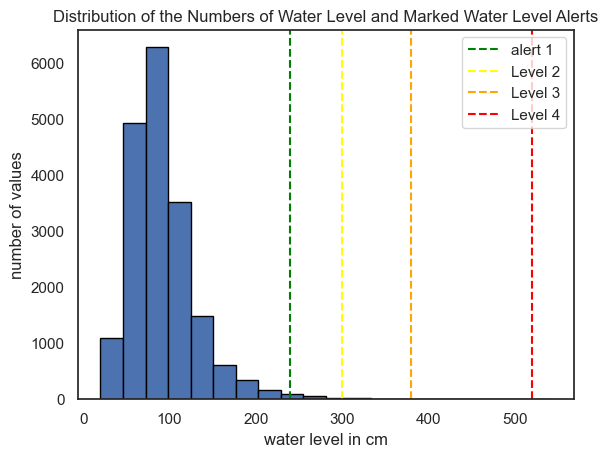

In [121]:
# plotting the distribution of all 4 water levels to have a better overview

plt.hist(df_river['level_max'], bins=20, edgecolor='black')
plt.axvline(x=alert_levels['level_1'], color='green', linestyle='--', label='alert 1')
plt.axvline(x=alert_levels['level_2'], color='yellow', linestyle='--', label='Level 2')
plt.axvline(x=alert_levels['level_3'], color='orange', linestyle='--', label='Level 3')
plt.axvline(x=alert_levels['level_4'], color='red', linestyle='--', label='Level 4')
plt.xlabel("water level in cm")
plt.ylabel("number of values")
plt.title("Distribution of the Numbers of Water Level and Marked Water Level Alerts")
plt.legend()
plt.show()

In [122]:
# now I want to identify and mark follwing days, where the water_levels are over 0
# new variable, that marks, if it is a flood event
df_river['is_flood_event'] = False

# creating groups for changes in water alert and setting counting integers
df_river['flood_group'] = (df_river['alert_level'] > 0).astype(int).diff().ne(0).cumsum()

# marking the days where water_alert > 0 as a flood event
df_river.loc[df_river['alert_level'] > 0, 'is_flood_event'] = True


<span style='color: yellow;'>It's great that you're doing this, very interesting. However, if you're reviewing outliers, probably this should be done outside this section on the analysis!</span><span style='color: green'>done</span>>

In [123]:
# now finding the beginning and ending of flood events:
# analyzing the flood groups, to later have a look into the flood events (for the comparison)
flood_groups = df_river[df_river['is_flood_event']].groupby('flood_group').agg({
    'date': ['min', 'max', 'count'],
    'alert_level': 'max'
}).reset_index()

flood_groups.columns = ['flood_group', 'start_date', 'end_date', 'duration', 'max_alert_level']
flood_groups

flood_group start_date   end_date  duration  max_alert_level
0             2 1974-07-18 1974-07-22         5                2
1             4 1975-07-01 1975-07-03         3                1
2             6 1976-06-02 1976-06-03         2                1
3             8 1977-08-01 1977-08-03         3                2
4            10 1978-07-05 1978-07-05         1                1
..          ...        ...        ...       ...              ...
57          116 2023-05-17 2023-05-18         2                1
58          118 2023-08-28 2023-08-31         4                2
59          120 2024-06-01 2024-06-08         8                2
60          122 2024-06-10 2024-06-11         2                1
61          124 2024-09-14 2024-09-19         6                2

[62 rows x 5 columns]

In [124]:
# creating a report, automatically in an html-file to get an overview:
profile_report = df_river.profile_report()
profile_report.to_file(output_file='river_output.html')
#profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style='color: red;'>I always suggest not use this type of profiling (at least, only to gather a sense of your data! Like for a personal use) I would remove this line if you already created it. If you want to use it and mention details of what is inside is fine. But comment it! Say something interesting about it!</span>
<span style='color: green;'>Yes, did it for personal use, to just get an overview. Like I wrote in the beginning I will remove it. But for now it is very convenient to get an idea of the variables, correlations etc.</span>

In [125]:
df_river_copy = df_river.copy()

<h2 id="reservoir"> B. Water Level Of The Reservoir "Sylvensteinspeicher"</h2>
<ol>
    <li>Concentating the all xlsx-files</li>
    <li> Deleting "Prüfstatus"</li>
    <li>Renaming all columns in translating them into English</li>
<ol>

In [126]:
# Reservoir "Sylvensteinspeicher" water level:
# the data is divided by 3 xlsx files:
# 1. beginning until 2023
# 2. 01/2024 until 10/2024
# 3. 11-01-2024 until 11-18-2024

path_reservoir_beginn_2023 = "../data/Sylvensteinspeicher/fluesse-wasserstand/16002500_beginn_bis_31.12.2023_tmw_0.xlsx"
path_reservoir_to_10_2023 = "../data/Sylvensteinspeicher/fluesse-wasserstand/16002500_01.01.2024_31.10.2024_tmw_0.xlsx"
path_reservoir_to_241118 = "../data/Sylvensteinspeicher/fluesse-wasserstand/16002500_01.11.2024_19.11.2024_tmw_0.xlsx"

df_reservoir = df_concat_excel(path_reservoir_beginn_2023, path_reservoir_to_10_2023, path_reservoir_to_241118)

dataframe for is completed. There are 23761 rows.


In [127]:
df_reservoir.info()
# There are few NaNs in maximum and minimum, the rest of the data is complete
# But: I have to check, if there are missing values/rows, because the data is recorded by day.
# All datatypes are right.

<class 'pandas.core.frame.DataFrame'>
Index: 23761 entries, 0 to 18
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       23761 non-null  datetime64[ns]
 1   Mittelwert  23761 non-null  int64         
 2   Maximum     23754 non-null  float64       
 3   Minimum     23754 non-null  float64       
 4   Prüfstatus  23761 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.1+ MB


In [128]:
df_reservoir = df_reservoir.drop(columns="Prüfstatus")

In [129]:
# deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, and the rest is limited, so I would lose a lot of data
# so for comparison reasons I decided to go ignore the status: DEFINITELY TO BE DISCUSSED!!! Because no I am realizing that I am mixing up... that procedure isn't consistent
df_reservoir = df_reservoir.rename(columns={'Datum' : 'date',
                              'Mittelwert' : 'reservoir_avg',
                              'Maximum' : 'reservoir_max',
                              'Minimum' : 'reservoir_min'})

In [130]:
df_reservoir.head(10)

date  reservoir_avg  reservoir_max  reservoir_min
0 1959-11-01            248          249.0          244.0
1 1959-11-02            248          251.0          247.0
2 1959-11-03            246          247.0          246.0
3 1959-11-04            248          249.0          246.0
4 1959-11-05            250          252.0          249.0
5 1959-11-06            253          253.0          252.0
6 1959-11-07            253          253.0          253.0
7 1959-11-08            252          253.0          250.0
8 1959-11-09            249          250.0          249.0
9 1959-11-10            249          250.0          248.0

In [131]:
df_reservoir_copy = df_reservoir.copy()

<h2 id="weather"> C. WEATHER </h2>
<p>Concentating the all xlsx-files</p>

<span style='color: red;'>It's WEATHER not WHEATHER!</span><br>
<span style='color: green;'>I KNOW!!! Just mixing it up all the time</span>

<span style='color: red;'>This code needs to be improved! In this case, as you have 7 files, I would recommend to use the library glob. We can do this together if you want. This is a great learning for you. However, you cannot read 7 files and concat them with a function that only allows you to concat 3 per time. At least, it would have been great to use a loop to concat them in groups of 3. However, as I said, here you need to use the glob library.</span><br>
<span style='color: green'> I will try to use it on my own, but it has a low priority. Maybe doing it together in a session</span>

In [132]:
# 6 xls files from 1958 to 2024
# paths:

path_weather_58_to_67 = "../data/weather/weather1958-1967.xlsx"
path_weather_68_to_77 = "../data/weather/weather1968-1977.xlsx"
path_weather_78_to_87 = "../data/weather/weather1978-1987.xlsx"
path_weather_88_to_97 = "../data/weather/weather1988-1997.xlsx"
path_weather_98_to_07 = "../data/weather/weather1998-2007.xlsx"
path_weather_08_to_17 = "../data/weather/weather2008-2017.xlsx"
path_weather_18_to_24 = "../data/weather/weather2018-241118.xlsx"

df_weather1 = df_concat_excel(path_weather_58_to_67, path_weather_68_to_77, path_weather_78_to_87)
df_weather2 = df_concat_excel(path_weather_88_to_97, path_weather_98_to_07, path_weather_08_to_17)
df_weather3 = pd.read_excel(path_weather_18_to_24)

df_weather = pd.concat([df_weather1, df_weather2, df_weather3])

dataframe for is completed. There are 10952 rows.
dataframe for is completed. There are 10952 rows.


<span style='color: red;'>Please, add a title and also the variables on the axis. This can be difficult to see if you don't understand the code. Explain what you see on the plots!</span>

<span style='color: red;'>I'm missing the steps you're doing again and why: checking data type, nulls, changing data types, etc.</span>

In [133]:
df_weather.info()
# There are NaNs in snow, wdir (wind direction), wspd (wind speed), wpgt (wind peak gust), pres (pressure) and tsun (total sunshine duration)
# I think, the NaNs in snow are just "O" - when there isn't snow, need to varify it in the section "handling NaNs"
# date is an object, I need to transform it into datetime format
# all other variables' datatypes are right

<class 'pandas.core.frame.DataFrame'>
Index: 24417 entries, 0 to 2512
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24417 non-null  object 
 1   tavg    24417 non-null  float64
 2   tmin    24417 non-null  float64
 3   tmax    24417 non-null  float64
 4   prcp    24417 non-null  float64
 5   snow    22849 non-null  float64
 6   wdir    9785 non-null   float64
 7   wspd    14490 non-null  float64
 8   wpgt    14475 non-null  float64
 9   pres    14554 non-null  float64
 10  tsun    24412 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.2+ MB


In [134]:
df_weather.head(10)

date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres   tsun
0  1958-01-01   0.9  -1.0   6.4   0.0   0.0   NaN   NaN   NaN   NaN  444.0
1  1958-01-02   0.8  -4.7   5.6   0.1   0.0   NaN   NaN   NaN   NaN  414.0
2  1958-01-03  -1.6  -2.2   0.6   0.8   0.0   NaN   NaN   NaN   NaN    0.0
3  1958-01-04  -5.4  -7.5  -2.0   0.9  10.0   NaN   NaN   NaN   NaN    0.0
4  1958-01-05   1.7  -5.2   4.0   6.8  10.0   NaN   NaN   NaN   NaN    0.0
5  1958-01-06   6.3   1.5   9.0  20.7   0.0   NaN   NaN   NaN   NaN  144.0
6  1958-01-07   3.3   1.9  11.3   4.3   0.0   NaN   NaN   NaN   NaN  156.0
7  1958-01-08   0.6  -1.6   2.4   1.1  30.0   NaN   NaN   NaN   NaN    0.0
8  1958-01-09   2.5   1.0   3.7   5.5  30.0   NaN   NaN   NaN   NaN    0.0
9  1958-01-10   1.4  -0.8   4.0   0.0   0.0   NaN   NaN   NaN   NaN  408.0

In [135]:
# formatting the column date into Panda's datetime-format
df_weather['date'] = pd.to_datetime(arg=df_weather['date'])
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24417 entries, 0 to 2512
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    24417 non-null  datetime64[ns]
 1   tavg    24417 non-null  float64       
 2   tmin    24417 non-null  float64       
 3   tmax    24417 non-null  float64       
 4   prcp    24417 non-null  float64       
 5   snow    22849 non-null  float64       
 6   wdir    9785 non-null   float64       
 7   wspd    14490 non-null  float64       
 8   wpgt    14475 non-null  float64       
 9   pres    14554 non-null  float64       
 10  tsun    24412 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.2 MB


In [136]:
# to get an overview of the data and correlations
profile_report = df_weather.profile_report()
profile_report.to_file(output_file='weather_output.html')

#profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [137]:
# Actually I want to remove wind direction, pressure and total sunshine duration, because these variables don't imply my data analysis. 
# Why? 
# 1. the wind direction and pressure have no influence to the suitability
# 2. the total sunshine duration is not a good factor, the air temperature is a better one, more accurate and sun duration correlates strong with the air temperature
# TO BE DISCUSSED!

In [138]:
df_weather_copy = df_weather.copy()

<h1 id="datacleaning"> V.) Data Cleaning </h1>

<h2 id="outliers"> A. Handling Outliers</h2>

In [139]:
# df_river: looking into every variable for outliers

#for col in df_river:
   # OutLiersBox(df_river, col)
# no outliers for water temperature
# flow_avg, min, max: upper limit
# level avg, min, max: upper limit
# concent_solids: upper limit


In [140]:
# checking, if there are outliers:
# looking into every variable for outliers

#for col in df_reservoir:
   # OutLiersBox(df_reservoir, col)

# outliers in all variables:
# avg: lower and upper limit
# max: only upper limit
# min: lower and upper limit

In [141]:
# checking, if there are outliers in the weather data:
# looking into every variable for outliers

#for col in df_weather:
 #  OutLiersBox(df_weather, col)

# outliers in: 
# tavg: lower limit
# tmin: lower limit
# tmax: lower limit
# prcp: upper limit
# snow: upper limit
# wspd: upper limit
# wpgt: upper limit
# pres: both

<span style='color: green;'>Great!! Here you explain the approach very well and what are going to be the nex steps!</span><br><span style='color: violet'>whoowhoo, thanks!!!</span>

<h3 id="approach">1. Approach</h3>

<h4> Dected Outliers:</h4>
<h5>River:</h5>
<li>flow_avg, min, max: upper limit</li>
<li> level avg, min, max: upper limit</li>
<li> concent_solids: upper limit</li>
<li> water temperature: no oultiers</li>

<h5>Reservoir "Sylvensteinspeicher"</h5>
<li>avg: lower and upper limit</li>
<li>max: only upper limit</li>
<li>min: lower and upper limit</li>

<h4>Procedure</h4>
<p> To have a good base of data it is important, to 1.) identify how much the outliers are implicating all statistical numbers and 2. to make sure, that the values are real and in this case that they aren't mistakes regarding to issues at the measuring station. To find that out the following steps are take:</p>
<h5>1. IQR - 75% quantile</h5>
<ol>
    <li>Marking the outliers as 'suspected'</li>
    <li>Comparing the medians of the datasat with and without outliers</li>
    <li>Checking the differences: should be under 10%</li>
    <li>Marking them as confirmed</li>
</ol>
<h5>2. IQR - 99% quantile to look for "real" mistakes of the measuring station"</h5>
<ol>
    <li>Marking them as "suspected"</li>
    <li>Creating a variable with the values of water level alerts</li>
    <li>Comparing the outliers with flood events: if they are lying within a flood event: mark them as 'confirmed', if not as invalid'</li>

<p>Question for Sofía: Would you do this additionally for water level, water flow rate and suspended solids? They are correlating in generall. If the outliers also are correlating that it is very unlikely that there are outliers. I think especially for the concentration of suspended solids it might make sense, because I know about certain measuring problems!</p>

In [142]:
# creating new columns for year and month for an easier handling
df_river['year'] = df_river['date'].dt.year
df_river['month'] = df_river['date'].dt.month

<span style='color: yellow;'>Probably this function could be directly on your FUNCTIONS_EDA file.</span><br>
<span style='color: green;'>I thought I "collect" in the external function file only functions that I will use a lot - over all this project. I don't think I will need that again!?!</span>

In [143]:
# function that marks the outlier of a variable using IQR 75% and 99%

def outliers_IQR_extreme(df, observed_col, is_outlier, is_outlier_extreme):

    # step 1: finding Q1, Q3, Q01, Q99 for calculating IQR
    Q1 = df[observed_col].quantile(.25) 
    Q3 = df[observed_col].quantile(.75)
    Q01 = df[observed_col].quantile(.01)
    Q99 = df[observed_col].quantile(.99)

    IQR = Q3 - Q1

    # step 2: calculating the lower and upper limmits to detect the outliers (lying outside these limits)

    lower_limit = Q1 - 1.5 * IQR
    lower_limit_99 = Q01 - 3 * IQR

    upper_limit = Q3 + 1.5 * IQR
    upper_limit_99 = Q99 + 3 * IQR
    
    # step 3: getting the amount of data of all outliers

    num_outliers_lower_limit = df[df[observed_col] < lower_limit]
    num_outliers_lower_limit_extreme = df[df[observed_col] < lower_limit_99]

    num_outliers_upper_limit = df[df[observed_col] > upper_limit]
    num_outliers_upper_limit_extreme = df[df[observed_col] > upper_limit_99]

    # step 4: marking all outliers (and also extreme outliers) as 'suspected'
    outlier_condition = ((df[observed_col] > upper_limit) | (df[observed_col] < lower_limit))
    df.loc[outlier_condition, is_outlier] = 'suspected'
    df[(df[is_outlier] == 'suspected')]
    df[is_outlier].value_counts()    

    outlier_extreme_condition = ((df[observed_col] > upper_limit_99) | (df[observed_col] < lower_limit_99))
    df.loc[outlier_extreme_condition, is_outlier_extreme] = 'suspected'
    df[(df[is_outlier_extreme] == 'suspected')]
    df[is_outlier_extreme].value_counts()   
    
    # printing the results for checking
    print("lower limit: ", lower_limit, "number of outliers: " , num_outliers_lower_limit.shape[0], "out of " ,df[observed_col].count(),
          "\nlower limit 99%: ", lower_limit_99, "number of outliers: " , num_outliers_lower_limit_extreme.shape[0], "out of " ,df[observed_col].count(),
          "\nupper limit: ", upper_limit, "number of outliers: " , num_outliers_upper_limit.shape[0], "out of " ,df[observed_col].count(),
          "\nupper limit 99%: ", upper_limit_99, "number of outliers: " , num_outliers_upper_limit_extreme.shape[0], "out of " ,df[observed_col].count(),
          "\noutliers:\n",   df[is_outlier].value_counts(),
          "\noutliers extreme (99% quantile):\n", df[is_outlier_extreme].value_counts())

<h3 id=outlierslevelmax> 2.) Water Level Maximum</h3>

In [144]:
# new columns for marking outliers:
df_river['is_outlier_level_max'] = 'normal'
df_river['is_outlier_level_max_extreme'] = 'normal'

In [145]:
# marking all outliers of water level (max)
outliers_IQR_extreme(df_river, 'level_max', 'is_outlier_level_max','is_outlier_level_max_extreme')

lower limit:  5.5 number of outliers:  0 out of  18646 
lower limit 99%:  -90.0 number of outliers:  0 out of  18646 
upper limit:  169.5 number of outliers:  850 out of  18646 
upper limit 99%:  361.0 number of outliers:  20 out of  18646 
outliers:
 is_outlier_level_max
normal       23275
suspected      850
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_level_max_extreme
normal       24105
suspected       20
Name: count, dtype: int64


<span style='color: red;'>Explain better what you're going to do here and why. It took me a while to understand the next steps.</span><br><span style='color: green'>done</span>

In [146]:
# function to check, if a date is lying within a flood event
def check_flood(date, flood_groups):
    for _, row in flood_groups.iterrows():  # iterating through all flood events
        if date >= row['start_date'] and date <= row['end_date']:
            return 'confirmed'  # date is lying within a flood event: 'confirmed'
    return 'invalid'  # date is lying outside a flood event: 'invalid'

## percentil 99% water level max


In [147]:
# looking into all suspected outliers of water level (max) and checking if the values are in between floods
df_river.loc[df_river['is_outlier_level_max_extreme'] == 'suspected', 'is_outlier_level_max_extreme'] = df_river.loc[
    df_river['is_outlier_level_max_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_level_max_extreme'].value_counts()

is_outlier_level_max_extreme
normal       24105
confirmed       20
Name: count, dtype: int64

<span style='color: violet'>There are 850 outliers regarding 75% out of 18.646 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers are confirmed: they are all lying within flood events. So they will remain, as long as the impact on the median is not too big. I need this numbers to identify the maximum all over time.</b></span>

<h3 id=outliersflowmax> 3.) Water Flow Rate Maximum</h2>

<span style='color: red;'>Explain a bit what have you found!!</span>

In [148]:
# new columns for the states of outliers:
df_river['is_outlier_flow_max'] = 'normal'
df_river['is_outlier_flow_max_extreme'] = 'normal'

In [149]:
# marking all outliers of flow rate (max)
outliers_IQR_extreme(df_river, 'flow_max', 'is_outlier_flow_max','is_outlier_flow_max_extreme')

lower limit:  -33.050000000000004 number of outliers:  0 out of  19742 
lower limit 99%:  -127.5 number of outliers:  0 out of  19742 
upper limit:  160.15 number of outliers:  1218 out of  19742 
upper limit 99%:  454.6700000000004 number of outliers:  51 out of  19742 
outliers:
 is_outlier_flow_max
normal       22907
suspected     1218
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_flow_max_extreme
normal       24074
suspected       51
Name: count, dtype: int64


<span style='color: red;'>Explain a bit what have you found!!</span><br>
<span style='color: green;'>done</span>

In [150]:
# Check, if the extreme outliers of flow rate (max) are lying in time of floods
df_river.loc[df_river['is_outlier_flow_max_extreme'] == 'suspected', 'is_outlier_flow_max_extreme'] = df_river.loc[
    df_river['is_outlier_flow_max_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_flow_max_extreme'].value_counts()

is_outlier_flow_max_extreme
normal       24074
confirmed       51
Name: count, dtype: int64

<span style='color: violet'>There are 1.218 outliers regarding 75% out of 19.742 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers are confirmed: they are all lying within flood events. So they will remain, as long as the impact on the median is not too big. I need this numbers to identify the maximum all over time.</b></span>

<h3 id="outlierslevelavg"> 4.) Water Level Average</h3>

<span style='color: red;'>Explain a bit what have you found!!</span><br>
<span style='color: green;'>done</span>

In [151]:
# new columns for the states of outliers:
df_river['is_outlier_level_avg'] = 'normal'
df_river['is_outlier_level_avg_extreme'] = 'normal'

In [152]:
# marking all outliers of water level (average)
outliers_IQR_extreme(df_river, 'level_avg', 'is_outlier_level_avg','is_outlier_level_avg_extreme')

lower limit:  -2.5 number of outliers:  0 out of  18646 
lower limit 99%:  -95.0 number of outliers:  0 out of  18646 
upper limit:  161.5 number of outliers:  667 out of  18646 
upper limit 99%:  335.0 number of outliers:  18 out of  18646 
outliers:
 is_outlier_level_avg
normal       23458
suspected      667
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_level_avg_extreme
normal       24107
suspected       18
Name: count, dtype: int64


In [153]:
# Check, if the extreme outliers of water level (average) are lying in time of floods
df_river.loc[df_river['is_outlier_level_avg_extreme'] == 'suspected', 'is_outlier_level_avg_extreme'] = df_river.loc[
    df_river['is_outlier_level_avg_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_level_avg_extreme'].value_counts()

is_outlier_level_avg_extreme
normal       24107
confirmed       18
Name: count, dtype: int64

<span style='color: violet'>There are 667 outliers regarding 75% out of 18.646 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers are confirmed: they are all lying within flood events. So they will remain, as long as the impact on the median is not too big. I need this numbers to identify the maximum all over time.</b></span>

<h3 id=outliersflowavg> 5.) Flow Rate Average</h3>

<span style='color: red;'>Explain a bit what have you found!!</span>

<span style='color: red;'>You have done five times the same process, using exactly the same functions. You should automate this into a for loop. We can talk about it if you don't know how to proceed.</span>

In [154]:
# new columns for the states of outliers:
df_river['is_outlier_flow_avg'] = 'normal'
df_river['is_outlier_flow_avg_extreme'] = 'normal'

In [155]:
# marking all outliers of flow rate (average)
outliers_IQR_extreme(df_river, 'flow_avg', 'is_outlier_flow_avg','is_outlier_flow_avg_extreme')

lower limit:  -36.85000000000001 number of outliers:  0 out of  24125 
lower limit 99%:  -123.50000000000001 number of outliers:  0 out of  24125 
upper limit:  146.75 number of outliers:  1330 out of  24125 
upper limit 99%:  399.70000000000005 number of outliers:  54 out of  24125 
outliers:
 is_outlier_flow_avg
normal       22795
suspected     1330
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_flow_avg_extreme
normal       24071
suspected       54
Name: count, dtype: int64


In [156]:
# Check, if the extreme outliers of flow rate (average) are lying in time of floods
df_river.loc[df_river['is_outlier_flow_avg_extreme'] == 'suspected', 'is_outlier_flow_avg_extreme'] = df_river.loc[
    df_river['is_outlier_flow_avg_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_flow_avg_extreme'].value_counts()

is_outlier_flow_avg_extreme
normal       24071
confirmed       43
invalid         11
Name: count, dtype: int64

<span style='color: violet'>There are 1.330 outliers regarding 75% out of 24.125 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> 43 of the extreme outliers are confirmed: they are all lying within flood events. So they will remain, as long as the impact on the median is not too big. I need this numbers to identify the maximum all over time.<br>
11 are invalid. The next step is look deepr into these 11 invalid values</b></span>

In [157]:
# Looking into the invalid outliers
df_river[df_river['is_outlier_flow_avg_extreme'] == 'invalid']

date  flow_avg  flow_max  flow_min  level_avg  level_max  \
2392 1965-05-20     432.0       NaN       NaN        NaN        NaN   
2414 1965-06-11     582.0       NaN       NaN        NaN        NaN   
2415 1965-06-12     569.0       NaN       NaN        NaN        NaN   
2416 1965-06-13     495.0       NaN       NaN        NaN        NaN   
2417 1965-06-14     458.0       NaN       NaN        NaN        NaN   
2418 1965-06-15     422.0       NaN       NaN        NaN        NaN   
2822 1966-07-24     485.0       NaN       NaN        NaN        NaN   
4300 1970-08-10     542.0       NaN       NaN        NaN        NaN   
4301 1970-08-11     485.0       NaN       NaN        NaN        NaN   
4302 1970-08-12     482.0       NaN       NaN        NaN        NaN   
4303 1970-08-13     437.0       NaN       NaN        NaN        NaN   

      level_min  concent_solids  water_temp_avg  water_temp_max  ...  year  \
2392        NaN             NaN             NaN             NaN  ...  1965   
2414        NaN             NaN             NaN             NaN  ...  1965   
2415        NaN             NaN             NaN             NaN  ...  1965   
2416        NaN             NaN             NaN             NaN  ...  1965   
2417        NaN             NaN             NaN             NaN  ...  1965   
2418        NaN             NaN             NaN             NaN  ...  1965   
2822        NaN          705.05             NaN             NaN  ...  1966   
4300        NaN          927.90             NaN             NaN  ...  1970   
4301        NaN          404.03             NaN             NaN  ...  1970   
4302        NaN          350.17             NaN             NaN  ...  1970   
4303        NaN          558.16             NaN             NaN  ...  1970   

      month  is_outlier_level_max  is_outlier_level_max_extreme  \
2392      5                normal                        normal   
2414      6                normal                        normal   
2415      6                normal                        normal   
2416      6                normal                        normal   
2417      6                normal                        normal   
2418      6                normal                        normal   
2822      7                normal                        normal   
4300      8                normal                        normal   
4301      8                normal                        normal   
4302      8                normal                        normal   
4303      8                normal                        normal   

      is_outlier_flow_max  is_outlier_flow_max_extreme is_outlier_level_avg  \
2392               normal                       normal               normal   
2414               normal                       normal               normal   
2415               normal                       normal               normal   
2416               normal                       normal               normal   
2417               normal                       normal               normal   
2418               normal                       normal               normal   
2822               normal                       normal               normal   
4300               normal                       normal               normal   
4301               normal                       normal               normal   
4302               normal                       normal               normal   
4303               normal                       normal               normal   

     is_outlier_level_avg_extreme is_outlier_flow_avg  \
2392                       normal           suspected   
2414                       normal           suspected   
2415                       normal           suspected   
2416                       normal           suspected   
2417                       normal           suspected   
2418                       normal           suspected   
2822                       normal           suspected   
4300       

In [158]:
# plotting a line graph of the 11 outliers (extreme) to confirm them or to declare them as invalid
# first timeframe: May 1965 until June 1965
# to mark them in the plotter I also create a DataFrame with the outliers (extreme) only

df_may_june_1965_flow_avg = df_river[(df_river['month']>= 5) & (df_river['month'] <= 6) & (df_river['year']== 1965)][['date','flow_avg']]
df_may_june_1965_flow_avg
df_may_june_1965_flow_avg_outliers = df_river[(df_river['is_outlier_flow_avg_extreme'] == 'invalid') & (df_river['month']>= 5) & (df_river['month'] <= 6) & (df_river['year']== 1965)] [['date','flow_avg']]
df_may_june_1965_flow_avg_outliers

date  flow_avg
2392 1965-05-20     432.0
2414 1965-06-11     582.0
2415 1965-06-12     569.0
2416 1965-06-13     495.0
2417 1965-06-14     458.0
2418 1965-06-15     422.0

In [159]:
fig = px.line(
    df_may_june_1965_flow_avg, x='date', y='flow_avg',
    title='Flow Rate (Average) from May to June 1965',
    labels={'date': 'Date (Days)', 'flow_avg': 'Flow Average (m³/s)'}
)

# for seeing the values of each day better:
fig.update_xaxes(
    tickmode='linear',  
    tick0=df_may_june_1965_flow_avg['date'].min(),
    dtick=86400000.0  # 1 day in msec
)

fig.add_scatter(
    x=df_may_june_1965_flow_avg_outliers['date'], 
    y=df_may_june_1965_flow_avg_outliers['flow_avg'], 
    mode='markers', 
    marker=dict(color='red', size=10, symbol='x'),
    name='Outliers'
)
fig.show()

In [160]:
# 2nd timeframe: July to August 1966
df_july_august_1966_flow_avg = df_river[(df_river['month'] >= 7) & (df_river['month'] <= 8) & (df_river['year']== 1966)][['date','flow_avg']]
df_july_august_1966_flow_avg
# dataframe with outliers in this timeframe:
df_july_august_1966_flow_avg_outliers = df_river[(df_river['is_outlier_flow_avg_extreme'] == 'invalid') & (df_river['month'] == 7) & (df_river['year']== 1966)] [['date','flow_avg']]
df_july_august_1966_flow_avg_outliers

date  flow_avg
2822 1966-07-24     485.0

In [161]:
# plotting a line graph while marking the outliers:
fig = px.line(
    df_july_august_1966_flow_avg, x='date', y='flow_avg',
    title='Water Flow Rate (Average) from July to August in 1966',
    labels={'date':'Date', 'flow_avg': 'Water Flow Rate (avg)'}
)
# for seeing the values of each day better:
fig.update_xaxes(
    tickmode='linear',
    tick0=df_july_august_1966_flow_avg['date'].min(),
    dtick=86400000.0  # 1 day in msec
)

fig.add_scatter(
    x=df_july_august_1966_flow_avg_outliers['date'],
    y=df_july_august_1966_flow_avg_outliers['flow_avg'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='x'),
    name='Outliers'
)

fig.show()

In [162]:
# 3rd timeframe: July to August 1970
df_july_august_1970_flow_avg = df_river[(df_river['month']>= 7) & (df_river['month'] <= 8) & (df_river['year']== 1970)][['date','flow_avg']]
df_july_august_1970_flow_avg
df_july_august_1970_flow_avg_outliers = df_river[(df_river['is_outlier_flow_avg_extreme'] == 'invalid') & (df_river['month']>= 7) & (df_river['month'] <= 9) & (df_river['year']== 1970)][['date','flow_avg']]
df_july_august_1970_flow_avg_outliers

date  flow_avg
4300 1970-08-10     542.0
4301 1970-08-11     485.0
4302 1970-08-12     482.0
4303 1970-08-13     437.0

In [163]:
# plotting the the timeframe with marked outliers:
fig = px.line(
    df_july_august_1970_flow_avg, x='date', y='flow_avg',
    title='Water Flow Rate (Average) from July to August 1970 with Outliers Highlighted',
    labels={'date':'Date', 'flow_avg': 'Water Flow Rate (avg)'}
)

# for seeing the values of each day better:
fig.update_xaxes(
    tickmode='linear',
    tick0=df_july_august_1970_flow_avg['date'].min(),
    dtick=86400000.0  # 1 day in msec
)

fig.add_scatter(
    x= df_july_august_1970_flow_avg_outliers['date'],
    y= df_july_august_1970_flow_avg_outliers['flow_avg'], 
    mode='markers',
    marker=dict(color='red', size=8, symbol='x'),
    name='Outliers'
    )

fig.show()

<span style='color: violet'> As seen in the line graphs, all the 11 (extreme) outliers are plausible, because the previous and/or next values are very similar. <br>
The whole picture looks right. So it makes totally sense to mark them as confirmed.</span>

In [164]:
# set "confirmed" in the "is_outlier_extreme"-status
cond_outliers_flow_avg = df_river['is_outlier_flow_avg_extreme'] == 'invalid'
df_river.loc[cond_outliers_flow_avg, 'is_outlier_flow_avg_extreme'] = 'confirmed'

In [165]:
# Checking, if there's another status for the extreme outliers left
df_river['is_outlier_flow_avg_extreme'].value_counts()

is_outlier_flow_avg_extreme
normal       24071
confirmed       54
Name: count, dtype: int64

<h3 id="outliersconcent">6.) Concentration Of Suspended Solids</h3>

<span style='color: red;'>Explain a bit what have you found!!</span>

In [166]:
# creating 2 new variables for the outliers
df_river['is_outlier_concent_solids'] = 'normal'
df_river['is_outlier_concent_solids_extreme'] = 'normal'

In [167]:
# marking all outliers of the water pollution:
outliers_IQR_extreme(df_river, 'concent_solids', 'is_outlier_concent_solids','is_outlier_concent_solids_extreme')

lower limit:  -14.005000000000004 number of outliers:  0 out of  21250 
lower limit 99%:  -40.92000000000001 number of outliers:  0 out of  21250 
upper limit:  42.275000000000006 number of outliers:  1880 out of  21250 
upper limit 99%:  293.89059999999995 number of outliers:  146 out of  21250 
outliers:
 is_outlier_concent_solids
normal       22245
suspected     1880
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_concent_solids_extreme
normal       23979
suspected      146
Name: count, dtype: int64


<span style='color: violet'>note: there is a very big difference between the two upper limits!<br>
Do I need to do something about it? Question for Sofía -> Ticket in clickup!</span>

In [168]:
# looking into the extreme outliers of the water pollution, if they are lying within flood event:
df_river.loc[df_river['is_outlier_concent_solids_extreme'] == 'suspected', 'is_outlier_concent_solids_extreme'] = df_river.loc[
    df_river['is_outlier_concent_solids_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_concent_solids_extreme'].value_counts()

is_outlier_concent_solids_extreme
normal       23979
invalid        108
confirmed       38
Name: count, dtype: int64

<h3>Replacing the Values After 2024-07-15 Due to Issues of the Measurement Station</h3>
<p>There's a note on the website that there are problems with the measurement station of suspended solids since July of 2024. Therefor they have to be replaced. </p>
<h4>Approach:</h4>
<ol>
    <li>Looking deeper into the Nans of suspended solids to ensure that I chose timeframes without a lot of missing values</li>
    <li>Looking into the trend of the month in at least the last years (at least 2 years): July to August</li>
    <li>Is the trend the same? </li>
    <li>Filling it with the mean or median  </li>
    <li>Mean or median: plotting it and look if there's a skew </li>
    <li>Fill in the median oder mean of the chosen year </li>
</ol>

In [169]:
# filtering all extreme outliers after 2024-07-01:
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & (df_river['date'] > '2024-07-01')][['date', 'concent_solids', 'is_outlier_concent_solids_extreme']]

date  concent_solids is_outlier_concent_solids_extreme
23998 2024-07-15         1119.19                           invalid
23999 2024-07-16         2000.86                           invalid
24000 2024-07-17         2000.42                           invalid
24001 2024-07-18         2000.53                           invalid
24002 2024-07-19         2000.78                           invalid
24003 2024-07-20         2000.51                           invalid
24004 2024-07-21         2000.97                           invalid
24005 2024-07-22         2000.41                           invalid
24006 2024-07-23         2000.49                           invalid
24007 2024-07-24         2000.71                           invalid
24008 2024-07-25         2000.31                           invalid
24009 2024-07-26         2000.84                           invalid
24010 2024-07-27         2000.45                           invalid
24011 2024-07-28         2000.71                           invalid
24012 2024-07-29         1252.34                           invalid
24013 2024-07-30          487.79                           invalid
24014 2024-07-31          487.81                           invalid
24015 2024-08-01          487.85                           invalid
24016 2024-08-02          487.84                           invalid
24017 2024-08-03          487.82                           invalid
24018 2024-08-04          487.80                           invalid
24019 2024-08-05          487.80                           invalid
24020 2024-08-06          487.84                           invalid
24021 2024-08-07          487.87                           invalid
24022 2024-08-08          487.86                           invalid
24023 2024-08-09          487.82                           invalid
24024 2024-08-10          487.86                           invalid
24025 2024-08-11          487.91                           invalid
24026 2024-08-12          487.95                           invalid
24027 2024-08-13          487.97                           invalid
24028 2024-08-14          487.96                           invalid
24029 2024-08-15          487.95                           invalid
24030 2024-08-16          487.95                           invalid
24031 2024-08-17          487.97                           invalid
24032 2024-08-18          487.88                           invalid
24033 2024-08-19          487.77                           invalid
24034 2024-08-20          487.72                           invalid
24035 2024-08-21          481.78                           invalid

In [170]:
# 1. Looking deeper into the Nans of suspended solids to ensure that I chose timeframes without a lot of missing values:
# I decided to go with the dataframe with only supsended solids to make it easier, because otherwise I have to handle the "artificial" Nans

df_concent_solids['year'] = df_concent_solids['date'].dt.year # new column to make the following filtering easier
df_concent_solids['month'] = df_concent_solids['date'].dt.month # new column to make the following filtering easier

# counting the rows of the concent_solids per year
number_rows_concent_solids = df_concent_solids.groupby(df_concent_solids['year'])['concent_solids'].count()

# filtering all years, where values are missing
number_rows_concent_solids[number_rows_concent_solids < 365]

year
1965     62
2021    354
2022    146
2024    234
Name: concent_solids, dtype: int64

In [171]:
# Looking into the trend of the month in at least the last years (at least 2 years): July to August:
# In 2021 there's only one value missing, so I decided to ignore the one missing values and take this year for analyzing the trend
# There are a lot of Nans in the years 1965, 2022 and 2024, now I am checking the distribution of the months:

df_years = pd.DataFrame(
    {'year_nans': [1965, 2022, 2024]
    },
    index=[1,2,3])

for y in df_years['year_nans']:
    df_filtered = df_concent_solids[df_concent_solids['year'] == y][['year', 'month', 'concent_solids']]
    df_groupby_year_month = df_filtered.groupby(['year', 'month'])['concent_solids'].count().reset_index().sort_values('month')
    print("year: ", y, "\n", df_groupby_year_month, "_____________________________")

#df_concent_solids[(df_concent_solids['year'] == 1965) | (df_concent_solids['year'] == 2022) | (df_concent_solids['year'] == 2024)][['year', 'month', 'concent_solids']].groupby(['year', 'month'])['concent_solids'].count().reset_index().sort_values('month')

year:  1965 
    year  month  concent_solids
0  1965     10               1
1  1965     11              30
2  1965     12              31 _____________________________
year:  2022 
    year  month  concent_solids
0  2022      8              24
1  2022      9              30
2  2022     10              31
3  2022     11              30
4  2022     12              31 _____________________________
year:  2024 
    year  month  concent_solids
0  2024      1              31
1  2024      2              29
2  2024      3              31
3  2024      4              30
4  2024      5              31
5  2024      6              30
6  2024      7              31
7  2024      8              21 _____________________________


In [172]:
# 1965: There are no values from January to September, 1 value in October: it is because the recording started later in the year
# 2022: There are no values from Januar to July, 6 values are missing in August: so I can't take these data for replacing the data in 2024 (July and August), because there are a lot of missing (I have to replace them afterwards, section Handling Nans)
# 2024: There are no values from September until 2024-11-18 (date I loaded the date), the rest is plausible, because they lied in the future (have to correct it, because now I do have them!)
# Conclusion: I won't take the data of 1965 and 2022, because there too many missing values
# next step = looking into the trend of the year 2019, 2020, 2021
df_years_trend = pd.DataFrame(
    {'year_elected' : [2019, 2020, 2021]},
    index=[1, 2, 3])

for y in df_years_trend['year_elected']:
        df_july = df_river[(df_river['year']== y) & (df_river['month']== 7)][['year','month','concent_solids']]
        df_august = df_river[(df_river['year']== y) & (df_river['month']== 8)][['year','month','concent_solids']]

        mean_july = df_july['concent_solids'].mean()
        mean_august = df_august['concent_solids'].mean()
        median_july = df_july['concent_solids'].median()
        median_august = df_august['concent_solids'].median()

        print("year: ", y, "\nmean of July = ", round(mean_july, 2), 
              "\nmedian of July = ", round(median_july,2),
               "\nmean of August = ", round(mean_august,2), 
               "\nmedian of August = ", round(median_august,2), 
               "\n------------------------")


year:  2019 
mean of July =  11.13 
median of July =  7.57 
mean of August =  15.61 
median of August =  13.23 
------------------------
year:  2020 
mean of July =  13.27 
median of July =  7.72 
mean of August =  27.12 
median of August =  5.79 
------------------------
year:  2021 
mean of July =  48.96 
median of July =  26.4 
mean of August =  19.59 
median of August =  10.91 
------------------------


<span style='color: violet'>The values of 2019, 2020 and 2021 are very volatile, there are big differences.<br>
Therfor I check the all over mean and median.</span>

In [173]:
# mean and median of all years in July and August (without 1965, 2022 and 2024 -> because there are to much Nans!)
df_july = df_river[(df_river['month']== 7) & (df_river['year'] != 2024) & (df_river['year'] != 2022) & (df_river['year'] != 1965)][['year','month','concent_solids']]
df_august = df_river[(df_river['month']== 8) & (df_river['year'] != 2024) & (df_river['year'] != 2022) & (df_river['year'] != 1965)][['year','month','concent_solids']]

mean_july_overall = df_july['concent_solids'].mean()
mean_august_overall = df_august['concent_solids'].mean()

median_july_overall = df_july['concent_solids'].median()
median_august_overall = df_august['concent_solids'].median()


print("years 1966-2023:", "\nmean of July = ", round(mean_july_overall, 2),
      "\nmedian of July", round(median_july_overall,2),
      "\nmean of August = ", round(mean_august_overall,2),
      "\nmedian of August = ", round(median_august_overall,2))

years 1966-2023: 
mean of July =  36.33 
median of July 16.57 
mean of August =  32.9 
median of August =  13.61


In [174]:
# To decide, if I will go with the mean oder median, I look into all values of concent_solids visually
# First I will look into all values of July from 1966 - 2023 and plot it
# creating a DataFrame with all values of the concentration of suspended solids between 1966 and 2023 in July:
df_concent_solids_july_1966_2023 = df_river[((df_river['year']>= 1966) & (df_river['year'] != 2022) & (df_river['year']<= 2023)) & (df_river['month'] == 7) ][['month','concent_solids']]
df_concent_solids_july_1966_2023

month  concent_solids
2799       7           69.56
2800       7           37.58
2801       7           24.24
2802       7           10.77
2803       7            5.87
...      ...             ...
23644      7           20.49
23645      7           13.50
23646      7           11.30
23647      7            7.46
23648      7            6.37

[1767 rows x 2 columns]

In [175]:
# Looking into all medians between 1966 and 2023 for all Julys
# Plotting it to see, if there's a trend:
df_median_concent_solids_july = df_river[((df_river['year']>= 1974)& (df_river['year'] != 2022) & (df_river['year']<= 2023)) & (df_river['month'] == 7) ][['date', 'year', 'concent_solids']].groupby('year')[['concent_solids']].median().reset_index()
df_median_concent_solids_july

year  concent_solids
0   1974           43.55
1   1975           64.27
2   1976           17.65
3   1977           15.60
4   1978           13.69
5   1979           15.57
6   1980           14.79
7   1981           20.83
8   1982            7.32
9   1983            5.45
10  1984            5.20
11  1985           13.06
12  1986           16.07
13  1987           21.41
14  1988           21.30
15  1989           16.07
16  1990           21.44
17  1991           16.41
18  1992           11.64
19  1993           40.12
20  1994           22.74
21  1995            8.04
22  1996           15.66
23  1997           11.42
24  1998           14.81
25  1999           13.66
26  2000           12.92
27  2001            6.32
28  2002           10.23
29  2003            7.50
30  2004           16.55
31  2005           22.56
32  2006           22.74
33  2007           20.84
34  2008           26.30
35  2009           13.46
36  2010           11.79
37  2011           18.13
38  2012           15.10
39  2013           11.63
40  2014           15.55
41  2015           18.19
42  2016           10.43
43  2017           19.32
44  2018            8.21
45  2019            7.57
46  2020            7.72
47  2021           26.40
48  2023           11.53

In [176]:
# Looking into all medians between 1966 and 2023 for all Augusts
# Plotting it to see, if there's a trend:
df_median_concent_solids_august = df_river[((df_river['year']>= 1974)& (df_river['year'] != 2022) & (df_river['year']<= 2023)) & (df_river['month'] == 8) ][['date', 'year', 'concent_solids']].groupby('year')[['concent_solids']].median().reset_index()
df_median_concent_solids_august

year  concent_solids
0   1974           30.83
1   1975           23.92
2   1976           13.34
3   1977           60.39
4   1978            9.10
5   1979           15.03
6   1980           11.30
7   1981           11.78
8   1982            3.28
9   1983            7.44
10  1984           10.28
11  1985           18.64
12  1986            9.84
13  1987           14.94
14  1988           20.50
15  1989            7.47
16  1990           10.93
17  1991           12.55
18  1992           10.56
19  1993           12.05
20  1994           12.35
21  1995            9.01
22  1996            8.13
23  1997            9.75
24  1998           10.00
25  1999           10.29
26  2000            7.94
27  2001            6.49
28  2002           60.64
29  2003            5.15
30  2004           14.44
31  2005           24.78
32  2006           26.79
33  2007           12.68
34  2008           14.56
35  2009           11.36
36  2010           18.90
37  2011           19.39
38  2012           11.88
39  2013            6.66
40  2014           12.04
41  2015           13.31
42  2016            7.45
43  2017           23.23
44  2018            2.56
45  2019           13.23
46  2020            5.79
47  2021           10.91
48  2023           13.03

In [177]:
# plotting all the medians of July from 1974 until 2023
fig = px.line(
    df_median_concent_solids_july, x='year', y='concent_solids',
    title='Median of Concentration of Suspended Solids in July All Over the Years (1966-2023)',
    labels={'year':'year', 'concent_solids': 'median of concentration of suspended solids'}
)

fig.update_xaxes(
    tickmode='linear',  # Linear bedeutet gleichmäßige Ticks
    tick0=df_median_concent_solids_july['year'].min(),  # Startpunkt
)

fig.show()

In [178]:
# plotting all the medians of August from 1974 until 2023
fig = px.line(
    df_median_concent_solids_august, x='year', y='concent_solids',
    title='Median of Concentration of Suspended Solids in August All Over the Years (1966-2023)',
    labels={'year':'year', 'concent_solids': 'median of concentration of suspended solids'}
)

fig.update_xaxes(
    tickmode='linear',  # Linear bedeutet gleichmäßige Ticks
    tick0=df_median_concent_solids_august['year'].min(),  # Startpunkt
)

fig.show()

<span style='color: violet'><b>CONCLUSION:</b><br>
The line graph of the medians all over the years shows, that there is no trend and it is very volatile.<br>
Result: I will fill in the values with the over all median or mean.<br>
Next step: Chosing median or mean by investigating the distribution of all values</span>

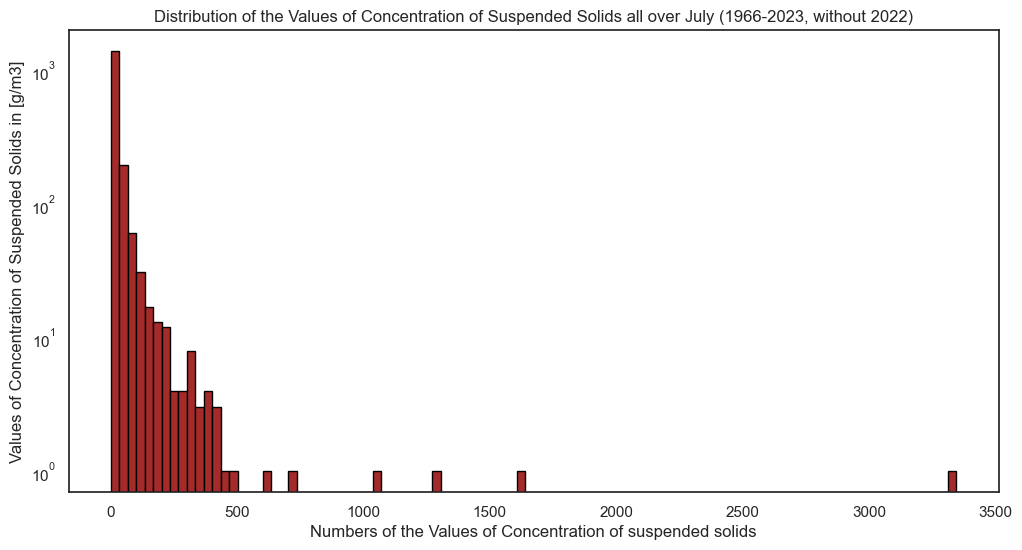

In [179]:
# creating a histogram of all values of concentration of suspended solids in July (1966-2023)
plt.figure(figsize=(12,6))
plt.title("Distribution of the Values of Concentration of Suspended Solids all over July (1966-2023, without 2022)")
plt.hist(df_concent_solids_july_1966_2023['concent_solids'], bins=100,log=True, edgecolor="black",color='brown')
plt.xlabel("Numbers of the Values of Concentration of suspended solids")
plt.ylabel("Values of Concentration of Suspended Solids in [g/m3]")
plt.show()
#plt.figure(figsize=(6, 10)) 
#sns.boxplot(data= df_concent_solids_july_1966_2023, x='month', y='concent_solids')

#plt.show()

<span style='color: violet'>Conclusion: the histogram shows that there is a big skew to the right for July. Therefor I need to go with the median.</span>

In [180]:
# Now I will look into all values of August from 1966 - 2023 and plot it
# creating a DataFrame with all values of the concentration of suspended solids between 1966 and 2023 in August:
df_concent_solids_august_1966_2023 = df_river[((df_river['year']>= 1966) & (df_river['year'] != 2022) & (df_river['year']<= 2023)) & (df_river['month'] == 8) ][['date','month','concent_solids']]
df_concent_solids_august_1966_2023

date  month  concent_solids
2830  1966-08-01      8           49.12
2831  1966-08-02      8           19.14
2832  1966-08-03      8           15.43
2833  1966-08-04      8           10.19
2834  1966-08-05      8           19.45
...          ...    ...             ...
23675 2023-08-27      8           23.95
23676 2023-08-28      8           79.85
23677 2023-08-29      8          191.27
23678 2023-08-30      8          236.49
23679 2023-08-31      8          124.66

[1767 rows x 3 columns]

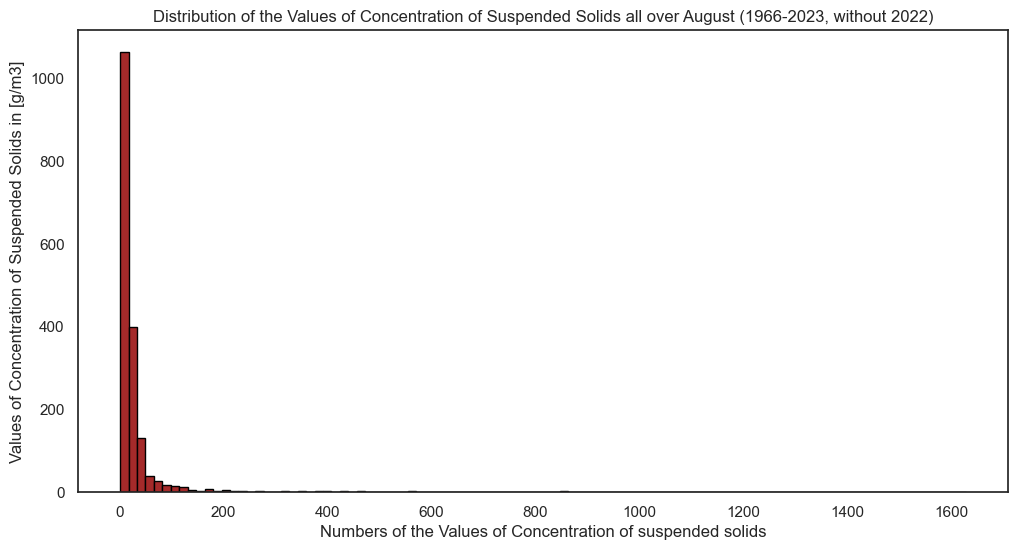

In [181]:
# plotting a histogram:
plt.figure(figsize=(12,6))
plt.hist(df_concent_solids_august_1966_2023['concent_solids'], bins=100,log=False, edgecolor='black', color="brown")
plt.title("Distribution of the Values of Concentration of Suspended Solids all over August (1966-2023, without 2022)")
plt.xlabel("Numbers of the Values of Concentration of suspended solids")
plt.ylabel("Values of Concentration of Suspended Solids in [g/m3]")
plt.show()

<span style='color: violet'>Conclusion: the histogram shows that there is also a big skew to the right for August. Therefor I need to go with the median.</span>

<span style='color: violet'>Approach of Filling-In all the Detected Outliers of the Concentration of Suspended Solids:</span>
<p>After observing the trend, I will fill in the outliers of 2024 with the all over median, because the values are very volatile</p>
<ol>
    <li>Adding new columns for storing the original values and marking them</li>
    <li>Copying the original value in "original_concent_solids"</li>
    <li>Filling in the detected outlier the overall median</li>
    <li>Setting "filled_status" into "filled_with_median"</li>
</ol>
    </span>

In [182]:
# mean of all years in July and August (without 1965, 2022 and 2024 -> because there are to much Nans!)
df_july = df_river[(df_river['month']== 7) & (df_river['year'] != 2024) & (df_river['year'] != 2022) & (df_river['year'] != 1965)][['year','month','concent_solids']]
df_august = df_river[(df_river['month']== 8) & (df_river['year'] != 2024) & (df_river['year'] != 2022) & (df_river['year'] != 1965)][['year','month','concent_solids']]

mean_july_overall = df_july['concent_solids'].mean()
mean_august_overall = df_august['concent_solids'].mean()

median_july_overall = df_july['concent_solids'].median()
median_august_overall = df_august['concent_solids'].median()


print("years 1966-2023:", "\nmean of July = ", round(mean_july_overall, 2),
      "\nmedian of July", round(median_july_overall,2),
      "\nmean of August = ", round(mean_august_overall,2),
      "\nmedian of August = ", round(median_august_overall,2))

years 1966-2023: 
mean of July =  36.33 
median of July 16.57 
mean of August =  32.9 
median of August =  13.61


In [183]:
# after observing the trend - that there isn't any trend, the values are very volatile, I will fill in the outliers of 2024 with the all over median for July
# Step 1: adding a column "original_concent_solids", where I'm storing the original data, before I fill in the overall july median

cond_fillin_concent_solids_july = (df_river['is_outlier_concent_solids_extreme'] == "invalid") & ((df_river['date'] >= '2024-07-01') & (df_river['date'] <= '2024-07-31'))
df_river.loc[cond_fillin_concent_solids_july, 'original_concent_solids'] = df_river.loc[cond_fillin_concent_solids_july, 'concent_solids']


In [184]:
# checking, if the values are right located
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & ((df_river['date'] >= '2024-07-01') & (df_river['date'] <= '2024-07-31'))]

date  flow_avg  flow_max  flow_min  level_avg  level_max  \
23998 2024-07-15     100.0     107.0      96.6      139.0      144.0   
23999 2024-07-16     101.0     106.0      93.0      140.0      143.0   
24000 2024-07-17      95.5      99.6      89.9      136.0      139.0   
24001 2024-07-18      91.0      97.8      84.0      134.0      138.0   
24002 2024-07-19      88.9      93.0      82.5      132.0      135.0   
24003 2024-07-20      76.2      86.9      64.8      124.0      131.0   
24004 2024-07-21      59.8      67.7      52.7      112.0      118.0   
24005 2024-07-22      75.1     107.0      55.3      123.0      144.0   
24006 2024-07-23      95.5     111.0      78.0      136.0      146.0   
24007 2024-07-24      87.7     107.0      56.8      147.0      159.0   
24008 2024-07-25     103.0     117.0      91.8      157.0      167.0   
24009 2024-07-26      74.9      90.2      59.7      139.0      149.0   
24010 2024-07-27      60.8      66.2      53.0      126.0      131.0   
24011 2024-07-28      62.0      67.7      55.9      127.0      131.0   
24012 2024-07-29      61.3      72.1      57.4      126.0      134.0   
24013 2024-07-30      56.0      58.8      53.0      123.0      125.0   
24014 2024-07-31      56.1      61.8      51.6      123.0      128.0   

       level_min  concent_solids  water_temp_avg  water_temp_max  ...  \
23998      137.0         1119.19            17.5            18.8  ...   
23999      135.0         2000.86            18.2            18.8  ...   
24000      133.0         2000.42            17.1            17.5  ...   
24001      129.0         2000.53            17.1            18.1  ...   
24002      128.0         2000.78            18.3            19.7  ...   
24003      116.0         2000.51            18.9            19.6  ...   
24004      107.0         2000.97            18.5            19.3  ...   
24005      109.0         2000.41            18.4            18.8  ...   
24006      125.0         2000.49            17.8            18.4  ...   
24007      127.0         2000.71            17.9            18.2  ...   
24008      149.0         2000.31            17.4            18.1  ...   
24009      129.0         2000.84            17.7            18.7  ...   
24010      121.0         2000.45            18.6            19.7  ...   
24011      123.0         2000.71            18.9            19.6  ...   
24012      124.0         1252.34            18.1            19.0  ...   
24013      120.0          487.79            18.5            19.8  ...   
24014      119.0          487.81            19.7            21.0  ...   

       is_outlier_level_max_extreme  is_outlier_flow_max  \
23998                        normal               normal   
23999                        normal               normal   
24000                        normal               normal   
24001                        normal               normal   
24002                        normal               normal   
24003                        normal               normal   
24004                        normal               normal   
24005                        normal               normal   
24006                        normal               normal   
24007                        normal               normal   
24008                        normal               normal   
24009                        normal               normal   
24010                        normal               normal   
24011                        normal               normal   
24012                        normal               normal   
24013                        normal               normal   
24014                        normal               normal   

       is_outlier_flow_max_extreme  is_outlier_level_avg  \
23998                       normal                normal   
23999                       normal                normal   
24000                       normal                normal   
24001                       normal                normal   
24002              

In [185]:
# Step 2: setting the status to mark all the overwritten values and filling in the median in all rows.
df_river.loc[cond_fillin_concent_solids_july, 'concent_solids_filled_status'] = 'filled_with_median'
df_river.loc[cond_fillin_concent_solids_july,'concent_solids'] = median_july_overall

In [186]:
# checking, if the values are stored correctly
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & ((df_river['date'] >= '2024-07-01') & (df_river['date'] <= '2024-07-31'))]

date  flow_avg  flow_max  flow_min  level_avg  level_max  \
23998 2024-07-15     100.0     107.0      96.6      139.0      144.0   
23999 2024-07-16     101.0     106.0      93.0      140.0      143.0   
24000 2024-07-17      95.5      99.6      89.9      136.0      139.0   
24001 2024-07-18      91.0      97.8      84.0      134.0      138.0   
24002 2024-07-19      88.9      93.0      82.5      132.0      135.0   
24003 2024-07-20      76.2      86.9      64.8      124.0      131.0   
24004 2024-07-21      59.8      67.7      52.7      112.0      118.0   
24005 2024-07-22      75.1     107.0      55.3      123.0      144.0   
24006 2024-07-23      95.5     111.0      78.0      136.0      146.0   
24007 2024-07-24      87.7     107.0      56.8      147.0      159.0   
24008 2024-07-25     103.0     117.0      91.8      157.0      167.0   
24009 2024-07-26      74.9      90.2      59.7      139.0      149.0   
24010 2024-07-27      60.8      66.2      53.0      126.0      131.0   
24011 2024-07-28      62.0      67.7      55.9      127.0      131.0   
24012 2024-07-29      61.3      72.1      57.4      126.0      134.0   
24013 2024-07-30      56.0      58.8      53.0      123.0      125.0   
24014 2024-07-31      56.1      61.8      51.6      123.0      128.0   

       level_min  concent_solids  water_temp_avg  water_temp_max  ...  \
23998      137.0           16.57            17.5            18.8  ...   
23999      135.0           16.57            18.2            18.8  ...   
24000      133.0           16.57            17.1            17.5  ...   
24001      129.0           16.57            17.1            18.1  ...   
24002      128.0           16.57            18.3            19.7  ...   
24003      116.0           16.57            18.9            19.6  ...   
24004      107.0           16.57            18.5            19.3  ...   
24005      109.0           16.57            18.4            18.8  ...   
24006      125.0           16.57            17.8            18.4  ...   
24007      127.0           16.57            17.9            18.2  ...   
24008      149.0           16.57            17.4            18.1  ...   
24009      129.0           16.57            17.7            18.7  ...   
24010      121.0           16.57            18.6            19.7  ...   
24011      123.0           16.57            18.9            19.6  ...   
24012      124.0           16.57            18.1            19.0  ...   
24013      120.0           16.57            18.5            19.8  ...   
24014      119.0           16.57            19.7            21.0  ...   

       is_outlier_flow_max  is_outlier_flow_max_extreme  is_outlier_level_avg  \
23998               normal                       normal                normal   
23999               normal                       normal                normal   
24000               normal                       normal                normal   
24001               normal                       normal                normal   
24002               normal                       normal                normal   
24003               normal                       normal                normal   
24004               normal                       normal                normal   
24005               normal                       normal                normal   
24006               normal                       normal                normal   
24007               normal                       normal                normal   
24008               normal                       normal                normal   
24009               normal                       normal                normal   
24010               normal                       normal                normal   
24011               normal                       normal                normal   
24012               normal                       normal                normal   
24013               normal                       normal                normal   
24014               nor

In [187]:
# same proocedure for August:
# these outliers will be filled in
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & ((df_river['date'] >= '2024-08-01') & (df_river['date'] <= '2024-08-30'))]

date  flow_avg  flow_max  flow_min  level_avg  level_max  \
24015 2024-08-01      64.7      75.2      51.6      129.0      136.0   
24016 2024-08-02      70.6      73.8      67.7      133.0      135.0   
24017 2024-08-03      66.4      82.9      57.4      130.0      141.0   
24018 2024-08-04      53.9      58.8      42.2      121.0      125.0   
24019 2024-08-05      47.8      54.5      38.5      117.0      122.0   
24020 2024-08-06      54.8      58.8      44.8      122.0      125.0   
24021 2024-08-07      62.2      72.1      55.9      127.0      134.0   
24022 2024-08-08      61.6      67.7      54.5      127.0      131.0   
24023 2024-08-09      53.3      63.3      36.3      121.0      128.0   
24024 2024-08-10      41.8      47.4      35.1      113.0      117.0   
24025 2024-08-11      35.9      40.9      30.1      108.0      112.0   
24026 2024-08-12      36.1      43.5      32.0      108.0      114.0   
24027 2024-08-13      42.1      48.8      36.3      113.0      118.0   
24028 2024-08-14      48.5      54.5      42.2      118.0      122.0   
24029 2024-08-15      71.8      87.5      47.4      134.0      144.0   
24030 2024-08-16      48.2      60.3      35.1      117.0      126.0   
24031 2024-08-17      45.4      53.0      34.1      115.0      121.0   
24032 2024-08-18      47.7      67.7      33.0      117.0      131.0   
24033 2024-08-19     125.0     167.0      61.8      167.0      192.0   
24034 2024-08-20     121.0     155.0      93.8      165.0      185.0   
24035 2024-08-21      85.7      95.4      73.8      143.0      149.0   

       level_min  concent_solids  water_temp_avg  water_temp_max  ...  \
24015      120.0          487.85            19.7            20.5  ...   
24016      131.0          487.84            18.9            19.7  ...   
24017      124.0          487.82            18.6            19.7  ...   
24018      113.0          487.80            18.5            19.1  ...   
24019      110.0          487.80            18.6            19.2  ...   
24020      115.0          487.84            18.8            19.8  ...   
24021      123.0          487.87            18.9            19.5  ...   
24022      122.0          487.86            18.5            19.5  ...   
24023      108.0          487.82            18.6            19.7  ...   
24024      107.0          487.86            19.4            20.2  ...   
24025      102.0          487.91            20.0            20.6  ...   
24026      104.0          487.95            20.6            21.3  ...   
24027      108.0          487.97            20.7            21.4  ...   
24028      113.0          487.96            20.2            21.0  ...   
24029      117.0          487.95            19.8            20.8  ...   
24030      107.0          487.95            19.7            20.6  ...   
24031      106.0          487.97            19.8            20.3  ...   
24032      105.0          487.88            19.3            20.2  ...   
24033      127.0          487.77            17.5            18.6  ...   
24034      147.0          487.72            16.9            17.3  ...   
24035      135.0          481.78            17.3            18.0  ...   

       is_outlier_flow_max  is_outlier_flow_max_extreme  is_outlier_level_avg  \
24015               normal                       normal                normal   
24016               normal                       normal                normal   
24017               normal                       normal                normal   
24018               normal                       normal                normal   
24019               normal                       normal                normal   
24020               normal                       normal                normal   
24021               normal                       normal                normal   
24022               normal                       normal                normal   
24023               normal                       normal                normal   
24024     

In [188]:
# filling in the outliers of 2024 with the all over median for August
# Step 1: adding a column "original_concent_solids", where I'm storing the original data, before I fill in the overall august median

cond_fillin_concent_solids_august = (df_river['is_outlier_concent_solids_extreme'] == "invalid") & ((df_river['date'] >= '2024-08-01') & (df_river['date'] <= '2024-08-30'))
df_river.loc[cond_fillin_concent_solids_august, 'original_concent_solids'] = df_river.loc[cond_fillin_concent_solids_august, 'concent_solids']

In [189]:
# checking, if they are copied correctly
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & ((df_river['date'] >= '2024-08-01') & (df_river['date'] <= '2024-08-30'))]

date  flow_avg  flow_max  flow_min  level_avg  level_max  \
24015 2024-08-01      64.7      75.2      51.6      129.0      136.0   
24016 2024-08-02      70.6      73.8      67.7      133.0      135.0   
24017 2024-08-03      66.4      82.9      57.4      130.0      141.0   
24018 2024-08-04      53.9      58.8      42.2      121.0      125.0   
24019 2024-08-05      47.8      54.5      38.5      117.0      122.0   
24020 2024-08-06      54.8      58.8      44.8      122.0      125.0   
24021 2024-08-07      62.2      72.1      55.9      127.0      134.0   
24022 2024-08-08      61.6      67.7      54.5      127.0      131.0   
24023 2024-08-09      53.3      63.3      36.3      121.0      128.0   
24024 2024-08-10      41.8      47.4      35.1      113.0      117.0   
24025 2024-08-11      35.9      40.9      30.1      108.0      112.0   
24026 2024-08-12      36.1      43.5      32.0      108.0      114.0   
24027 2024-08-13      42.1      48.8      36.3      113.0      118.0   
24028 2024-08-14      48.5      54.5      42.2      118.0      122.0   
24029 2024-08-15      71.8      87.5      47.4      134.0      144.0   
24030 2024-08-16      48.2      60.3      35.1      117.0      126.0   
24031 2024-08-17      45.4      53.0      34.1      115.0      121.0   
24032 2024-08-18      47.7      67.7      33.0      117.0      131.0   
24033 2024-08-19     125.0     167.0      61.8      167.0      192.0   
24034 2024-08-20     121.0     155.0      93.8      165.0      185.0   
24035 2024-08-21      85.7      95.4      73.8      143.0      149.0   

       level_min  concent_solids  water_temp_avg  water_temp_max  ...  \
24015      120.0          487.85            19.7            20.5  ...   
24016      131.0          487.84            18.9            19.7  ...   
24017      124.0          487.82            18.6            19.7  ...   
24018      113.0          487.80            18.5            19.1  ...   
24019      110.0          487.80            18.6            19.2  ...   
24020      115.0          487.84            18.8            19.8  ...   
24021      123.0          487.87            18.9            19.5  ...   
24022      122.0          487.86            18.5            19.5  ...   
24023      108.0          487.82            18.6            19.7  ...   
24024      107.0          487.86            19.4            20.2  ...   
24025      102.0          487.91            20.0            20.6  ...   
24026      104.0          487.95            20.6            21.3  ...   
24027      108.0          487.97            20.7            21.4  ...   
24028      113.0          487.96            20.2            21.0  ...   
24029      117.0          487.95            19.8            20.8  ...   
24030      107.0          487.95            19.7            20.6  ...   
24031      106.0          487.97            19.8            20.3  ...   
24032      105.0          487.88            19.3            20.2  ...   
24033      127.0          487.77            17.5            18.6  ...   
24034      147.0          487.72            16.9            17.3  ...   
24035      135.0          481.78            17.3            18.0  ...   

       is_outlier_flow_max  is_outlier_flow_max_extreme  is_outlier_level_avg  \
24015               normal                       normal                normal   
24016               normal                       normal                normal   
24017               normal                       normal                normal   
24018               normal                       normal                normal   
24019               normal                       normal                normal   
24020               normal                       normal                normal   
24021               normal                       normal                normal   
24022               normal                       normal                normal   
24023               normal                       normal                normal   
24024     

In [190]:
# Step 2: setting the status to mark all the overwritten values and filling in the median in all rows.
df_river.loc[cond_fillin_concent_solids_august, 'concent_solids_filled_status'] = 'filled_with_median'
df_river.loc[cond_fillin_concent_solids_august,'concent_solids'] = median_august_overall

In [191]:
# checking, if they are overwritten correctly
df_river[(df_river['concent_solids_filled_status'] == "filled_with_median") & ((df_river['date'] >= '2024-08-01') & (df_river['date'] <= '2024-08-30'))]

date  flow_avg  flow_max  flow_min  level_avg  level_max  \
24015 2024-08-01      64.7      75.2      51.6      129.0      136.0   
24016 2024-08-02      70.6      73.8      67.7      133.0      135.0   
24017 2024-08-03      66.4      82.9      57.4      130.0      141.0   
24018 2024-08-04      53.9      58.8      42.2      121.0      125.0   
24019 2024-08-05      47.8      54.5      38.5      117.0      122.0   
24020 2024-08-06      54.8      58.8      44.8      122.0      125.0   
24021 2024-08-07      62.2      72.1      55.9      127.0      134.0   
24022 2024-08-08      61.6      67.7      54.5      127.0      131.0   
24023 2024-08-09      53.3      63.3      36.3      121.0      128.0   
24024 2024-08-10      41.8      47.4      35.1      113.0      117.0   
24025 2024-08-11      35.9      40.9      30.1      108.0      112.0   
24026 2024-08-12      36.1      43.5      32.0      108.0      114.0   
24027 2024-08-13      42.1      48.8      36.3      113.0      118.0   
24028 2024-08-14      48.5      54.5      42.2      118.0      122.0   
24029 2024-08-15      71.8      87.5      47.4      134.0      144.0   
24030 2024-08-16      48.2      60.3      35.1      117.0      126.0   
24031 2024-08-17      45.4      53.0      34.1      115.0      121.0   
24032 2024-08-18      47.7      67.7      33.0      117.0      131.0   
24033 2024-08-19     125.0     167.0      61.8      167.0      192.0   
24034 2024-08-20     121.0     155.0      93.8      165.0      185.0   
24035 2024-08-21      85.7      95.4      73.8      143.0      149.0   

       level_min  concent_solids  water_temp_avg  water_temp_max  ...  \
24015      120.0           13.61            19.7            20.5  ...   
24016      131.0           13.61            18.9            19.7  ...   
24017      124.0           13.61            18.6            19.7  ...   
24018      113.0           13.61            18.5            19.1  ...   
24019      110.0           13.61            18.6            19.2  ...   
24020      115.0           13.61            18.8            19.8  ...   
24021      123.0           13.61            18.9            19.5  ...   
24022      122.0           13.61            18.5            19.5  ...   
24023      108.0           13.61            18.6            19.7  ...   
24024      107.0           13.61            19.4            20.2  ...   
24025      102.0           13.61            20.0            20.6  ...   
24026      104.0           13.61            20.6            21.3  ...   
24027      108.0           13.61            20.7            21.4  ...   
24028      113.0           13.61            20.2            21.0  ...   
24029      117.0           13.61            19.8            20.8  ...   
24030      107.0           13.61            19.7            20.6  ...   
24031      106.0           13.61            19.8            20.3  ...   
24032      105.0           13.61            19.3            20.2  ...   
24033      127.0           13.61            17.5            18.6  ...   
24034      147.0           13.61            16.9            17.3  ...   
24035      135.0           13.61            17.3            18.0  ...   

       is_outlier_flow_max  is_outlier_flow_max_extreme  is_outlier_level_avg  \
24015               normal                       normal                normal   
24016               normal                       normal                normal   
24017               normal                       normal                normal   
24018               normal                       normal                normal   
24019               normal                       normal                normal   
24020               normal                       normal                normal   
24021               normal                       normal                normal   
24022               normal                       normal                normal   
24023               normal                       normal                normal   
24024     

In [192]:
# looking into the extreme outliers before 24-07-01:
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & (df_river['date'] <= '2024-07-01')][['date', 'concent_solids', 'is_outlier_concent_solids_extreme']]
# 70 rows - a lot

date  concent_solids is_outlier_concent_solids_extreme
2736  1966-04-29          564.26                           invalid
2765  1966-05-28          403.73                           invalid
2766  1966-05-29          378.02                           invalid
2798  1966-06-30          470.49                           invalid
2821  1966-07-23         1059.96                           invalid
...          ...             ...                               ...
20364 2014-08-03          397.11                           invalid
20365 2014-08-04          381.58                           invalid
23357 2022-10-13          538.11                           invalid
23827 2024-01-26          774.61                           invalid
23981 2024-06-28          294.36                           invalid

[70 rows x 3 columns]

In [193]:
# looking into the years and months, where extreme outliers are found. Is there a pattern? Or are they unique values?
df_river_num_outliers_concent_solids = df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & \
         (df_river['date'] <= '2024-07-01')][['year', 'month', 'is_outlier_concent_solids_extreme']].groupby(['year', 'month']).count().reset_index()
df_river_num_outliers_concent_solids.columns = ['year', 'month', 'numbers of extreme outliers (concent_solids)']
df_river_num_outliers_concent_solids
#df_river_num_outliers_concent_solids[df_river_num_outliers_concent_solids['numbers of extreme outliers (concent_solids)'] >= 4]
#ACHTUNG: ggf. eine Abfrage ergänezen mmit concent_solids >4

year  month  numbers of extreme outliers (concent_solids)
0   1966      4                                             1
1   1966      5                                             2
2   1966      6                                             1
3   1966      7                                             4
4   1966      8                                             1
5   1966     12                                             1
6   1967      6                                             1
7   1967      8                                             1
8   1968      6                                             2
9   1968      7                                             1
10  1970      7                                             1
11  1970      8                                             6
12  1971      6                                             1
13  1971     10                                             1
14  1972      7                                             3
15  1972     11                                             1
16  1973      5                                             1
17  1973      6                                             4
18  1973     11                                             1
19  1974      6                                             1
20  1974      7                                             1
21  1977      7                                             1
22  1978      9                                             1
23  1979      3                                             1
24  1979      6                                             1
25  1981      3                                             1
26  1982      6                                             1
27  1985      8                                             1
28  1990      7                                             1
29  1993      7                                             1
30  2002      3                                             1
31  2002      8                                             8
32  2004      6                                             2
33  2006      3                                             1
34  2006      8                                             1
35  2008      7                                             1
36  2012      6                                             1
37  2013      9                                             1
38  2014      6                                             3
39  2014      8                                             3
40  2022     10                                             1
41  2024      1                                             1
42  2024      6                                             1

In [194]:
# Looking into the year with outliers >= 4, because I think I can find a trend. If there is a trend you can ovbviously see I can set the values as "confirmed".
# As you can see in the list 
# 1966-7-8, 1970-8, 1973-6, 2002-8
# creating DataFrames to plot the months:
df_july_august_1966_concent_solids = df_river[(df_river['month'] >= 7) & (df_river['month']<= 8) & (df_river['year']==1966)][['date', 'concent_solids']]
df_august_1970_concent_solids  = df_river[(df_river['month'] == 8) & (df_river['year']==1970)][['date', 'concent_solids']]
df_june_1973_concent_solids  = df_river[(df_river['month'] == 6) & (df_river['year']==1973)][['date', 'concent_solids']]
df_august_2002_concent_solids  = df_river[(df_river['month']== 8) & (df_river['year']==2002)][['date', 'concent_solids']]
# creating DataFrames of the outliers:
df_july_august_1966_concent_solids_extreme_outliers = df_river[(df_river['is_outlier_concent_solids_extreme']== 'invalid') & (df_river['month'] >= 7) & (df_river['month']<= 8) & (df_river['year']==1966)][['date', 'concent_solids']]
df_august_1970_concent_solids_extreme_outliers = df_river[(df_river['is_outlier_concent_solids_extreme']== 'invalid') & (df_river['month'] == 8) & (df_river['year']==1970)][['date', 'concent_solids']]
df_june_1973_concent_solids_extreme_outliers = df_river[(df_river['is_outlier_concent_solids_extreme']== 'invalid') & (df_river['month'] == 6) & (df_river['year']==1973)][['date', 'concent_solids']]
df_august_2002_concent_solids_extreme_outliers  = df_river[(df_river['is_outlier_concent_solids_extreme']== 'invalid') & (df_river['month']== 8) & (df_river['year']==2002)][['date', 'concent_solids']]

In [195]:
# plotting a line graph to look into the timeframes:

# july to august 1966:
fig = px.line(
    df_july_august_1966_concent_solids, x='date', y='concent_solids',
    title='Concentration of Suspended Solids from July to August in 1966',
    labels={'date':'Date', 'concent_solids': 'concentration of suspended solids'}
)
# for seeing the values of each day better:
fig.update_xaxes(
    tickmode='linear',
    tick0=df_july_august_1966_concent_solids['date'].min(),
    dtick=86400000.0  # 1 day in msec
)

fig.add_scatter(
    x=df_july_august_1966_concent_solids_extreme_outliers['date'],
    y=df_july_august_1966_concent_solids_extreme_outliers['concent_solids'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='x'),
    name='Outliers'
)

fig.show()

<span style='color: violet'><b>Conclusions:</b><br>
JULY 1966:<br>
July 25th I will fill in later with the main of the previous and next day, it looks like measuring problem.<br>
July 23rd, 24th and 26th: I will set as confirmed.<br>
For getting a better overview I will plot august of 1966 alone, because the scale is very high (outlier in July) </span>

In [196]:
# Setting 'is_outlier_concent_solids_extreme' to 'confirmed' for July 23rd, 24th, and 26th:
df_river.loc[df_river['date'] =='1966-07-23','is_outlier_concent_solids_extreme'] = 'confirmed'
df_river.loc[df_river['date'] =='1966-07-24','is_outlier_concent_solids_extreme'] = 'confirmed'
df_river.loc[df_river['date'] =='1966-07-26','is_outlier_concent_solids_extreme'] = 'confirmed'
print(df_river[df_river['date'] =='1966-07-23']['is_outlier_concent_solids_extreme'], 
      "\n", df_river[df_river['date'] =='1966-07-24']['is_outlier_concent_solids_extreme'],
       "\n", df_river[df_river['date'] =='1966-07-26']['is_outlier_concent_solids_extreme'])

2821    confirmed
Name: is_outlier_concent_solids_extreme, dtype: object 
 2822    confirmed
Name: is_outlier_concent_solids_extreme, dtype: object 
 2824    confirmed
Name: is_outlier_concent_solids_extreme, dtype: object


In [197]:
# plotting August of 1966 to see a better trend 

# first creating the DataFrames:
df_august_1966_concent_solids = df_river[(df_river['month'] == 8) & (df_river['year']==1966)][['date', 'concent_solids']]
df_august_1966_concent_solids_extreme_outliers = df_river[(df_river['is_outlier_concent_solids_extreme']== 'invalid') & (df_river['month'] == 8) & (df_river['year']==1966)][['date', 'concent_solids']]

# August 1966:
fig = px.line(
    df_august_1966_concent_solids, x='date', y='concent_solids', 
    title='Concentration of Suspended Solids of August in 1966 with Outlier Highlighted',
    labels={'date':'Date', 'concent_solids': 'concentratioin of suspended solids'}
)

# for seeing the values of each day better:
fig.update_xaxes(
    tickmode='linear',
    tick0=df_july_august_1966_concent_solids['date'].min(),
    dtick=86400000.0  # 1 day in msec
)

fig.add_scatter(
    x=df_august_1966_concent_solids_extreme_outliers['date'],
    y=df_august_1966_concent_solids_extreme_outliers['concent_solids'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='x'),
    name='Outliers'
)

<span style='color: violet'><b>Conclusions:</b><br>
AUGUST 1966:<br>
I will set the 7th of August as confirmed, it looks plausible. </span>

In [198]:
# Setting 'is_outlier_concent_solids_extreme' to 'confirmed' for August, 7th in 1966:
df_river.loc[df_river['date'] =='1966-08-07','is_outlier_concent_solids_extreme'] = 'confirmed'
print(df_river[df_river['date'] =='1966-08-07']['is_outlier_concent_solids_extreme'])

2836    confirmed
Name: is_outlier_concent_solids_extreme, dtype: object


In [199]:
# plotting a line graph to look into the timeframes:

# August 1970:
fig = px.line(
    df_august_1970_concent_solids, x='date', y='concent_solids', 
    title='Concentration of Suspended Solids of August in 1966 with Outlier Highlighted',
    labels={'date':'Date', 'concent_solids': 'concentratioin of suspended solids'}
)

# for seeing the values of each day better:
fig.update_xaxes(
    tickmode='linear',
    tick0=df_august_1970_concent_solids['date'].min(),
    dtick=86400000.0  # 1 day in msec
)

fig.add_scatter(
    x=df_august_1970_concent_solids_extreme_outliers['date'],
    y=df_august_1970_concent_solids_extreme_outliers['concent_solids'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='x'),
    name='Outliers'
)

<span style='color: violet'><b>Conclusions:</b><br>
AUGUST 1970:<br>
It looks plausible. So I will set all days to confirmed </span>

In [200]:
# Setting 'is_outlier_concent_solids_extreme' to 'confirmed' for August 10th to 15th:
df_river.loc[(df_river['date'] >= '1970-08-10') & (df_river['date'] <= '1970-08-15'), 'is_outlier_concent_solids_extreme'] = 'confirmed'

df_river[(df_river['date'] >='1970-08-10') & (df_river['date'] <= '1970-08-15')]['is_outlier_concent_solids_extreme']

4300    confirmed
4301    confirmed
4302    confirmed
4303    confirmed
4304    confirmed
4305    confirmed
Name: is_outlier_concent_solids_extreme, dtype: object

In [201]:
# plotting a line graph to look into the timeframes:

# june 1973:
fig = px.line(
    df_june_1973_concent_solids, x='date', y='concent_solids',
    title='Concentration of Suspended Solids in June of 1973 with Outliers Highlighted',
    labels={'date':'Date', 'concent_solids': 'Concentration of Suspended Solids'}
)
# for seeing the values of each day better:
fig.update_xaxes(
    tickmode='linear',
    tick0=df_june_1973_concent_solids['date'].min(),
    dtick=86400000.0  # 1 day in msec
)

fig.add_scatter(
    x=df_june_1973_concent_solids_extreme_outliers['date'],
    y=df_june_1973_concent_solids_extreme_outliers['concent_solids'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='x'),
    name='Outliers'
)

fig.show()

<span style='color: violet'><b>Conclusions:</b><br>
JUNE 1973:<br>
I will set all outliers as confirmed, it looks plausible. </span>

In [202]:
# Setting 'is_outlier_concent_solids_extreme' to 'confirmed' for July 23rd, 24th, and 26th:
#df_river.loc[(df_river['date'] >='1973-06-25') & (df_river['date'] <= '1973-06-29'),'is_outlier_concent_solids_extreme'] = 'confirmed'
df_river.loc[(df_river['date'] >= '1973-06-25') & (df_river['date'] <= '1973-06-29'), 'is_outlier_concent_solids_extreme'] = 'confirmed'

df_river[(df_river['date'] >='1973-06-25') & (df_river['date'] <= '1973-06-29')]['is_outlier_concent_solids_extreme']

5350    confirmed
5351    confirmed
5352    confirmed
5353    confirmed
5354    confirmed
Name: is_outlier_concent_solids_extreme, dtype: object

In [203]:
# plotting a line graph to look into the timeframes:

# august 2002:
fig = px.line(
    df_august_2002_concent_solids, x='date', y='concent_solids',
    title='Concentration of Suspended Solids in August of 2002 with Outliers Highlighted',
    labels={'date':'Date', 'concent_solids': 'Water Flow Rate (avg)'}
)
# for seeing the values of each day better:
fig.update_xaxes(
    tickmode='linear',
    tick0=df_august_2002_concent_solids['date'].min(),
    dtick=86400000.0  # 1 day in msec
)

fig.add_scatter(
    x=df_august_2002_concent_solids_extreme_outliers['date'],
    y=df_august_2002_concent_solids_extreme_outliers['concent_solids'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='x'),
    name='Outliers'
)

fig.show()

<span style='color: violet'><b>Conclusions:</b><br>
AUGUST 2002:<br>
I will all set as confirmed, looks totally plausible<br><br>
<b>Note: I asked in clickup Sofía about the value on 12th of August: why isn't it marked as an outlier? If it would be an outlier, I would set it confirmed though.<br>
Thats why I kept going.</b></span>

In [204]:
# Setting 'is_outlier_concent_solids_extreme' to 'confirmed' for August 3rd to 11th in 2002:
df_river.loc[(df_river['date'] >='2002-08-3') & (df_river['date'] <= '2002-08-11'),'is_outlier_concent_solids_extreme'] = 'confirmed'

df_river[(df_river['date'] >='2002-08-3') & (df_river['date'] <= '2002-08-11')]['is_outlier_concent_solids_extreme']

15981    confirmed
15982    confirmed
15983    confirmed
15984    confirmed
15985    confirmed
15986    confirmed
15987    confirmed
15988    confirmed
15989    confirmed
Name: is_outlier_concent_solids_extreme, dtype: object

<span style='color: violet'><b>Checking the Rest of the Outliers</b><br>
The rest of the outliers I will fill in with the previous and next means</span>

In [205]:
# Looking into the rest of the outliers:
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & (df_river['date'] <= '2024-07-01')][['date','concent_solids', 'is_outlier_concent_solids_extreme']]

date  concent_solids is_outlier_concent_solids_extreme
2736  1966-04-29          564.26                           invalid
2765  1966-05-28          403.73                           invalid
2766  1966-05-29          378.02                           invalid
2798  1966-06-30          470.49                           invalid
2823  1966-07-25         3345.43                           invalid
2967  1966-12-16          376.01                           invalid
3134  1967-06-01          308.88                           invalid
3199  1967-08-05         1104.78                           invalid
3506  1968-06-07         1705.56                           invalid
3507  1968-06-08          364.05                           invalid
3550  1968-07-21          394.79                           invalid
4279  1970-07-20          331.63                           invalid
4602  1971-06-08          328.95                           invalid
4719  1971-10-03          401.74                           invalid
5016  1972-07-26         1614.97                           invalid
5017  1972-07-27          619.82                           invalid
5018  1972-07-28          335.34                           invalid
5130  1972-11-17          374.48                           invalid
5302  1973-05-08          674.64                           invalid
5494  1973-11-16          682.02                           invalid
5703  1974-06-13          303.21                           invalid
5735  1974-07-15          365.34                           invalid
6817  1977-07-01          407.54                           invalid
7257  1978-09-14          456.60                           invalid
7436  1979-03-12          333.92                           invalid
7523  1979-06-07          310.02                           invalid
8167  1981-03-12          401.78                           invalid
8638  1982-06-26          365.94                           invalid
9774  1985-08-05          365.78                           invalid
11568 1990-07-04          409.75                           invalid
12677 1993-07-17          400.79                           invalid
15845 2002-03-20          412.23                           invalid
16652 2004-06-04          437.20                           invalid
16653 2004-06-05          355.12                           invalid
17315 2006-03-29          304.66                           invalid
17446 2006-08-07          317.85                           invalid
18154 2008-07-15          432.29                           invalid
19575 2012-06-05          428.99                           invalid
20046 2013-09-19          421.02                           invalid
20321 2014-06-21          585.27                           invalid
20322 2014-06-22          599.38                           invalid
20323 2014-06-23          437.54                           invalid
20363 2014-08-02          431.19                           invalid
20364 2014-08-03          397.11                           invalid
20365 2014-08-04          381.58                           invalid
23357 2022-10-13          538.11                           invalid
23827 2024-01-26          774.61                           invalid
23981 2024-06-28          294.36                           invalid

In [206]:
"""
# manually approach, before writing a function:

df_river.sort_values('date')
df_river['concent_solids_previous'] = df_river['concent_solids'].shift(+1)

df_river['concent_solids_next'] = df_river['concent_solids'].shift(-1)

mean_neighbours = (df_river[df_river['date'] == '1966-04-29']['concent_solids_previous'] + df_river[df_river['date'] == '1966-04-29']['concent_solids_next'])/2

df_river.loc[df_river['date'] == '1966-04-29', 'concent_solids'] = mean_neighbours

print("Previous value: ", df_river[df_river['date'] == '1966-04-29']['concent_solids_previous'],
      "\nNext value: ",  df_river[df_river['date'] == '1966-04-29']['concent_solids_next'],
      "\nmean: ", mean_neighbours,
      "\nvalue filled in: ", df_river[df_river['date'] == '1966-04-29']['concent_solids'])
"""

'\n# manually approach, before writing a function:\n\ndf_river.sort_values(\'date\')\ndf_river[\'concent_solids_previous\'] = df_river[\'concent_solids\'].shift(+1)\n\ndf_river[\'concent_solids_next\'] = df_river[\'concent_solids\'].shift(-1)\n\nmean_neighbours = (df_river[df_river[\'date\'] == \'1966-04-29\'][\'concent_solids_previous\'] + df_river[df_river[\'date\'] == \'1966-04-29\'][\'concent_solids_next\'])/2\n\ndf_river.loc[df_river[\'date\'] == \'1966-04-29\', \'concent_solids\'] = mean_neighbours\n\nprint("Previous value: ", df_river[df_river[\'date\'] == \'1966-04-29\'][\'concent_solids_previous\'],\n      "\nNext value: ",  df_river[df_river[\'date\'] == \'1966-04-29\'][\'concent_solids_next\'],\n      "\nmean: ", mean_neighbours,\n      "\nvalue filled in: ", df_river[df_river[\'date\'] == \'1966-04-29\'][\'concent_solids\'])\n'

In [207]:
# creating a function to fill in the means of the neighbours
def fillin_neighbours_mean(df, col_sort, col_current, filter):
    """
    This functions fills in into a column (= col_current) the mean of the previous and next values.
    It is for handling outliers and Nans.

    df = DataFrame with the values to be filled in
    col_sort = the column to sort the DataFrame by (e.g. 'date')
    col_current = column with the values that should be substituted
    filter = boolean mask to filter the rows to be filled
    """
    df = df.sort_values(col_sort) # sort DataFrame to ensure the correct order
    df['previous'] = df[col_current].shift(+1) # creating a new column that stores the previous value
    df['next'] = df[col_current].shift(-1) # cerating a new column that stores the next value

    mean_neighbours = ((df['previous']) + (df['next'])) / 2 # caclulate the mean of the neighbours

    # before filling in the mean, I am storing in the column "original_concent_solids" the old value:
    df.loc[filter, 'original_concent_solids'] = df.loc[filter, 'concent_solids']
    #print(df_river.loc[filter, 'original_concent_solids'])

    # and setting the column 'concent_solids_filled_status' 
    df.loc[filter, 'concent_solids_filled_status'] = 'filled_with_neighbours_mean'
    
    # now replacing the current value
    df.loc[filter,col_current] = mean_neighbours

    # and last but not least: setting "is_outlier_concent_solids_extreme" into "confirmed" - decided not to do it (will reomove the line later!)
    # df.loc[filter, 'is_outlier_concent_solids_extreme'] = 'confirmed' 

    return df

In [208]:
"""
# testing the function:
# first creating a DataFrame:
df_test = df_river[df_river['year'] == 1974][['date','concent_solids','is_outlier_concent_solids_extreme','original_concent_solids', 'concent_solids_filled_status']]
# creating the filter
filter_test = df_test['is_outlier_concent_solids_extreme'] == 'invalid'

df_test = fillin_neighbours_mean(df_test, 'date', 'concent_solids', filter_test)
"""

"\n# testing the function:\n# first creating a DataFrame:\ndf_test = df_river[df_river['year'] == 1974][['date','concent_solids','is_outlier_concent_solids_extreme','original_concent_solids', 'concent_solids_filled_status']]\n# creating the filter\nfilter_test = df_test['is_outlier_concent_solids_extreme'] == 'invalid'\n\ndf_test = fillin_neighbours_mean(df_test, 'date', 'concent_solids', filter_test)\n"

In [209]:
#df_test[(df_test['date'] >= '1974-06-01') & (df_test['date']<= '1974-06-30')]

<span style='color: violet'>Testing the function was succesful, now applying it to all invalid values of the concentration of suspended solids.</span>

In [210]:
# looking into the date before applying the function:
df_river[(df_river['date'] <= '2024-07-01') & (df_river['is_outlier_concent_solids_extreme'] == 'invalid')][['date', 'concent_solids', 'is_outlier_concent_solids_extreme', 'original_concent_solids', 'concent_solids_filled_status']]

date  concent_solids is_outlier_concent_solids_extreme  \
2736  1966-04-29          564.26                           invalid   
2765  1966-05-28          403.73                           invalid   
2766  1966-05-29          378.02                           invalid   
2798  1966-06-30          470.49                           invalid   
2823  1966-07-25         3345.43                           invalid   
2967  1966-12-16          376.01                           invalid   
3134  1967-06-01          308.88                           invalid   
3199  1967-08-05         1104.78                           invalid   
3506  1968-06-07         1705.56                           invalid   
3507  1968-06-08          364.05                           invalid   
3550  1968-07-21          394.79                           invalid   
4279  1970-07-20          331.63                           invalid   
4602  1971-06-08          328.95                           invalid   
4719  1971-10-03          401.74                           invalid   
5016  1972-07-26         1614.97                           invalid   
5017  1972-07-27          619.82                           invalid   
5018  1972-07-28          335.34                           invalid   
5130  1972-11-17          374.48                           invalid   
5302  1973-05-08          674.64                           invalid   
5494  1973-11-16          682.02                           invalid   
5703  1974-06-13          303.21                           invalid   
5735  1974-07-15          365.34                           invalid   
6817  1977-07-01          407.54                           invalid   
7257  1978-09-14          456.60                           invalid   
7436  1979-03-12          333.92                           invalid   
7523  1979-06-07          310.02                           invalid   
8167  1981-03-12          401.78                           invalid   
8638  1982-06-26          365.94                           invalid   
9774  1985-08-05          365.78                           invalid   
11568 1990-07-04          409.75                           invalid   
12677 1993-07-17          400.79                           invalid   
15845 2002-03-20          412.23                           invalid   
16652 2004-06-04          437.20                           invalid   
16653 2004-06-05          355.12                           invalid   
17315 2006-03-29          304.66                           invalid   
17446 2006-08-07          317.85                           invalid   
18154 2008-07-15          432.29                           invalid   
19575 2012-06-05          428.99                           invalid   
20046 2013-09-19          421.02                           invalid   
20321 2014-06-21          585.27                           invalid   
20322 2014-06-22          599.38                           invalid   
20323 2014-06-23          437.54                           invalid   
20363 2014-08-02          431.19                           invalid   
20364 2014-08-03          397.11                           invalid   
20365 2014-08-04          381.58                           invalid   
23357 2022-10-13          538.11                           invalid   
23827 2024-01-26          774.61                           invalid   
23981 2024-06-28          294.36                           invalid   

       original_concent_solids concent_solids_filled_status  
2736                       NaN                          NaN  
2765                       NaN                          NaN  
2766                       NaN                          NaN  
2798                       NaN                          NaN  
2823                       NaN                          NaN  
2967                       NaN                          NaN  
3134                       NaN                          NaN  
3199                       NaN                          NaN  
3506                   

In [211]:
# Replacing all the invalid values of the concentration of suspended solids before 01.07.2024 (afterwards I've replaced them yet)
# creating the filter:
filter_concent_solids = (df_river['date'] <= '2024-07-01') & (df_river['is_outlier_concent_solids_extreme'] == 'invalid')
df_river = fillin_neighbours_mean(df_river, 'date', 'concent_solids', filter_concent_solids)

In [212]:
# checking, if it worked correctly:
df_river[(df_river['date'] <= '2024-07-01') & \
         (df_river['concent_solids_filled_status'] == 'filled_with_neighbours_mean')] \
        [['date', 'concent_solids', 'is_outlier_concent_solids_extreme', 'original_concent_solids', 'concent_solids_filled_status']]

date  concent_solids is_outlier_concent_solids_extreme  \
2736  1966-04-29          58.645                           invalid   
2765  1966-05-28         247.235                           invalid   
2766  1966-05-29         273.915                           invalid   
2798  1966-06-30         167.955                           invalid   
2823  1966-07-25         542.200                           invalid   
2967  1966-12-16          72.120                           invalid   
3134  1967-06-01         152.870                           invalid   
3199  1967-08-05         101.195                           invalid   
3506  1968-06-07         328.850                           invalid   
3507  1968-06-08         884.685                           invalid   
3550  1968-07-21         174.470                           invalid   
4279  1970-07-20         111.250                           invalid   
4602  1971-06-08         114.925                           invalid   
4719  1971-10-03         230.255                           invalid   
5016  1972-07-26         406.520                           invalid   
5017  1972-07-27         975.155                           invalid   
5018  1972-07-28         355.660                           invalid   
5130  1972-11-17         109.130                           invalid   
5302  1973-05-08         177.125                           invalid   
5494  1973-11-16         168.725                           invalid   
5703  1974-06-13         149.520                           invalid   
5735  1974-07-15         192.245                           invalid   
6817  1977-07-01          90.690                           invalid   
7257  1978-09-14         147.470                           invalid   
7436  1979-03-12          79.930                           invalid   
7523  1979-06-07         143.845                           invalid   
8167  1981-03-12         152.430                           invalid   
8638  1982-06-26         233.285                           invalid   
9774  1985-08-05         311.765                           invalid   
11568 1990-07-04         188.220                           invalid   
12677 1993-07-17         356.675                           invalid   
15845 2002-03-20         137.840                           invalid   
16652 2004-06-04         318.265                           invalid   
16653 2004-06-05         345.975                           invalid   
17315 2006-03-29         202.725                           invalid   
17446 2006-08-07         218.995                           invalid   
18154 2008-07-15         172.825                           invalid   
19575 2012-06-05         236.015                           invalid   
20046 2013-09-19          68.590                           invalid   
20321 2014-06-21         400.615                           invalid   
20322 2014-06-22         511.405                           invalid   
20323 2014-06-23         425.815                           invalid   
20363 2014-08-02         509.965                           invalid   
20364 2014-08-03         406.385                           invalid   
20365 2014-08-04         355.685                           invalid   
23357 2022-10-13           5.650                           invalid   
23827 2024-01-26          75.705                           invalid   
23981 2024-06-28         287.685                           invalid   

       original_concent_solids concent_solids_filled_status  
2736                    564.26  filled_with_neighbours_mean  
2765                    403.73  filled_with_neighbours_mean  
2766                    378.02  filled_with_neighbours_mean  
2798                    470.49  filled_with_neighbours_mean  
2823                   3345.43  filled_with_neighbours_mean  
2967                    376.01  filled_with_neighbours_mean  
3134                    308.88  filled_with_neighbours_mean  
3199                   1104.78  filled_with_neighbours_mean  
3506                   

In [213]:
# checking, if there is an invalid value left:
df_river[(df_river['is_outlier_concent_solids_extreme'] == 'invalid') & \
         (df_river['concent_solids_filled_status']).isna()] \
        [['date', 'concent_solids', 'is_outlier_concent_solids_extreme', 'original_concent_solids', 'concent_solids_filled_status']]
# there are: because I decided to keep the status of the outliers after 2024-07-01 (Question for Sofía via cklickup)

Empty DataFrame
Columns: [date, concent_solids, is_outlier_concent_solids_extreme, original_concent_solids, concent_solids_filled_status]
Index: []

<span style='color: red;'>Mention this! This is very important! </span>

<span style='color: violet'>
<p><b>Note:</b></p>
<ul>
    <li>since July 2024 the measuring station is shut down because of technical issues</li>
    <li>I would delete them</li>
    <li>in the following histogram you can see a very strange distribution... I don't know how to interprete it</li>
    <li>the medians (with and without outliers 75%) differ about 7%: that would be ok.</li>
    <li>the outliers within 99% quantile couldn't be totally confirmed, but if I delete all values of 2024, there are 70 left</li>
</span>

<span style='color: red;'>Please, add a title, variable names, etc on the plot!</span><br>
<span style='color: green;'>done</span>

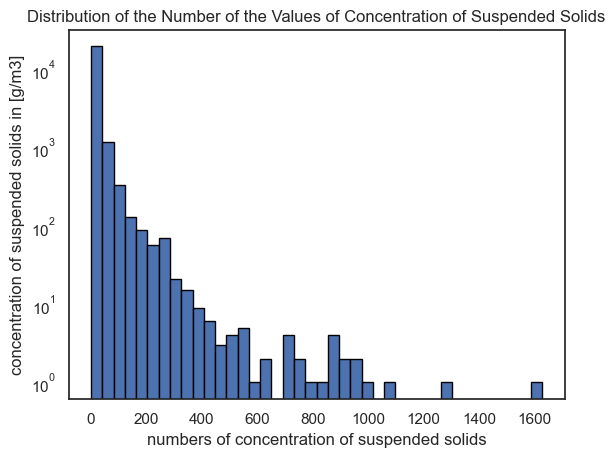

In [214]:
plt.hist(df_river['concent_solids'], bins=40,log=True, edgecolor='black')
plt.title("Distribution of the Number of the Values of Concentration of Suspended Solids")
plt.xlabel("numbers of concentration of suspended solids")
plt.ylabel("concentration of suspended solids in [g/m3]")
plt.show()

<span style='color: red;'>I have the feeling this plot doesn't go here. You haven't handle missing values/outlier yet, but you're already looking in to relationship between variables? So, if you have any comments about why this is here, you can leave it if it makes sense, but explain why!</span><br>
<span style='color: green;'>Totally agreed! Just forgotten to move it to the NaNs-Section. I want to look into the correlations between flow rate, water level and suspended solids. If there is in general a correlation, than I could look into the outliers. And if there is also a correlation, it could be plausible and proving them as "real" (no mistaken) values. It was just an idea, and maybe it leads nowhere...</span>

<AxesSubplot:xlabel='flow_avg', ylabel='level_avg'>

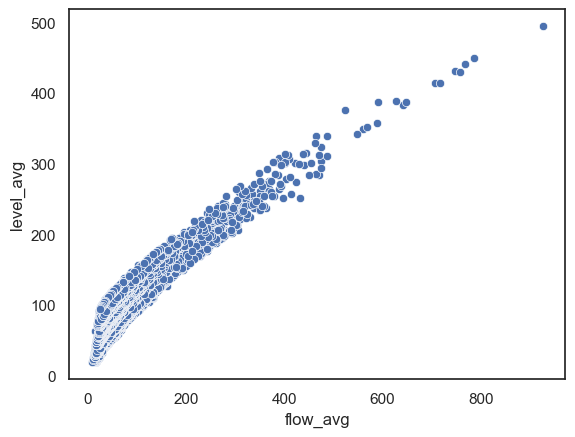

In [215]:
# looking into correlations flow_rate and water_level,
sns.scatterplot(data=df_river, x='flow_avg', y='level_avg')

<h3 id="outliersreservoir"> 7.) Reservoir Sylvenstein Water Level</h3>

<span style='color: red;'>This could be done on a for loop (creating all these columns and filling them with the string 'normal'.</span>
<br><span style='color: green;'>yes, reserved for later ;)  see the task in clickup</span>
<span style='color: red;'>Explain what you're doing!</span>
<br><span style='color: green;'>done</span>


In [216]:
# creating new variables for the outliers of each variable for outliers and "extreme" outliers
df_reservoir['is_outlier_reservoir_avg'] = 'normal'
df_reservoir['is_outlier_reservoir_avg_extreme'] = 'normal'
df_reservoir['is_outlier_reservoir_max'] = 'normal'
df_reservoir['is_outlier_reservoir_max_extreme'] = 'normal'
df_reservoir['is_outlier_reservoir_min'] = 'normal'
df_reservoir['is_outlier_reservoir_min_extreme'] = 'normal'

In [217]:
# marking all outliers of water level of the reservoir (average)
outliers_IQR_extreme(df_reservoir, 'reservoir_avg', 'is_outlier_reservoir_avg', 'is_outlier_reservoir_avg_extreme')

lower limit:  229.0 number of outliers:  197 out of  23761 
lower limit 99%:  199.0 number of outliers:  0 out of  23761 
upper limit:  269.0 number of outliers:  1788 out of  23761 
upper limit 99%:  349.0 number of outliers:  72 out of  23761 
outliers:
 is_outlier_reservoir_avg
normal       21776
suspected     1985
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_reservoir_avg_extreme
normal       23689
suspected       72
Name: count, dtype: int64


In [218]:
# looking into the extreme outliers of water level of the reservoir (average), if they are lying within flood event:
df_reservoir.loc[df_reservoir['is_outlier_reservoir_avg_extreme'] == 'suspected', 'is_outlier_reservoir_avg_extreme'] = df_reservoir.loc[
    df_reservoir['is_outlier_reservoir_avg_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_reservoir['is_outlier_reservoir_avg_extreme'].value_counts()

is_outlier_reservoir_avg_extreme
normal       23689
confirmed       45
invalid         27
Name: count, dtype: int64

<span style='color: violet'>There are 1985 outliers regarding 75% out of 23.761 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers: 45 are confirmed (they are lying within flood events), 27 are set "invalid": TO BE DISCUSSED: WHAT DOING NOW?</b></span>

In [219]:
# marking all outliers of water level of the reservoir (maximum)
outliers_IQR_extreme(df_reservoir, 'reservoir_max', 'is_outlier_reservoir_max', 'is_outlier_reservoir_max_extreme')

lower limit:  226.0 number of outliers:  0 out of  23754 
lower limit 99%:  193.0 number of outliers:  0 out of  23754 
upper limit:  274.0 number of outliers:  1835 out of  23754 
upper limit 99%:  369.0 number of outliers:  67 out of  23754 
outliers:
 is_outlier_reservoir_max
normal       21926
suspected     1835
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_reservoir_max_extreme
normal       23694
suspected       67
Name: count, dtype: int64


In [220]:
# looking into the extreme outliers of the water level of the reservoir (maximum), if they are lying within flood event:
df_reservoir.loc[df_reservoir['is_outlier_reservoir_max_extreme'] == 'suspected', 'is_outlier_reservoir_max_extreme'] = df_reservoir.loc[
    df_reservoir['is_outlier_reservoir_max_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_reservoir['is_outlier_reservoir_max_extreme'].value_counts()

is_outlier_reservoir_max_extreme
normal       23694
confirmed       41
invalid         26
Name: count, dtype: int64

<span style='color: violet'>There are 1835 outliers regarding 75% out of 23.754 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers: 41 are confirmed (they are lying within flood events), 21 are set "invalid": TO BE DISCUSSED: WHAT DOING NOW?</b></span>

In [221]:
# marking all outliers of water level of the reservoir (minimum)
outliers_IQR_extreme(df_reservoir, 'reservoir_min', 'is_outlier_reservoir_min','is_outlier_reservoir_min_extreme')

lower limit:  228.0 number of outliers:  80 out of  23754 
lower limit 99%:  198.0 number of outliers:  0 out of  23754 
upper limit:  268.0 number of outliers:  1448 out of  23754 
upper limit 99%:  338.0 number of outliers:  70 out of  23754 
outliers:
 is_outlier_reservoir_min
normal       22233
suspected     1528
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_reservoir_min_extreme
normal       23691
suspected       70
Name: count, dtype: int64


In [222]:
# looking into the extreme outliers of water level of the reservoir (minimum), if they are lying within flood event:
df_reservoir.loc[df_reservoir['is_outlier_reservoir_min_extreme'] == 'suspected', 'is_outlier_reservoir_min_extreme'] = df_reservoir.loc[
    df_reservoir['is_outlier_reservoir_min_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_reservoir['is_outlier_reservoir_min_extreme'].value_counts()

is_outlier_reservoir_min_extreme
normal       23691
confirmed       40
invalid         30
Name: count, dtype: int64

<span style='color: violet'>There are 1.528 outliers regarding 75% out of 23.754 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers: 40 are confirmed (they are lying within flood events), 30 are set "invalid": TO BE DISCUSSED: WHAT DOING NOW?</b></span>

<h3 id="outliersweather"> 8.) Outliers Weather</h3>

In [223]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24417 entries, 0 to 2512
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    24417 non-null  datetime64[ns]
 1   tavg    24417 non-null  float64       
 2   tmin    24417 non-null  float64       
 3   tmax    24417 non-null  float64       
 4   prcp    24417 non-null  float64       
 5   snow    22849 non-null  float64       
 6   wdir    9785 non-null   float64       
 7   wspd    14490 non-null  float64       
 8   wpgt    14475 non-null  float64       
 9   pres    14554 non-null  float64       
 10  tsun    24412 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.2 MB


In [224]:
# Adding columns "month" and "year" for an easier handling:
df_weather['year'] = df_weather['date'].dt.year
df_weather['month'] = df_weather['date'].dt.month

<span style='color: red;'>This could be done on a for loop (creating all these columns and filling them with the string 'normal').</span><br>
<span style='color: green;'>Yes, later (I created a task in cklick-up with low priority)</span><br>
<span style='color: red;'>Explain what you're doing!</span>

In [225]:
# creating new variables for marking the outliers. Setting the default value to "normal"

df_weather['is_outlier_tavg'] = 'normal'
df_weather['is_outlier_tmin'] = 'normal'
df_weather['is_outlier_tmax'] = 'normal'
df_weather['is_outlier_prcp'] = 'normal'
df_weather['is_outlier_snow'] = 'normal'
df_weather['is_outlier_wspd'] = 'normal'
df_weather['is_outlier_wpgt'] = 'normal'
df_weather['is_outlier_pres'] = 'normal'

<span style='color: red;'>What is the difference with the previous one?</span><br>
<span style='color: green;'>I called it "normal", because I am only checking the common Quantiles 25% and 75%. I don't need that for the  weather, because I don't have the same requirments as for ther river data and reservoir.</span>

<span style='color: yellow;'>Probably adding this to the functions EDA would be better.</span><br>
<span style='color: green;'>same queastion: the function is so special, don't think I will nee that again... but maybe this one I could need. TO BE DISCUSSED WITH SOFÍA.</span>


In [226]:
# function that marks the outlier of a variable using IQR

def outliers_IQR_normal(df, observed_col, is_outlier):

    # step 1: finding Q1, Q3, Q01, Q99 for calculating IQR
    Q1 = df[observed_col].quantile(.25) 
    Q3 = df[observed_col].quantile(.75)
    # print ("Q1 = ", Q1,
    #       "\nQ3 = ", Q3) - only for debugging, removing later
    IQR = Q3 - Q1
    # print ("IQR = ", IQR) - only for debugging, removing later

    # step 2: calculating the lower and upper limmits to detect the outliers (lying outside these limits)

    lower_limit = Q1 - 1.5 * IQR

    # print("lower limit =", Q1, "- 1.5 *", IQR ) - only for debugging, removing later
    upper_limit = Q3 + 1.5 * IQR
    
    # step 3: getting the amount of data of all outliers

    num_outliers_lower_limit = df[df[observed_col] < lower_limit]

    num_outliers_upper_limit = df[df[observed_col] > upper_limit]

    # step 4: marking all outliers (and also extreme outliers) as 'suspected'
    outlier_condition = ((df[observed_col] > upper_limit) | (df[observed_col] < lower_limit))
    df.loc[outlier_condition, is_outlier] = 'suspected'
    df[(df[is_outlier] == 'suspected')]
    df[is_outlier].value_counts()     
    
    # printing the results for checking
    print("lower limit: ", lower_limit, "number of outliers: " , num_outliers_lower_limit.shape[0], "out of " ,df[observed_col].count(),
          "\nupper limit: ", upper_limit, "number of outliers: " , num_outliers_upper_limit.shape[0], "out of " ,df[observed_col].count(),
          "\noutliers:\n",   df[is_outlier].value_counts())

In [227]:
# Pseudo-code (later!): To not write so much times the same (as following for all variables of weather)
# one dataframe, of what all variables need one outlier-column
# loop through the dataframe
# using outliers_IQR_normal 
# - marking the outliers
# - printing the results
# but how to get the right outlier-variable?

<span style='color: green'>Do I really need to document the results of all this following code sections? It feels so redundant :(</span)>

In [228]:
# Marking all outliers for the average air temperature:
outliers_IQR_normal(df_weather, 'tavg', 'is_outlier_tavg')

lower limit:  -15.000000000000002 number of outliers:  10 out of  24417 
upper limit:  34.6 number of outliers:  0 out of  24417 
outliers:
 is_outlier_tavg
normal       24407
suspected       10
Name: count, dtype: int64


In [229]:
# Marking all outliers for the minimums of air temperature:
outliers_IQR_normal(df_weather, 'tmin', 'is_outlier_tmin')

lower limit:  -15.850000000000001 number of outliers:  48 out of  24417 
upper limit:  27.75 number of outliers:  0 out of  24417 
outliers:
 is_outlier_tmin
normal       24369
suspected       48
Name: count, dtype: int64


In [230]:
# Marking all outliers for the maximums of air temperature:
outliers_IQR_normal(df_weather, 'tmax', 'is_outlier_tmax')

lower limit:  -14.249999999999998 number of outliers:  3 out of  24417 
upper limit:  42.15 number of outliers:  0 out of  24417 
outliers:
 is_outlier_tmax
normal       24414
suspected        3
Name: count, dtype: int64


In [231]:
# Marking all outliers for the precipitation:
outliers_IQR_normal(df_weather, 'prcp', 'is_outlier_prcp')

lower limit:  -3.9000000000000004 number of outliers:  0 out of  24417 
upper limit:  6.5 number of outliers:  3147 out of  24417 
outliers:
 is_outlier_prcp
normal       21270
suspected     3147
Name: count, dtype: int64


<span style = 'color: violet'>In precipitation there are a lot of suspected outliers: 3.147 out of 21.270. <br>
In the next steps I will look deeper into data to decide how to handle them.</span>

In [232]:
df_weather[df_weather['prcp'] == 0]['prcp'].count()

12428

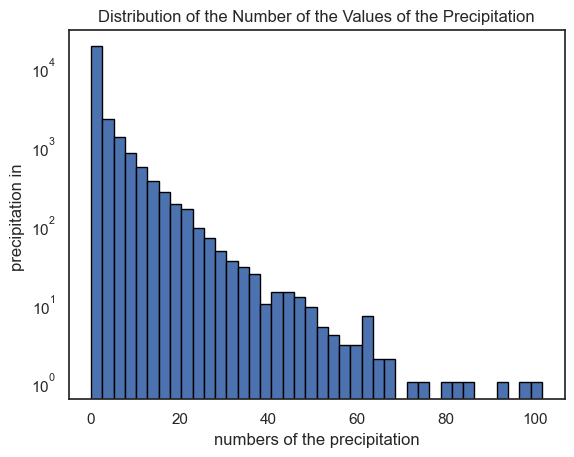

In [233]:
# plotting a histogram for showing the distribution of the precipitation:
plt.hist(df_weather['prcp'], bins=40,log=True, edgecolor='black')
plt.title("Distribution of the Number of the Values of the Precipitation")
plt.xlabel("numbers of the precipitation")
plt.ylabel("precipitation in ")
plt.show()

<span style='color:violet'>The lower limit is negative because of the many zeros. So I will look into the median with and without zeros to have a comparison.</span>

In [234]:
df_prcp_without_zeros = df_weather[df_weather['prcp'] != 0]

<span style='color: violet'>. Next step is to check, how the distribution will change by excluding the zeros.<br>
LOST codelines... have to reconstruct it!</span>

<span style='color: violet'><b>Snow depth need a special handling:</b><br>
Because, sometimes "no snow" is a "0" and sometimes it is a Nan. And there are months, where there isn't any snow in Munich.<br>
The following steps need to be made:<br>
<ol>
    <li>Getting a better picture of the data, when there is definitely no snow, and where not</li>
    <li>Looking into the winter months</li>
    <li>Deciding what to do exactly with all the Nans and "0"s</li>
    <li>Replacing the Nans in time with no snow with a zero</li>
</ol>

In [235]:
# first I will take a look into the sums of the snow depth per month all over the years
snow_per_month = df_weather.groupby(df_weather['month'])['snow'].mean()
snow_per_month


month
1     38.665377
2     33.319035
3     13.318671
4      1.374432
5      0.005562
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.084034
11     6.066158
12    22.483823
Name: snow, dtype: float64

Text(0, 0.5, 'Mean of the Snow Depth')

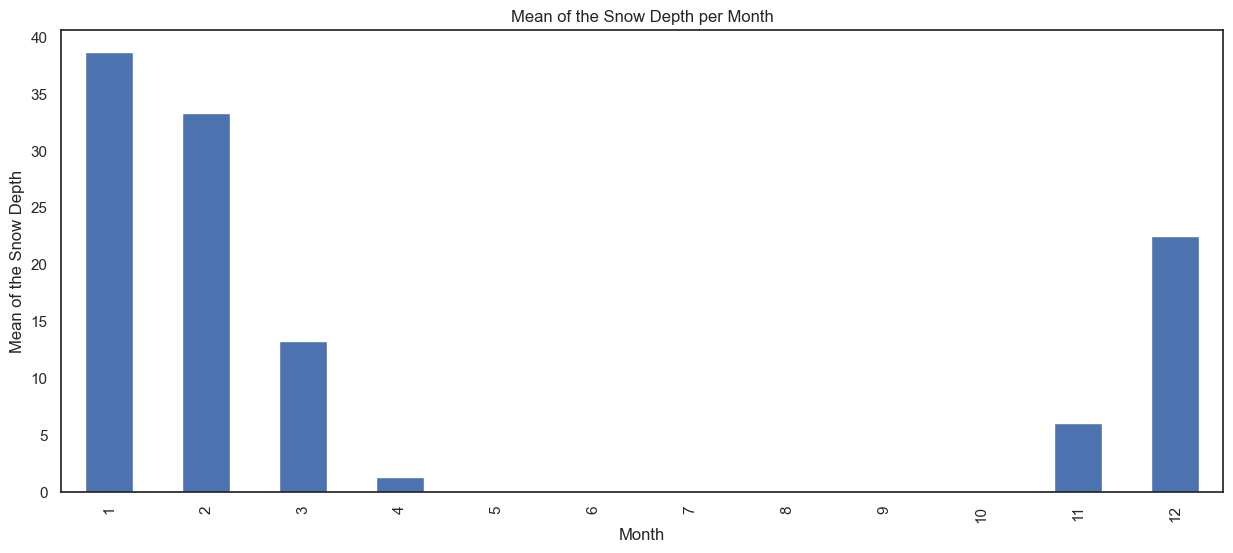

In [236]:
# there is no snow from June to September
# plotting the distribution to get a better overview:
plt.figure(figsize=(15, 6))
snow_per_month.plot(kind='bar')
plt.title('Mean of the Snow Depth per Month')
plt.xlabel('Month')
plt.ylabel('Mean of the Snow Depth')

In [239]:
# looking into the values, where snow depth == 0 by month, to see if there are zeros in all months -> there are!
df_snow = df_weather[df_weather['snow'] == 0][['month','snow']].groupby('month').count().reset_index()
df_snow.columns = ['month', 'mean of the snow dept']
df_snow

month  mean of the snow dept
0       1                   1027
1       2                   1130
2       3                   1685
3       4                   1912
4       5                   1797
5       6                   1734
6       7                   1798
7       8                   1798
8       9                   1766
9      10                   2018
10     11                   1747
11     12                   1342

<span style='color: violet'><b>Note:</b> There is no snow depth between June and September (included).</span>

In [149]:
# now looking into the NaNs per month. 
df_nans_snow = df_weather['snow'].isna().groupby(df_weather['month']).sum()
df_zeros_snow = df_weather[df_weather['snow'] == 0][['month','snow']].groupby('month').count()
print("Nans in snow depth total all over the years: ", df_weather['snow'].isna().sum(),
      "\nNans per month all over the years: ", df_nans_snow,
      "\n--------------",
      "\nZeros in snow depth total all over the years:", df_weather[df_weather['snow']== 0]['snow'].count(),
      "\nZeros per month all over the years: ", df_zeros_snow)


Nans in snow depth total all over the years:  1568 
Nans per month all over the years:  month
1       3
2      28
3      31
4      31
5     279
6     276
7     279
8     279
9     244
10     54
11     33
12     31
Name: snow, dtype: int64 
-------------- 
Zeros in snow depth total all over the years: 19754 
Zeros per month all over the years:         snow
month      
1      1027
2      1130
3      1685
4      1912
5      1797
6      1734
7      1798
8      1798
9      1766
10     2018
11     1747
12     1342


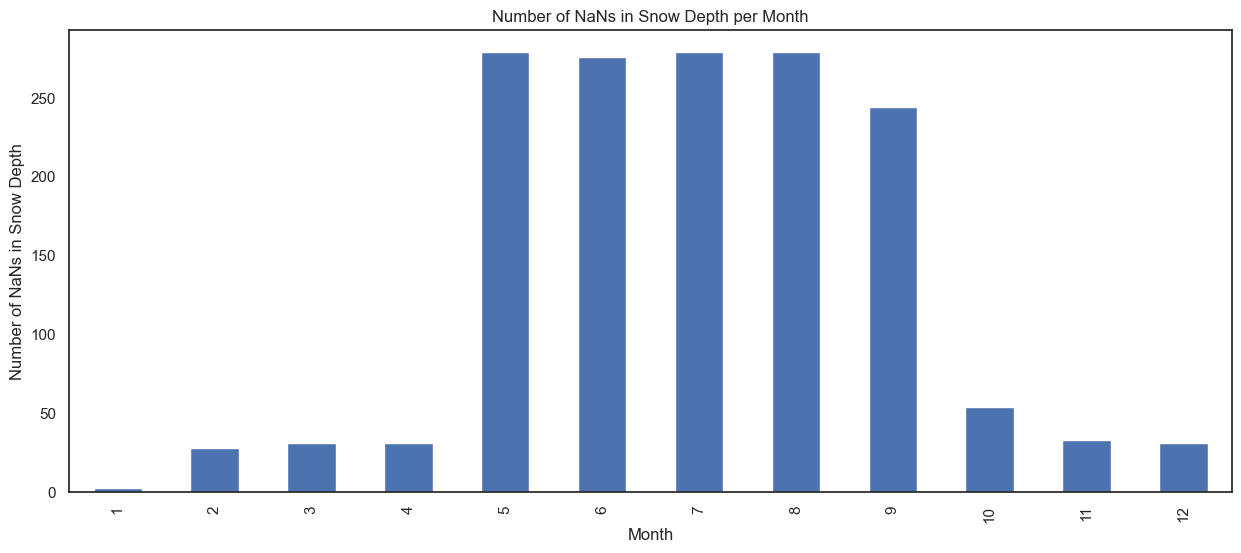

In [150]:
# plotting it to get a better overview:
plt.figure(figsize=(15, 6))
df_nans_snow.plot(kind='bar')
plt.title('Number of NaNs in Snow Depth per Month')
plt.xlabel('Month')
plt.ylabel('Number of NaNs in Snow Depth')
plt.show()

<span style='color: violet'><b>Note:</b> There is a mix of "0"s and Nans all over the data.<br>
Conclusion 1: Filling in all Nans between June and September (included) with a "0", and when I need to diversify, I will chose the winter timeframe<br>
Conclusion 2: Looking into the Nans of wintertime deeper in the section "Handling Nans"</span>

In [151]:
# Looking into the NaNs for June to September -> handling it later!
df_weather[(df_weather['month'] >= 6) & (df_weather['month'] <= 9)]['snow'].isna().sum()

1078

In [152]:
# Filling in "0"s for June to September
df_weather.loc[((df_weather['month'] >= 6) & (df_weather['month'] <= 9)), 'snow'] = 0

In [153]:
# Checking if they were replaced correctly
df_weather[(df_weather['month'] >= 6) & (df_weather['month'] <= 9)]['snow'].isna().sum()

0

<span style='color: violet'>As you can see: There are "real" NaNs to handle, but from June to October, there is no snow depth.<br>
So I will exclude the months June to September for checking the outliers and the medians</span>
<span style='color: violet'>
<b>Steps to do:</b>
<ol>
    <li>Filtering the months by excluding June to September/li>
    <li>Looking into the outliers of the filtered DataFrame, correct it.</li>
    <li>Calculating the medians like I did with rest of the variables</li> 
</ol>
</span>

In [154]:
# DataFrame excluding June to September and looking only into the values of snow depth > 0 (where actually is snow on the ground)
df_snow_wintertime = df_weather[((df_weather['month'] <=5) | (df_weather['month'] >=10)) & (df_weather['snow']>0)][['date','snow']]
df_snow_wintertime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3095 entries, 3 to 2211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3095 non-null   datetime64[ns]
 1   snow    3095 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 72.5 KB


In [155]:
# checking the outliers only for wintertime
outliers_IQR_normal(df_snow_wintertime, 'snow', 'is_outlier_snow')

lower limit:  -75.0 number of outliers:  0 out of  3095 
upper limit:  205.0 number of outliers:  171 out of  3095 
outliers:
 is_outlier_snow
suspected    171
Name: count, dtype: int64


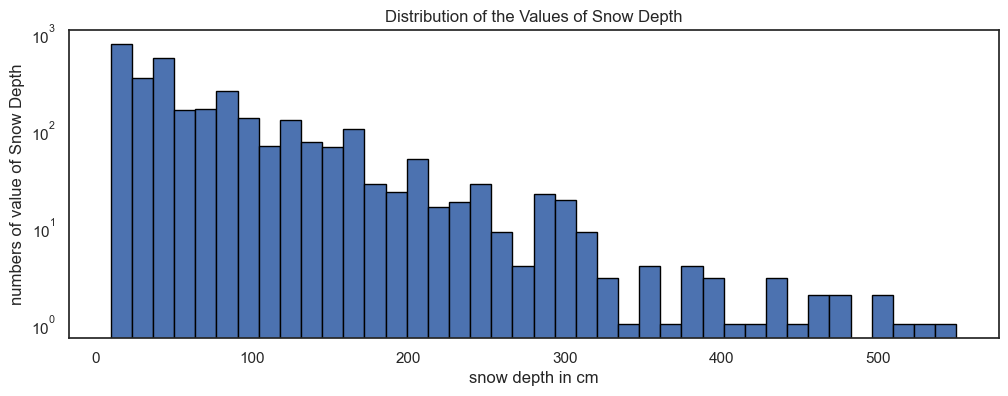

In [156]:
# Looking first into the distribution of all values of snow depth:
plt.figure(figsize=(12,4))
plt.hist(df_snow_wintertime['snow'], bins=40,log=True, edgecolor='black')
plt.title("Distribution of the Values of Snow Depth")
plt.ylabel("numbers of value of Snow Depth")
plt.xlabel("snow depth in cm")
plt.show()

<span style='color: violet'>There are 171 outliers by comparing only the values in wintertime. This DataFrame will be used when comparing the medians.</span>

In [157]:
# Marking all outliers in wind speed:
outliers_IQR_normal(df_weather, 'wspd', 'is_outlier_wspd')

lower limit:  -1.5499999999999998 number of outliers:  0 out of  14490 
upper limit:  18.849999999999998 number of outliers:  603 out of  14490 
outliers:
 is_outlier_wspd
normal       23814
suspected      603
Name: count, dtype: int64


In [158]:
# Marking all outliers in wind peak gust:
outliers_IQR_normal(df_weather, 'wpgt', 'is_outlier_wpgt')

lower limit:  -4.599999999999998 number of outliers:  0 out of  14475 
upper limit:  69.0 number of outliers:  497 out of  14475 
outliers:
 is_outlier_wpgt
normal       23920
suspected      497
Name: count, dtype: int64


In [159]:
# Marking all outliers in pressure:
outliers_IQR_normal(df_weather, 'pres', 'is_outlier_pres')

lower limit:  996.6 number of outliers:  179 out of  14554 
upper limit:  1036.6 number of outliers:  118 out of  14554 
outliers:
 is_outlier_pres
normal       24120
suspected      297
Name: count, dtype: int64


<h3 id=comparingmedian> 9.) Comparing the median of data with and without the outliers</h2>

<h4 id=coomparingriver>9.1.) Comparing The Medians Of The River Data </h4>

In [160]:
# function to find out all the difference of the medians:

def diff_median(median_incl, median_excl):
    median1 = median_incl.median()
    median2 = median_excl.median()
    
    diff_median_perc = (median1 - median2)/median1 * 100
    print("general median: ", median1, "\nmedian excluding outliers: ", median2,
        "\nThe general mean differs ", round(diff_median_perc, 2), ' percent from the median of the data excluding the outliers')

In [161]:
# water level max:
diff_median(df_river['level_max'],df_river[df_river['is_outlier_level_max'] != 'suspected']['level_max'])

general median:  86.0 
median excluding outliers:  84.0 
The general mean differs  2.33  percent from the median of the data excluding the outliers


In [162]:
# water level avg:
diff_median(df_river['level_avg'], df_river[df_river['is_outlier_level_avg'] != 'suspected']['level_avg'])

general median:  78.0 
median excluding outliers:  76.0 
The general mean differs  2.56  percent from the median of the data excluding the outliers


In [163]:
# flow rate max:
diff_median(df_river['flow_max'], df_river[df_river['is_outlier_flow_max'] != 'suspected']['flow_max'])

general median:  59.2 
median excluding outliers:  56.6 
The general mean differs  4.39  percent from the median of the data excluding the outliers


In [164]:
# flow rate avg:
diff_median(df_river['flow_avg'], df_river[df_river['is_outlier_flow_avg'] != 'suspected']['flow_avg'])

general median:  51.2 
median excluding outliers:  48.7 
The general mean differs  4.88  percent from the median of the data excluding the outliers


In [165]:
# concentration of suspended solids:
diff_median(df_river['concent_solids'], df_river[df_river['is_outlier_concent_solids'] != 'suspected']['concent_solids'])

general median:  12.02 
median excluding outliers:  11.11 
The general mean differs  7.57  percent from the median of the data excluding the outliers


In [166]:
# reservoir water level avg:
diff_median(df_reservoir['reservoir_avg'], df_reservoir[df_reservoir['is_outlier_reservoir_avg'] != 'suspected']['reservoir_avg'])

general median:  249.0 
median excluding outliers:  249.0 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [167]:
# reservoir water level max:
diff_median(df_reservoir['reservoir_max'], df_reservoir[df_reservoir['is_outlier_reservoir_max'] != 'suspected']['reservoir_max'])

general median:  250.0 
median excluding outliers:  249.0 
The general mean differs  0.4  percent from the median of the data excluding the outliers


In [168]:
# reservoir water level min:
diff_median(df_reservoir['reservoir_min'], df_reservoir[df_reservoir['is_outlier_reservoir_min'] != 'suspected']['reservoir_min'])

general median:  249.0 
median excluding outliers:  248.0 
The general mean differs  0.4  percent from the median of the data excluding the outliers


<h4 id=comparingweather>9.2.) Comparing The Medians Of The Weather Data </h4>

In [169]:
# weather: tavg
diff_median(df_weather['tavg'], df_weather[df_weather['is_outlier_tavg'] != 'suspected']['tavg'])

general median:  10.0 
median excluding outliers:  10.0 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [170]:
# weather: tmin
diff_median(df_weather['tmin'], df_weather[df_weather['is_outlier_tmin'] != 'suspected']['tmin'])

general median:  6.0 
median excluding outliers:  6.0 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [171]:
# weather: tmax
diff_median(df_weather['tmax'], df_weather[df_weather['is_outlier_tmax'] != 'suspected']['tmax'])

general median:  14.4 
median excluding outliers:  14.4 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [172]:
# weather: snow (only wintertimes and values > 0, see section "outliers")
diff_median(df_snow_wintertime['snow'], df_snow_wintertime[df_snow_wintertime['is_outlier_snow'] != 'suspected']['snow'])

general median:  50.0 
median excluding outliers:  50.0 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [173]:
#ATTENTION!!! NEED TO GO THROUGH IT AGAIN!!!
# I think I have to look into the outliers of the DataFrame without Zeros... 

# weather: precipitation - applying it to the created DataFrame without zeros:
diff_median(df_prcp_without_zeros['prcp'], df_weather[df_weather['is_outlier_prcp'] != 'suspected']['prcp'])
# it seems NaNs equal "0", only if there is snow you the columns contains values, so I need to investigate the available data, finding out, if there are outliers and check the medians

general median:  2.7 
median excluding outliers:  0.0 
The general mean differs  100.0  percent from the median of the data excluding the outliers


In [174]:
# weather:wspd
diff_median(df_weather['wspd'], df_weather[df_weather['is_outlier_wspd'] != 'suspected']['wspd'])

general median:  8.3 
median excluding outliers:  7.9 
The general mean differs  4.82  percent from the median of the data excluding the outliers


In [175]:
# weather: wpgt
diff_median(df_weather['wpgt'], df_weather[df_weather['is_outlier_wpgt'] != 'suspected']['wpgt'])

general median:  30.6 
median excluding outliers:  29.9 
The general mean differs  2.29  percent from the median of the data excluding the outliers


In [176]:
# weather: pres
diff_median(df_weather['pres'], df_weather[df_weather['is_outlier_pres'] != 'suspected']['pres'])

general median:  1016.4 
median excluding outliers:  1016.5 
The general mean differs  -0.01  percent from the median of the data excluding the outliers


<span style='color: violet'> RESULT: THE DIFFERENCES BETWEEN ALL THE MEDIANS WITH OR WITHOUT OUTLIERS ARE All UNDER 10%<br>
Conclusion: there is no need to do anything.</span>

<h2 id=duplicates>B.) Removing Duplicates</h2>

<h3>Approach:</h3>

<p>I will take a look into the single DataFrames of the river, becauses if I would take the merged DataFrame, because it would be mixed up (with all the data of the other river data.
To check if there are any, I will write a function that prints the differences between the DataFrames before and after dropping.</p>

In [177]:
# Creating a functions for droppimg and checking the duplicates of all DataFrames 

def dropping_dupllicates_list(dict_dataframes_names):
    for name, df in dict_dataframes_names.items():
        
        print("\Differences in the dataframes before and after dropping duplicates: ",
              "\n", name,
              "\Differences in Data: ", 
              "\n", (df.count()-df.drop_duplicates().count()),
              "\n---------------------------------")

In [178]:
# creating a dictionary with all DataFrames and their names for the loop
dataframes_names = {'water level' : df_water_level, 
                    'flow rate' : df_flow_rate,
                    'water temperature' : df_water_temperature,
                    'concentration of suspended solids' : df_concent_solids,
                    'weather' : df_weather}
dropping_dupllicates_list(dataframes_names)

\Differences in the dataframes before and after dropping duplicates:  
 water level \Differences in Data:  
 date         0
level_avg    0
level_max    0
level_min    0
dtype: int64 
---------------------------------
\Differences in the dataframes before and after dropping duplicates:  
 flow rate \Differences in Data:  
 date        0
flow_avg    0
flow_max    0
flow_min    0
dtype: int64 
---------------------------------
\Differences in the dataframes before and after dropping duplicates:  
 water temperature \Differences in Data:  
 date              0
water_temp_avg    0
water_temp_max    0
water_temp_min    0
dtype: int64 
---------------------------------
\Differences in the dataframes before and after dropping duplicates:  
 concentration of suspended solids \Differences in Data:  
 date              0
concent_solids    0
year              0
month             0
dtype: int64 
---------------------------------
\Differences in the dataframes before and after dropping duplicates:  

<span style='color:violet'><b>Result:</b><br>
There are no duplicates.<br>
<b>NOTE:</b> Question for Sofía (see also ticket in clickup): Now I am lucky that there aren't no duplicates. If so, I would have needed to update the merged DataFrame.<b>
I think, the order of my steps is not right!?!</span>

<h2 id=nans>>C.) Handling NaNs</h2>

<h3>Approach:</h3>

<h4> Looking Into the Missing Data by Day</h4>
<p>I need 2 DataFrames:</p>
<ol>
    <li>DataFrame for calculating the days of swimming, taking ice baths: starting by 1980-01-11, when the latest recording (variable water temperature) started</li>
    <li>DataFrame with all values to have later the all over maximums, averages etc.</li>
</ol>

<h4>Handling NaNs in the "Maximum"-DataFrame
<ol>
    <li>Identifying the "real" Nans (not into the NaNs, that were introduced due to merging multiple variables into the river DataFrame) by looking into them in the specific timeframes</li>
    <li>Plotting the NaNs to see if there are time rows or unique NaNs</li>
    <li>If within timerows: Fillin NaNs with over all median</li>
    <li>If unique NaNs: Fillin neighbours' means</li>
    <em>For both: river and weather data</em>
</ol>

<h4> A. DataFrame (Calculating Days)</h4>
<h5> 1. River Data</h5>
<ol>
    <li>Creating a new DataFrame starting by 1980-01-11</li>
    <li>Handling NaNs</li>
    <li>Investigating the missing data by day -> Manipulating df_river if necessary</li>
</ol>

<h5> 2. Weather Data</h5> 
<ol>
    <li>Handling NaNs</li>
</ol>

<h5> 3. Loo
<h5> 3. Merging The Data</h5>
<span style="color: violet"><b>Note:</b>Here are the dates of all river variables and timeframes:</span>
<p><strong>Timeframes:</strong></p>
<ul>
    <li><strong>River Flow Rate</strong> [m³/s]: average, minimum, maximum, daily data from 01.01.1958 to present (18.11.2024)</li>
    <li><strong>Water Pollution: Suspended Solids Concentration</strong> [g/m³]: daily data from 31.10.1965 to 21.08.2024</li>
    <li><strong>Water Level</strong> [cm]: average, minimum, maximum, daily data from 01.11.1973 to present (18.11.2024)</li>
    <li><strong>Water Temperature</strong> [°C]: average, minimum, maximum, daily data from 01.11.1980 to present (18.11.2024)</li>
    <em>Note: There are known issues with data accuracy at the measurement station.</em></li>
</ul>


<span style='color: red'><strong>OLD TEXT!!!</strong></span>
<p>Due to merging multiple variables into the river DataFrame, some NaNs were introduced, as the variables cover different timeframes. Therefore, I have developed the following steps to handle the NaNs systematically:</p>

<h4>A. River Data</h4>
<ol>
    <li><strong>Filling NaNs with zero:</strong> I will fill all NaNs created due to merging by reviewing the different timeframes for each variable.</li>
    <li><strong>Marking adjustments:</strong> A new column named <code>"nans_filled_status"</code> will be added to document the handling approach.</li>
</ol>

<h4>B. Weather Data</h4>
<ol>
    <li><strong>Deeper analysis of precipitation data:</strong> I will investigate the distribution of precipitation data more closely (see section "Outliers").</li>
    <li><strong>Deeper analysis of snow depth:</strong> The distribution of snow depth will also be examined more closely (see section "Outliers").</li>
    <li><strong>Handling NaNs:</strong> NaNs will be filled using zero, the median of neighboring values, or other imputation strategies.</li>
</ol>

<h4>C. General Considerations</h4>
<p>Since the data is recorded on a daily basis, missing records (entire days) may result in undetected NaNs. To address this:</p>
<ol>
    <li><strong>Yearly completeness check:</strong> I will check the number of records for each variable per year to identify gaps.</li>
    <li><strong>Imputation:</strong> If missing data points are found, I will fill them using appropriate strategies like zero-filling, median imputation, or interpolation.</li>
</ol>

<h4>Open Discussion Points for Mentoring:</h4>
<ul>
    <li>Does this structured approach align with standard practices?</li>
</ul>


In [179]:
# Looking into the DataFrame
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24125 entries, 0 to 24124
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               24125 non-null  datetime64[ns]
 1   flow_avg                           24125 non-null  float64       
 2   flow_max                           19742 non-null  float64       
 3   flow_min                           19742 non-null  float64       
 4   level_avg                          18646 non-null  float64       
 5   level_max                          18646 non-null  float64       
 6   level_min                          18646 non-null  float64       
 7   concent_solids                     21250 non-null  float64       
 8   water_temp_avg                     15367 non-null  float64       
 9   water_temp_max                     15367 non-null  float64       
 10  water_temp_min                    

In [180]:
# to visualize the numbers of values of each variable in a function:
# function that shows the number of every variable's value per year in a barchart:

def values_per_year_barchart(df, list_cols):

    for col in list_cols:
        
        df_per_year = df[['year', col]].groupby('year').count()
         
        df_per_year.plot(kind='bar', figsize=(12,6))
        plt.title("Number of Records Per Year")
        plt.xlabel('Year')
        plt.ylabel('Number of records')
        plt.show()



In [181]:
# to see the numbers of each variables creating a function, that shows the numbers of values for each variable when <= 365

def list_missing_records(df, list_cols):

    for col in list_cols:

        print(f"Years with missing records (day) in {col}:")
        df_per_year = df[['year', col]].groupby('year').count()
        print(df_per_year[df_per_year[col]< 365])
        print("______________________________")


In [182]:
# function that prints out a list of a column with the number of NaNs

def list_nans(df, list_cols):
    for col in list_cols:
        print("NaNs in ", col, ":"
        "\n",df[df[col].isna() == True].groupby('year')[col].size(),
        "\n------------------------------------")
            

In [183]:
# creating a list of the names of all numeric columns for using it in 
list_cols_river= df_river.select_dtypes(include=float).columns.tolist()
list_cols_river

['flow_avg',
 'flow_max',
 'flow_min',
 'level_avg',
 'level_max',
 'level_min',
 'concent_solids',
 'water_temp_avg',
 'water_temp_max',
 'water_temp_min',
 'original_concent_solids',
 'previous',
 'next']

In [184]:
# dropping the unnecessary elements in the list:
del(list_cols_river[10])

In [185]:
# looking into the list of all variables for the river data
list_cols_river

['flow_avg',
 'flow_max',
 'flow_min',
 'level_avg',
 'level_max',
 'level_min',
 'concent_solids',
 'water_temp_avg',
 'water_temp_max',
 'water_temp_min',
 'previous',
 'next']

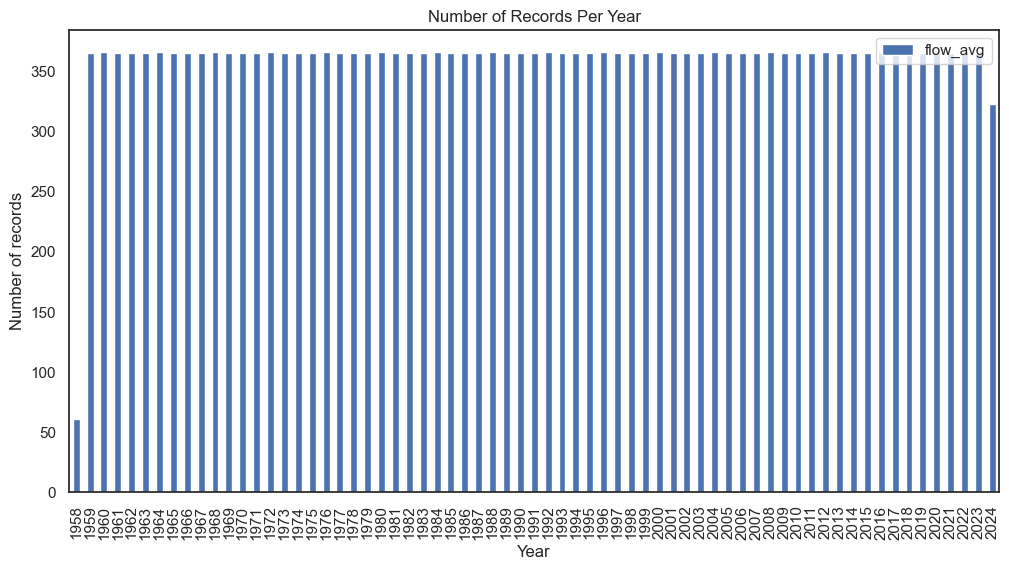

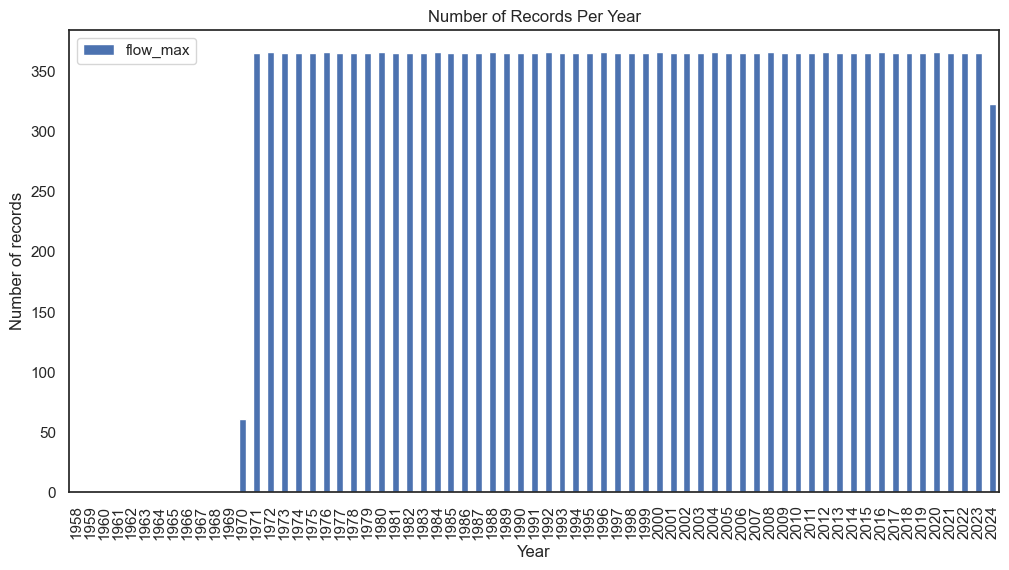

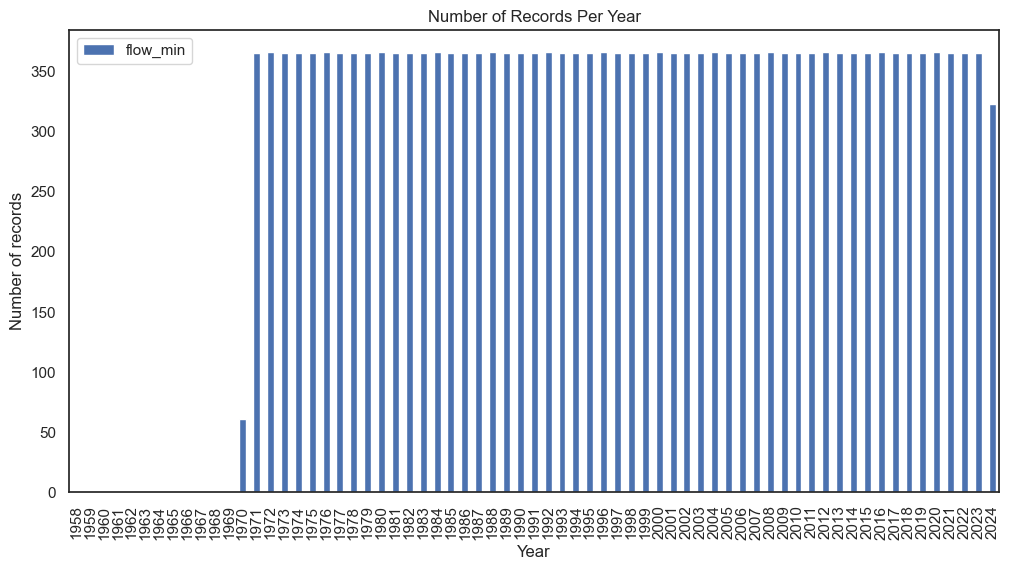

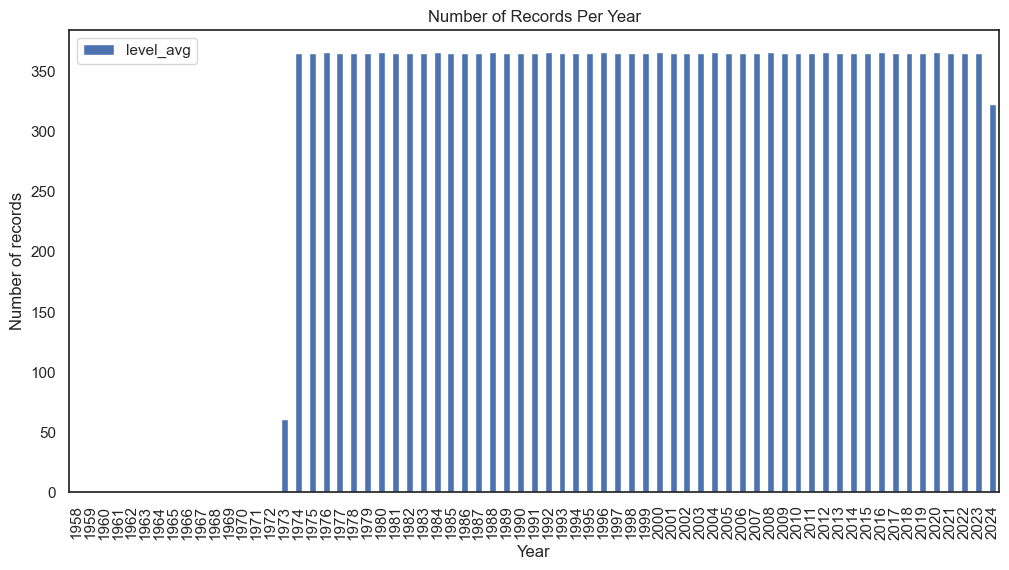

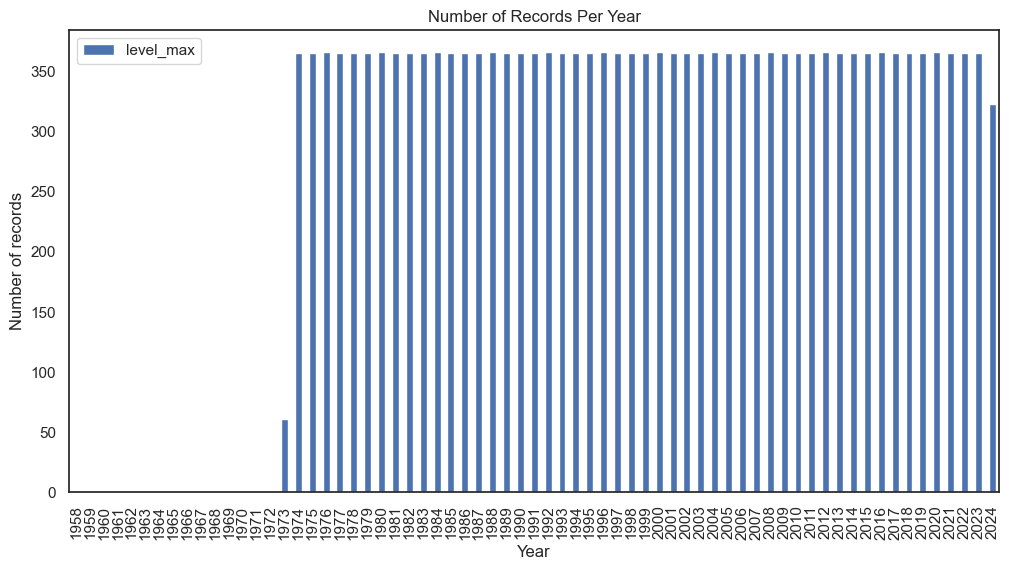

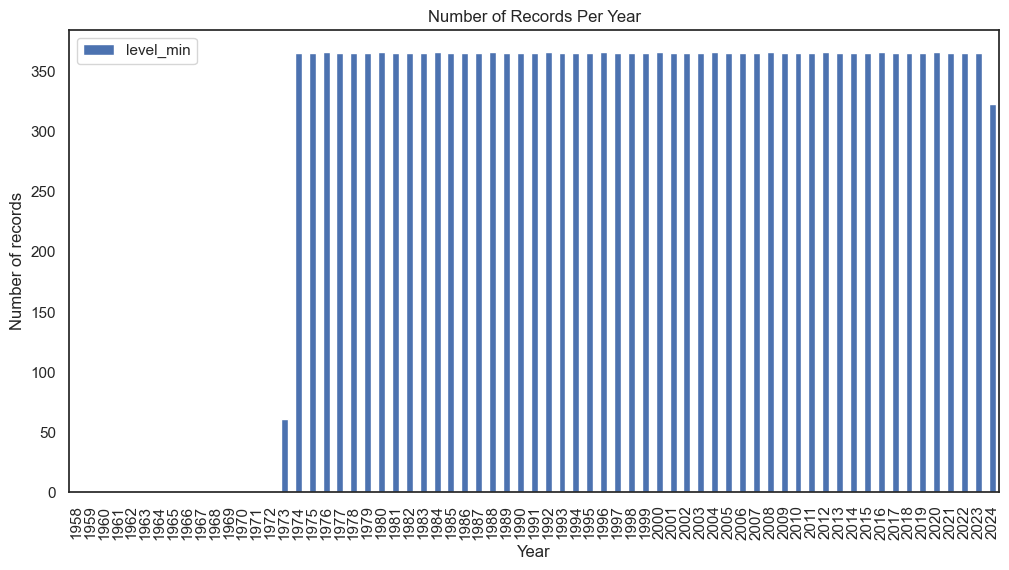

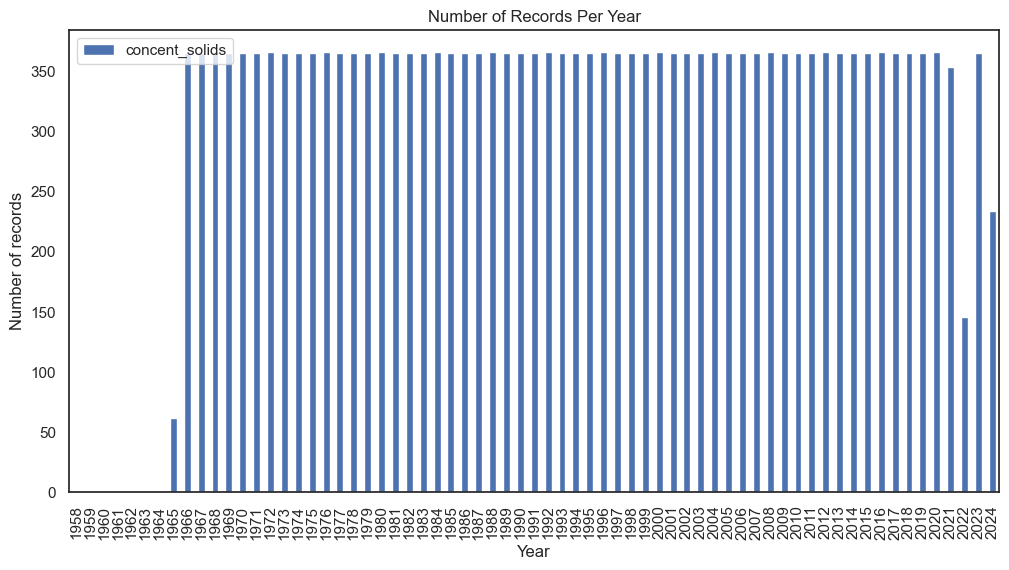

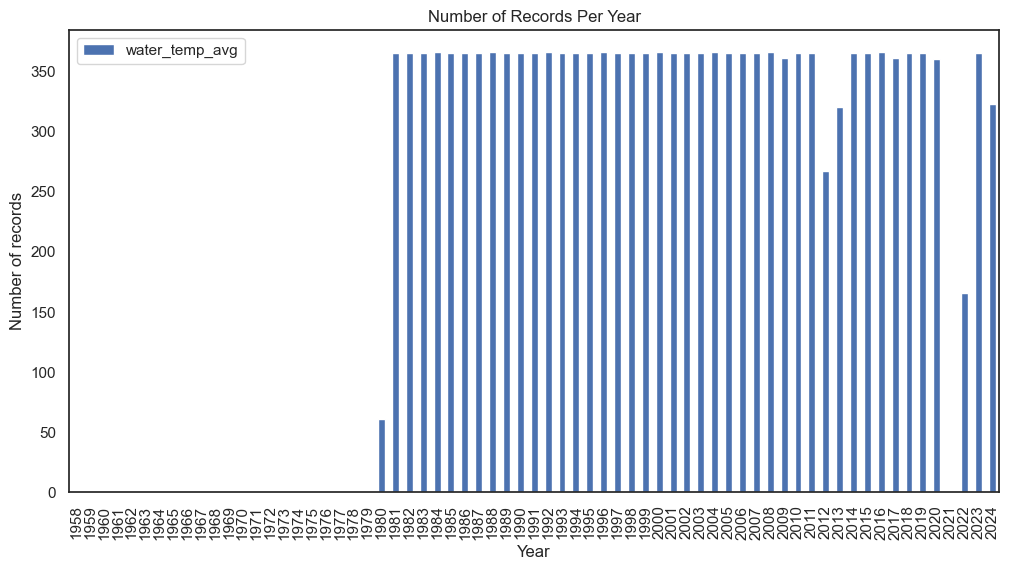

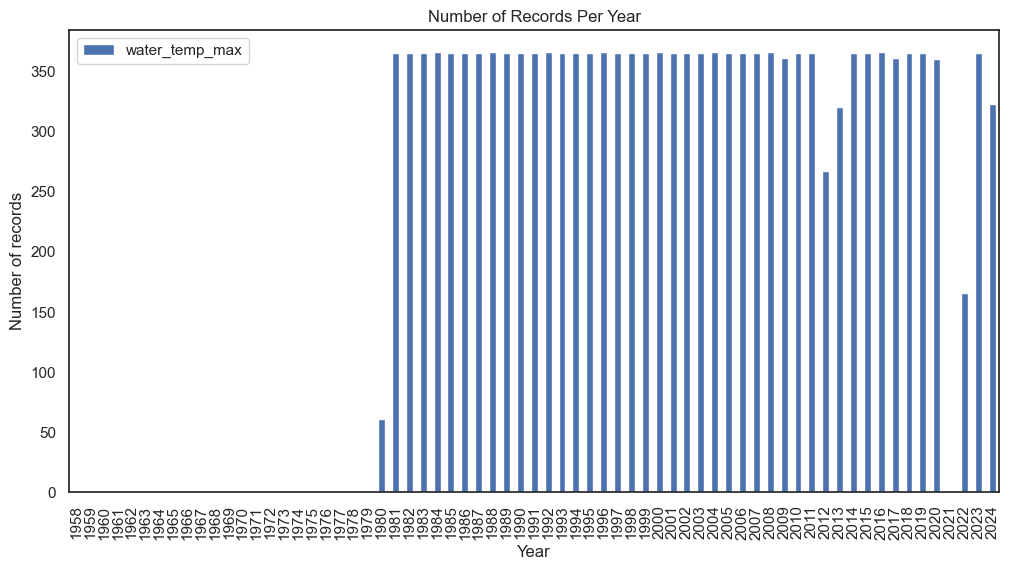

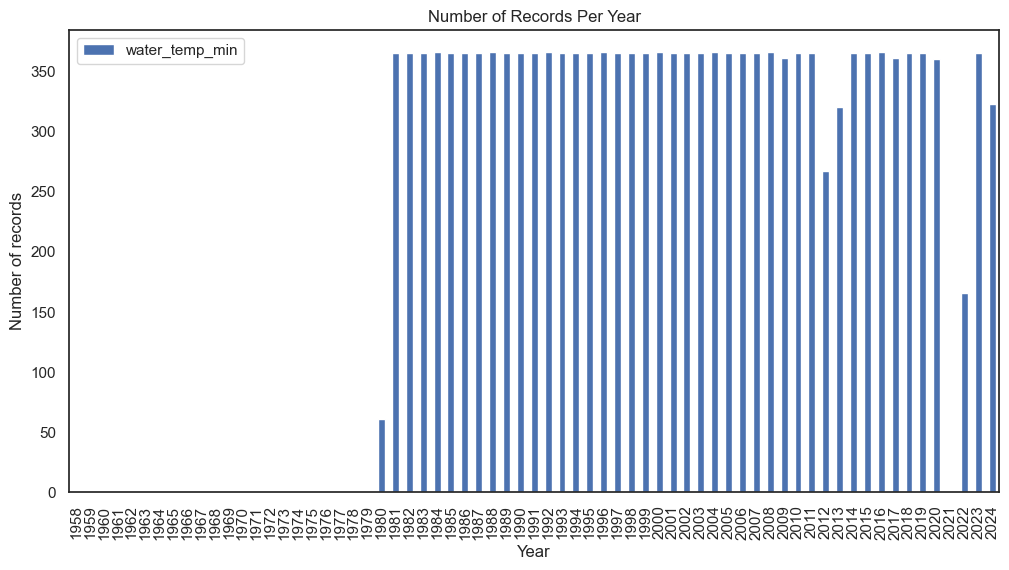

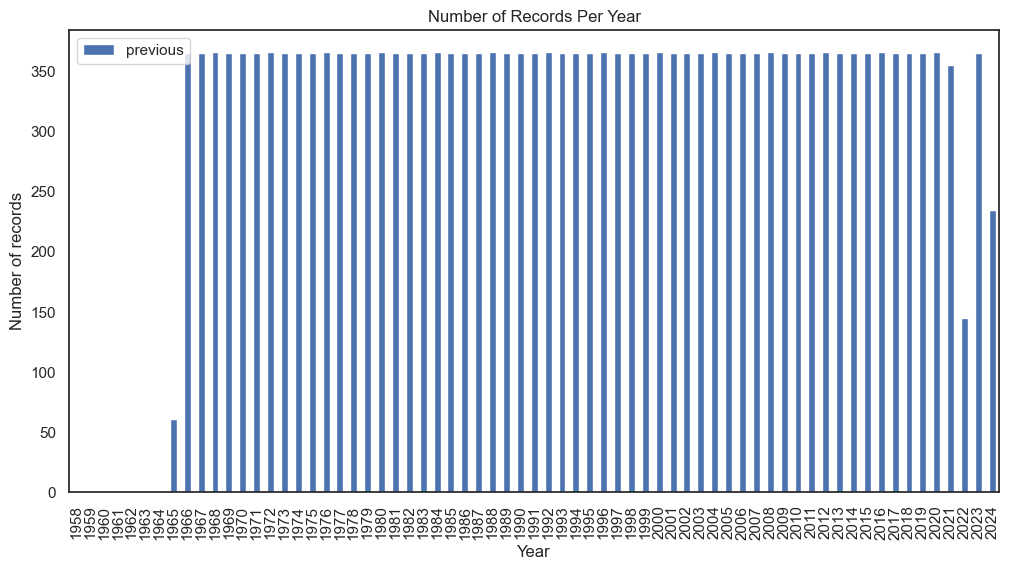

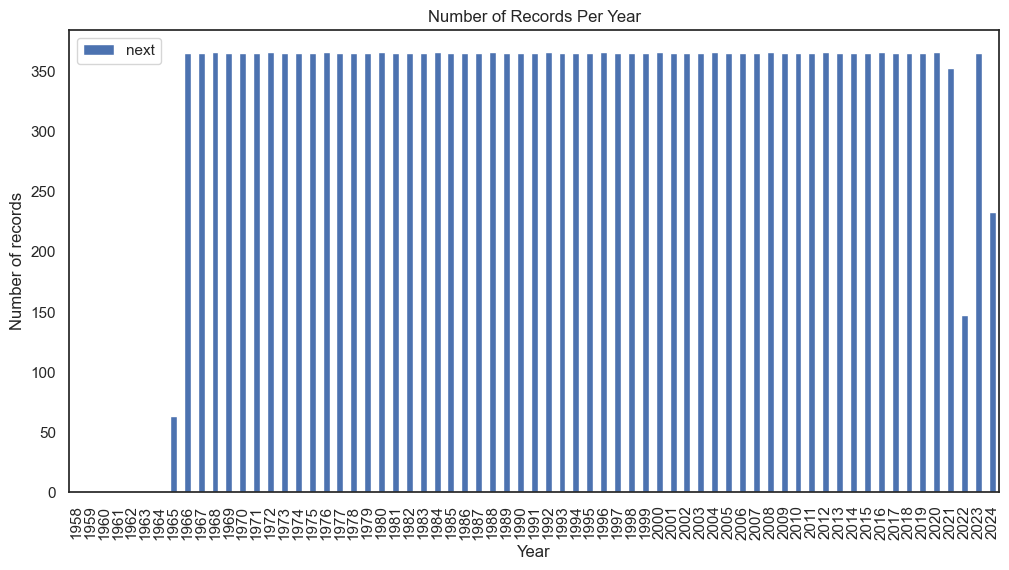

In [186]:
values_per_year_barchart(df_river,list_cols_river)

In [187]:
list_missing_records(df_river, list_cols_river)

Years with missing records (day) in flow_avg:
      flow_avg
year          
1958        61
2024       323
______________________________
Years with missing records (day) in flow_max:
      flow_max
year          
1958         0
1959         0
1960         0
1961         0
1962         0
1963         0
1964         0
1965         0
1966         0
1967         0
1968         0
1969         0
1970        61
2024       323
______________________________
Years with missing records (day) in flow_min:
      flow_min
year          
1958         0
1959         0
1960         0
1961         0
1962         0
1963         0
1964         0
1965         0
1966         0
1967         0
1968         0
1969         0
1970        61
2024       323
______________________________
Years with missing records (day) in level_avg:
      level_avg
year           
1958          0
1959          0
1960          0
1961          0
1962          0
1963          0
1964          0
1965          0
1966          0
1967  

In [188]:
list_nans(df_river, list_cols_river)

NaNs in  flow_avg :
 Series([], Name: flow_avg, dtype: int64) 
------------------------------------
NaNs in  flow_max :
 year
1958     61
1959    365
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    304
Name: flow_max, dtype: int64 
------------------------------------
NaNs in  flow_min :
 year
1958     61
1959    365
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    304
Name: flow_min, dtype: int64 
------------------------------------
NaNs in  level_avg :
 year
1958     61
1959    365
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    304
Name: level_avg, dtype: int64 
------------------------------------
NaNs in  level_max :
 year
1958     61
1959    365
1960    366
1961    365
1962    365
1963    365
1964    366
1965

<h4>Results</h4><br>
<p>There is no need to handling NaNs in:
<ol>
    <li>flow_avg: all NaNs are due to merging multiple variables into the river DataFrame</li>
    <li>flow_max: all NaNs are due to merging multiple variables into the river DataFrame</li>
    <li>flow_min: all NaNs are due to merging multiple variables into the river DataFrame</li>
    <li>level_avg: all NaNs are due to merging multiple variables into the river DataFrame</li>
    <li>level_max: all NaNs are due to merging multiple variables into the river DataFrame</li>
    <li>level_min: all NaNs are due to merging multiple variables into the river DataFrame</li>
</ol>
<p>There need to handling the NaNs in:
    <li>concent_solids: years 2021, 2022 and 2024 (rest: due to merging multiple variables into the river DataFrame)></li>
    <li>water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022 (rest: due to merging multiple variables into the river DataFrame)></li>
    <li>water_temp_max: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022 (rest: due to merging multiple variables into the river DataFrame)></li>
    <li>water_temp_min: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022 (rest: due to merging multiple variables into the river DataFrame)></li>
<h4>Timeframes</h4>
<ul>
    <li><strong>River Flow Rate</strong> [m³/s]: average, daily data from 01.01.1958 to present (18.11.2024)</li>
    <li><strong>River Flow Rate</strong> [m³/s]: minimum, maximum, daily data from 01.11.1970 to present (18.11.2024)</li>
    <li><strong>Water Pollution: Suspended Solids Concentration</strong> [g/m³]: daily data from 31.10.1965 to 21.08.2024</li>
    <li><strong>Water Level</strong> [cm]: average, minimum, maximum, daily data from 01.11.1973 to present (18.11.2024)</li>
    <li><strong>Water Temperature</strong> [°C]: average, minimum, maximum, daily data from 01.11.1980 to present (18.11.2024)</li>
    <em>Note: There are known issues with data accuracy at the measurement station.</em></li>
</ul>

In [189]:
# Handling the NaNs in concent_solids, looking into the trend (timerows etc.) for 2021
# plotting a bar charts with the number of values per month:
df_nans_concent_solids_monthly_2021 = df_river[(df_river['year'] == 2021) & (df_river['concent_solids'].isna())][['date','concent_solids']]
number_nans_concent_solids_2021 = df_river[(df_river['year'] == 2021)]['concent_solids'].isna().sum()
df_nans_concent_solids_monthly_2021

date  concent_solids
23061 2021-12-21             NaN
23062 2021-12-22             NaN
23063 2021-12-23             NaN
23064 2021-12-24             NaN
23065 2021-12-25             NaN
23066 2021-12-26             NaN
23067 2021-12-27             NaN
23068 2021-12-28             NaN
23069 2021-12-29             NaN
23070 2021-12-30             NaN
23071 2021-12-31             NaN

In [190]:
# creating a function:

def nans_per_year (df, col, year):

    df_year = df[df['year'] == year][['date', col]]
    num_nans = df[(df['year'] == year)][col].isna().sum()
    print(f"The numbers of Nans in {year} is {num_nans}:")
    
    df_nans = df_year[df_year[col].isna()]
    plt.figure(figsize=(24,6))
    
    sns.scatterplot(data=df_year, x='date', y=col, label=f"{year} values", color = 'purple', s=10)
    sns.scatterplot(data=df_nans, x='date', y=[0]*len(df_nans), color='red', label='NaNs', marker='x', s=10)


    # Titel und Achsenbeschriftungen
    plt.title(f"Scatterplot of {col} with NaNs for {year}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.show()

The numbers of Nans in 2021 is 0:


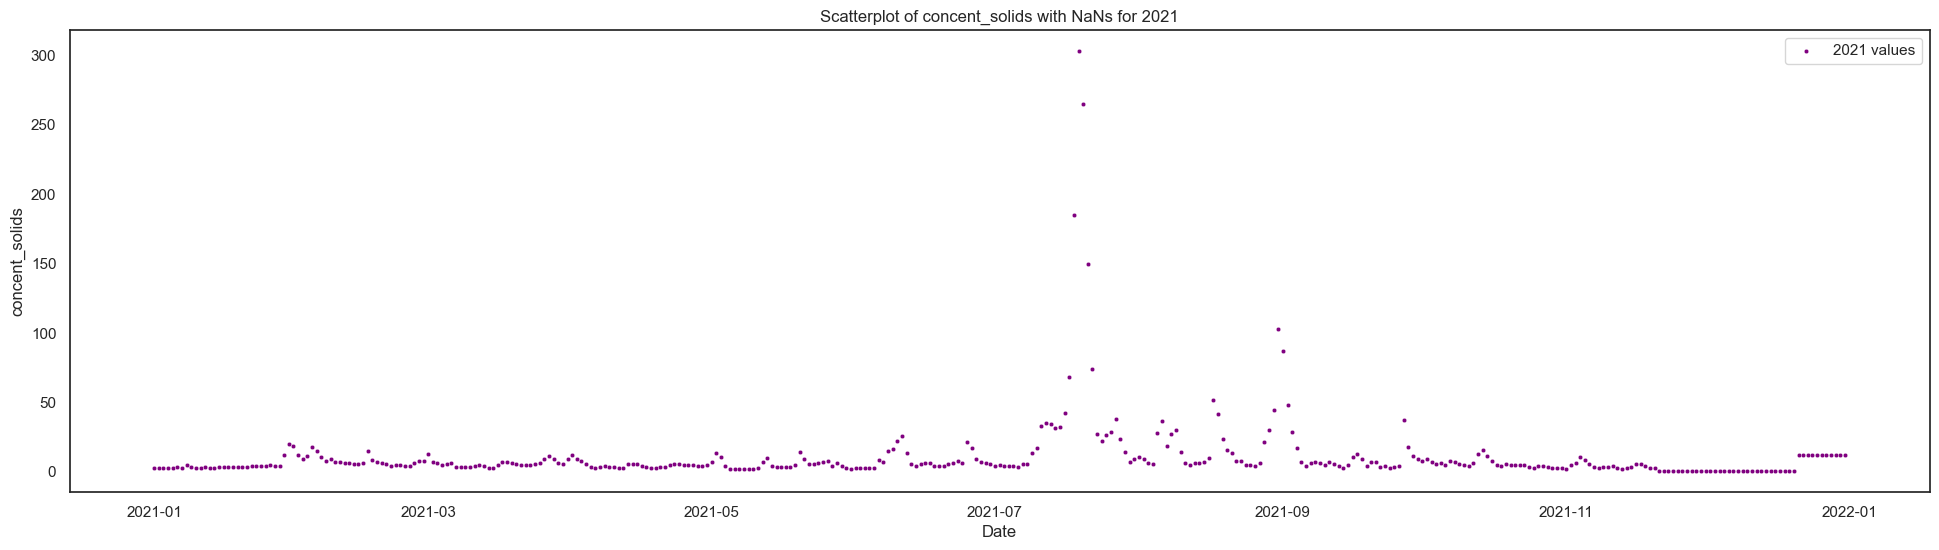

In [225]:
nans_per_year(df_river, 'concent_solids', 2021)

The numbers of Nans in 2022 is 0:


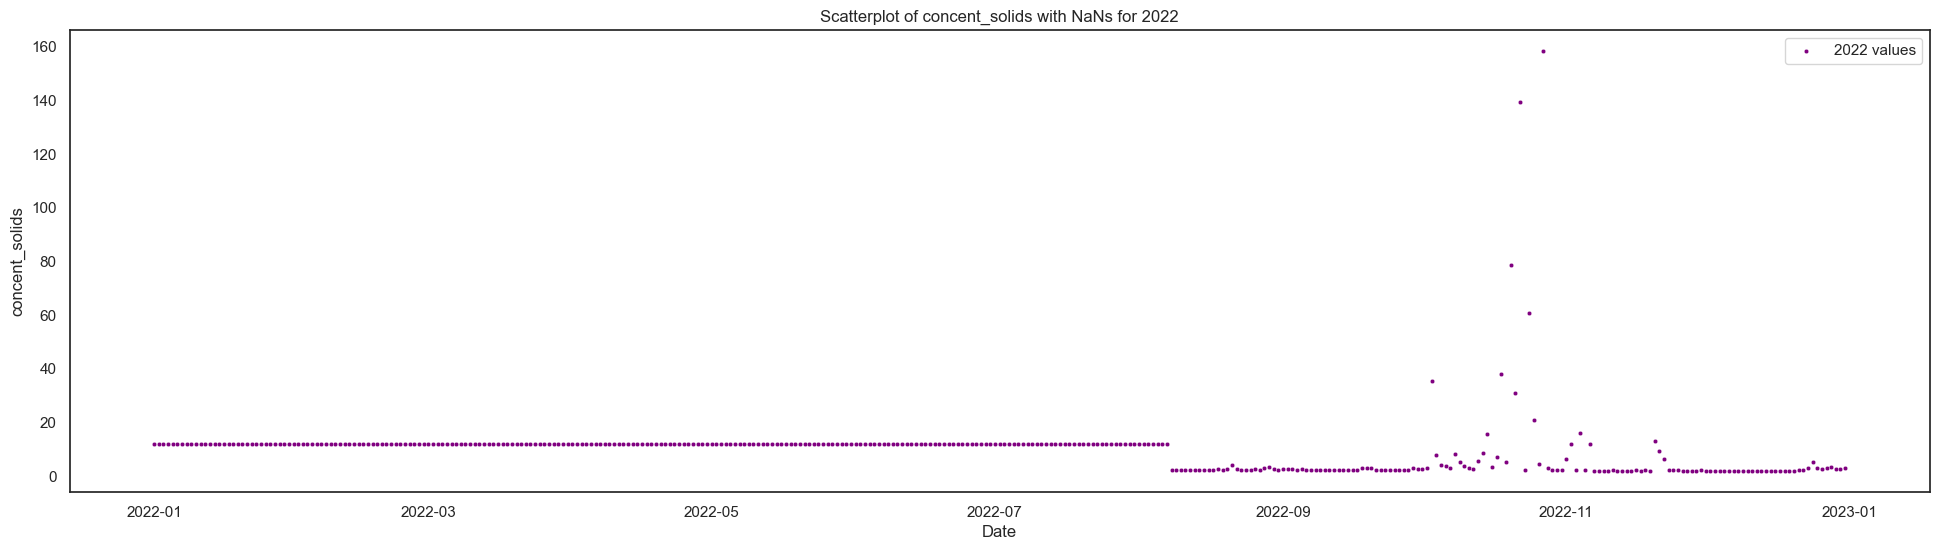

In [226]:
# concent_solids: NaNs of 2022
nans_per_year(df_river, 'concent_solids', 2022)

The numbers of Nans in 2024 is 0:


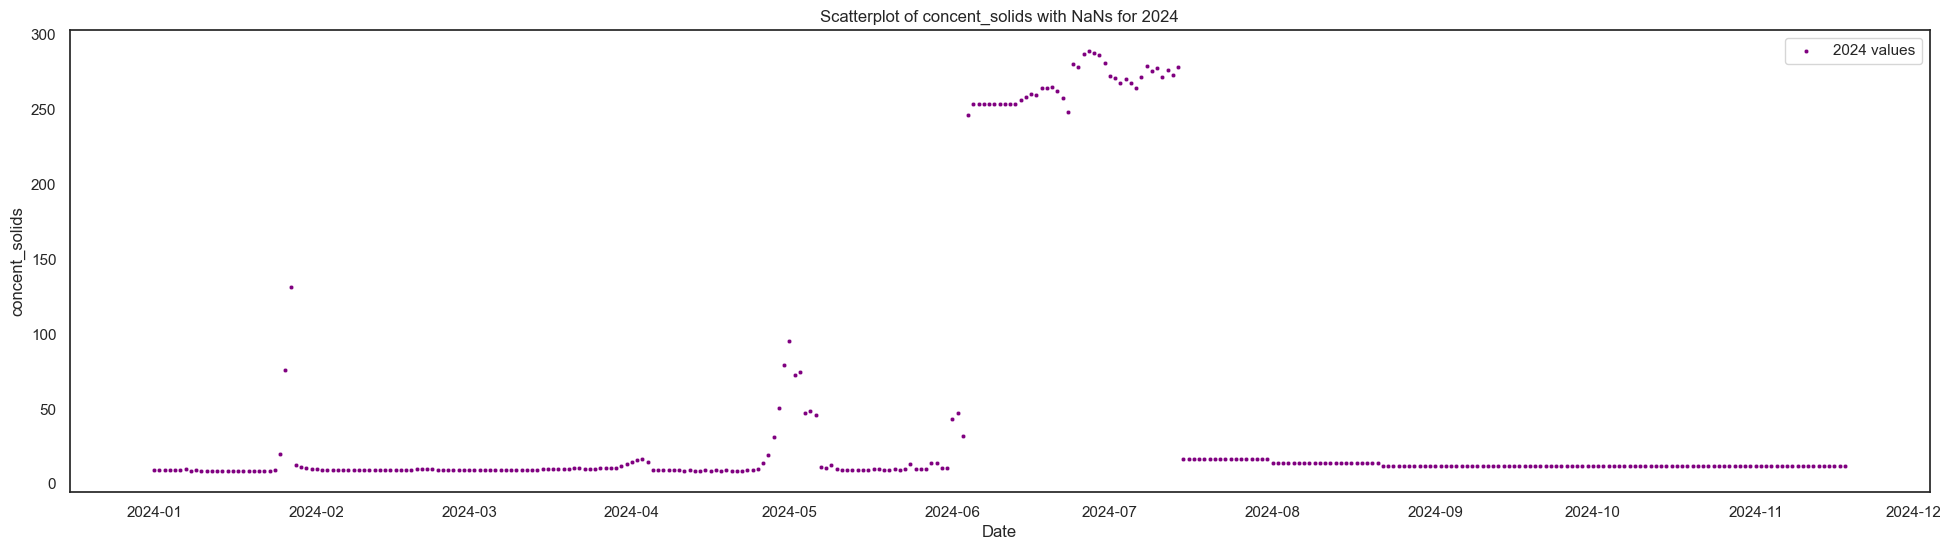

In [227]:
# concent_solids: NaNs of 2024
nans_per_year(df_river, 'concent_solids', 2024)

The numbers of Nans in 2009 is 0:


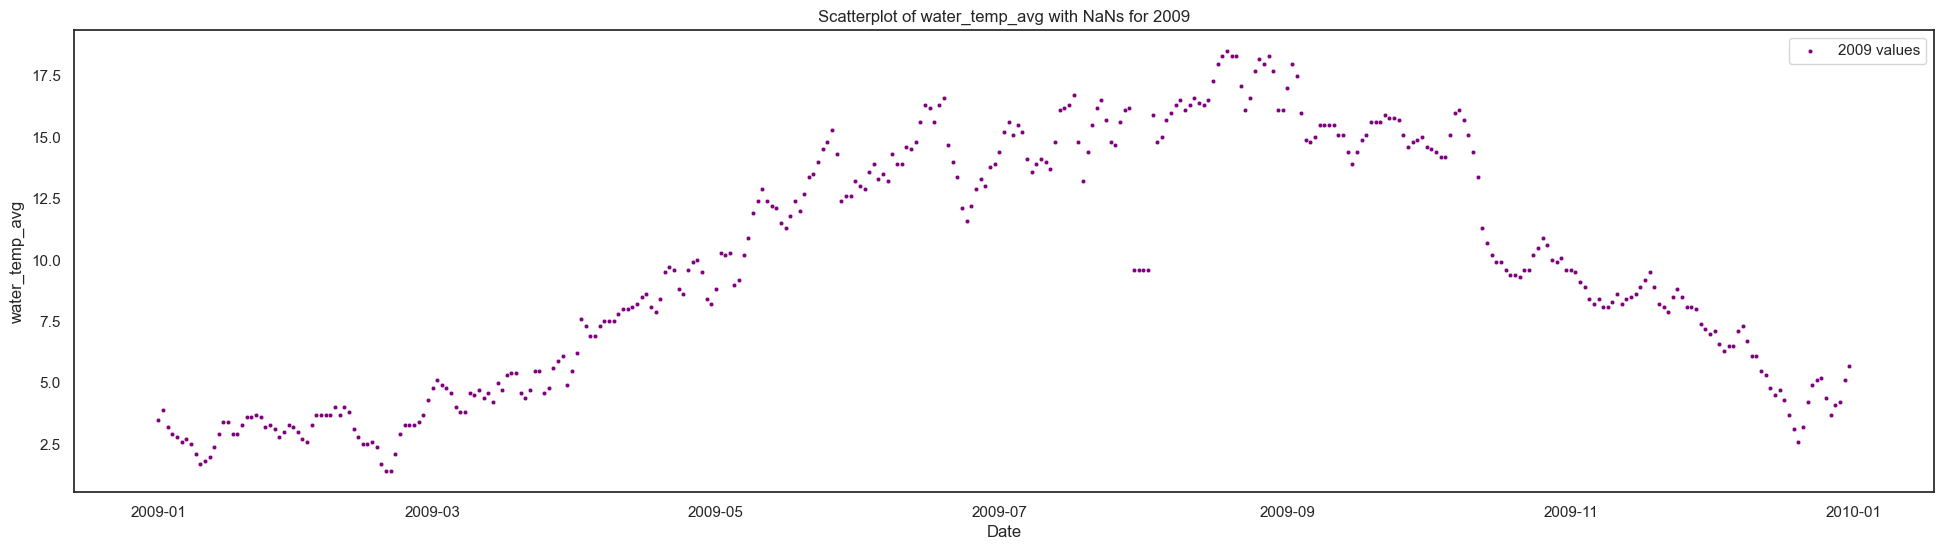

In [228]:
# water_temp_avg: NaNs of 2009
nans_per_year(df_river, 'water_temp_avg', 2009)

The numbers of Nans in 2012 is 0:


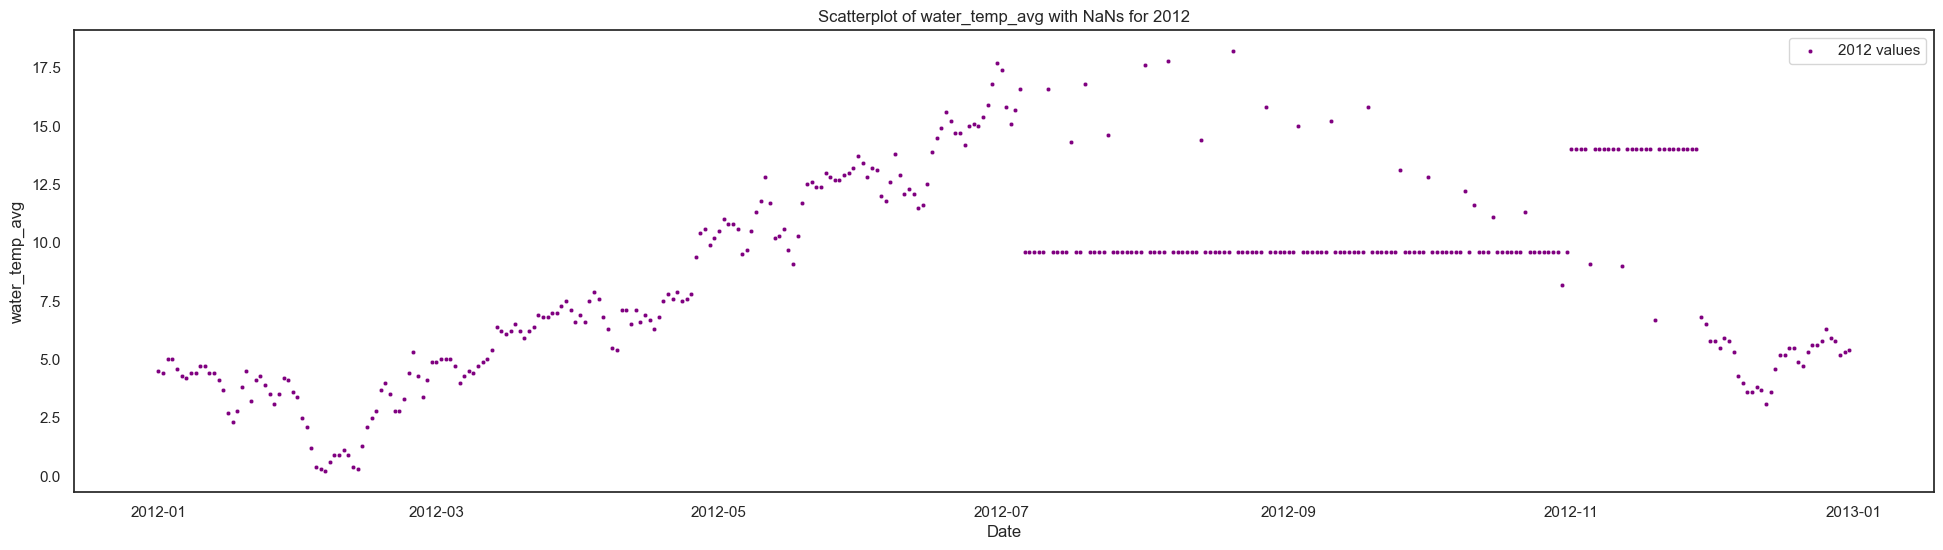

In [229]:
# water_temp_avg: NaNs of 2012
nans_per_year(df_river, 'water_temp_avg', 2012)

The numbers of Nans in 2013 is 0:


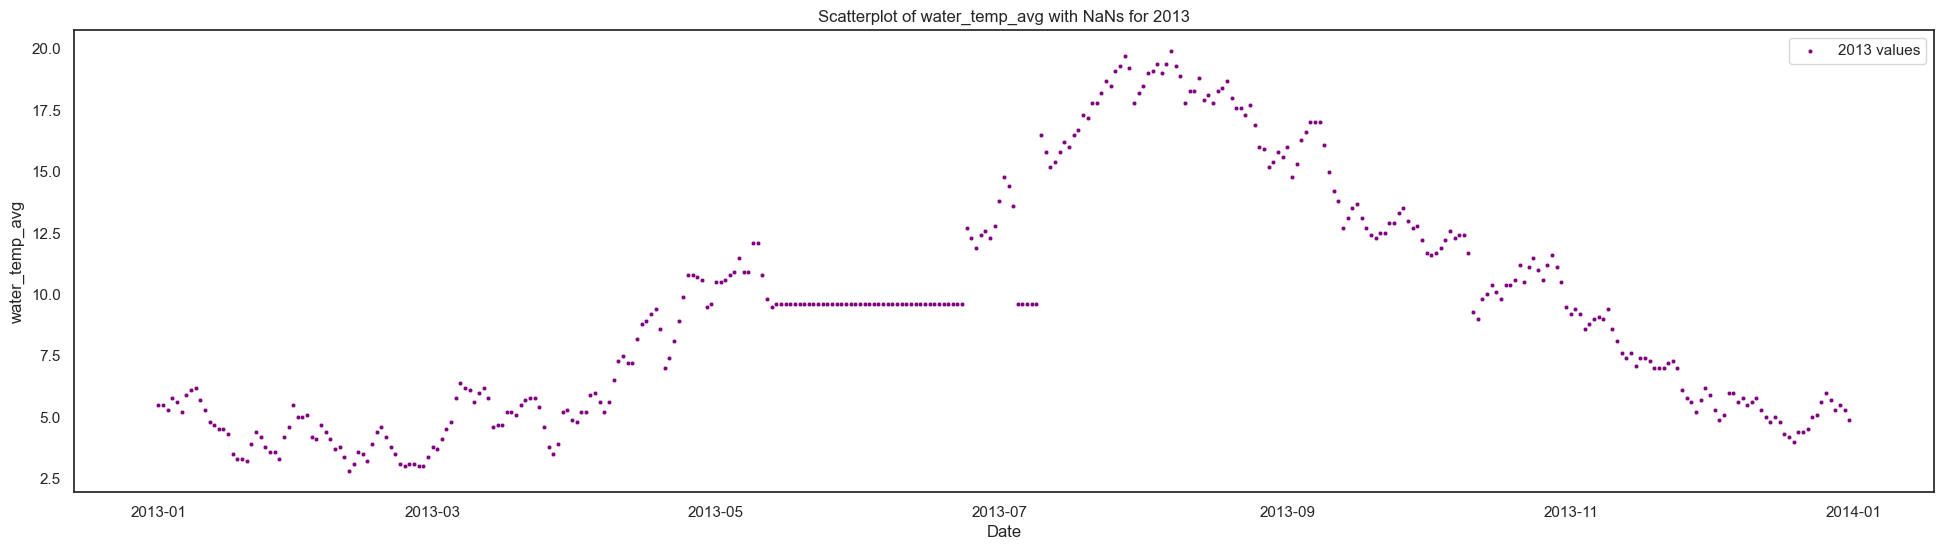

In [230]:
# water_temp_avg: NaNs of 2013
nans_per_year(df_river, 'water_temp_avg', 2013)

The numbers of Nans in 2017 is 0:


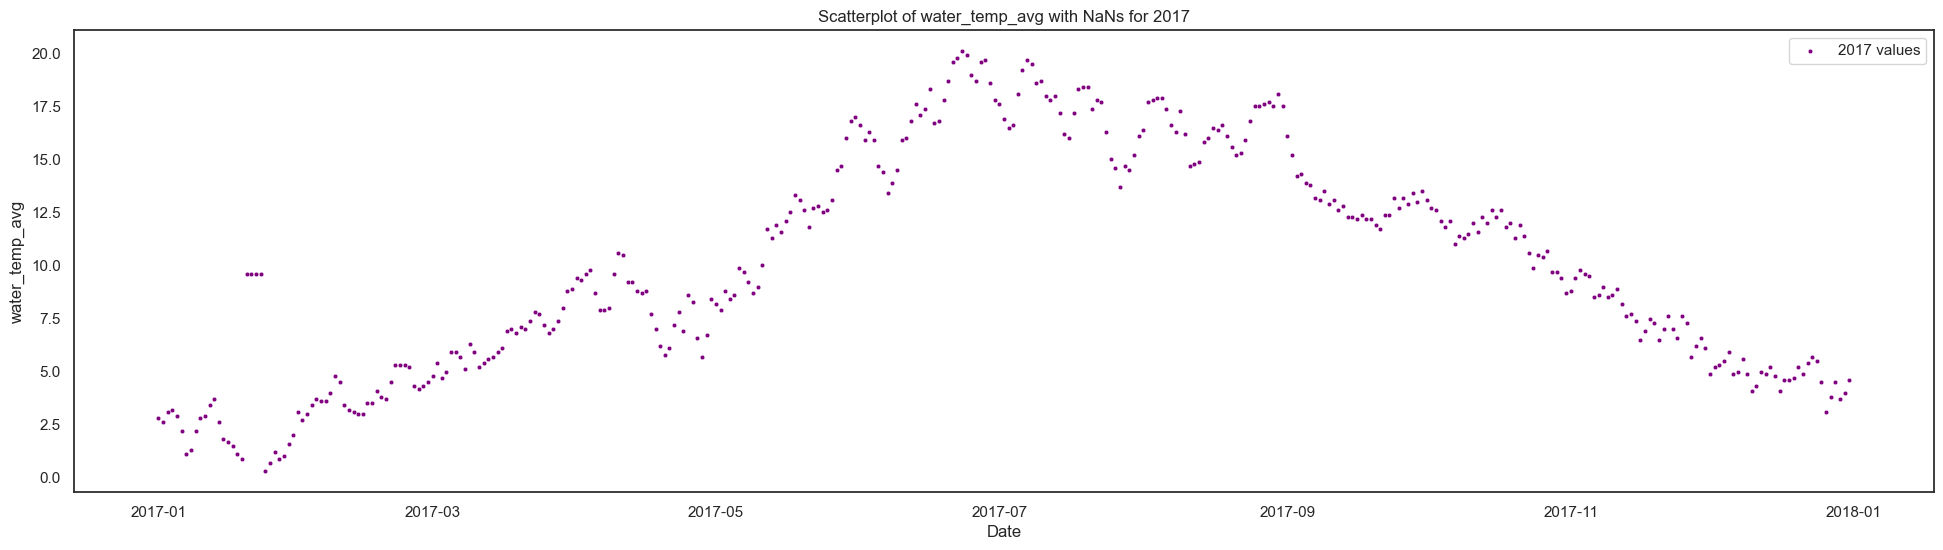

In [231]:
# water_temp_avg: NaNs of 2017
nans_per_year(df_river, 'water_temp_avg', 2017)

The numbers of Nans in 2020 is 0:


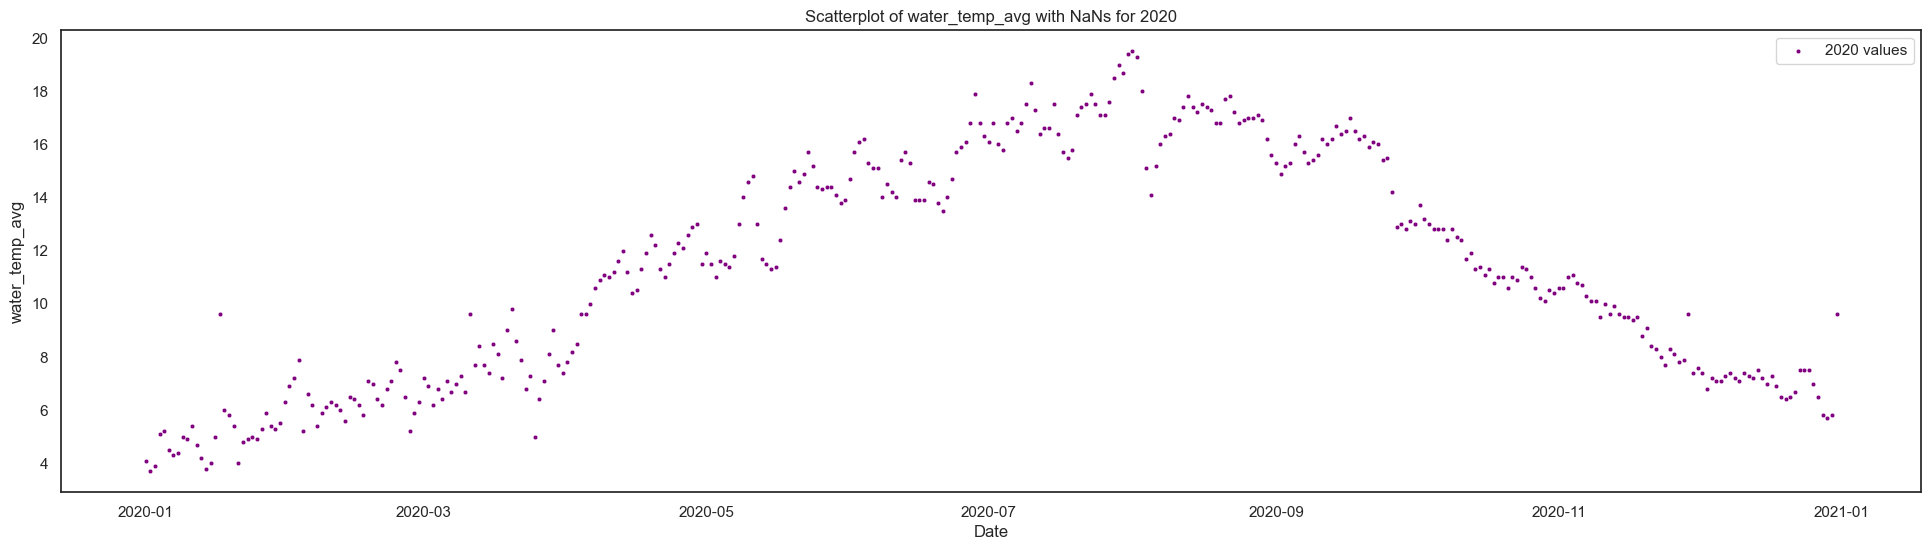

In [232]:
# water_temp_avg: NaNs of 2020
nans_per_year(df_river, 'water_temp_avg', 2020)
#water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2021 is 0:


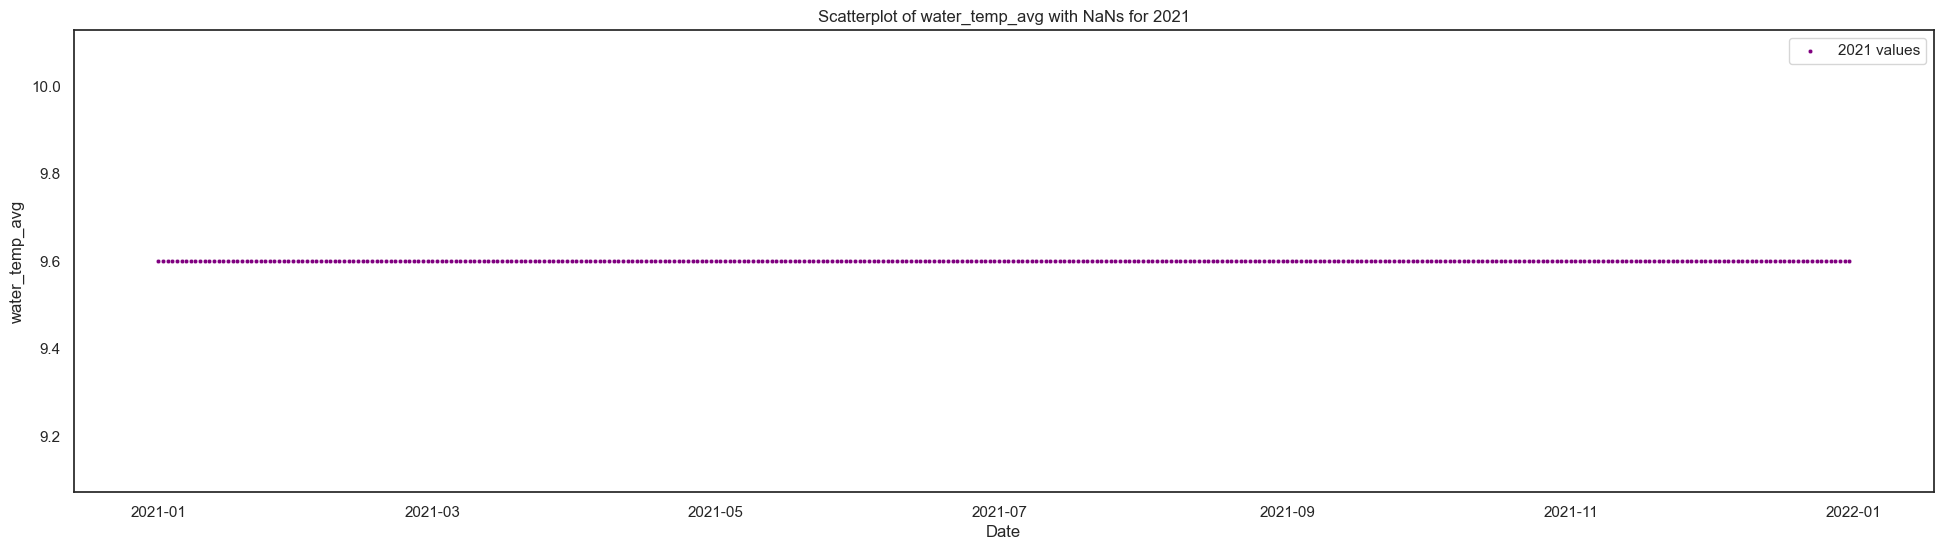

In [233]:
# water_temp_avg: NaNs of 2021
nans_per_year(df_river, 'water_temp_avg', 2021)
#water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2022 is 0:


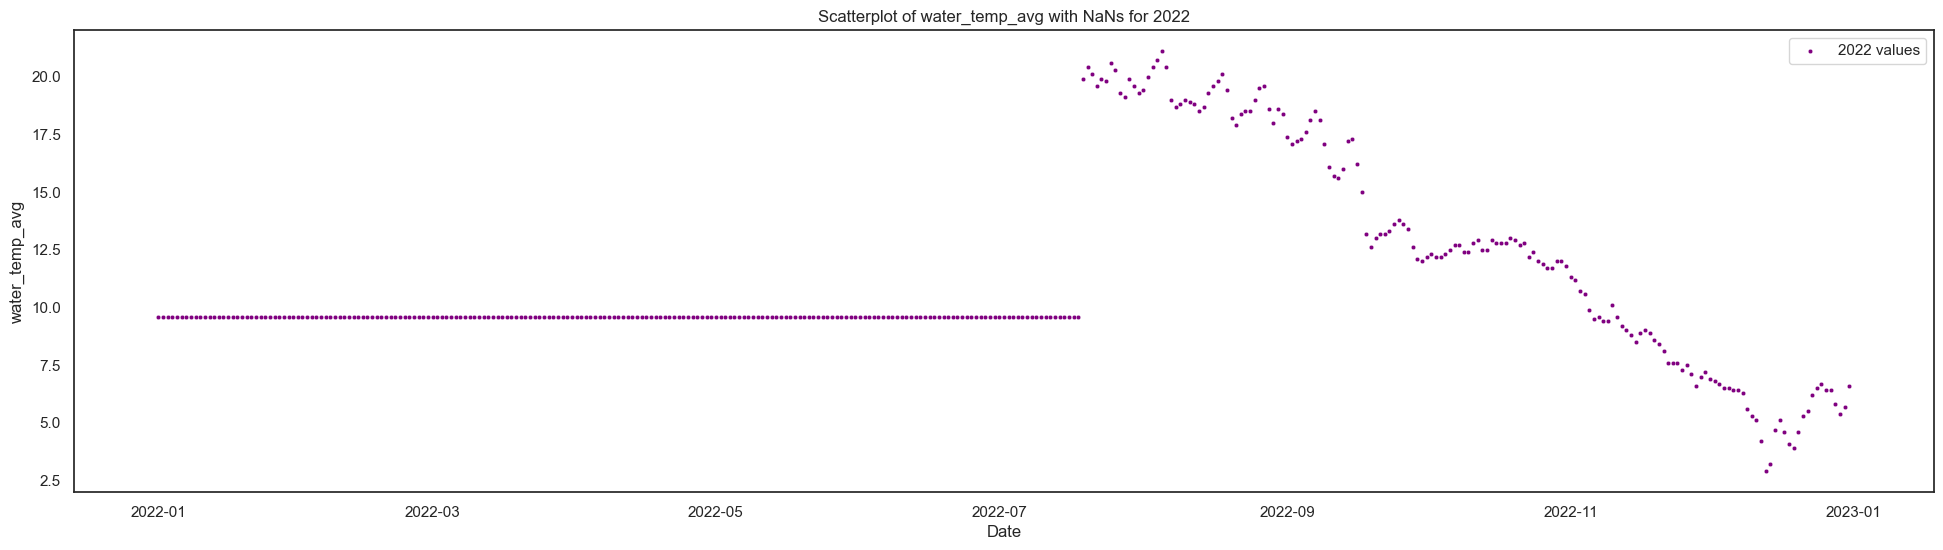

In [234]:
# water_temp_avg: NaNs of 2022
nans_per_year(df_river, 'water_temp_avg', 2022)
#water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2020 is 0:


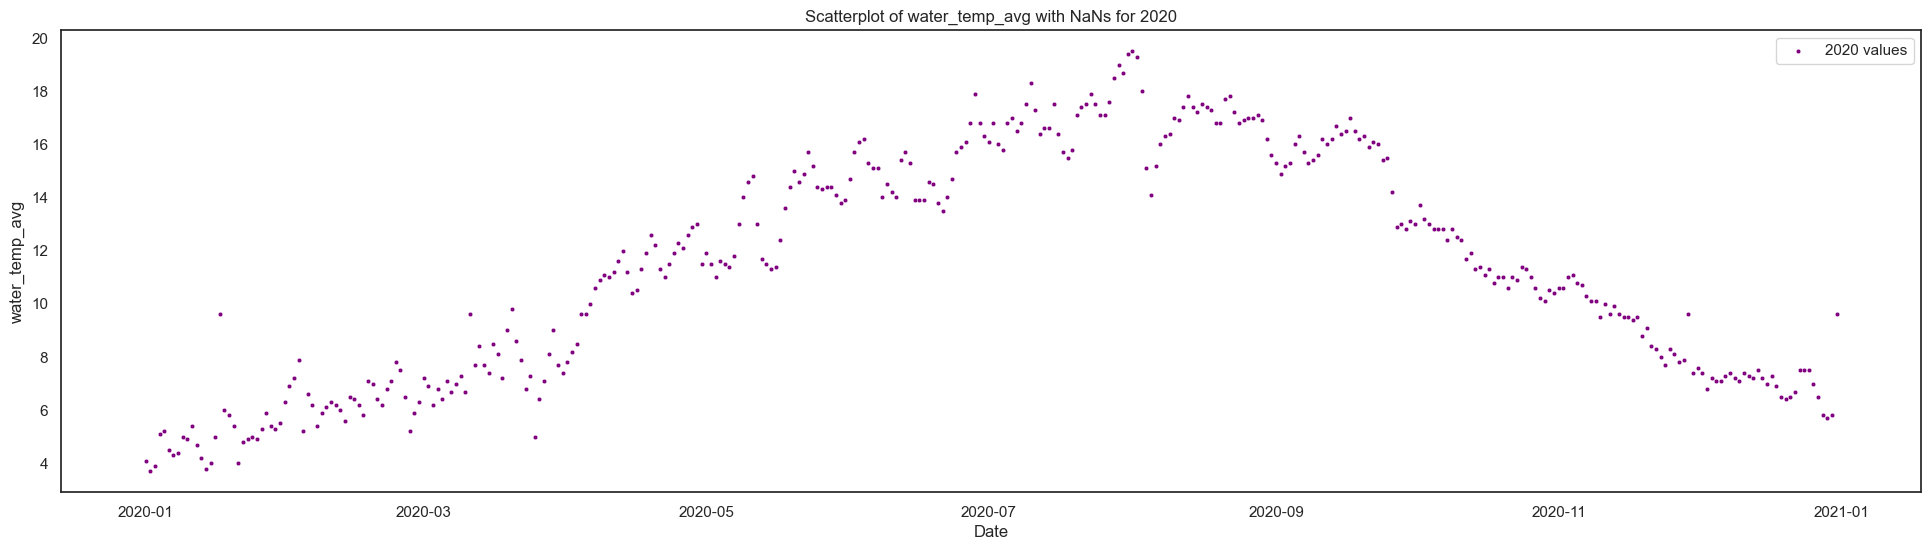

In [235]:
# water_temp_max: NaNs of 2009
nans_per_year(df_river, 'water_temp_avg', 2020)
#water_temp_max: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2012 is 0:


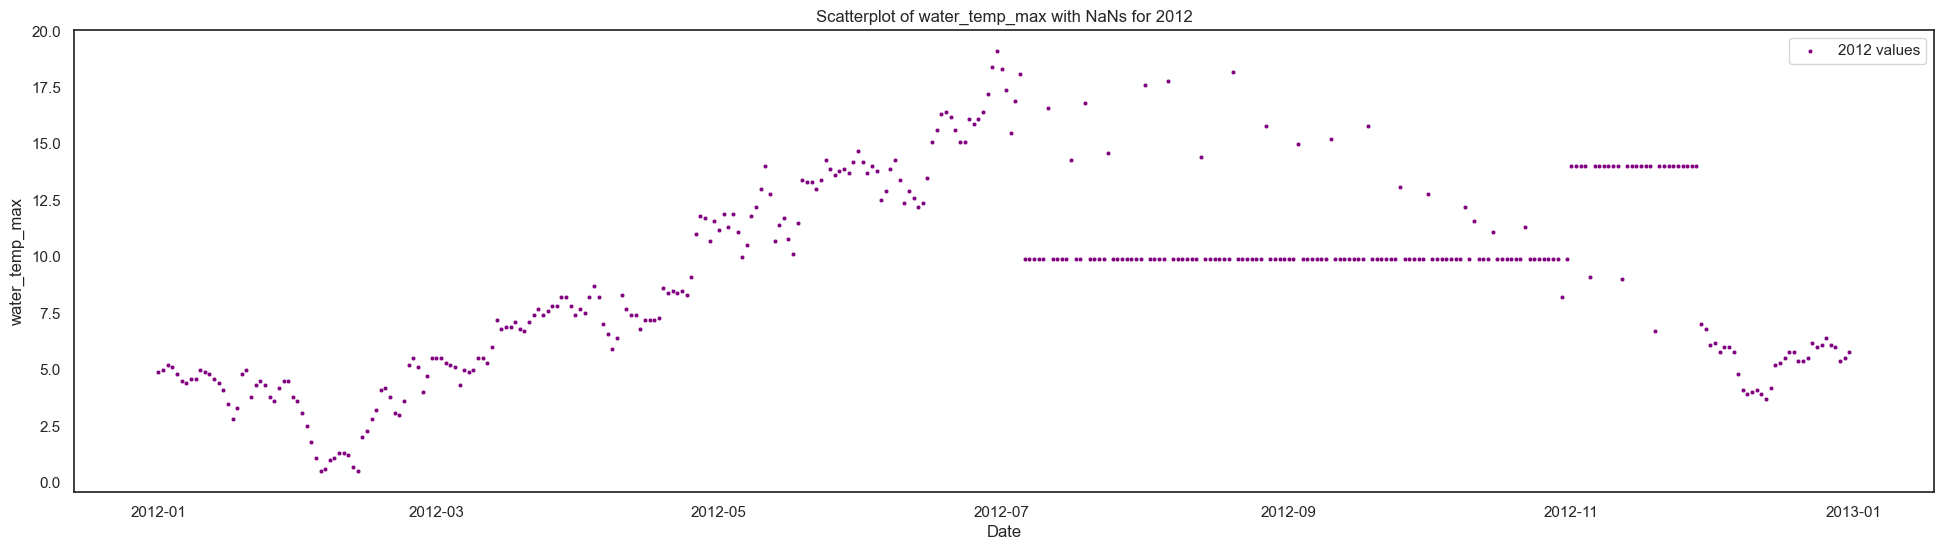

In [236]:
# water_temp_max: NaNs of 2012
nans_per_year(df_river, 'water_temp_max', 2012)
#water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2017 is 0:


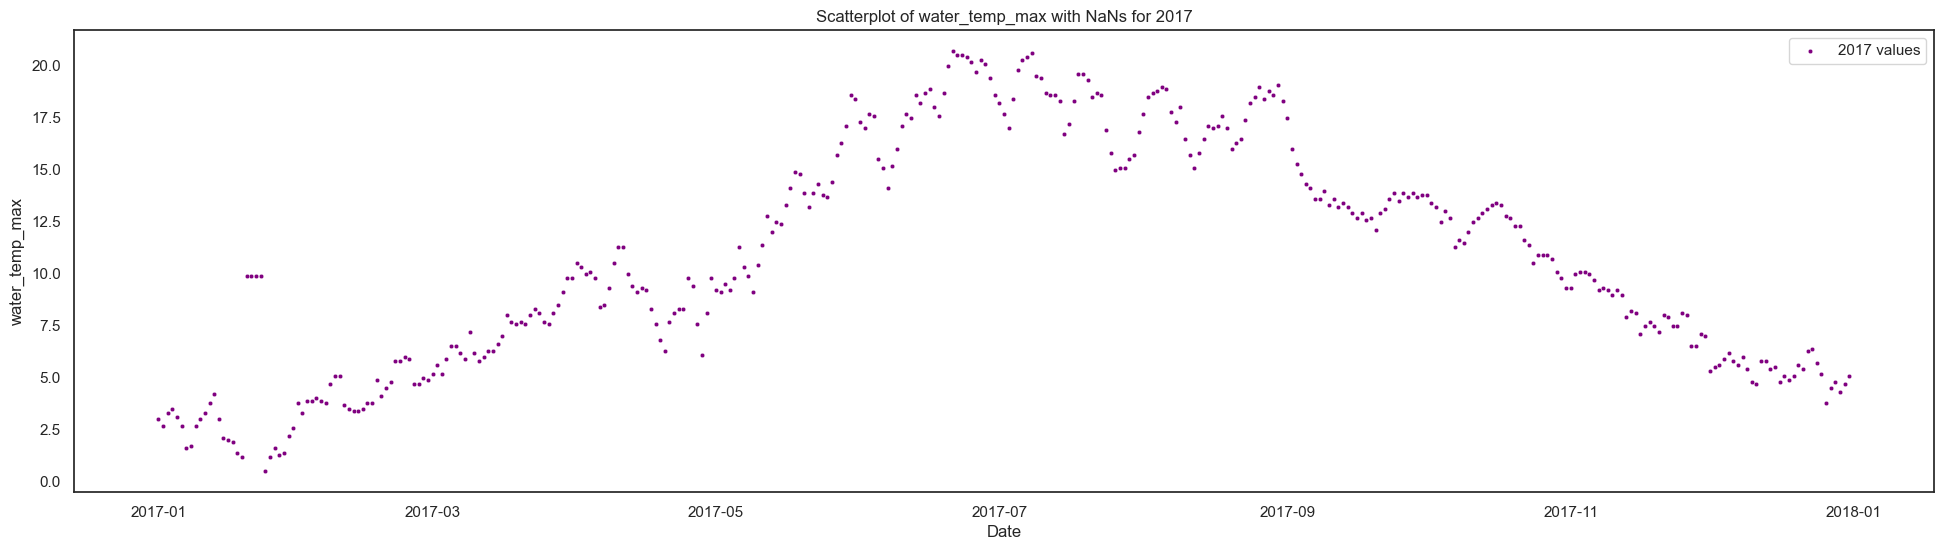

In [237]:
# water_temp_max: NaNs of 2017
nans_per_year(df_river, 'water_temp_max', 2017)
#water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2020 is 0:


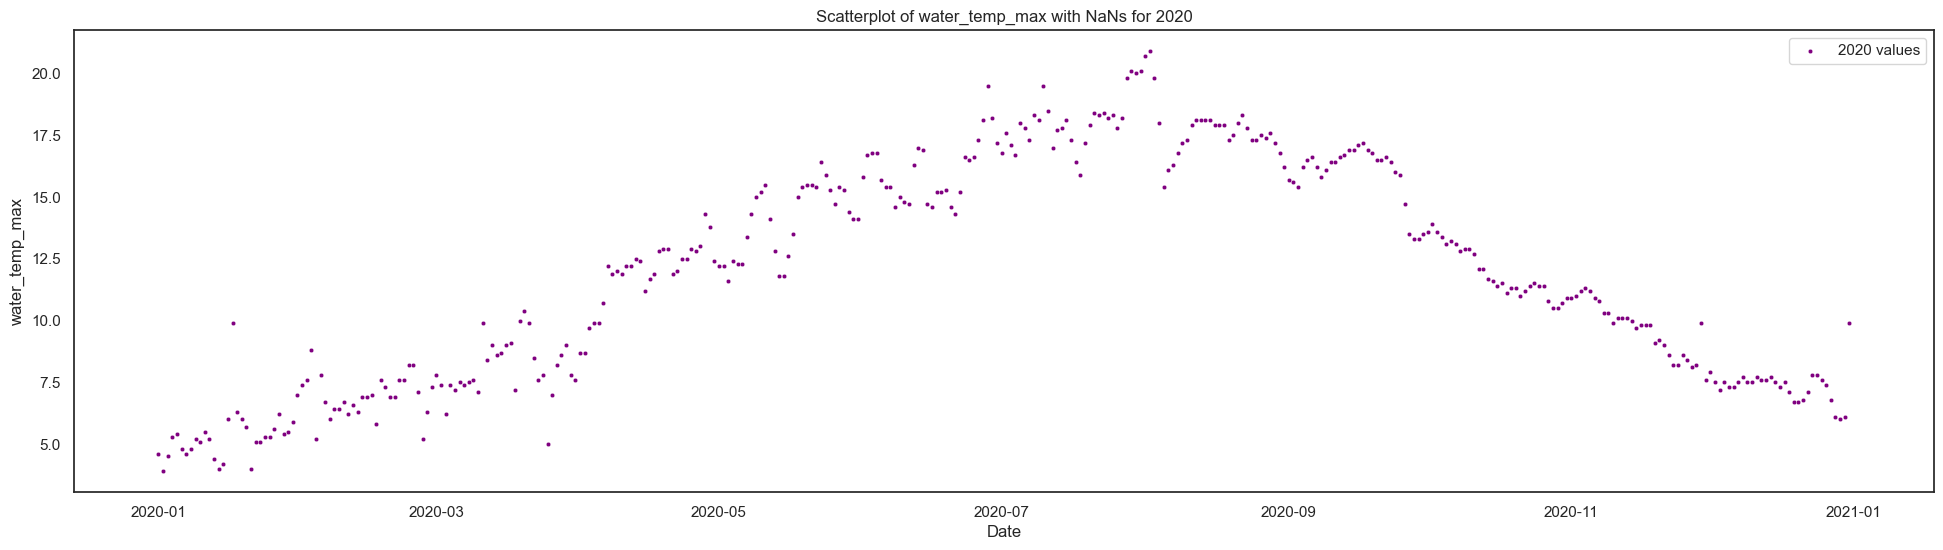

In [238]:
# water_temp_max: NaNs of 2020
nans_per_year(df_river, 'water_temp_max', 2020)
#water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2021 is 0:


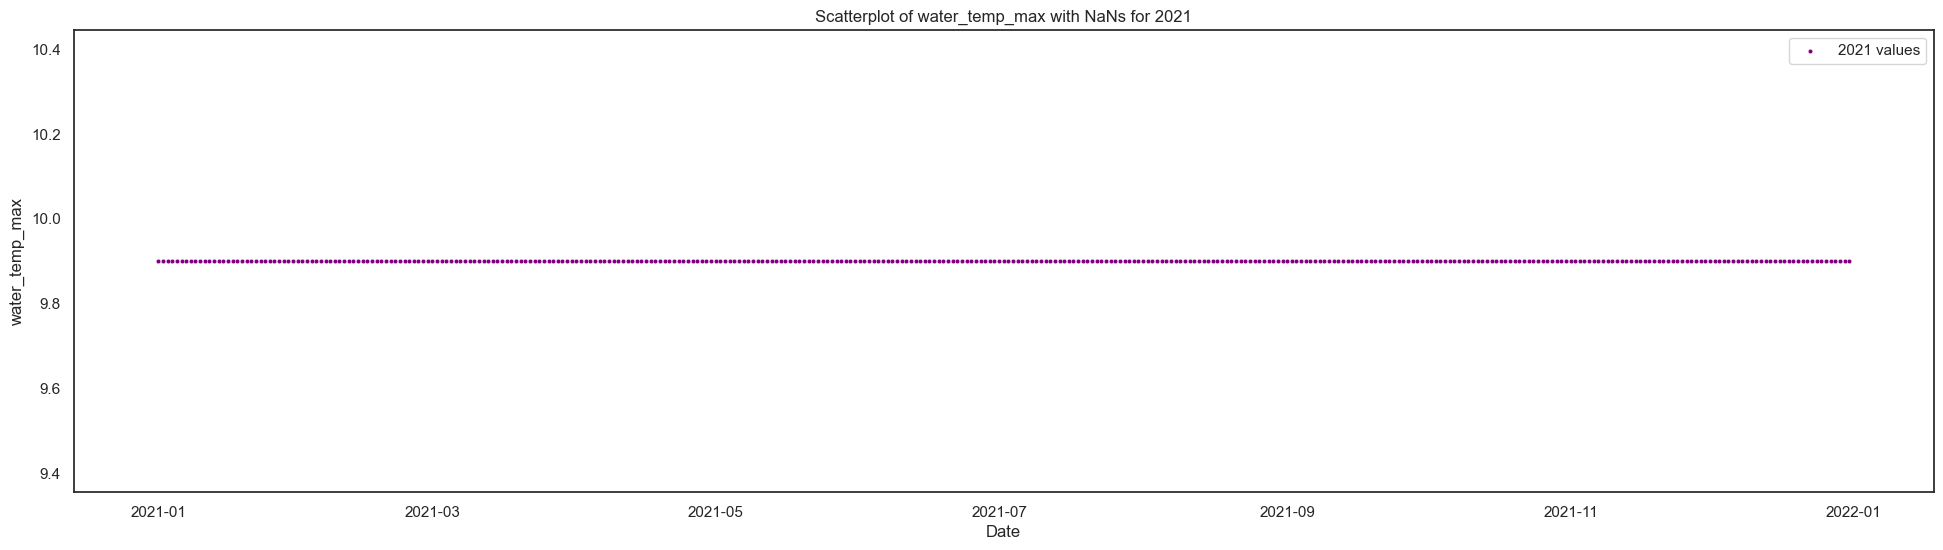

In [239]:
# water_temp_max: NaNs of 2021
nans_per_year(df_river, 'water_temp_max', 2021)
#water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2022 is 0:


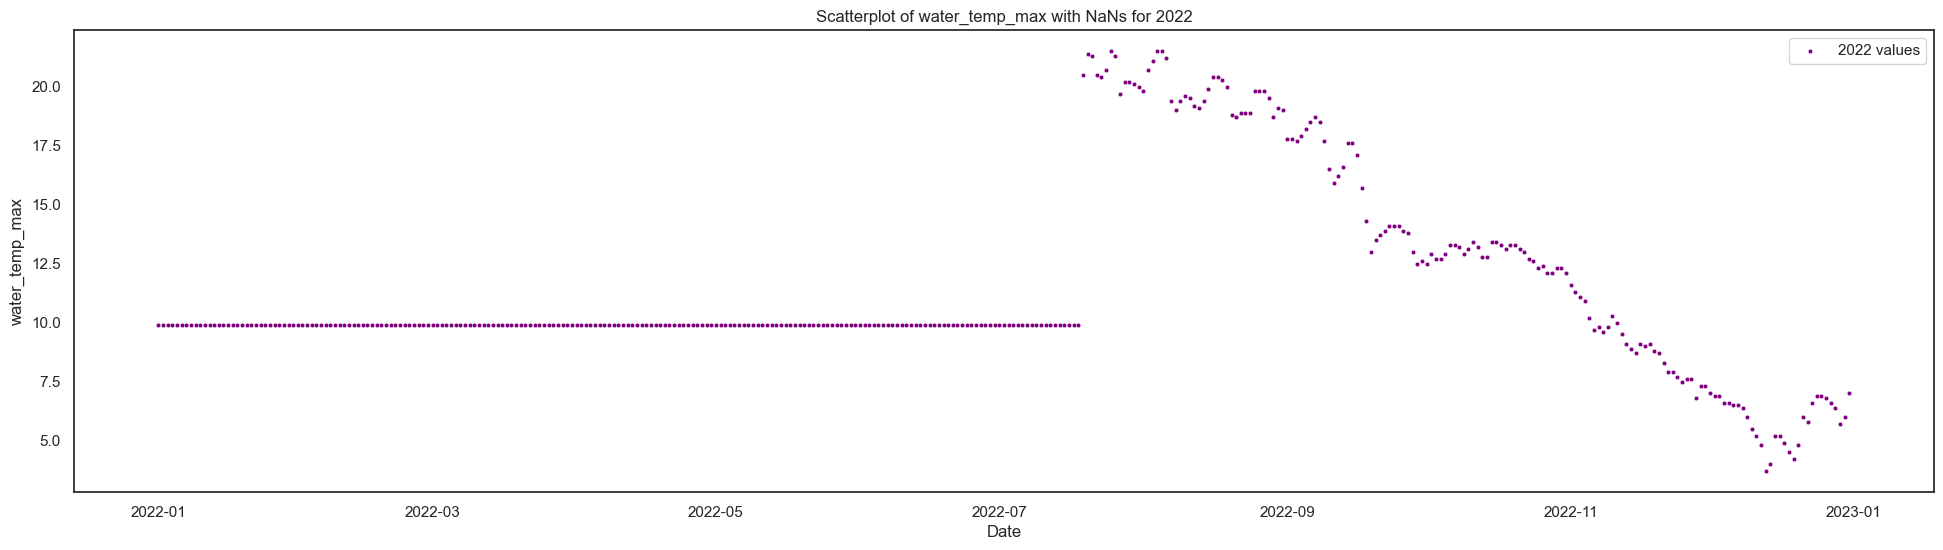

In [240]:
# water_temp_max: NaNs of 2022
nans_per_year(df_river, 'water_temp_max', 2022)
#water_temp_avg: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2009 is 0:


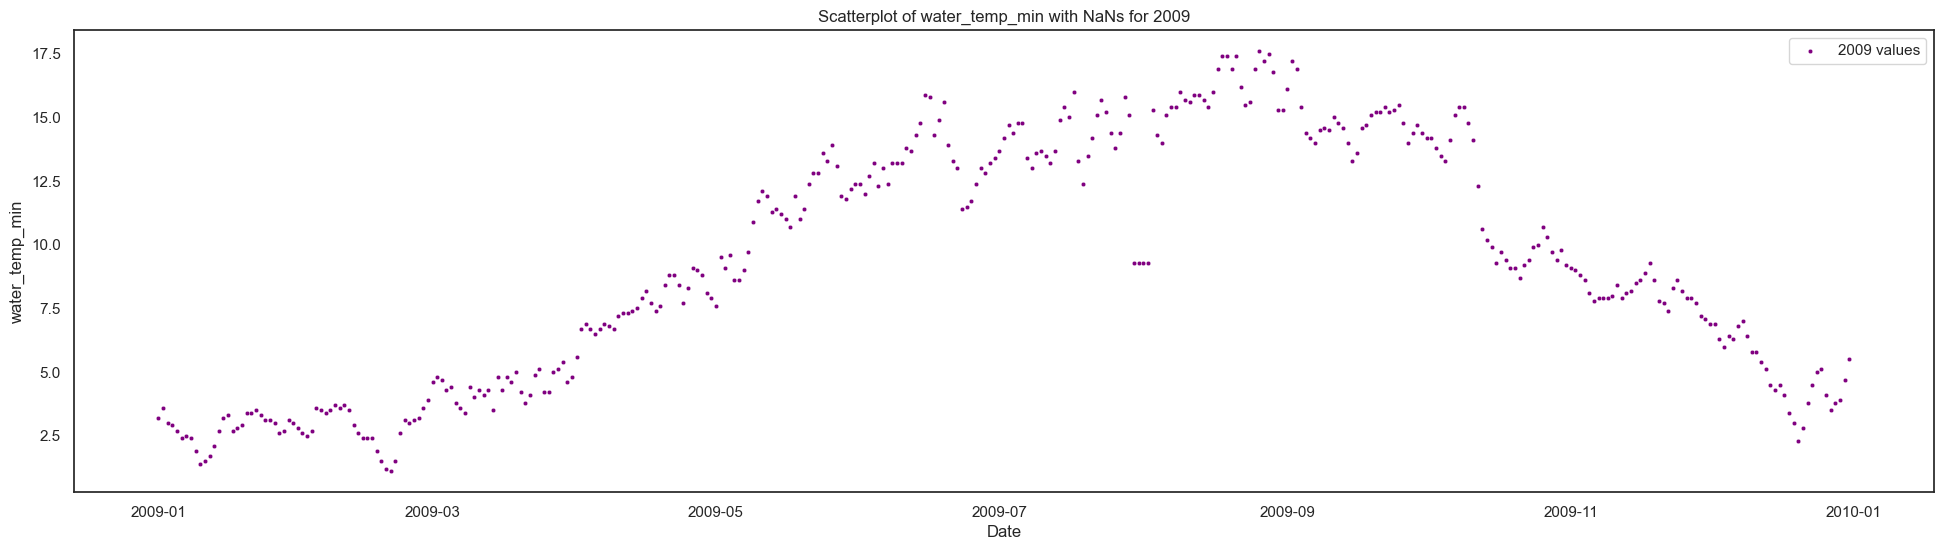

In [241]:
# water_temp_min: NaNs of 2009
nans_per_year(df_river, 'water_temp_min', 2009)
#water_temp_min: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2012 is 0:


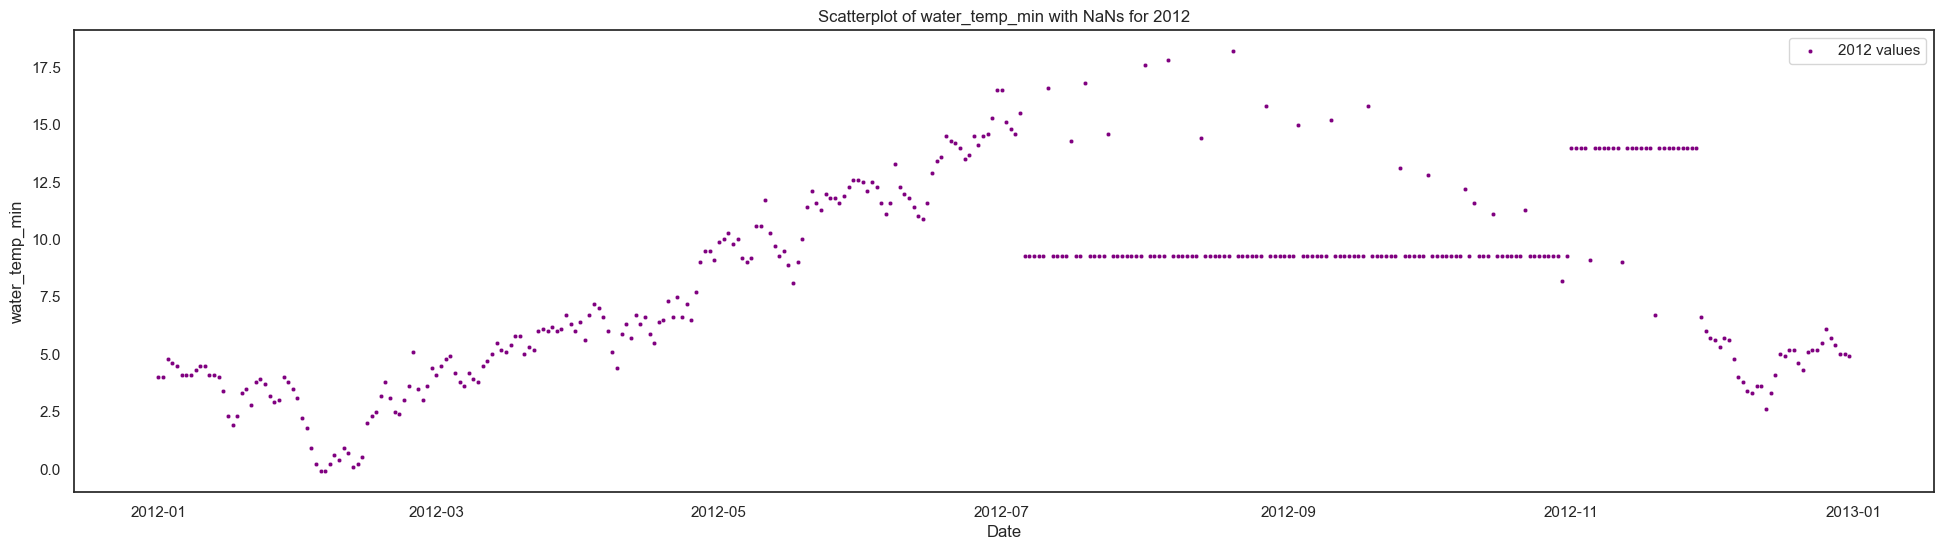

In [242]:
# water_temp_min: NaNs of 2012
nans_per_year(df_river, 'water_temp_min', 2012)
#water_temp_min: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2013 is 0:


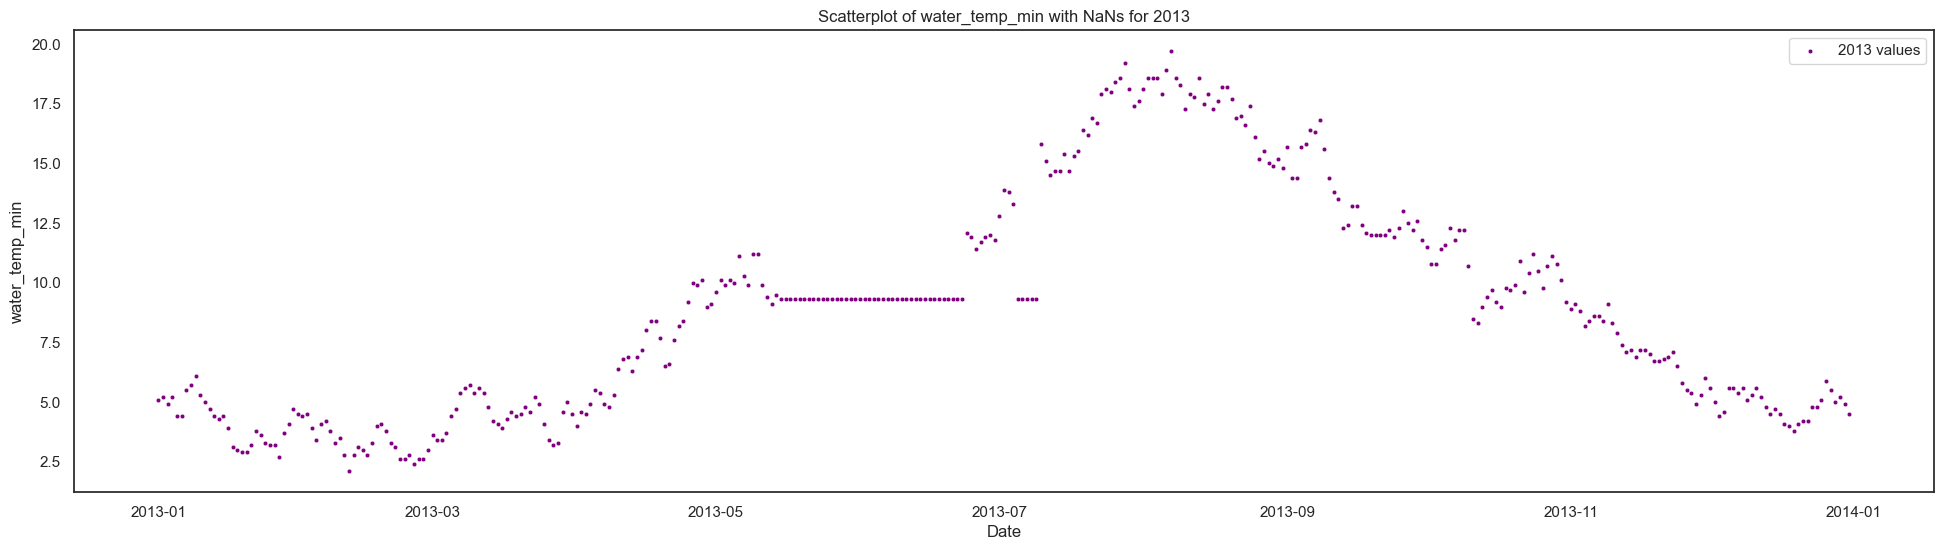

In [243]:
# water_temp_min: NaNs of 2013
nans_per_year(df_river, 'water_temp_min', 2013)
#water_temp_min: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2017 is 0:


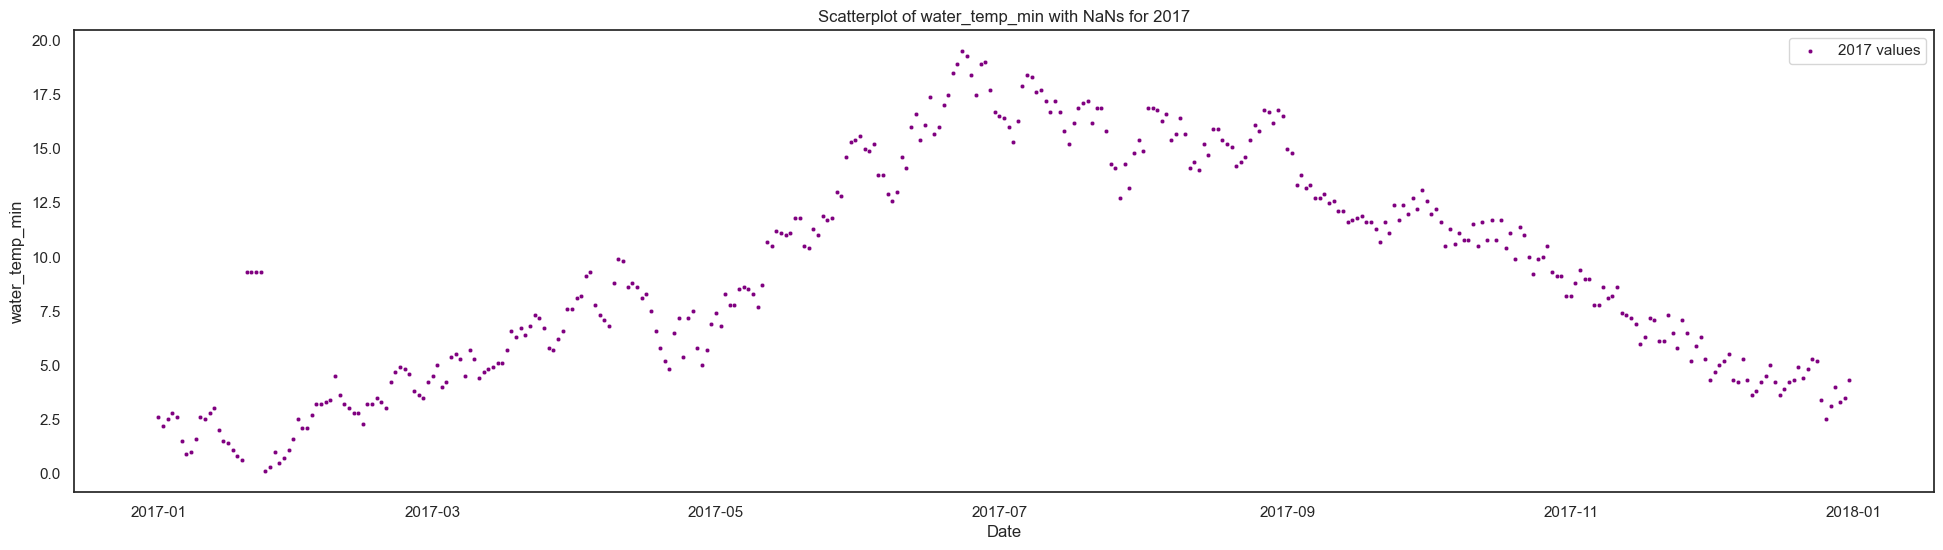

In [244]:
# water_temp_min: NaNs of 2017
nans_per_year(df_river, 'water_temp_min', 2017)
#water_temp_min: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2020 is 0:


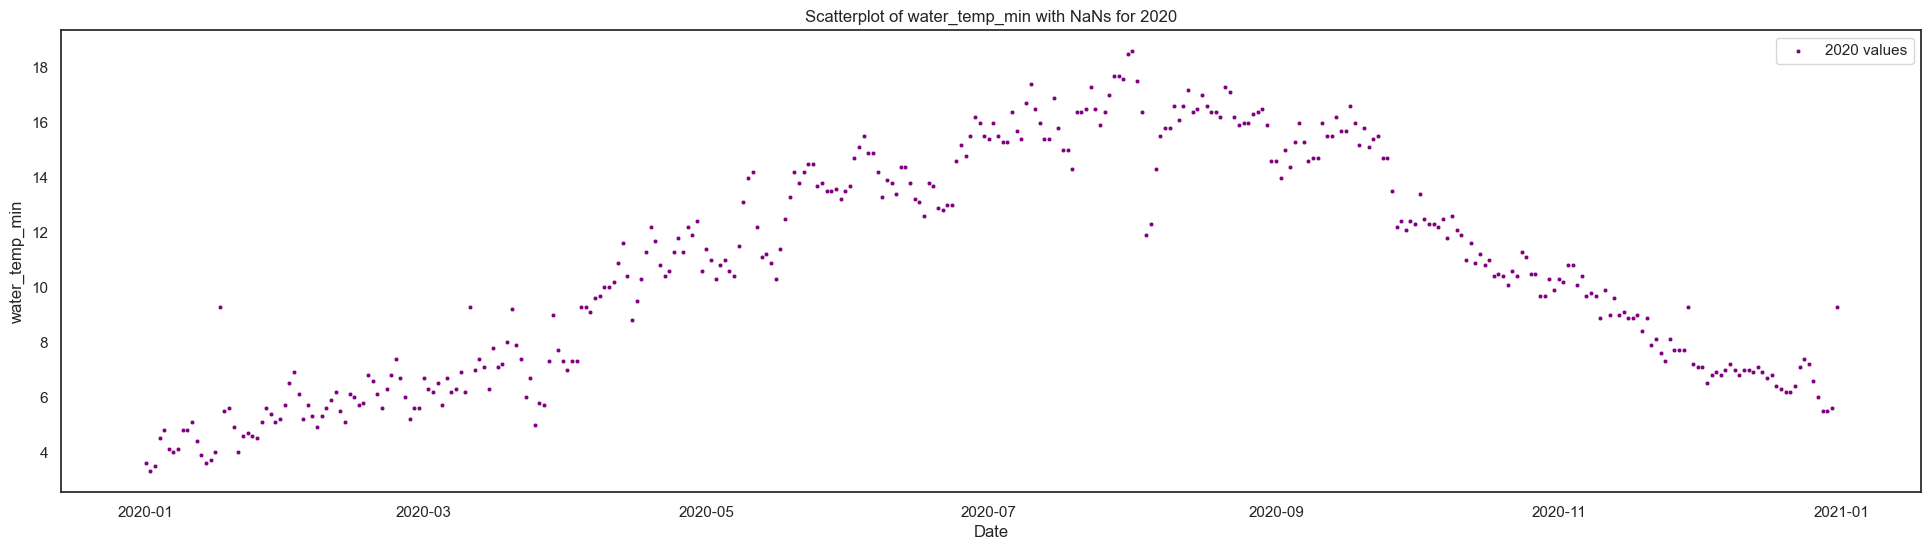

In [245]:
# water_temp_min: NaNs of 2020
nans_per_year(df_river, 'water_temp_min', 2020)
#water_temp_min: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2021 is 0:


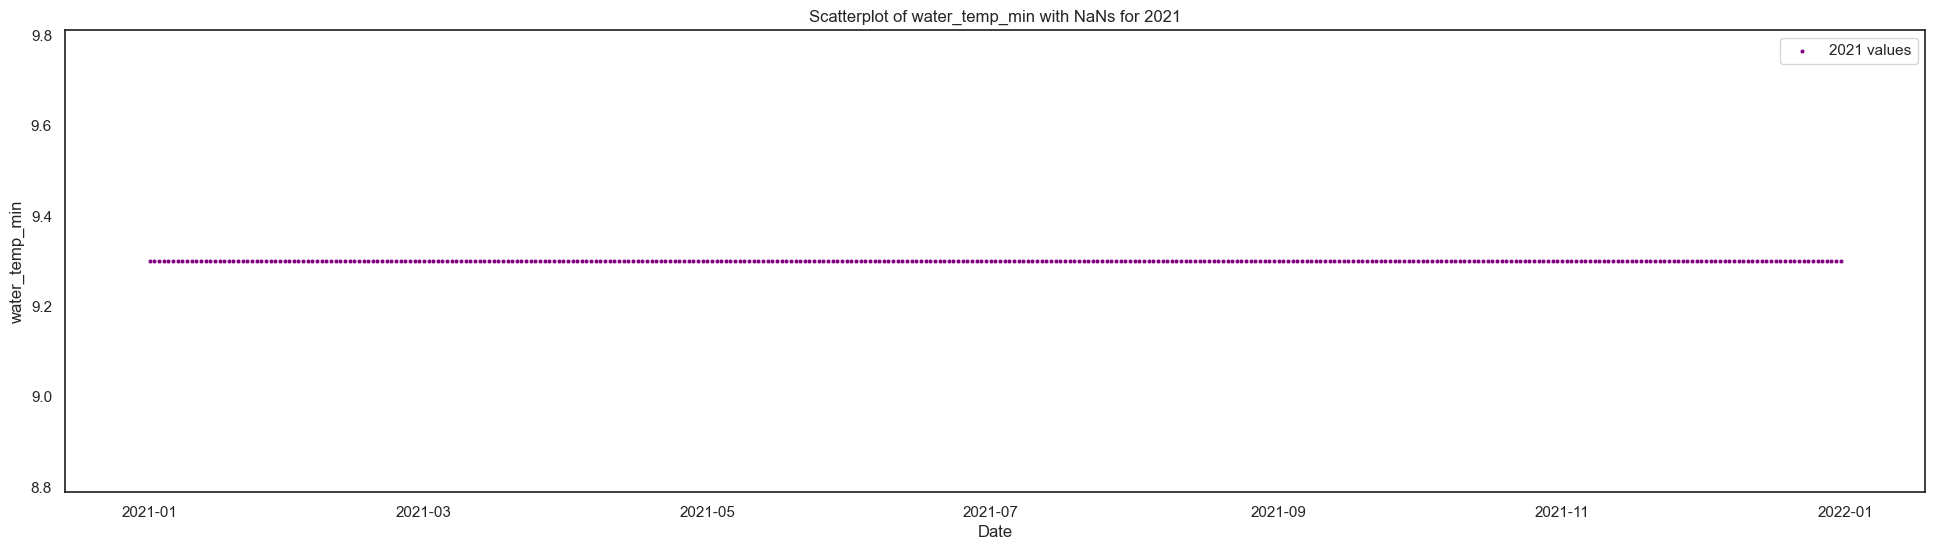

In [246]:
# water_temp_min: NaNs of 2021
nans_per_year(df_river, 'water_temp_min', 2021)
#water_temp_min: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

The numbers of Nans in 2022 is 0:


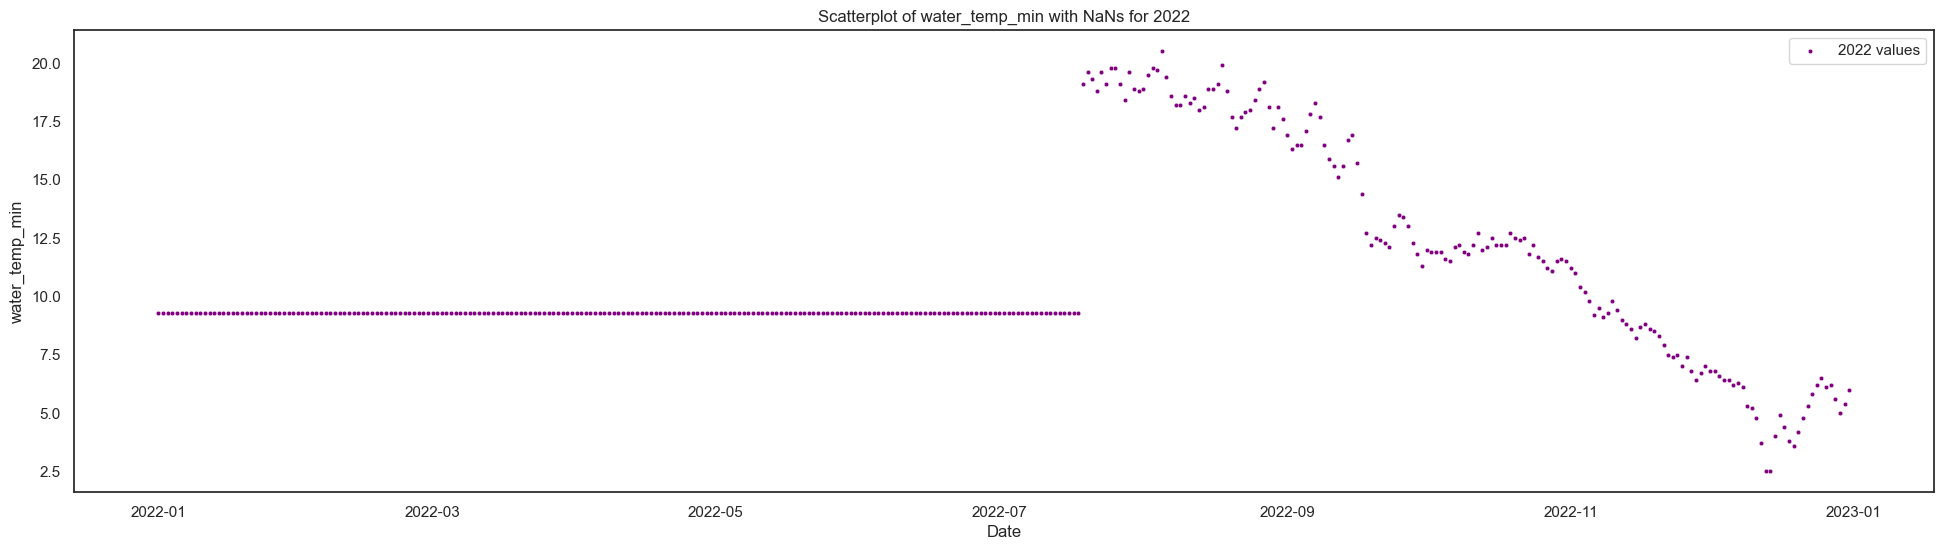

In [247]:
# water_temp_min: NaNs of 2022
nans_per_year(df_river, 'water_temp_min', 2022)
#water_temp_min: years 2009, 2012, 2013, 2017, 2020, 2021 and 2022

<span style='color: violet'><b>Results:</b><br>
Almost all NaNs are lying in a timerow. So I decided to fill in the over all median into all missing NaNs (after the start of the recording).</span>

<span style='color: violet'>Approach of Filling-In all the NaNs:</span>
<ol>
    <li>Filling in the NaNs the overall median</li>
    <li>Setting "filled_status_" into "filled_with_median"</li>
</ol>
    </span>

In [222]:
# for the function I need for each column the name of the column, the status, the start_date
dict_col_status_startdate_river = {
    'flow_avg': {'status_col' : 'filled_status_flow_avg','status' : 'filled_with_median', 'start_date' : '01.01.1958'},
    'flow_max': {'status_col' : 'filled_status_flow_max','status' : 'filled_with_median', 'start_date' : '01.11.1970'},
    'flow_min': {'status_col' : 'filled_status_flow_min','status' : 'filled_with_median', 'start_date' : '01.11.1970'},
    'level_avg': {'status_col' : 'filled_status_level_avg','status' : 'filled_with_median', 'start_date' : '01.11.1973'},
    'level_max': {'status_col' : 'filled_status_level_max','status' : 'filled_with_median', 'start_date' : '01.11.1973'},
    'level_min': {'status_col' : 'filled_status_level_min','status' : 'filled_with_median', 'start_date' : '01.11.1973'},
    'concent_solids': {'status_col' : 'filled_status_concent_solids','status' : 'filled_with_median', 'start_date' : '31.10.1965'},
    'water_temp_avg': {'status_col' : 'filled_status_water_temp_avg','status' : 'filled_with_median', 'start_date' : '01.11.1980'},
    'water_temp_max': {'status_col' : 'filled_status_water_temp_max','status' : 'filled_with_median', 'start_date' :'01.11.1980'},
    'water_temp_min': {'status_col' : 'filled_status_temp_min','status' : 'filled_with_median', 'start_date' :'01.11.1980'}
}

In [215]:
# creating new columns to document the filled_in_status:

for col, values in dict_col_status_startdate_river.items():
    new_col = values['status_col']
    df_river[new_col] = "original"


In [216]:
test_dict = {
    'concent_solids': {'status_col' : 'filled_status_concent_solids',
                       'status' : 'filled_with_median',
                       'start_date' : '31.10.1965'}
}

In [223]:
# Function to fill NaNs with the overall median and track the filled status
def filling_with_overall_median(df, dict_cols):
    """
    This function fills NaN values in specified columns with the overall median
    and updates a corresponding status column to indicate the replacement.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    dict_cols (dict): A dictionary containing the columns, their status columns, 
                      the replacement status message, and the start date for filling.
                      Example: {'water_temp_min': {'status_col': 'filled_status_water_temp_min',
                                                  'status': 'filled_with_median',
                                                  'start_date': '1980-11-01'}}
    """
    
    for col, values in dict_cols.items():

        # Extract parameters from the dictionary
        start_date = values['start_date']
        status_col = values['status_col']
        status = values['status']

        # Define the condition for replacing NaNs
        condition = (df[col].isna()) & (df['date'] >= start_date)

        # Count the number of NaNs before filling
        num_nans_before = df[condition][col].isna().sum()
        
        # Calculate the overall median for the column
        col_median = df[col].median()

        # Perform the replacement with the median and update the status column     
        df.loc[condition, col] = col_median
        df.loc[condition, status_col] = status

        # Count how many rows have been filled by checking the status column
        num_marked_filled_status = df.loc[condition, status_col].eq(status).sum()
        
        print(f"Column: {col}:")
        # Check if the number of filled rows matches the number of NaNs identified earlier
        if num_nans_before - num_marked_filled_status != 0:
            print(f"❗ Warning: Not all NaNs were replaced! Difference: {num_nans_before - num_marked_filled_status}")
        else:
            print("✅ All NaNs have been successfully replaced!")

        # Print a summary to verify the correctness of the operation
   
        print(f"Number of NaNs before filling: {num_nans_before}")
        print(f"Number of rows filled and marked: {num_marked_filled_status}")
        print("-" * 50)    


In [224]:
filling_with_overall_median(df_river, dict_col_status_startdate_river)

Column: flow_avg:
✅ All NaNs have been successfully replaced!
Number of NaNs before filling: 0
Number of rows filled and marked: 0
--------------------------------------------------
Column: flow_max:
✅ All NaNs have been successfully replaced!
Number of NaNs before filling: 294
Number of rows filled and marked: 294
--------------------------------------------------
Column: flow_min:
✅ All NaNs have been successfully replaced!
Number of NaNs before filling: 294
Number of rows filled and marked: 294
--------------------------------------------------
Column: level_avg:
✅ All NaNs have been successfully replaced!
Number of NaNs before filling: 294
Number of rows filled and marked: 294
--------------------------------------------------
Column: level_max:
✅ All NaNs have been successfully replaced!
Number of NaNs before filling: 294
Number of rows filled and marked: 294
--------------------------------------------------
Column: level_min:
✅ All NaNs have been successfully replaced!
Number of

In [ ]:
# Creating the DataFrame for calculating all days of swimming, taking an ice bath. 
# Water temperature's recording started the latest: 1980-11-01
# First creating the DataFrame only for river, 

In [179]:
# creating a new column "fill_in_nans_state"
df_river['nans_filled_status'] = np.nan

In [180]:
# writing a function for all NaN values of one variable, which has to be filled with a zero:
# creating "fill_in_nans_status"

def fill_in_zeros_nans (df, date_start, date_end, col):
    """
    """
    filter = ((df['date'] >= date_start) & (df['date'] <= date_end))
    df.loc[filter, col] = 0
    df.loc[filter, 'fill_in_nans_status'] = 'filled_with_zero'

In [181]:
# fill in conc_solids with zeros from 01.01.1958 until 31.10.1965
# first checking:
df_river[(df_river['date'] >= '01.01.1958') & (df_river['date'] <= '31.10.1965')]['concent_solids'].isna().sum()


2556

In [183]:
# now filling in zeros into the concent_solids from 01.01.1958 until 31.10.1965
fill_in_zeros_nans(df_river, '01.01.1958', '31.10.1965', 'concent_solids')

In [186]:
# checking, if it worked:
df_river[(df_river['date'] >= '01.01.1958') & (df_river['date'] <= '31.10.1965')]['concent_solids'].isna().sum()

0

In [193]:
# also checking, if the status is filled in right:
df_river[df_river['fill_in_nans_status'] == 'filled_with_zero']['concent_solids'].count()

2557

In [189]:
df_river.isna().sum()

date                                     0
flow_avg                                 0
flow_max                              4383
flow_min                              4383
level_avg                             5479
level_max                             5479
level_min                             5479
concent_solids                         319
water_temp_avg                        8758
water_temp_max                        8758
water_temp_min                        8758
alert_level                              0
is_flood_event                           0
flood_group                              0
year                                     0
month                                    0
is_outlier_level_max                     0
is_outlier_level_max_extreme             0
is_outlier_flow_max                      0
is_outlier_flow_max_extreme              0
is_outlier_level_avg                     0
is_outlier_level_avg_extreme             0
is_outlier_flow_avg                      0
is_outlier_

In [213]:
# checking, the NaNs of flow rate to verify that they are ok:
df_flow_rate.isna().sum()

date           0
flow_avg       0
flow_max    4383
flow_min    4383
dtype: int64

In [223]:
# checking the NaNs of water level by looking into the timeframe, in which they started recording:
df_river[df_river['date'] >= '31.10.1965'].isna().sum()

date                                     0
flow_avg                                 0
flow_max                              1827
flow_min                              1827
level_avg                             2923
level_max                             2923
level_min                             2923
concent_solids                         319
water_temp_avg                        6202
water_temp_max                        6202
water_temp_min                        6202
alert_level                              0
is_flood_event                           0
flood_group                              0
year                                     0
month                                    0
is_outlier_level_max                     0
is_outlier_level_max_extreme             0
is_outlier_flow_max                      0
is_outlier_flow_max_extreme              0
is_outlier_level_avg                     0
is_outlier_level_avg_extreme             0
is_outlier_flow_avg                      0
is_outlier_

In [224]:
# checking the NaNs of water level by looking into the timeframe, in which they started recording:
df_river[df_river['date'] >= '01.11.1973'].isna().sum()

date                                     0
flow_avg                                 0
flow_max                                 0
flow_min                                 0
level_avg                              294
level_max                              294
level_min                              294
concent_solids                         319
water_temp_avg                        3573
water_temp_max                        3573
water_temp_min                        3573
alert_level                              0
is_flood_event                           0
flood_group                              0
year                                     0
month                                    0
is_outlier_level_max                     0
is_outlier_level_max_extreme             0
is_outlier_flow_max                      0
is_outlier_flow_max_extreme              0
is_outlier_level_avg                     0
is_outlier_level_avg_extreme             0
is_outlier_flow_avg                      0
is_outlier_

In [225]:
# checking the NaNs of water level by looking into the timeframe, in which they started recording:
df_river[df_river['date'] >= '01.11.1980'].isna().sum()

date                                     0
flow_avg                                 0
flow_max                                 0
flow_min                                 0
level_avg                                0
level_max                                0
level_min                                0
concent_solids                         319
water_temp_avg                        1017
water_temp_max                        1017
water_temp_min                        1017
alert_level                              0
is_flood_event                           0
flood_group                              0
year                                     0
month                                    0
is_outlier_level_max                     0
is_outlier_level_max_extreme             0
is_outlier_flow_max                      0
is_outlier_flow_max_extreme              0
is_outlier_level_avg                     0
is_outlier_level_avg_extreme             0
is_outlier_flow_avg                      0
is_outlier_

In [ ]:
# Check the numbers of data per year of every variable of flow rate, to check if there are missing values by missing data
# creating a DataFrame with the numbers of rows in each year:

data_per_year = df_flow_rate.groupby(df_flow_rate['date'].dt.year)['flow_max'].count()

In [ ]:
# plotting the number of nans per year and month
print("The number of Nans of concentration of suspended solids is: ", df_river['concent_solids'].isna().sum(), "out of:", df_river['concent_solids'].size,
      ", percentage: ", round(df_river['concent_solids'].isna().sum()/df_river['concent_solids'].size*100, 2), "%")

The number of Nans of concentration of suspended solids is:  2875 out of: 24125 , percentage:  11.92 %


In [198]:
number_concent_solids_per_year = df_river.groupby(df_river['year'])[['concent_solids']].count()
number_concent_solids_per_year.value_counts().reset_index()

concent_solids  count
0             365     42
1             366     14
2               0      7
3              62      1
4             146      1
5             234      1
6             354      1

In [200]:
number_concent_solids_per_year[number_concent_solids_per_year <= 365]
# all years where the number of values is < 365
#df_river.loc[df_river.groupby(df_river['year'])['concent_solids'].count()<365, ['year']]
#print("Jahre, bei denen die Anzahl der Datensätze kleiner als 365 ist:", number_concent_solids_per_year < 365)

concent_solids
year                
1958             0.0
1959             0.0
1960             0.0
1961             0.0
1962             0.0
...              ...
2020             NaN
2021           354.0
2022           146.0
2023           365.0
2024           234.0

[67 rows x 1 columns]

In [ ]:
number_concent_solids_per_month = df_river.groupby(df_river['month'])[['concent_solids']].count()
number_concent_solids_per_month.value_counts()

concent_solids
1798              4
1740              3
1639              1
1770              1
1799              1
1812              1
1818              1
Name: count, dtype: int64

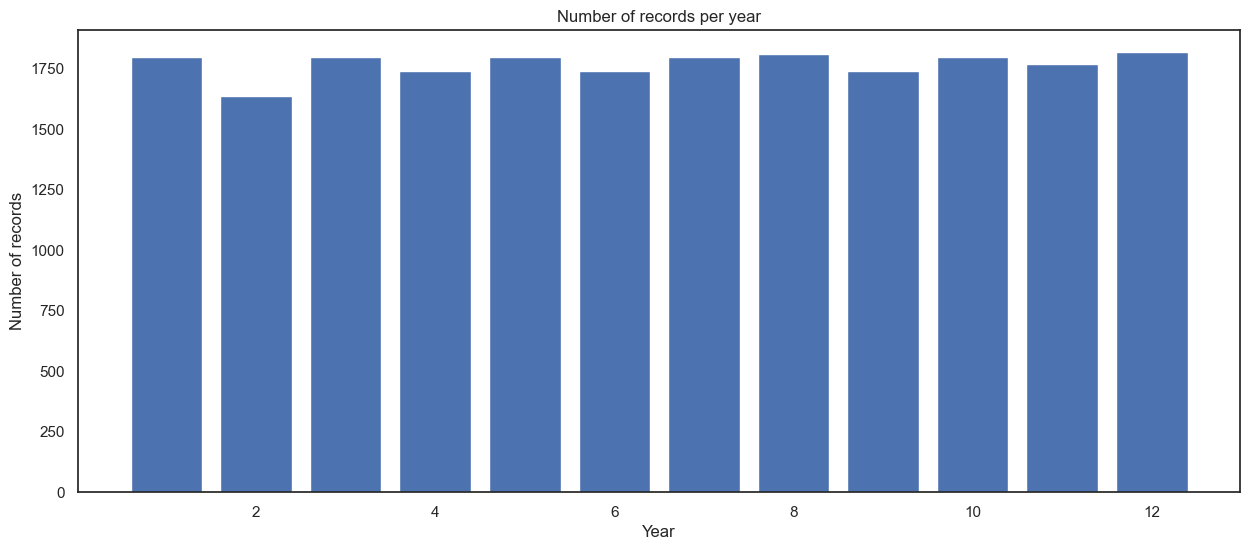

In [ ]:
# plot of records per month:

plt.figure(figsize=(15, 6))

plt.bar(number_concent_solids_per_month.index, number_concent_solids_per_month['concent_solids'])

plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()

<span style='color: red;'>I always recommend to do the group by in one cell, print the result dataframe to see the output is what you wanted and, in another cell, do the plot!</span>
<span style='color: green;'>done</span>

<span style='color: red;'>What do you want to check with this plot? If you have missing days from a specific year? It would be great to know why you are plotting this and what you interpret from it. Probably if that's what you want to check (if you have data for all days in all years), I would have use a different title.</span><br>
<span style='color: green;'>that's plot show that there are rows for every year, except 1958 - I assume the recording startet later in that year - and except in 2024, because the year <br>is still ongoing! Maybe a plot isn't really necessary: To count the numbers, could be also an approach and would be more acurate</span>

In [ ]:
df_reservoir.isna().sum()

date                                0
reservoir_avg                       0
reservoir_max                       7
reservoir_min                       7
is_outlier_reservoir_avg            0
is_outlier_reservoir_avg_extreme    0
is_outlier_reservoir_max            0
is_outlier_reservoir_max_extreme    0
is_outlier_reservoir_min            0
is_outlier_reservoir_min_extreme    0
dtype: int64

In [ ]:
df_weather.isna().sum()

date                   0
tavg                   0
tmin                   0
tmax                   0
prcp                   0
snow                1568
wdir               14632
wspd                9927
wpgt                9942
pres                9863
tsun                   5
is_outlier_tavg        0
is_outlier_tmin        0
is_outlier_tmax        0
is_outlier_prcp        0
is_outlier_snow        0
is_outlier_wspd        0
is_outlier_wpgt        0
is_outlier_pres        0
dtype: int64

# ARCHIVE

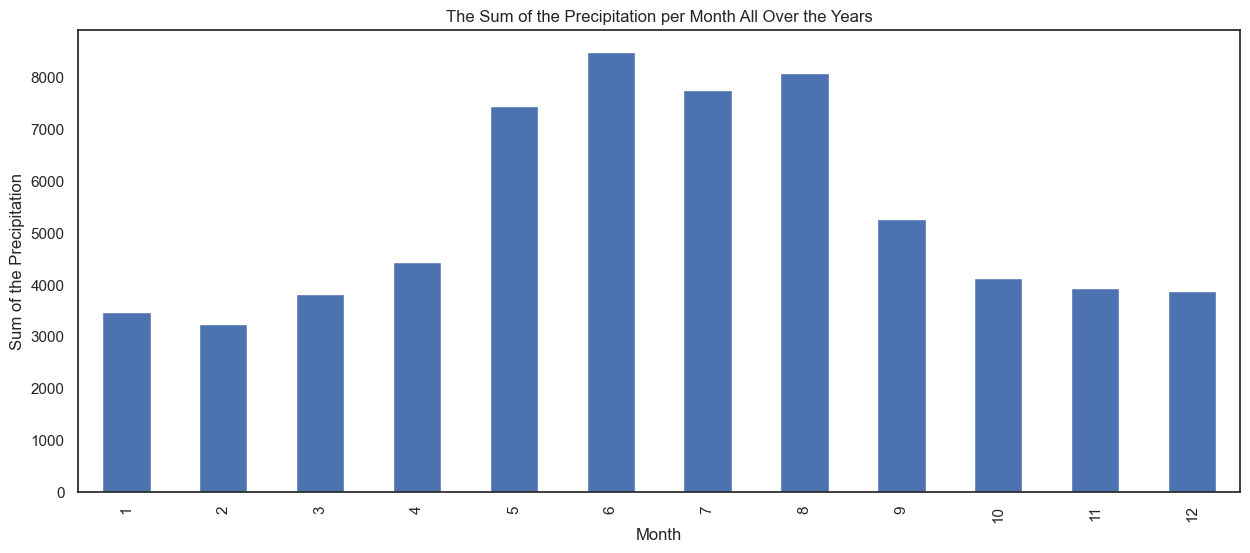

In [ ]:
prcp_per_month = df_weather.groupby(df_weather['month'])['prcp'].sum()
plt.figure(figsize=(15, 6))
prcp_per_month.plot(kind='bar')
plt.title('The Sum of the Precipitation per Month All Over the Years')
plt.xlabel('Month')
plt.ylabel('Sum of the Precipitation')
plt.show()

In [ ]:
# checking NaNs:
df_river_flow_rate.isna().sum()

NameError: name 'df_river_flow_rate' is not defined

In [ ]:
# checking, if there are NaNs after June 2011
df_river_flow_rate_nans = df_river_flow_rate[(df_river_flow_rate['Maximum']).isna() | (df_river_flow_rate['Minimum'].isna())]
df_river_flow_rate_nans

# NaNs of Maximum and Minimum after 31.10.1970, afterwards no NaNs

Datum Mittelwert Maximum Minimum Prüfstatus
0     01.11.58       74,4     NaN     NaN   Geprueft
1     02.11.58       77,9     NaN     NaN   Geprueft
2     03.11.58       72,2     NaN     NaN   Geprueft
3     04.11.58         93     NaN     NaN   Geprueft
4     05.11.58        121     NaN     NaN   Geprueft
...        ...        ...     ...     ...        ...
4378  27.10.70       56,2     NaN     NaN   Geprueft
4379  28.10.70       59,5     NaN     NaN   Geprueft
4380  29.10.70       67,4     NaN     NaN   Geprueft
4381  30.10.70       74,9     NaN     NaN   Geprueft
4382  31.10.70       67,4     NaN     NaN   Geprueft

[4383 rows x 5 columns]

In [ ]:
# loading and putting all dataframes together: water_quality
df_water_quality = df_concat('../datasets/river/fluesse-schwebstoff/16005701_beginn_bis_31.12.2023_tmw_0.csv','../datasets/river/fluesse-schwebstoff/16005701_01.01.2024_31.08.2024_tmw_0.csv', ";")


dataframe for is completed. There are 21250 rows.


In [ ]:
df_water_quality.head(10)
# first data from 01.10.1965

Zeitpunkt Schwebstoff-Konzentration [g/m^3] Prüfstatus  \
0  31.10.65                                25   Rohdaten   
1  01.11.65                             18,06   Rohdaten   
2  02.11.65                             11,57   Rohdaten   
3  03.11.65                             11,11   Rohdaten   
4  04.11.65                              9,88   Rohdaten   
5  05.11.65                              5,87   Rohdaten   
6  06.11.65                              5,56   Rohdaten   
7  07.11.65                              5,56   Rohdaten   
8  08.11.65                              6,79   Rohdaten   
9  09.11.65                             12,04   Rohdaten   

  Schwebstoff-Fracht [t] Prüfstatus.1 Schwebstoff-Abtrag [t/m^2] Prüfstatus.2  \
0                  47,85     Rohdaten                       0,02     Rohdaten   
1                  32,47     Rohdaten                       0,01     Rohdaten   
2                  20,55     Rohdaten                       0,01     Rohdaten   
3                  27,77     Rohdaten                       0,01     Rohdaten   
4                  26,54     Rohdaten                       0,01     Rohdaten   
5                  16,67     Rohdaten                       0,01     Rohdaten   
6                  14,31     Rohdaten                       0,01     Rohdaten   
7                  12,34     Rohdaten                          0     Rohdaten   
8                  13,54     Rohdaten                       0,01     Rohdaten   
9                  27,42     Rohdaten                       0,01     Rohdaten   

  Schwebstoff-Transport [kg/s] Prüfstatus.3  
0                         0,55     Rohdaten  
1                         0,38     Rohdaten  
2                         0,24     Rohdaten  
3                         0,32     Rohdaten  
4                         0,31     Rohdaten  
5                         0,19     Rohdaten  
6                         0,17     Rohdaten  
7                         0,14     Rohdaten  
8                         0,16     Rohdaten  
9                         0,32     Rohdaten

In [ ]:
df_water_quality.info()
# no NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 21250 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Zeitpunkt                          21250 non-null  object
 1   Schwebstoff-Konzentration [g/m^3]  21250 non-null  object
 2   Prüfstatus                         21250 non-null  object
 3   Schwebstoff-Fracht [t]             21250 non-null  object
 4   Prüfstatus.1                       21250 non-null  object
 5   Schwebstoff-Abtrag [t/m^2]         21250 non-null  object
 6   Prüfstatus.2                       21250 non-null  object
 7   Schwebstoff-Transport [kg/s]       21250 non-null  object
 8   Prüfstatus.3                       21250 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
# loading and putting all dataframes together: water_level
df_water_level = df_concat('../datasets/river/fluesse-wasserstand/16005701_beginn_bis_31.12.2023_tmw_0-1.csv', '../datasets/river/fluesse-wasserstand/16005701_01.01.2024_31.08.2024_tmw_0.csv', ';')

dataframe for is completed. There are 18567 rows.


In [ ]:
df_water_level.head(10)
# first data from 01.11.1973

Datum  Mittelwert  Maximum  Minimum Prüfstatus
0  01.11.73          50       58       44   Geprueft
1  02.11.73          45       53       43   Geprueft
2  03.11.73          49       57       43   Geprueft
3  04.11.73          45       57       31   Geprueft
4  05.11.73          46       52       35   Geprueft
5  06.11.73          49       54       43   Geprueft
6  07.11.73          51       54       43   Geprueft
7  08.11.73          48       54       40   Geprueft
8  09.11.73          46       53       33   Geprueft
9  10.11.73          43       50       38   Geprueft

In [ ]:
df_water_level.info()
# no NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 18567 entries, 0 to 243
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Datum       18567 non-null  object
 1   Mittelwert  18567 non-null  int64 
 2   Maximum     18567 non-null  int64 
 3   Minimum     18567 non-null  int64 
 4   Prüfstatus  18567 non-null  object
dtypes: int64(3), object(2)
memory usage: 870.3+ KB


In [ ]:
# loading and putting all dataframes together: daily_water_temperature
df_daily_water_temperature = df_concat('/Users/natalie/Documents/_DA_course/finalProject_/finalProjectNatalie/datasets/river/fluesse-wassertemperatur/16005701_beginn_bis_31.12.2023_tmw_0.csv','/Users/natalie/Documents/_DA_course/finalProject_/finalProjectNatalie/datasets/river/fluesse-wassertemperatur/16005701_01.01.2024_31.08.2024_tmw_0.csv', ';')

dataframe for is completed. There are 15288 rows.


In [ ]:
df_daily_water_temperature.head(10)
# data from 01.11.1980

Datum Mittelwert Maximum Minimum Prüfstatus
0  01.11.80        8,1     8,1     8,1   Geprueft
1  02.11.80        7,3     7,3     7,3   Geprueft
2  03.11.80        5,8     5,8     5,8   Geprueft
3  04.11.80        5,6     5,6     5,6   Geprueft
4  05.11.80        4,8     4,8     4,8   Geprueft
5  06.11.80        4,7     4,7     4,7   Geprueft
6  07.11.80        6,1     6,1     6,1   Geprueft
7  08.11.80        7,7     7,7     7,7   Geprueft
8  09.11.80        7,5     7,5     7,5   Geprueft
9  10.11.80        7,6     7,6     7,6   Geprueft

In [ ]:
df_daily_water_temperature.info()
# non NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 15288 entries, 0 to 243
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Datum       15288 non-null  object
 1   Mittelwert  15288 non-null  object
 2   Maximum     15288 non-null  object
 3   Minimum     15288 non-null  object
 4   Prüfstatus  15288 non-null  object
dtypes: object(5)
memory usage: 716.6+ KB


In [ ]:
# creating 1 dataframe for the water-variables river flow rate, water quality: suspended solids, water level, daily water temperatures
# checking all columns and potientially rename them:
#df_river_flow_rate.columns: done
#df_water_level.columns
#df_water_quality.columns
#df_daily_water_temperature.columns

In [ ]:
# renaming the columns of df_river_flow_rate:
df_river_flow_rate = df_river_flow_rate.rename(columns={'Mittelwert' : 'avg_flow_rate',
                                   'Maximum' : 'max_flow_rate',
                                   'Minimum' : 'min_flow_rate'})
df_river_flow_rate.columns


Index(['Datum', 'avg_flow_rate', 'max_flow_rate', 'min_flow_rate',
       'Prüfstatus'],
      dtype='object')

In [ ]:
# dropping the column 'Prüfstatus'
df_river_flow_rate = df_river_flow_rate.drop(columns='Prüfstatus')
df_river_flow_rate.columns

Index(['Datum', 'avg_flow_rate', 'max_flow_rate', 'min_flow_rate'], dtype='object')

In [ ]:
# Changing the order of the columns
cols_river = df_river.columns.to_list()
cols_river

['avg_water_temperature',
 'max_water_temperature',
 'min_water_temperature',
 'avg_water_level',
 'max_water_level',
 'min_water_level',
 'suspended_solids_concentration',
 'suspended_solid_load',
 'suspended_sediment_erosion',
 'suspended_sediment_transport',
 'avg_flow_rate',
 'max_flow_rate',
 'min_flow_rate',
 'date']

In [ ]:
# putting 'date' at first place
cols_river.insert(0, cols_river.pop(cols_river.index('date')))
df_river= df_river[cols_river]
df_river

date avg_water_temperature max_water_temperature  \
0     1980-11-01                   8,1                   8,1   
1     1980-11-02                   7,3                   7,3   
2     1980-11-03                   5,8                   5,8   
3     1980-11-04                   5,6                   5,6   
4     1980-11-05                   4,8                   4,8   
...          ...                   ...                   ...   
15283 2024-08-27                  16,6                  17,6   
15284 2024-08-28                  17,8                    19   
15285 2024-08-29                  18,7                  19,6   
15286 2024-08-30                  19,1                  19,8   
15287 2024-08-31                  19,1                  19,7   

      min_water_temperature  avg_water_level  max_water_level  \
0                       8,1               71               86   
1                       7,3               59               62   
2                       5,8               68               83   
3                       5,6               77               80   
4                       4,8               77               89   
...                     ...              ...              ...   
15283                  15,8              130              137   
15284                  16,6              117              121   
15285                  17,7              114              116   
15286                  18,1              114              116   
15287                  18,2              109              115   

       min_water_level suspended_solids_concentration suspended_solid_load  \
0                   59                           5,57                25,56   
1                   54                            5,1                21,54   
2                   48                           5,14                20,16   
3                   73                            7,6                31,26   
4                   70                           9,03                37,83   
...                ...                            ...                  ...   
15283              121                            NaN                  NaN   
15284              113                            NaN                  NaN   
15285              110                            NaN                  NaN   
15286              108                            NaN                  NaN   
15287              104                            NaN                  NaN   

      suspended_sediment_erosion suspended_sediment_transport avg_flow_rate  \
0                           0,01                          0,3          47,9   
1                           0,01                         0,25          36,7   
2                           0,01                         0,23          45,8   
3                           0,01                         0,36          53,4   
4                           0,01                         0,44          54,1   
...                          ...                          ...           ...   
15283                        NaN                          NaN            66   
15284                        NaN                          NaN          47,5   
15285                        NaN                          NaN          43,2   
15286                        NaN                          NaN          43,5   
15287                        NaN                          NaN          37,7   

      max_flow_rate min_flow_rate  
0              63,4            37  
1              39,6          32,7  
2                60          27,9  
3              56,9          49,9  
4              66,5            47  
...             ...           ...  
15283          76,7            53  
15284            53          42,2  
15285          46,1          38,5  
15286          46,1          36,3  
15287          44,8            32  

[15288 rows x 14 columns]

In [ ]:
# adding columns year and month:
df_river['year'] = df_river['date'].dt.year
df_river['month'] = df_river['date'].dt.month
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  object        
 2   max_water_temperature           15288 non-null  object        
 3   min_water_temperature           15288 non-null  object        
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15258 non-null  object        
 8   suspended_solid_load            15258 non-null  object        
 9   suspended_sediment_erosion      15258 non-null  object        
 10  suspended_sediment_transport    15258 non-null  object        
 11  av

In [ ]:
# first replacing the "," with "." so that I can convert the strings into floats:

df_river['avg_water_temperature'] = df_river['avg_water_temperature'].str.replace(',', '.')
df_river['max_water_temperature'] = df_river['max_water_temperature'].str.replace(',', '.')
df_river['min_water_temperature'] = df_river['min_water_temperature'].str.replace(',', '.')
df_river['suspended_solids_concentration'] = df_river['suspended_solids_concentration'].str.replace(',', '.')
df_river['suspended_solid_load'] = df_river['suspended_solid_load'].str.replace(',', '.') 
df_river['suspended_sediment_erosion'] = df_river['suspended_sediment_erosion'].str.replace(',', '.')
df_river['suspended_sediment_transport'] = df_river['suspended_sediment_transport'].str.replace(',', '.')
df_river['avg_flow_rate'] = df_river['avg_flow_rate'].str.replace(',', '.')
df_river['max_flow_rate'] = df_river['max_flow_rate'].str.replace(',', '.')
df_river['min_flow_rate'] = df_river['min_flow_rate'].str.replace(',', '.')     

df_river

date avg_water_temperature max_water_temperature  \
0     1980-11-01                   8.1                   8.1   
1     1980-11-02                   7.3                   7.3   
2     1980-11-03                   5.8                   5.8   
3     1980-11-04                   5.6                   5.6   
4     1980-11-05                   4.8                   4.8   
...          ...                   ...                   ...   
15283 2024-08-27                  16.6                  17.6   
15284 2024-08-28                  17.8                    19   
15285 2024-08-29                  18.7                  19.6   
15286 2024-08-30                  19.1                  19.8   
15287 2024-08-31                  19.1                  19.7   

      min_water_temperature  avg_water_level  max_water_level  \
0                       8.1               71               86   
1                       7.3               59               62   
2                       5.8               68               83   
3                       5.6               77               80   
4                       4.8               77               89   
...                     ...              ...              ...   
15283                  15.8              130              137   
15284                  16.6              117              121   
15285                  17.7              114              116   
15286                  18.1              114              116   
15287                  18.2              109              115   

       min_water_level suspended_solids_concentration suspended_solid_load  \
0                   59                           5.57                25.56   
1                   54                            5.1                21.54   
2                   48                           5.14                20.16   
3                   73                            7.6                31.26   
4                   70                           9.03                37.83   
...                ...                            ...                  ...   
15283              121                            NaN                  NaN   
15284              113                            NaN                  NaN   
15285              110                            NaN                  NaN   
15286              108                            NaN                  NaN   
15287              104                            NaN                  NaN   

      suspended_sediment_erosion suspended_sediment_transport avg_flow_rate  \
0                           0.01                          0.3          47.9   
1                           0.01                         0.25          36.7   
2                           0.01                         0.23          45.8   
3                           0.01                         0.36          53.4   
4                           0.01                         0.44          54.1   
...                          ...                          ...           ...   
15283                        NaN                          NaN            66   
15284                        NaN                          NaN          47.5   
15285                        NaN                          NaN          43.2   
15286                        NaN                          NaN          43.5   
15287                        NaN                          NaN          37.7   

      max_flow_rate min_flow_rate  year  month  
0              63.4            37  1980     11  
1              39.6          32.7  1980     11  
2                60          27.9  1980     11  
3              56.9          49.9  1980     11  
4              66.5            47  1980     11  
...             ...           ...   ...    ...  
15283          76.7            53  2024      8  
15284            53          42.2  2024      8  
15285          46.1          38.5  2024      8  
15286          46.1          36.3  2024      8  
15287          44.8            32  20

In [ ]:
# changing all objects (but date, month, year) into float64
df_river['avg_water_temperature'] = df_river['avg_water_temperature'].astype(dtype='float64')
df_river['max_water_temperature'] = df_river['max_water_temperature'].astype(dtype='float64')
df_river['min_water_temperature'] = df_river['min_water_temperature'].astype(dtype='float64')
df_river['suspended_solids_concentration'] = df_river['suspended_solids_concentration'].astype(dtype='float64')
df_river['suspended_solid_load'] = df_river['suspended_solid_load'].astype(dtype='float64')
df_river['suspended_sediment_erosion'] = df_river['suspended_sediment_erosion'].astype(dtype='float64')
df_river['suspended_sediment_transport'] = df_river['suspended_sediment_transport'].astype(dtype='float64')
df_river['avg_flow_rate'] = df_river['avg_flow_rate'].astype(dtype='float64')
df_river['max_flow_rate'] = df_river['max_flow_rate'].astype(dtype='float64')
df_river['min_flow_rate'] = df_river['min_flow_rate'].astype(dtype='float64')
 
df_river.info()            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  float64       
 2   max_water_temperature           15288 non-null  float64       
 3   min_water_temperature           15288 non-null  float64       
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15258 non-null  float64       
 8   suspended_solid_load            15258 non-null  float64       
 9   suspended_sediment_erosion      15258 non-null  float64       
 10  suspended_sediment_transport    15258 non-null  float64       
 11  av

In [ ]:
df_river.isna().sum()

date                               0
avg_water_temperature              0
max_water_temperature              0
min_water_temperature              0
avg_water_level                    0
max_water_level                    0
min_water_level                    0
suspended_solids_concentration    30
suspended_solid_load              30
suspended_sediment_erosion        30
suspended_sediment_transport      30
avg_flow_rate                      0
max_flow_rate                      0
min_flow_rate                      0
year                               0
month                              0
dtype: int64

In [ ]:
df_river.groupby('year')['date'].count()

year
1980     61
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    361
2010    365
2011    365
2012    267
2013    320
2014    365
2015    365
2016    366
2017    361
2018    365
2019    365
2020    360
2022    166
2023    365
2024    244
Name: date, dtype: int64

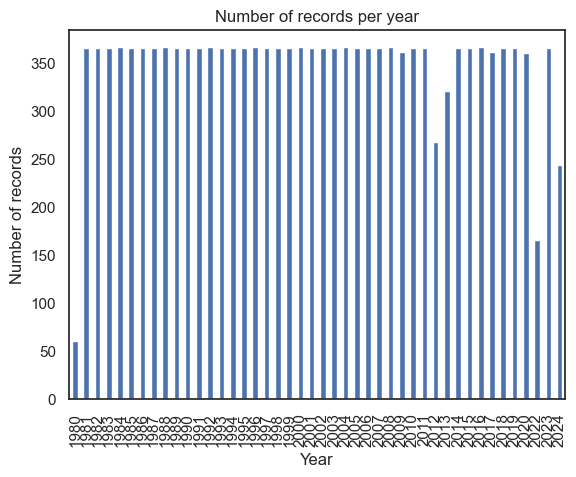

In [ ]:
# plot of records per year:
data_per_year = df_river.groupby('year').size()

data_per_year.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()
#sns.barplot(x=df_river['year'],
#            y=df_river['year'].count())
#plt.show()
#len(df_river[df_river['year'] == 2016])

In [ ]:
# how much data is missing in 1980, 2012, 2013 and 2022?
num_missing_records_1980 =  366 - df_river['year'][df_river['year']==1980].count()
num_missing_records_2012 =  366 - df_river['year'][df_river['year']==2012].count()
num_missing_records_2013 =  365 - df_river['year'][df_river['year']==2013].count()
num_missing_records_2022 =  365 - df_river['year'][df_river['year']==2022].count()
num_missing_records_2024 =  365 - df_river['year'][df_river['year']==2024].count()

print('Missing data for: 1980:', num_missing_records_1980, '2012:', num_missing_records_2012, '2013:', num_missing_records_2013, '2022:', num_missing_records_2022, '2024:', num_missing_records_2024)

Missing data for: 1980: 305 2012: 99 2013: 45 2022: 199 2024: 121


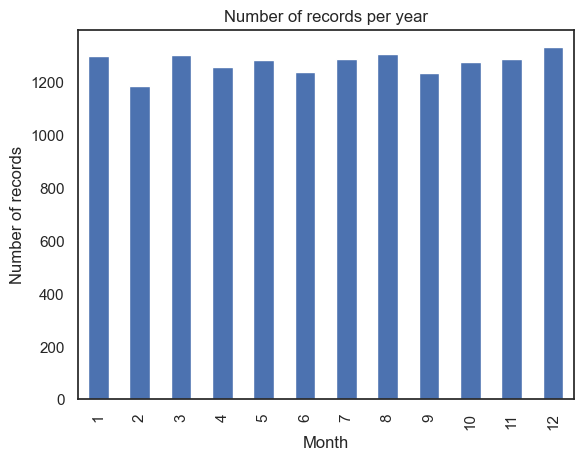

In [ ]:
# plot of records per month:
data_per_month_river = df_river.groupby('month').size()

data_per_month_river.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Month')
plt.ylabel('Number of records')
#plt.show()

In [ ]:
df_river_suspended_nans = df_river[df_river['suspended_solids_concentration'].isna()]
df_river_suspended_nans

# no data of water quality from 19.07.2022 until 07.08.22 and after 21.08.24
# deleting all rows after 21.08.
# what shall I do with the data in 2022? Maybe fill them with the mean of 2 weeks before and 2 weeks after?
# looking into it:

date  avg_water_temperature  max_water_temperature  \
14513 2022-07-19                   19.9                   20.5   
14514 2022-07-20                   20.4                   21.4   
14515 2022-07-21                   20.1                   21.3   
14516 2022-07-22                   19.6                   20.5   
14517 2022-07-23                   19.9                   20.4   
14518 2022-07-24                   19.8                   20.7   
14519 2022-07-25                   20.6                   21.5   
14520 2022-07-26                   20.3                   21.3   
14521 2022-07-27                   19.3                   19.7   
14522 2022-07-28                   19.1                   20.2   
14523 2022-07-29                   19.9                   20.2   
14524 2022-07-30                   19.6                   20.1   
14525 2022-07-31                   19.3                   20.0   
14526 2022-08-01                   19.4                   19.8   
14527 2022-08-02                   20.0                   20.7   
14528 2022-08-03                   20.4                   21.1   
14529 2022-08-04                   20.7                   21.5   
14530 2022-08-05                   21.1                   21.5   
14531 2022-08-06                   20.4                   21.2   
14532 2022-08-07                   19.0                   19.4   
15278 2024-08-22                   17.6                   18.4   
15279 2024-08-23                   18.0                   19.1   
15280 2024-08-24                   18.8                   20.0   
15281 2024-08-25                   18.3                   19.7   
15282 2024-08-26                   16.4                   17.4   
15283 2024-08-27                   16.6                   17.6   
15284 2024-08-28                   17.8                   19.0   
15285 2024-08-29                   18.7                   19.6   
15286 2024-08-30                   19.1                   19.8   
15287 2024-08-31                   19.1                   19.7   

       min_water_temperature  avg_water_level  max_water_level  \
14513                   19.1               94              103   
14514                   19.6               99              107   
14515                   19.3               98              102   
14516                   18.8               92               95   
14517                   19.6               89               91   
14518                   19.1               89               94   
14519                   19.8               89               96   
14520                   19.8              100              109   
14521                   19.1               93               95   
14522                   18.4               93               99   
14523                   19.6               99              104   
14524                   18.9               99              103   
14525                   18.8               93               95   
14526                   18.9               90               92   
14527                   19.5               91               93   
14528                   19.8               96              103   
14529                   19.7               98              103   
14530                   20.5               93               96   
14531                   19.4               89               97   
14532                   18.6               87               89   
15278                   16.7              131              136   
15279                   16.9              127              130   
15280                   17.6              126              131   
15281                   17.5              121              144   
15282                   16.1              142              150   
15283                   15.8              130              137   
15284                   16.6              117              121   
15285                   17.7              114              116   
15286                   18.1              114      

In [ ]:
# looking over the means grouped by month to possibly fill in the NaNs of suspended solids concentration the monthly mean
df_river.groupby('month')['suspended_solids_concentration'].mean()


month
1     11.566006
2     13.412763
3     17.059093
4     15.863943
5     26.262615
6     35.792935
7     52.707526
8     34.954255
9     15.906783
10    13.360877
11    11.295578
12    11.554039
Name: suspended_solids_concentration, dtype: float64

In [ ]:
# getting the mean of suspended concentration in the month July:
mean_concentration_july = df_river['suspended_solids_concentration'][df_river['month'] == 7].mean()
round(mean_concentration_july,2)

52.71

In [ ]:
# getting the right part of the dataframe for the july NaNs:
df_river_suspended_nans_july = df_river[(df_river['suspended_solids_concentration'].isna()) & (df_river['month']==7)]
df_river_suspended_nans_july

date  avg_water_temperature  max_water_temperature  \
14513 2022-07-19                   19.9                   20.5   
14514 2022-07-20                   20.4                   21.4   
14515 2022-07-21                   20.1                   21.3   
14516 2022-07-22                   19.6                   20.5   
14517 2022-07-23                   19.9                   20.4   
14518 2022-07-24                   19.8                   20.7   
14519 2022-07-25                   20.6                   21.5   
14520 2022-07-26                   20.3                   21.3   
14521 2022-07-27                   19.3                   19.7   
14522 2022-07-28                   19.1                   20.2   
14523 2022-07-29                   19.9                   20.2   
14524 2022-07-30                   19.6                   20.1   
14525 2022-07-31                   19.3                   20.0   

       min_water_temperature  avg_water_level  max_water_level  \
14513                   19.1               94              103   
14514                   19.6               99              107   
14515                   19.3               98              102   
14516                   18.8               92               95   
14517                   19.6               89               91   
14518                   19.1               89               94   
14519                   19.8               89               96   
14520                   19.8              100              109   
14521                   19.1               93               95   
14522                   18.4               93               99   
14523                   19.6               99              104   
14524                   18.9               99              103   
14525                   18.8               93               95   

       min_water_level  suspended_solids_concentration  suspended_solid_load  \
14513               88                             NaN                   NaN   
14514               93                             NaN                   NaN   
14515               93                             NaN                   NaN   
14516               87                             NaN                   NaN   
14517               87                             NaN                   NaN   
14518               87                             NaN                   NaN   
14519               85                             NaN                   NaN   
14520               92                             NaN                   NaN   
14521               91                             NaN                   NaN   
14522               90                             NaN                   NaN   
14523               93                             NaN                   NaN   
14524               93                             NaN                   NaN   
14525               90                             NaN                   NaN   

       suspended_sediment_erosion  suspended_sediment_transport  \
14513                         NaN                           NaN   
14514                         NaN                           NaN   
14515                         NaN                           NaN   
14516                         NaN                           NaN   
14517                         NaN                           NaN   
14518                         NaN                           NaN   
14519                         NaN                           NaN   
14520                         NaN                           NaN   
14521                         NaN                           NaN   
14522                         NaN                           NaN   
14523                         NaN                           NaN   
14524                         NaN                           NaN   
14525                         NaN                           NaN   

       avg_flow_rate  max_flow_rate  min_flow_rate  year  month  
14513           34.1           42.6 

In [ ]:
# fill in the July-NaNs with the mean:
df_river.loc[(df_river['suspended_solids_concentration'].isna()) & (df_river['month'] == 7), 'suspended_solids_concentration'] = round(mean_concentration_july,2)
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  float64       
 2   max_water_temperature           15288 non-null  float64       
 3   min_water_temperature           15288 non-null  float64       
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15271 non-null  float64       
 8   suspended_solid_load            15258 non-null  float64       
 9   suspended_sediment_erosion      15258 non-null  float64       
 10  suspended_sediment_transport    15258 non-null  float64       
 11  av

In [ ]:
# getting the mean of suspended concentration in the month august:
mean_concentration_august = df_river['suspended_solids_concentration'][df_river['month'] == 8].mean()
round(mean_concentration_august,2)

34.95

In [ ]:
# getting the right part of the dataframe for the august NaNs:
df_river_suspended_nans_august = df_river[(df_river['suspended_solids_concentration'].isna()) & (df_river['month']==8)]
df_river_suspended_nans_august

date  avg_water_temperature  max_water_temperature  \
14526 2022-08-01                   19.4                   19.8   
14527 2022-08-02                   20.0                   20.7   
14528 2022-08-03                   20.4                   21.1   
14529 2022-08-04                   20.7                   21.5   
14530 2022-08-05                   21.1                   21.5   
14531 2022-08-06                   20.4                   21.2   
14532 2022-08-07                   19.0                   19.4   
15278 2024-08-22                   17.6                   18.4   
15279 2024-08-23                   18.0                   19.1   
15280 2024-08-24                   18.8                   20.0   
15281 2024-08-25                   18.3                   19.7   
15282 2024-08-26                   16.4                   17.4   
15283 2024-08-27                   16.6                   17.6   
15284 2024-08-28                   17.8                   19.0   
15285 2024-08-29                   18.7                   19.6   
15286 2024-08-30                   19.1                   19.8   
15287 2024-08-31                   19.1                   19.7   

       min_water_temperature  avg_water_level  max_water_level  \
14526                   18.9               90               92   
14527                   19.5               91               93   
14528                   19.8               96              103   
14529                   19.7               98              103   
14530                   20.5               93               96   
14531                   19.4               89               97   
14532                   18.6               87               89   
15278                   16.7              131              136   
15279                   16.9              127              130   
15280                   17.6              126              131   
15281                   17.5              121              144   
15282                   16.1              142              150   
15283                   15.8              130              137   
15284                   16.6              117              121   
15285                   17.7              114              116   
15286                   18.1              114              116   
15287                   18.2              109              115   

       min_water_level  suspended_solids_concentration  suspended_solid_load  \
14526               86                             NaN                   NaN   
14527               89                             NaN                   NaN   
14528               90                             NaN                   NaN   
14529               93                             NaN                   NaN   
14530               90                             NaN                   NaN   
14531               86                             NaN                   NaN   
14532               85                             NaN                   NaN   
15278              125                             NaN                   NaN   
15279              121                             NaN                   NaN   
15280              120                             NaN                   NaN   
15281              111                             NaN                   NaN   
15282              131                             NaN                   NaN   
15283              121                             NaN                   NaN   
15284              113                             NaN                   NaN   
15285              110                             NaN                   NaN   
15286              108                             NaN                   NaN   
15287              104                             NaN                   NaN   

       suspended_sediment_erosion  suspended_sediment_transport  \
14526                         NaN                           NaN   
14527                         NaN                          

In [ ]:
# fill in the august-NaNs with the mean:
df_river.loc[(df_river['suspended_solids_concentration'].isna()) & (df_river['month']==8), 'suspended_solids_concentration'] = round(mean_concentration_august,2)
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  float64       
 2   max_water_temperature           15288 non-null  float64       
 3   min_water_temperature           15288 non-null  float64       
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15288 non-null  float64       
 8   suspended_solid_load            15258 non-null  float64       
 9   suspended_sediment_erosion      15258 non-null  float64       
 10  suspended_sediment_transport    15258 non-null  float64       
 11  av

In [ ]:
df_river.tail(10)

date  avg_water_temperature  max_water_temperature  \
15278 2024-08-22                   17.6                   18.4   
15279 2024-08-23                   18.0                   19.1   
15280 2024-08-24                   18.8                   20.0   
15281 2024-08-25                   18.3                   19.7   
15282 2024-08-26                   16.4                   17.4   
15283 2024-08-27                   16.6                   17.6   
15284 2024-08-28                   17.8                   19.0   
15285 2024-08-29                   18.7                   19.6   
15286 2024-08-30                   19.1                   19.8   
15287 2024-08-31                   19.1                   19.7   

       min_water_temperature  avg_water_level  max_water_level  \
15278                   16.7              131              136   
15279                   16.9              127              130   
15280                   17.6              126              131   
15281                   17.5              121              144   
15282                   16.1              142              150   
15283                   15.8              130              137   
15284                   16.6              117              121   
15285                   17.7              114              116   
15286                   18.1              114              116   
15287                   18.2              109              115   

       min_water_level  suspended_solids_concentration  suspended_solid_load  \
15278              125                           34.95                   NaN   
15279              121                           34.95                   NaN   
15280              120                           34.95                   NaN   
15281              111                           34.95                   NaN   
15282              131                           34.95                   NaN   
15283              121                           34.95                   NaN   
15284              113                           34.95                   NaN   
15285              110                           34.95                   NaN   
15286              108                           34.95                   NaN   
15287              104                           34.95                   NaN   

       suspended_sediment_erosion  suspended_sediment_transport  \
15278                         NaN                           NaN   
15279                         NaN                           NaN   
15280                         NaN                           NaN   
15281                         NaN                           NaN   
15282                         NaN                           NaN   
15283                         NaN                           NaN   
15284                         NaN                           NaN   
15285                         NaN                           NaN   
15286                         NaN                           NaN   
15287                         NaN                           NaN   

       avg_flow_rate  max_flow_rate  min_flow_rate  year  month  
15278           68.0           75.2           58.8  2024      8  
15279           61.8           66.2           53.0  2024      8  
15280           60.5           67.7           51.6  2024      8  
15281           52.7           87.5           39.7  2024      8  
15282           84.2           96.9           67.7  2024      8  
15283           66.0           76.7           53.0  2024      8  
15284           47.5           53.0           42.2  2024      8  
15285           43.2           46.1           38.5  2024      8  
15286           43.5           46.1           36.3  2024      8  
15287           37.7           44.8           32.0  2024      8

In [ ]:
df_river.shape

(15288, 16)

In [ ]:
df_river_raw= df_river.copy()

## WEATHER:

In [ ]:
# WEATHER:
# Loading the xls-files into DataFrames (first: 2011-06-01 to 2016, second: 2017 to 2024-09-05)
path_weather_2017_to_now = "../datasets/weather/weather20170102-20240905.xlsx"
path_weather_jun2011_to_2016 = "../datasets/weather/weather20110601-20161231.xlsx"

df_weather_jun2011_to_2016 = pd.read_excel(path_weather_jun2011_to_2016)
df_weather_2017_to_now = pd.read_excel(path_weather_2017_to_now)


In [ ]:
# dataframe 2011 - 2016:
df_weather_jun2011_to_2016

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7   
1     2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9   
2     2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9   
3     2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7   
4     2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2036  2016-12-27   2.7   0.8   4.2   0.0   NaN  274.0  17.3  47.9  1040.5   
2037  2016-12-28   2.9  -1.4   5.0   0.0   NaN  272.0  10.8  34.9  1043.3   
2038  2016-12-29   0.7  -2.4   5.8   0.0   NaN  104.0   7.2  24.5  1041.1   
2039  2016-12-30  -3.6  -5.3  -1.1   0.0   NaN  322.0   5.0  13.7  1040.2   
2040  2016-12-31  -3.5  -6.2   2.1   0.0   NaN  307.0   4.0  10.1  1035.6   

      tsun  
0        0  
1        6  
2      378  
3      570  
4      480  
...    ...  
2036    90  
2037   108  
2038   402  
2039   336  
2040   414  

[2041 rows x 11 columns]

In [ ]:
# dataframe 2017 - now:
df_weather_2017_to_now

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2017-01-02  -2.4  -5.4   0.8   3.2   NaN  279.0  10.4  33.5  1022.7   
1     2017-01-03  -0.9  -2.1   0.6   0.0  40.0  257.0  11.2  37.1  1026.7   
2     2017-01-04   0.4  -0.9   1.3   2.2  30.0  260.0  26.6  73.1  1016.0   
3     2017-01-05  -3.3  -7.1  -0.2   0.0  50.0  318.0  15.1  63.7  1025.9   
4     2017-01-06  -9.3 -13.0  -6.5   0.0  50.0   25.0   5.8  19.4  1040.9   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799  2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0  1013.9   
2800  2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2  1012.8   
2801  2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802  2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
2803  2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   

       tsun  
0      18.0  
1     216.0  
2       0.0  
3       0.0  
4     300.0  
...     ...  
2799  564.0  
2800  493.0  
2801  658.0  
2802    NaN  
2803    NaN  

[2804 rows x 11 columns]

In [ ]:
# checking if they were loades completely:
print("rows for 2011 until 2016:", df_weather_jun2011_to_2016.shape[0])
print("rows for 2017 until now:", df_weather_2017_to_now.shape[0])

rows for 2011 until 2016: 2041
rows for 2017 until now: 2804


In [ ]:
#one dataframe with all the data of the weather:
df_weather = pd.concat([df_weather_jun2011_to_2016, df_weather_2017_to_now])
df_weather.head()

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun
0  2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7    0.0
1  2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9    6.0
2  2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9  378.0
3  2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7  570.0
4  2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7  480.0

In [ ]:
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7   
1     2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9   
2     2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9   
3     2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7   
4     2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799  2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0  1013.9   
2800  2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2  1012.8   
2801  2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802  2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
2803  2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   

       tsun  
0       0.0  
1       6.0  
2     378.0  
3     570.0  
4     480.0  
...     ...  
2799  564.0  
2800  493.0  
2801  658.0  
2802    NaN  
2803    NaN  

[4845 rows x 11 columns]

In [ ]:
df_weather.columns

Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')

In [ ]:
# How much NaNs do we have?
df_weather.isna().sum()

date       0
tavg       2
tmin       2
tmax       2
prcp       5
snow    2749
wdir     192
wspd      57
wpgt      59
pres       4
tsun       2
dtype: int64

In [ ]:
# changing date into a dateformat:
df_weather['datenew'] = pd.to_datetime(df_weather['date'])
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7   
1     2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9   
2     2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9   
3     2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7   
4     2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799  2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0  1013.9   
2800  2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2  1012.8   
2801  2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802  2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
2803  2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   

       tsun    datenew  
0       0.0 2011-06-01  
1       6.0 2011-06-02  
2     378.0 2011-06-03  
3     570.0 2011-06-04  
4     480.0 2011-06-05  
...     ...        ...  
2799  564.0 2024-09-01  
2800  493.0 2024-09-02  
2801  658.0 2024-09-03  
2802    NaN 2024-09-04  
2803    NaN 2024-09-05  

[4845 rows x 12 columns]

In [ ]:
# putting datenew on the first position:
cols_weather = df_weather.columns.to_list()
cols_weather.insert(0, cols_weather.pop(cols_weather.index('datenew')))
df_weather = df_weather[cols_weather]
df_weather


datenew        date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt  \
0    2011-06-01  2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6   
1    2011-06-02  2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8   
2    2011-06-03  2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6   
3    2011-06-04  2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3   
4    2011-06-05  2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7   
...         ...         ...   ...   ...   ...   ...   ...    ...   ...   ...   
2799 2024-09-01  2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0   
2800 2024-09-02  2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2   
2801 2024-09-03  2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7   
2802 2024-09-04  2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   
2803 2024-09-05  2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   

        pres   tsun  
0     1021.7    0.0  
1     1026.9    6.0  
2     1022.9  378.0  
3     1013.7  570.0  
4     1007.7  480.0  
...      ...    ...  
2799  1013.9  564.0  
2800  1012.8  493.0  
2801  1013.9  658.0  
2802     NaN    NaN  
2803     NaN    NaN  

[4845 rows x 12 columns]

In [ ]:
# dropping 'date'
df_weather = df_weather.drop(columns='date')

In [ ]:
# renaming datenew into date
df_weather = df_weather.rename(columns={'datenew':'date'})
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0    2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7   
1    2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9   
2    2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9   
3    2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7   
4    2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7   
...         ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799 2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0  1013.9   
2800 2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2  1012.8   
2801 2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802 2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
2803 2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   

       tsun  
0       0.0  
1       6.0  
2     378.0  
3     570.0  
4     480.0  
...     ...  
2799  564.0  
2800  493.0  
2801  658.0  
2802    NaN  
2803    NaN  

[4845 rows x 11 columns]

In [ ]:
# NaNs in windspeed and tmax and wpgt: I will do the same as for the missing values in the water dataframe. filling it with the means of the month. So first I have to add the columns year and month:
# adding columns year and month:
df_weather['year'] = df_weather['date'].dt.year
df_weather['month'] = df_weather['date'].dt.month
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    2096 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4788 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


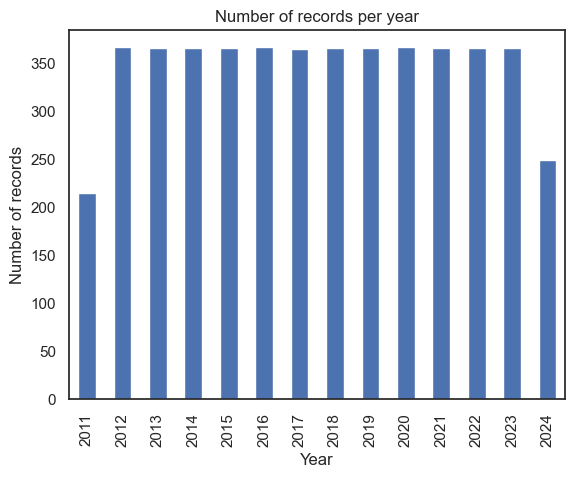

In [ ]:
# plot of records per year:
data_per_year_weather = df_weather.groupby('year').size()

data_per_year_weather.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()

In [ ]:
missing_records = {}
# For-Schleife für die Jahre 2011 bis 2024
for year in range(2011, 2024):
    # Bestimme, ob das Jahr ein Schaltjahr ist
    days_in_year = 366 if year % 4 == 0 else 365
    
    # Berechne die Anzahl der fehlenden Datensätze für das jeweilige Jahr
    num_missing_records = days_in_year - df_weather['year'][df_weather['year'] == year].count()
    
    # Speichere die fehlenden Datensätze im Dictionary
    missing_records[year] = num_missing_records

# Ausgabe der fehlenden Datensätze
print(missing_records)

{2011: 151, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 1, 2018: 0, 2019: 0, 2020: 0, 2021: 0, 2022: 0, 2023: 0}


In [ ]:
# es fehlt nur ein Datensatz in 2017. I will leave it by that.

In [ ]:
# NaNs snow: I will fill in for everry missing value a '0', because it is obvious, that it isn't documented in summer
df_weather['snow'] = df_weather['snow'].fillna(0)
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0    2011-06-01  11.5   9.7  13.3   4.2   0.0  288.0  14.0  44.6  1021.7   
1    2011-06-02  13.4  10.9  17.1   0.0   0.0   42.0  10.8  32.8  1026.9   
2    2011-06-03  18.0  12.8  23.8   0.0   0.0   77.0  15.1  43.6  1022.9   
3    2011-06-04  20.6  14.6  27.8   0.0   0.0   80.0  12.2  31.3  1013.7   
4    2011-06-05  19.8  13.9  27.1   4.7   0.0  269.0   9.7  67.7  1007.7   
...         ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799 2024-09-01  23.2  17.4  29.5   0.0   0.0   65.0   7.2  22.0  1013.9   
2800 2024-09-02  22.0  18.4  27.2   0.0   0.0  328.0   7.6  30.2  1012.8   
2801 2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802 2024-09-04   NaN   NaN   NaN   NaN   0.0    NaN   NaN   NaN     NaN   
2803 2024-09-05   NaN   NaN   NaN   NaN   0.0    NaN   NaN   NaN     NaN   

       tsun  year  month  
0       0.0  2011      6  
1       6.0  2011      6  
2     378.0  2011      6  
3     570.0  2011      6  
4     480.0  2011      6  
...     ...   ...    ...  
2799  564.0  2024      9  
2800  493.0  2024      9  
2801  658.0  2024      9  
2802    NaN  2024      9  
2803    NaN  2024      9  

[4845 rows x 13 columns]

In [ ]:
df_weather.isna().sum()

date       0
tavg       2
tmin       2
tmax       2
prcp       5
snow       0
wdir     192
wspd      57
wpgt      59
pres       4
tsun       2
year       0
month      0
dtype: int64

In [ ]:
# tmax is only in September 2024, so I leave it (because I will cut it off)
# then look into wspd
df_weather_wspd_nans = df_weather[df_weather['wspd'].isna()]
df_weather_wspd_nans

# no data of wspd in Dez, Jan, Feb and Sept
# deleting all rows after in September 2024

date  tavg  tmin  tmax  prcp   snow  wdir  wspd  wpgt    pres  \
927  2013-12-14   0.9  -4.1   7.3   2.3    0.0   NaN   NaN  46.4  1030.9   
1310 2015-01-01  -2.9  -5.8   2.4   0.0  230.0   NaN   NaN   NaN  1038.1   
1311 2015-01-02   0.9  -5.6   6.3   6.2  180.0   NaN   NaN   NaN  1033.4   
1312 2015-01-03   2.9   1.1   8.4  19.7   20.0   NaN   NaN   NaN  1026.2   
1313 2015-01-04   1.5   1.1   2.0   0.1    0.0   NaN   NaN   NaN  1031.0   
1314 2015-01-05   1.7   0.3   4.7   0.0    0.0   NaN   NaN   NaN  1033.5   
1315 2015-01-06   2.4  -1.3   7.7   0.0    0.0   NaN   NaN   NaN  1026.4   
1316 2015-01-07   1.9  -1.1   3.7   1.1    0.0   NaN   NaN   NaN  1030.4   
1317 2015-01-08   5.5  -0.1   9.4   1.0    0.0   NaN   NaN   NaN  1029.3   
1318 2015-01-09   7.9   5.0  10.5   2.4    0.0   NaN   NaN   NaN  1026.1   
1319 2015-01-10  13.6  10.5  16.3   6.2    0.0   NaN   NaN   NaN  1016.1   
1320 2015-01-11   3.8   1.0  12.1   4.7    0.0   NaN   NaN   NaN  1020.8   
1321 2015-01-12   4.4  -0.3   9.5   0.0    0.0   NaN   NaN   NaN  1025.4   
1322 2015-01-13   7.9  -0.6  14.8   0.0    0.0   NaN   NaN   NaN  1017.7   
1323 2015-01-14   5.8   1.3   9.2   2.1    0.0   NaN   NaN   NaN  1017.1   
1324 2015-01-15   4.2   0.7   8.9   0.0    0.0   NaN   NaN   NaN  1014.0   
1325 2015-01-16   3.8   0.4   9.1   2.9    0.0   NaN   NaN   NaN  1008.2   
1326 2015-01-17   1.6   0.5   4.7  10.7    0.0   NaN   NaN   NaN  1015.2   
1327 2015-01-18   1.3   0.7   2.2   0.1    0.0   NaN   NaN   NaN  1017.7   
1328 2015-01-19   1.3  -1.5   4.8   0.0    0.0   NaN   NaN   NaN  1012.8   
1329 2015-01-20   0.1  -1.8   1.8   0.0    0.0   NaN   NaN   NaN  1011.7   
1330 2015-01-21   0.2  -0.5   0.8   0.0    0.0   NaN   NaN   NaN  1011.6   
1331 2015-01-22   0.0  -0.6   1.0   0.1    0.0   NaN   NaN   NaN  1012.9   
1332 2015-01-23  -0.1  -0.6   0.3   0.5    0.0   NaN   NaN   NaN  1021.5   
1333 2015-01-24   0.0  -0.9   1.0   2.0    0.0   NaN   NaN   NaN  1022.5   
1334 2015-01-25  -0.2  -1.3   0.8   3.0   40.0   NaN   NaN   NaN  1028.4   
1335 2015-01-26   0.2  -1.4   3.9   6.0   70.0   NaN   NaN   NaN  1025.8   
1336 2015-01-27   0.6  -0.2   1.9   7.4   40.0   NaN   NaN   NaN  1021.5   
1337 2015-01-28   1.1  -1.0   3.2   5.1  100.0   NaN   NaN   NaN  1016.3   
1338 2015-01-29   2.2   0.0   4.3   0.7   50.0   NaN   NaN   NaN   994.9   
1339 2015-01-30   0.5  -1.3   2.4   4.5   40.0   NaN   NaN   NaN   980.0   
1340 2015-01-31   0.9  -1.8   4.1   0.0  100.0   NaN   NaN   NaN   986.0   
1341 2015-02-01   0.4  -1.2   2.8   1.9   70.0   NaN   NaN   NaN   993.5   
1342 2015-02-02  -0.4  -2.7   2.3   2.5   90.0   NaN   NaN   NaN  1001.7   
1343 2015-02-03  -3.0  -6.3   1.5   0.0  110.0   NaN   NaN   NaN  1005.5   
1344 2015-02-04  -5.1  -9.1   0.0   0.0  100.0   NaN   NaN   NaN  1012.2   
1345 2015-02-05  -2.8  -4.7  -1.0   0.0   90.0   NaN   NaN   NaN  1015.5   
1346 2015-02-06  -3.3  -5.5  -1.7   0.0   80.0   NaN   NaN   NaN  1020.4   
1347 2015-02-07  -4.1  -5.9  -1.1   0.2   80.0   NaN   NaN   NaN  1027.7   
1348 2015-02-08  -2.3  -5.8   1.5   1.0   80.0   NaN   NaN   NaN  1026.2   
1349 2015-02-09  -1.1  -3.5   0.8   0.1   90.0   NaN   NaN   NaN  1030.3   
1350 2015-02-10   1.8  -1.7   5.5   0.0   80.0   NaN   NaN   NaN  1030.7   
1351 2015-02-11  -0.6  -2.3   0.7   0.0   50.0   NaN   NaN   NaN  1028.3   
1352 2015-02-12  -0.6  -2.2   2.9   0.0   40.0   NaN   NaN   NaN  1025.6   
1353 2015-02-13  -1.4  -3.6   3.6   0.0   30.0   NaN   NaN   NaN  1021.8   
1354 2015-02-14  -2.1  -4.5   1.0   0.0   20.0   NaN   NaN   NaN  1014.8   
1355 2015-02-15  -1.1  -3.5   1.0   0.0    0.0   NaN   NaN   NaN  1014.2   
1356 2015-02-16   0.0  -2.1   2.8   0.0    0.0   NaN   NaN   NaN  1020.8   
1357 2015-02-17  -2.1  -3.5  -0.9   0.0    0.0   NaN   NaN   NaN  1032.4   
1358 2015-02-18  -1.3  -2.8  -0.5   0.0    0.0   NaN   NaN   NaN  1040.8   
1359 2015-02-19  -0.7  -3.2   4.1   0.0    0.0   NaN   NaN   NaN  1033.0   
1360 2015-02-20   4.1  -3.6  13.8   0.0    0.0   NaN   NaN 

In [ ]:
# looking over the means grouped by month to possibly fill in the NaNs of wspd the monthly mean
df_weather.groupby('month')['wspd'].mean()


month
1     11.504852
2     11.704310
3     11.221092
4     10.548974
5     10.032754
6      9.601429
7      9.421429
8      8.710369
9      8.426410
10     8.732506
11     9.210000
12    10.619900
Name: wspd, dtype: float64

In [ ]:
# getting the mean of wspd in the month January:
mean_wspd_jan = df_weather['wspd'][df_weather['month'] == 1].mean()
round(mean_wspd_jan,2)


11.5

In [ ]:
# getting the right part of the dataframe for the july NaNs:
df_weather_wspd_nans_jan = df_weather[(df_weather['wspd'].isna()) & (df_weather['month']==1)]
df_weather_wspd_nans_jan

date  tavg  tmin  tmax  prcp   snow  wdir  wspd  wpgt    pres  \
1310 2015-01-01  -2.9  -5.8   2.4   0.0  230.0   NaN   NaN   NaN  1038.1   
1311 2015-01-02   0.9  -5.6   6.3   6.2  180.0   NaN   NaN   NaN  1033.4   
1312 2015-01-03   2.9   1.1   8.4  19.7   20.0   NaN   NaN   NaN  1026.2   
1313 2015-01-04   1.5   1.1   2.0   0.1    0.0   NaN   NaN   NaN  1031.0   
1314 2015-01-05   1.7   0.3   4.7   0.0    0.0   NaN   NaN   NaN  1033.5   
1315 2015-01-06   2.4  -1.3   7.7   0.0    0.0   NaN   NaN   NaN  1026.4   
1316 2015-01-07   1.9  -1.1   3.7   1.1    0.0   NaN   NaN   NaN  1030.4   
1317 2015-01-08   5.5  -0.1   9.4   1.0    0.0   NaN   NaN   NaN  1029.3   
1318 2015-01-09   7.9   5.0  10.5   2.4    0.0   NaN   NaN   NaN  1026.1   
1319 2015-01-10  13.6  10.5  16.3   6.2    0.0   NaN   NaN   NaN  1016.1   
1320 2015-01-11   3.8   1.0  12.1   4.7    0.0   NaN   NaN   NaN  1020.8   
1321 2015-01-12   4.4  -0.3   9.5   0.0    0.0   NaN   NaN   NaN  1025.4   
1322 2015-01-13   7.9  -0.6  14.8   0.0    0.0   NaN   NaN   NaN  1017.7   
1323 2015-01-14   5.8   1.3   9.2   2.1    0.0   NaN   NaN   NaN  1017.1   
1324 2015-01-15   4.2   0.7   8.9   0.0    0.0   NaN   NaN   NaN  1014.0   
1325 2015-01-16   3.8   0.4   9.1   2.9    0.0   NaN   NaN   NaN  1008.2   
1326 2015-01-17   1.6   0.5   4.7  10.7    0.0   NaN   NaN   NaN  1015.2   
1327 2015-01-18   1.3   0.7   2.2   0.1    0.0   NaN   NaN   NaN  1017.7   
1328 2015-01-19   1.3  -1.5   4.8   0.0    0.0   NaN   NaN   NaN  1012.8   
1329 2015-01-20   0.1  -1.8   1.8   0.0    0.0   NaN   NaN   NaN  1011.7   
1330 2015-01-21   0.2  -0.5   0.8   0.0    0.0   NaN   NaN   NaN  1011.6   
1331 2015-01-22   0.0  -0.6   1.0   0.1    0.0   NaN   NaN   NaN  1012.9   
1332 2015-01-23  -0.1  -0.6   0.3   0.5    0.0   NaN   NaN   NaN  1021.5   
1333 2015-01-24   0.0  -0.9   1.0   2.0    0.0   NaN   NaN   NaN  1022.5   
1334 2015-01-25  -0.2  -1.3   0.8   3.0   40.0   NaN   NaN   NaN  1028.4   
1335 2015-01-26   0.2  -1.4   3.9   6.0   70.0   NaN   NaN   NaN  1025.8   
1336 2015-01-27   0.6  -0.2   1.9   7.4   40.0   NaN   NaN   NaN  1021.5   
1337 2015-01-28   1.1  -1.0   3.2   5.1  100.0   NaN   NaN   NaN  1016.3   
1338 2015-01-29   2.2   0.0   4.3   0.7   50.0   NaN   NaN   NaN   994.9   
1339 2015-01-30   0.5  -1.3   2.4   4.5   40.0   NaN   NaN   NaN   980.0   
1340 2015-01-31   0.9  -1.8   4.1   0.0  100.0   NaN   NaN   NaN   986.0   

       tsun  year  month  
1310  354.0  2015      1  
1311  162.0  2015      1  
1312    0.0  2015      1  
1313    0.0  2015      1  
1314  156.0  2015      1  
1315  342.0  2015      1  
1316    0.0  2015      1  
1317    0.0  2015      1  
1318    0.0  2015      1  
1319  342.0  2015      1  
1320   24.0  2015      1  
1321   18.0  2015      1  
1322  498.0  2015      1  
1323    6.0  2015      1  
1324  168.0  2015      1  
1325  120.0  2015      1  
1326    0.0  2015      1  
1327    0.0  2015      1  
1328  432.0  2015      1  
1329    0.0  2015      1  
1330    0.0  2015      1  
1331    0.0  2015      1  
1332    0.0  2015      1  
1333    0.0  2015      1  
1334    0.0  2015      1  
1335  174.0  2015      1  
1336   36.0  2015      1  
1337  258.0  2015      1  
1338  234.0  2015      1  
1339    0.0  2015      1  
1340  330.0  2015      1

In [ ]:
# fill in the July-NaNs with the mean:
df_weather.loc[(df_weather['wspd'].isna()) & (df_weather['month'] == 1), 'wspd'] = round(mean_wspd_jan,2)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4819 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
def fillna_mean_month(col, month):

    # getting the mean of wspd in the month January:
    mean_variable_month = df_weather[col][df_weather['month'] == month].mean()
    mean_varibale_month = round(mean_variable_month,2)

    df_weather.loc[(df_weather[col].isna()) & (df_weather['month'] == month), col] = round(mean_variable_month,2)
    df_weather.info()

In [ ]:
fillna_mean_month('wspd',9)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4824 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
fillna_mean_month('wspd',2)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4844 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
fillna_mean_month('wspd',12)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# looking over the means grouped by month to possibly fill in the NaNs of wspd the monthly mean
df_weather.groupby('month')['wpgt'].mean()

month
1     37.428571
2     38.334483
3     37.491067
4     36.617436
5     36.278055
6     36.292143
7     36.726959
8     34.092379
9     29.828462
10    30.134491
11    30.587179
12    35.424566
Name: wpgt, dtype: float64

In [ ]:
# looking into wpgt
df_weather_wpgt_nans = df_weather[df_weather['wpgt'].isna()]
df_weather_wpgt_nans

# no data of wpgt in may, jan, feb, sept, august
# deleting all rows after in September 2024

date  tavg  tmin  tmax  prcp   snow   wdir   wspd  wpgt    pres  \
1084 2014-05-20  18.0   9.4  25.7   0.0    0.0  131.0   7.90   NaN  1012.3   
1310 2015-01-01  -2.9  -5.8   2.4   0.0  230.0    NaN  11.50   NaN  1038.1   
1311 2015-01-02   0.9  -5.6   6.3   6.2  180.0    NaN  11.50   NaN  1033.4   
1312 2015-01-03   2.9   1.1   8.4  19.7   20.0    NaN  11.50   NaN  1026.2   
1313 2015-01-04   1.5   1.1   2.0   0.1    0.0    NaN  11.50   NaN  1031.0   
1314 2015-01-05   1.7   0.3   4.7   0.0    0.0    NaN  11.50   NaN  1033.5   
1315 2015-01-06   2.4  -1.3   7.7   0.0    0.0    NaN  11.50   NaN  1026.4   
1316 2015-01-07   1.9  -1.1   3.7   1.1    0.0    NaN  11.50   NaN  1030.4   
1317 2015-01-08   5.5  -0.1   9.4   1.0    0.0    NaN  11.50   NaN  1029.3   
1318 2015-01-09   7.9   5.0  10.5   2.4    0.0    NaN  11.50   NaN  1026.1   
1319 2015-01-10  13.6  10.5  16.3   6.2    0.0    NaN  11.50   NaN  1016.1   
1320 2015-01-11   3.8   1.0  12.1   4.7    0.0    NaN  11.50   NaN  1020.8   
1321 2015-01-12   4.4  -0.3   9.5   0.0    0.0    NaN  11.50   NaN  1025.4   
1322 2015-01-13   7.9  -0.6  14.8   0.0    0.0    NaN  11.50   NaN  1017.7   
1323 2015-01-14   5.8   1.3   9.2   2.1    0.0    NaN  11.50   NaN  1017.1   
1324 2015-01-15   4.2   0.7   8.9   0.0    0.0    NaN  11.50   NaN  1014.0   
1325 2015-01-16   3.8   0.4   9.1   2.9    0.0    NaN  11.50   NaN  1008.2   
1326 2015-01-17   1.6   0.5   4.7  10.7    0.0    NaN  11.50   NaN  1015.2   
1327 2015-01-18   1.3   0.7   2.2   0.1    0.0    NaN  11.50   NaN  1017.7   
1328 2015-01-19   1.3  -1.5   4.8   0.0    0.0    NaN  11.50   NaN  1012.8   
1329 2015-01-20   0.1  -1.8   1.8   0.0    0.0    NaN  11.50   NaN  1011.7   
1330 2015-01-21   0.2  -0.5   0.8   0.0    0.0    NaN  11.50   NaN  1011.6   
1331 2015-01-22   0.0  -0.6   1.0   0.1    0.0    NaN  11.50   NaN  1012.9   
1332 2015-01-23  -0.1  -0.6   0.3   0.5    0.0    NaN  11.50   NaN  1021.5   
1333 2015-01-24   0.0  -0.9   1.0   2.0    0.0    NaN  11.50   NaN  1022.5   
1334 2015-01-25  -0.2  -1.3   0.8   3.0   40.0    NaN  11.50   NaN  1028.4   
1335 2015-01-26   0.2  -1.4   3.9   6.0   70.0    NaN  11.50   NaN  1025.8   
1336 2015-01-27   0.6  -0.2   1.9   7.4   40.0    NaN  11.50   NaN  1021.5   
1337 2015-01-28   1.1  -1.0   3.2   5.1  100.0    NaN  11.50   NaN  1016.3   
1338 2015-01-29   2.2   0.0   4.3   0.7   50.0    NaN  11.50   NaN   994.9   
1339 2015-01-30   0.5  -1.3   2.4   4.5   40.0    NaN  11.50   NaN   980.0   
1340 2015-01-31   0.9  -1.8   4.1   0.0  100.0    NaN  11.50   NaN   986.0   
1341 2015-02-01   0.4  -1.2   2.8   1.9   70.0    NaN  11.70   NaN   993.5   
1342 2015-02-02  -0.4  -2.7   2.3   2.5   90.0    NaN  11.70   NaN  1001.7   
1343 2015-02-03  -3.0  -6.3   1.5   0.0  110.0    NaN  11.70   NaN  1005.5   
1344 2015-02-04  -5.1  -9.1   0.0   0.0  100.0    NaN  11.70   NaN  1012.2   
1345 2015-02-05  -2.8  -4.7  -1.0   0.0   90.0    NaN  11.70   NaN  1015.5   
1346 2015-02-06  -3.3  -5.5  -1.7   0.0   80.0    NaN  11.70   NaN  1020.4   
1347 2015-02-07  -4.1  -5.9  -1.1   0.2   80.0    NaN  11.70   NaN  1027.7   
1348 2015-02-08  -2.3  -5.8   1.5   1.0   80.0    NaN  11.70   NaN  1026.2   
1349 2015-02-09  -1.1  -3.5   0.8   0.1   90.0    NaN  11.70   NaN  1030.3   
1350 2015-02-10   1.8  -1.7   5.5   0.0   80.0    NaN  11.70   NaN  1030.7   
1351 2015-02-11  -0.6  -2.3   0.7   0.0   50.0    NaN  11.70   NaN  1028.3   
1352 2015-02-12  -0.6  -2.2   2.9   0.0   40.0    NaN  11.70   NaN  1025.6   
1353 2015-02-13  -1.4  -3.6   3.6   0.0   30.0    NaN  11.70   NaN  1021.8   
1354 2015-02-14  -2.1  -4.5   1.0   0.0   20.0    NaN  11.70   NaN  1014.8   
1355 2015-02-15  -1.1  -3.5   1.0   0.0    0.0    NaN  11.70   NaN  1014.2   
1356 2015-02-16   0.0  -2.1   2.8   0.0    0.0    NaN  11.70   NaN  1020.8   
1357 2015-02-17  -2.1  -3.5  -0.9   0.0    0.0    NaN  11.70   NaN  1032.4   
1358 2015-02-18  -1.3  -2.8  -0.5   0.0    0.0    NaN  11.70   NaN  1040.8   
1359 2015-02-19  -0.7  -3.2   4.1

In [ ]:
# filling the missing data in january with the all over mean of january
fillna_mean_month('wpgt',1)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4817 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# filling the missing data in february with the all over mean of january
fillna_mean_month('wpgt',2)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4837 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# filling the missing data in may with the all over mean of may
fillna_mean_month('wpgt',5)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4839 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# filling the missing data in sept with the all over mean of september
fillna_mean_month('wpgt',9)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4844 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# filling the missing data in august with the all over mean of august
fillna_mean_month('wpgt',8)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4845 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# then look into prcp
df_weather_prcp_nans = df_weather[df_weather['prcp'].isna()]
df_weather_prcp_nans

# no data of prcp in april (September I will delete)
# deleting all rows after in September 2024

date  tavg  tmin  tmax  prcp  snow   wdir   wspd   wpgt    pres  \
455  2018-04-02   9.5   1.9  16.5   NaN   0.0  178.0   9.00  25.20  1011.2   
456  2018-04-03  15.9  10.0  22.6   NaN   0.0  178.0   9.70  45.40  1005.8   
457  2018-04-04  15.4   8.8  23.3   NaN   0.0  199.0  12.60  65.20  1005.2   
2802 2024-09-04   NaN   NaN   NaN   NaN   0.0    NaN   8.43  29.83     NaN   
2803 2024-09-05   NaN   NaN   NaN   NaN   0.0    NaN   8.43  29.83     NaN   

       tsun  year  month  
455   600.0  2018      4  
456   480.0  2018      4  
457   576.0  2018      4  
2802    NaN  2024      9  
2803    NaN  2024      9

In [ ]:
# filling the missing data in april with the all over mean of april
fillna_mean_month('prcp',4)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4843 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4845 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
df_weather.shape

(4845, 13)

In [ ]:
df_river.shape

(15288, 16)

In [ ]:
# copy of weather data:
df_weather_raw = df_weather.copy()

## Step 3: deeper look into the data
### a. river:
- standard numbers
- eventually some visualizations to get a clearer view
- profile in pandas

In [ ]:
# looking into the datatypes
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  float64       
 2   max_water_temperature           15288 non-null  float64       
 3   min_water_temperature           15288 non-null  float64       
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15288 non-null  float64       
 8   suspended_solid_load            15258 non-null  float64       
 9   suspended_sediment_erosion      15258 non-null  float64       
 10  suspended_sediment_transport    15258 non-null  float64       
 11  av

In [ ]:
df_river

date  avg_water_temperature  max_water_temperature  \
0     1980-11-01                    8.1                    8.1   
1     1980-11-02                    7.3                    7.3   
2     1980-11-03                    5.8                    5.8   
3     1980-11-04                    5.6                    5.6   
4     1980-11-05                    4.8                    4.8   
...          ...                    ...                    ...   
15283 2024-08-27                   16.6                   17.6   
15284 2024-08-28                   17.8                   19.0   
15285 2024-08-29                   18.7                   19.6   
15286 2024-08-30                   19.1                   19.8   
15287 2024-08-31                   19.1                   19.7   

       min_water_temperature  avg_water_level  max_water_level  \
0                        8.1               71               86   
1                        7.3               59               62   
2                        5.8               68               83   
3                        5.6               77               80   
4                        4.8               77               89   
...                      ...              ...              ...   
15283                   15.8              130              137   
15284                   16.6              117              121   
15285                   17.7              114              116   
15286                   18.1              114              116   
15287                   18.2              109              115   

       min_water_level  suspended_solids_concentration  suspended_solid_load  \
0                   59                            5.57                 25.56   
1                   54                            5.10                 21.54   
2                   48                            5.14                 20.16   
3                   73                            7.60                 31.26   
4                   70                            9.03                 37.83   
...                ...                             ...                   ...   
15283              121                           34.95                   NaN   
15284              113                           34.95                   NaN   
15285              110                           34.95                   NaN   
15286              108                           34.95                   NaN   
15287              104                           34.95                   NaN   

       suspended_sediment_erosion  suspended_sediment_transport  \
0                            0.01                          0.30   
1                            0.01                          0.25   
2                            0.01                          0.23   
3                            0.01                          0.36   
4                            0.01                          0.44   
...                           ...                           ...   
15283                         NaN                           NaN   
15284                         NaN                           NaN   
15285                         NaN                           NaN   
15286                         NaN                           NaN   
15287                         NaN                           NaN   

       avg_flow_rate  max_flow_rate  min_flow_rate  year  month  
0               47.9           63.4           37.0  1980     11  
1               36.7           39.6           32.7  1980     11  
2               45.8           60.0           27.9  1980     11  
3               53.4           56.9           49.9  1980     11  
4               54.1           66.5           47.0  1980     11  
...              ...            ...            ...   ...    ...  
15283           66.0           76.7           53.0  2024      8  
15284           47.5           53.0           42.2  2024      8  
15285           43.2           46.1           38.5  2024      8  


In [ ]:
df_river.describe().T

count                           mean  \
date                              15288  2001-12-09 16:02:21.287284224   
avg_water_temperature           15288.0                       9.912055   
max_water_temperature           15288.0                      10.198947   
min_water_temperature           15288.0                       9.631279   
avg_water_level                 15288.0                      84.137232   
max_water_level                 15288.0                      93.129579   
min_water_level                 15288.0                      75.599359   
suspended_solids_concentration  15288.0                      21.659735   
suspended_solid_load            15258.0                     231.565058   
suspended_sediment_erosion      15258.0                       0.082023   
suspended_sediment_transport    15258.0                       2.680682   
avg_flow_rate                   15288.0                      62.588125   
max_flow_rate                   15288.0                      73.736787   
min_flow_rate                   15288.0                      52.483891   
year                            15288.0                     2001.43943   
month                           15288.0                       6.536761   

                                                min                  25%  \
date                            1980-11-01 00:00:00  1991-04-19 18:00:00   
avg_water_temperature                           0.2                  5.5   
max_water_temperature                           0.5                  5.7   
min_water_temperature                          -0.1                  5.3   
avg_water_level                                19.0                 59.0   
max_water_level                                25.0                 68.0   
min_water_level                                11.0                 52.0   
suspended_solids_concentration                 1.05                 6.66   
suspended_solid_load                           1.49              21.4525   
suspended_sediment_erosion                      0.0                 0.01   
suspended_sediment_transport                   0.02                 0.25   
avg_flow_rate                                  9.06                 32.1   
max_flow_rate                                  11.8               39.575   
min_flow_rate                                  6.02                 25.8   
year                                         1980.0               1991.0   
month                                           1.0                  4.0   

                                                50%                  75%  \
date                            2001-10-05 12:00:00  2012-03-27 06:00:00   
avg_water_temperature                           9.6                 14.1   
max_water_temperature                           9.9                 14.3   
min_water_temperature                           9.3                 13.8   
avg_water_level                                78.0                 99.0   
max_water_level                                86.0                108.0   
min_water_level                                70.0                 91.0   
suspended_solids_concentration                10.82                17.75   
suspended_solid_load                          43.35               98.615   
suspended_sediment_erosion                     0.02                 0.04   
suspended_sediment_transport                    0.5                 1.14   
avg_flow_rate                                  49.9                 76.0   
max_flow_rate                                  58.7                 87.6   
min_flow_rate                                  40.8                 65.0   
year                                         2001.0               2012.0   
month                                           7.0                 10.0   

                                                max          std  
date                            2024-08-31 00:00:00          NaN  
avg_water_temperature                          21.8    

In [ ]:
# creating a report, automatically in an html-file:
# profile_report_river = df_river.profile_report()
# profile_report_river.to_file(output_file='output_river_level.html')

In [ ]:
#profile_report_river

## Step 3: deeper look into the data
### b. weather:
- standard numbers
- eventually some visualizations to get a clearer view
- profile in pandas

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4843 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4845 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
df_weather.describe().T

count                           mean                  min  \
date     4845  2018-01-17 13:53:23.219814144  2011-06-01 00:00:00   
tavg   4843.0                      10.959529                -12.6   
tmin   4843.0                       6.705245                -16.6   
tmax   4843.0                      15.640058                 -9.7   
prcp   4843.0                       2.631505                  0.0   
snow   4845.0                       4.945304                  0.0   
wdir   4653.0                     197.098431                  0.0   
wspd   4845.0                       9.955102                  0.7   
wpgt   4845.0                      34.937653                  9.4   
pres   4841.0                    1016.882813                980.0   
tsun   4843.0                     321.928763                  0.0   
year   4845.0                     2017.54613               2011.0   
month  4845.0                       6.535191                  1.0   

                       25%                  50%                  75%  \
date   2014-09-24 00:00:00  2018-01-18 00:00:00  2021-05-13 00:00:00   
tavg                   4.9                 10.9                 17.1   
tmin                   1.4                  6.7                 12.2   
tmax                   8.6                 15.6                 22.9   
prcp                   0.0                  0.0                  2.5   
snow                   0.0                  0.0                  0.0   
wdir                 100.0                233.0                265.0   
wspd                   7.2                  9.0                 11.5   
wpgt                  24.1                 31.7                 42.1   
pres                1012.1               1016.8               1021.7   
tsun                  42.0                276.0                558.0   
year                2014.0               2018.0               2021.0   
month                  4.0                  7.0                  9.0   

                       max        std  
date   2024-09-05 00:00:00        NaN  
tavg                  29.5   7.643796  
tmin                  21.5   6.633847  
tmax                  36.9   9.034461  
prcp                  91.5   5.945939  
snow                 420.0  24.262493  
wdir                 359.0  92.313677  
wspd                  36.7   4.202105  
wpgt                 119.9  14.691284  
pres                1044.9   8.139639  
tsun                 943.0  278.82553  
year                2024.0   3.849591  
month                 12.0     3.4174

In [ ]:
# creating a report, automatically in an html-file:
#profile_report_weather = df_weather.profile_report()
#profile_report_weather.to_file(output_file='output_weather.html')

In [ ]:
#profile_report_weather

 ## Step 4: Data cleaning

## 4.1 Nans


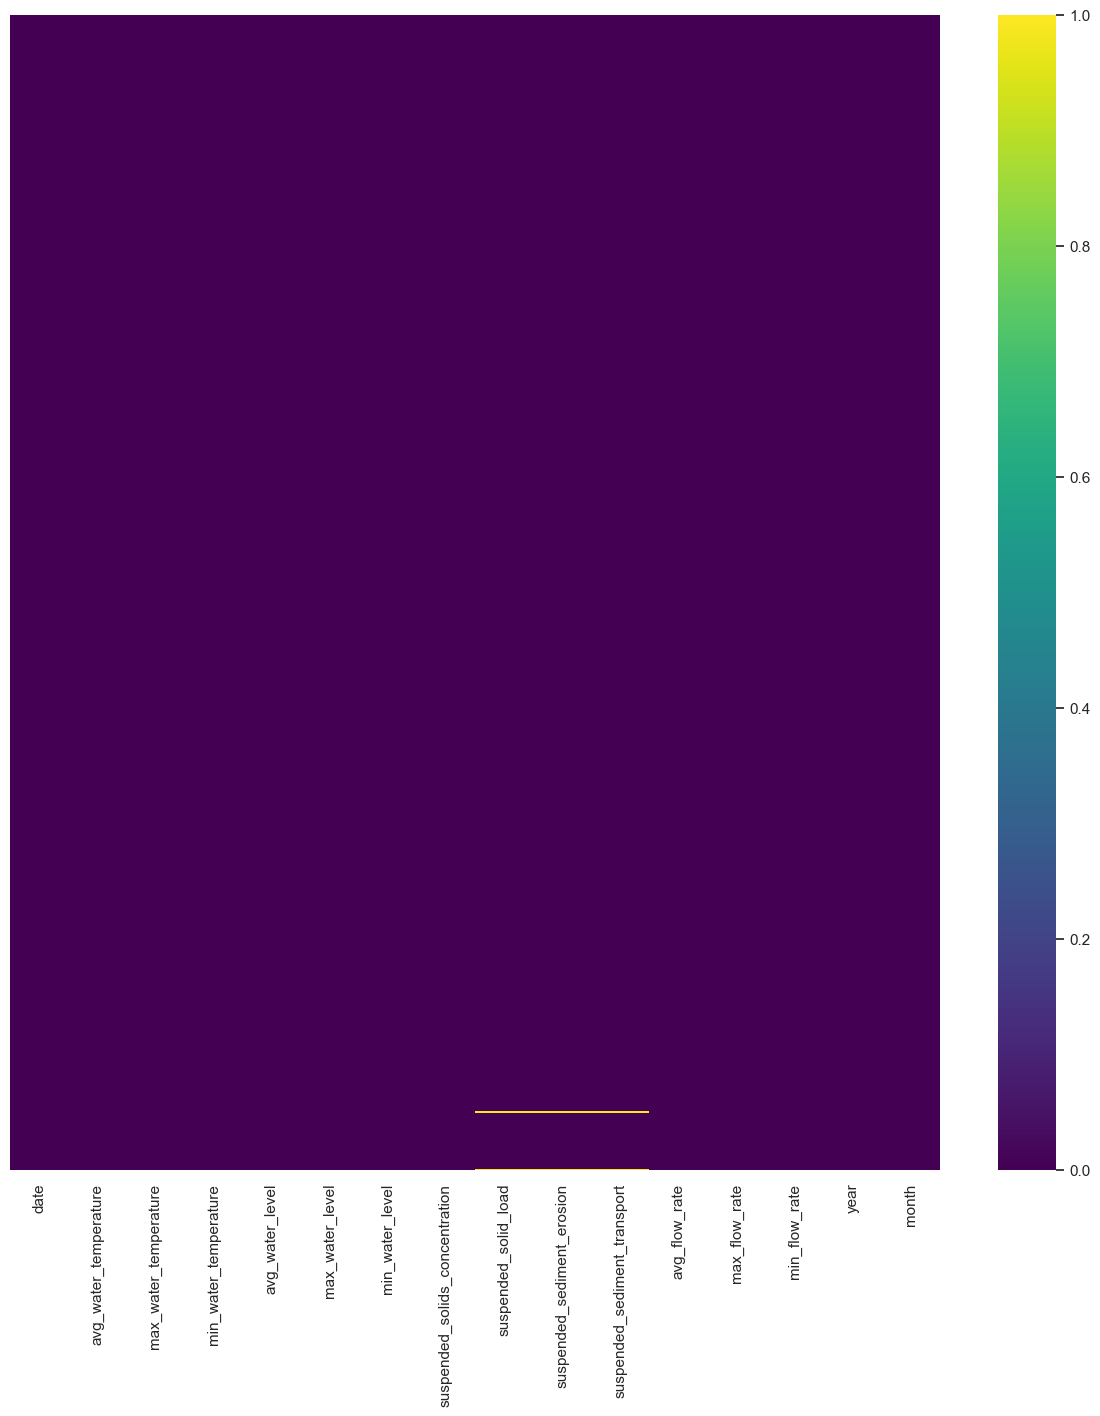

In [ ]:
# Heatmap of the nans river
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(df_river.isnull(), yticklabels=False, cbar=True, cmap='viridis')

plt.show()

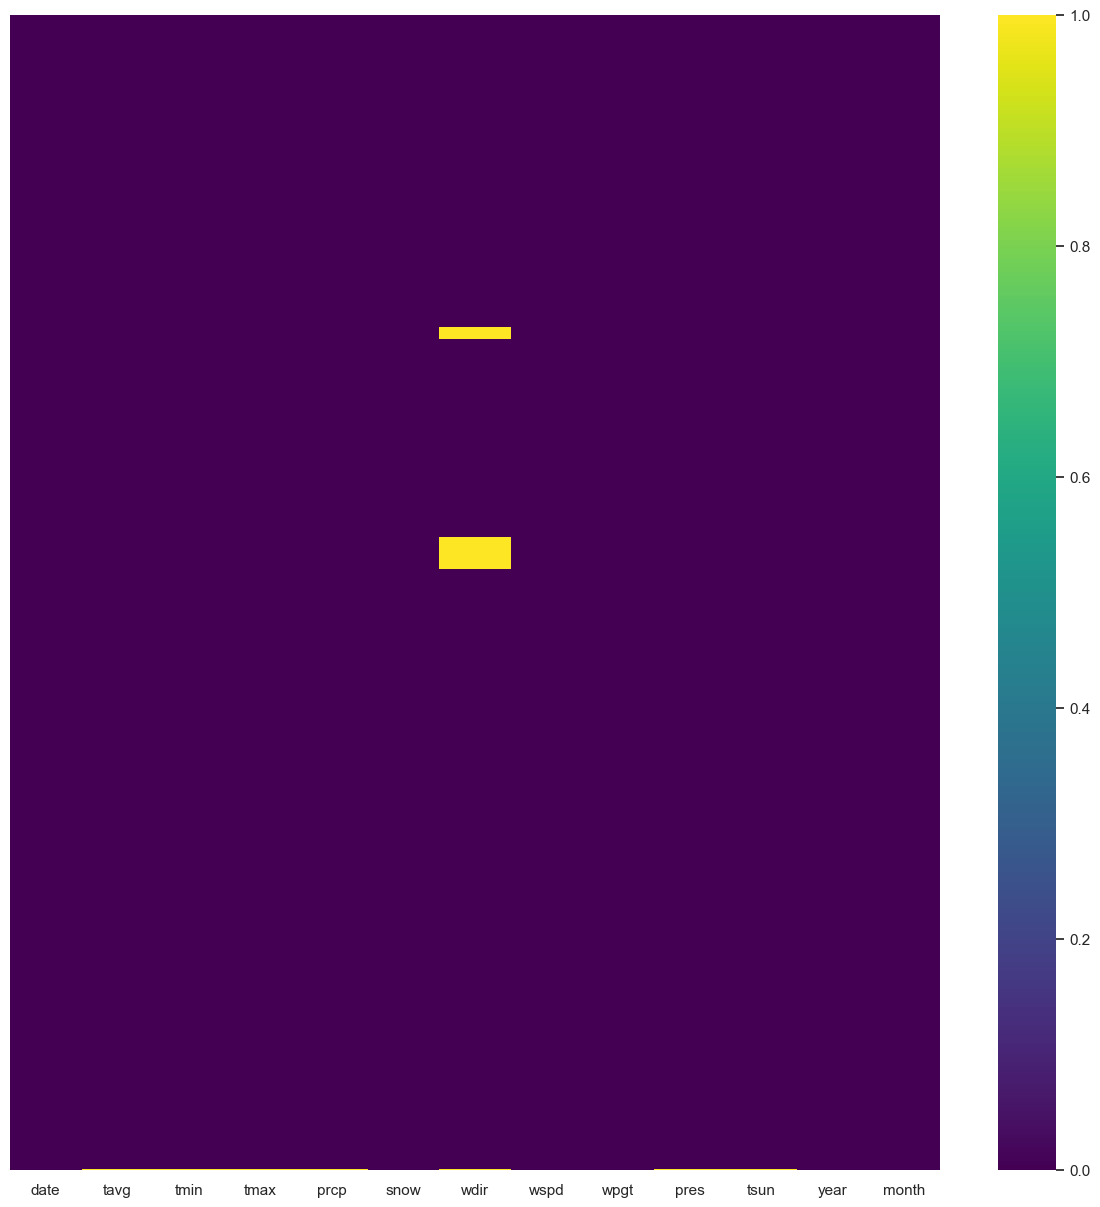

In [ ]:
# Heatmap of the nans river
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(df_weather.isnull(), yticklabels=False, cbar=True, cmap='viridis')

plt.show()

In [ ]:
df_weather.isna().sum()

date       0
tavg       2
tmin       2
tmax       2
prcp       2
snow       0
wdir     192
wspd       0
wpgt       0
pres       4
tsun       2
year       0
month      0
dtype: int64

## 4.2 dropping duplicates

In [ ]:
# check the number of rows before dropping duplicates RIVER
df_river.shape

(15288, 16)

In [ ]:
# drop duplicates RIVER
df_river_duplicates= df_river.drop_duplicates()
df_river_duplicates.shape

(15288, 16)

In [ ]:
# check the number of rows before dropping duplicates WEATHER
df_weather.shape

(4845, 13)

In [ ]:
df_weather_duplicates = df_weather.drop_duplicates()
df_weather_duplicates.shape

(4845, 13)

In [ ]:
### NO DUPLICATES AT ALL

## 4.3 managing outliers

In [ ]:
df_river.head(10)

date  avg_water_temperature  max_water_temperature  \
0 1980-11-01                    8.1                    8.1   
1 1980-11-02                    7.3                    7.3   
2 1980-11-03                    5.8                    5.8   
3 1980-11-04                    5.6                    5.6   
4 1980-11-05                    4.8                    4.8   
5 1980-11-06                    4.7                    4.7   
6 1980-11-07                    6.1                    6.1   
7 1980-11-08                    7.7                    7.7   
8 1980-11-09                    7.5                    7.5   
9 1980-11-10                    7.6                    7.6   

   min_water_temperature  avg_water_level  max_water_level  min_water_level  \
0                    8.1               71               86               59   
1                    7.3               59               62               54   
2                    5.8               68               83               48   
3                    5.6               77               80               73   
4                    4.8               77               89               70   
5                    4.7               75               82               64   
6                    6.1               62               72               44   
7                    7.7               56               65               43   
8                    7.5               55               64               43   
9                    7.6               48               60               40   

   suspended_solids_concentration  suspended_solid_load  \
0                            5.57                 25.56   
1                            5.10                 21.54   
2                            5.14                 20.16   
3                            7.60                 31.26   
4                            9.03                 37.83   
5                            5.59                 22.19   
6                            4.58                 16.04   
7                           11.34                 40.00   
8                           13.53                 42.45   
9                           15.29                 42.92   

   suspended_sediment_erosion  suspended_sediment_transport  avg_flow_rate  \
0                        0.01                          0.30           47.9   
1                        0.01                          0.25           36.7   
2                        0.01                          0.23           45.8   
3                        0.01                          0.36           53.4   
4                        0.01                          0.44           54.1   
5                        0.01                          0.26           51.4   
6                        0.01                          0.19           39.4   
7                        0.01                          0.46           34.5   
8                        0.02                          0.49           33.3   
9                        0.02                          0.50           27.8   

   max_flow_rate  min_flow_rate  year  month  
0           63.4           37.0  1980     11  
1           39.6           32.7  1980     11  
2           60.0           27.9  1980     11  
3           56.9           49.9  1980     11  
4           66.5           47.0  1980     11  
5           58.8           41.3  1980     11  
6           48.8           24.8  1980     11  
7           42.2           24.0  1980     11  
8           41.2           24.0  1980     11  
9           37.6           21.8  1980     11

In [ ]:
df_weather.head(10)

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun  \
0 2011-06-01  11.5   9.7  13.3   4.2   0.0  288.0  14.0  44.6  1021.7    0.0   
1 2011-06-02  13.4  10.9  17.1   0.0   0.0   42.0  10.8  32.8  1026.9    6.0   
2 2011-06-03  18.0  12.8  23.8   0.0   0.0   77.0  15.1  43.6  1022.9  378.0   
3 2011-06-04  20.6  14.6  27.8   0.0   0.0   80.0  12.2  31.3  1013.7  570.0   
4 2011-06-05  19.8  13.9  27.1   4.7   0.0  269.0   9.7  67.7  1007.7  480.0   
5 2011-06-06  16.9  12.7  24.6  13.1   0.0  244.0   8.6  55.1  1005.6  264.0   
6 2011-06-07  19.4  12.1  25.2   0.0   0.0  121.0   9.0  34.9  1004.3  624.0   
7 2011-06-08  15.5  12.5  19.3   1.9   0.0  261.0  12.6  51.5  1006.3   18.0   
8 2011-06-09  13.7  12.3  15.4   0.4   0.0  310.0   7.6  19.8  1014.9    0.0   
9 2011-06-10  14.4  10.9  18.6   0.0   0.0  329.0   6.8  21.2  1015.5  150.0   

   year  month  
0  2011      6  
1  2011      6  
2  2011      6  
3  2011      6  
4  2011      6  
5  2011      6  
6  2011      6  
7  2011      6  
8  2011      6  
9  2011      6

In [ ]:
# don't have to differate in categorical and numerical, because there are only numerical variables
# RIVER:
#for col in df_river:
#  OutLiersBox(df_river, col)

In [ ]:
# looking deeper into the outliers water_level, suspendeds_solids-concentration, flow_rate
Q1 = df_river['avg_water_level'].quantile(.25)
Q3 = df_river['avg_water_level'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("water_level (avg): ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_avg_water_level = df_river[(df_river['avg_water_level']) > upper_limit]
num_outliers_avg_water_level.shape[0] #['Perceptions of corruption'].counts()

# Conclusion: 563 rows -> a lot! in 43 years

water_level (avg):  40.0 lower limit=  -1.0 upper_limit=  159.0


563

In [ ]:
df_river['year'][df_river['avg_water_level']>159.0].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023, 2024],
      dtype=int32)

In [ ]:
# looking deeper into the outliers suspendeds_solids-concentration, flow_rate
Q1 = df_river['suspended_solids_concentration'].quantile(.25)
Q3 = df_river['suspended_solids_concentration'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("'suspended_solids_concentration': ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_sus_solids_concentration = df_river[(df_river['suspended_solids_concentration']) > upper_limit]
num_outliers_sus_solids_concentration.shape[0] #['Perceptions of corruption'].counts()

# Conclusion: 1390 rows -> a lot, in 43 years

'suspended_solids_concentration':  11.09 lower limit=  -9.974999999999998 upper_limit=  34.385


1390

In [ ]:
df_river['year'][df_river['suspended_solids_concentration']>34.385].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023, 2024],
      dtype=int32)

In [ ]:
df_river['date'][df_river['suspended_solids_concentration']>34.385] == df_river['date'][df_river['avg_water_level']>159.0]

ValueError: Can only compare identically-labeled Series objects

In [ ]:
# looking deeper into the outliers of flow_rate
Q1 = df_river['avg_flow_rate'].quantile(.25)
Q3 = df_river['avg_flow_rate'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("'avg_flow_rate': ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_avg_flow_rate = df_river[(df_river['avg_flow_rate']) > upper_limit]
num_outliers_avg_flow_rate.shape[0] #['Perceptions of corruption'].counts()

# Conclusion: 854 rows -> a lot! in 43 years

'avg_flow_rate':  43.9 lower limit=  -33.74999999999999 upper_limit=  141.85


854

In [ ]:
df_river['year'][df_river['avg_flow_rate']>141.85].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023, 2024],
      dtype=int32)

In [ ]:
df_river['year'][df_river['avg_flow_rate']>141.85].unique() == df_river['year'][df_river['suspended_solids_concentration']>34.385].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
# WEATHER:
#for col in df_weather:
   # OutLiersBox(df_weather, col)

# Creating the final dataframe

columns for swimming: 
- `max water temperature`
- `avg water level`
- `suspended solids concentration`
- `max flow rate`
- `max temperature`
- `total precipitation`
- `avg windspeed`
- `peak gust`

additional columns for ice-bath:
- `snow_depth`


## 1. river
- max water temperature: > 18 °C*
- avg water level: < 120 cm
- suspended solids concentration < 25 m3/s
- max flow rate: < 75 m3/s*


In [ ]:
df_river_final = df_river[['date', 'max_water_temperature', 'avg_water_level', 'suspended_solids_concentration', 'max_flow_rate']]
df_river_final

date  max_water_temperature  avg_water_level  \
0     1980-11-01                    8.1               71   
1     1980-11-02                    7.3               59   
2     1980-11-03                    5.8               68   
3     1980-11-04                    5.6               77   
4     1980-11-05                    4.8               77   
...          ...                    ...              ...   
15283 2024-08-27                   17.6              130   
15284 2024-08-28                   19.0              117   
15285 2024-08-29                   19.6              114   
15286 2024-08-30                   19.8              114   
15287 2024-08-31                   19.7              109   

       suspended_solids_concentration  max_flow_rate  
0                                5.57           63.4  
1                                5.10           39.6  
2                                5.14           60.0  
3                                7.60           56.9  
4                                9.03           66.5  
...                               ...            ...  
15283                           34.95           76.7  
15284                           34.95           53.0  
15285                           34.95           46.1  
15286                           34.95           46.1  
15287                           34.95           44.8  

[15288 rows x 5 columns]

In [ ]:
df_river_final.tail(20)

date  max_water_temperature  avg_water_level  \
15268 2024-08-12                   21.3              108   
15269 2024-08-13                   21.4              113   
15270 2024-08-14                   21.0              118   
15271 2024-08-15                   20.8              134   
15272 2024-08-16                   20.6              117   
15273 2024-08-17                   20.3              115   
15274 2024-08-18                   20.2              117   
15275 2024-08-19                   18.6              167   
15276 2024-08-20                   17.3              165   
15277 2024-08-21                   18.0              143   
15278 2024-08-22                   18.4              131   
15279 2024-08-23                   19.1              127   
15280 2024-08-24                   20.0              126   
15281 2024-08-25                   19.7              121   
15282 2024-08-26                   17.4              142   
15283 2024-08-27                   17.6              130   
15284 2024-08-28                   19.0              117   
15285 2024-08-29                   19.6              114   
15286 2024-08-30                   19.8              114   
15287 2024-08-31                   19.7              109   

       suspended_solids_concentration  max_flow_rate  
15268                          487.95           43.5  
15269                          487.97           48.8  
15270                          487.96           54.5  
15271                          487.95           87.5  
15272                          487.95           60.3  
15273                          487.97           53.0  
15274                          487.88           67.7  
15275                          487.77          167.0  
15276                          487.72          155.0  
15277                          481.78           95.4  
15278                           34.95           75.2  
15279                           34.95           66.2  
15280                           34.95           67.7  
15281                           34.95           87.5  
15282                           34.95           96.9  
15283                           34.95           76.7  
15284                           34.95           53.0  
15285                           34.95           46.1  
15286                           34.95           46.1  
15287                           34.95           44.8

In [ ]:
df_river_final.isna().sum()

date                              0
max_water_temperature             0
avg_water_level                   0
suspended_solids_concentration    0
max_flow_rate                     0
dtype: int64

## 2. weather
- `max temperature`
- `total precipitation`
- `avg windspeed`
- `peak gust`

additional columns for ice-bath:
- `snow_depth`


In [ ]:
# creating dataframe to observate the suitability to go swimming in the Isar, values of the weather:
#df_swimming_weather = 
cols_weather_drop = ['tavg', 
                     'tmin',
                     'wdir',
                     'pres', 
                     'tsun',
                     'year',
                     'month'
                    ]
cols_weather_drop
df_weather_final = df_weather.drop(columns=cols_weather_drop)
df_weather_final


date  tmax  prcp  snow   wspd   wpgt
0    2011-06-01  13.3   4.2   0.0  14.00  44.60
1    2011-06-02  17.1   0.0   0.0  10.80  32.80
2    2011-06-03  23.8   0.0   0.0  15.10  43.60
3    2011-06-04  27.8   0.0   0.0  12.20  31.30
4    2011-06-05  27.1   4.7   0.0   9.70  67.70
...         ...   ...   ...   ...    ...    ...
2799 2024-09-01  29.5   0.0   0.0   7.20  22.00
2800 2024-09-02  27.2   0.0   0.0   7.60  30.20
2801 2024-09-03  28.9   0.0   0.0   5.40  18.70
2802 2024-09-04   NaN   NaN   0.0   8.43  29.83
2803 2024-09-05   NaN   NaN   0.0   8.43  29.83

[4845 rows x 6 columns]

In [ ]:
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tmax    4843 non-null   float64       
 2   prcp    4843 non-null   float64       
 3   snow    4845 non-null   float64       
 4   wspd    4845 non-null   float64       
 5   wpgt    4845 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 265.0 KB


In [ ]:
df_weather_final.isna().sum()

date    0
tmax    2
prcp    2
snow    0
wspd    0
wpgt    0
dtype: int64

In [ ]:
# rows in Septemeber 2024 I drop:
df_weather_final = df_swimming_weather[df_swimming_weather['date']<='2024-08-31']
df_weather_final

date  tmax  prcp  snow  wspd   wpgt
0    2011-06-01  13.3   4.2   0.0  14.0  44.60
1    2011-06-02  17.1   0.0   0.0  10.8  32.80
2    2011-06-03  23.8   0.0   0.0  15.1  43.60
3    2011-06-04  27.8   0.0   0.0  12.2  31.30
4    2011-06-05  27.1   4.7   0.0   9.7  67.70
...         ...   ...   ...   ...   ...    ...
2794 2024-08-27  24.6   0.0   0.0   8.6  31.70
2795 2024-08-28  29.6   0.0   0.0   5.0  34.09
2796 2024-08-29  31.2   0.0   0.0   6.1  23.80
2797 2024-08-30  30.8   0.0   0.0   6.1  24.50
2798 2024-08-31  30.0   0.0   0.0   8.3  33.80

[4840 rows x 6 columns]

In [ ]:
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4840 entries, 0 to 2798
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4840 non-null   datetime64[ns]
 1   tmax    4840 non-null   float64       
 2   prcp    4840 non-null   float64       
 3   snow    4840 non-null   float64       
 4   wspd    4840 non-null   float64       
 5   wpgt    4840 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 264.7 KB


## 3. creating df_final

In [ ]:
#joining swimming-water and swimming-weather to one dataframe 

df_final= pd.merge(df_weather_final, df_river_final, 
                       how='left', on='date')
df_final

date  tmax  prcp  snow  wspd   wpgt  max_water_temperature  \
0    2011-06-01  13.3   4.2   0.0  14.0  44.60                   16.1   
1    2011-06-02  17.1   0.0   0.0  10.8  32.80                   13.2   
2    2011-06-03  23.8   0.0   0.0  15.1  43.60                   14.8   
3    2011-06-04  27.8   0.0   0.0  12.2  31.30                   16.4   
4    2011-06-05  27.1   4.7   0.0   9.7  67.70                   17.1   
...         ...   ...   ...   ...   ...    ...                    ...   
4835 2024-08-27  24.6   0.0   0.0   8.6  31.70                   17.6   
4836 2024-08-28  29.6   0.0   0.0   5.0  34.09                   19.0   
4837 2024-08-29  31.2   0.0   0.0   6.1  23.80                   19.6   
4838 2024-08-30  30.8   0.0   0.0   6.1  24.50                   19.8   
4839 2024-08-31  30.0   0.0   0.0   8.3  33.80                   19.7   

      avg_water_level  suspended_solids_concentration  max_flow_rate  
0               107.0                          126.14          192.0  
1                82.0                          114.69           98.7  
2                62.0                           90.89           60.0  
3                52.0                           67.09           42.4  
4                49.0                           43.29           43.6  
...               ...                             ...            ...  
4835            130.0                           34.95           76.7  
4836            117.0                           34.95           53.0  
4837            114.0                           34.95           46.1  
4838            114.0                           34.95           46.1  
4839            109.0                           34.95           44.8  

[4840 rows x 10 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            4840 non-null   datetime64[ns]
 1   tmax                            4840 non-null   float64       
 2   prcp                            4840 non-null   float64       
 3   snow                            4840 non-null   float64       
 4   wspd                            4840 non-null   float64       
 5   wpgt                            4840 non-null   float64       
 6   max_water_temperature           4122 non-null   float64       
 7   avg_water_level                 4122 non-null   float64       
 8   suspended_solids_concentration  4122 non-null   float64       
 9   max_flow_rate                   4122 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 378.2 KB


In [ ]:
df_final.isna().sum()

date                                0
tmax                                0
prcp                                0
snow                                0
wspd                                0
wpgt                                0
max_water_temperature             718
avg_water_level                   718
suspended_solids_concentration    718
max_flow_rate                     718
dtype: int64

# 4. adding a variable "swimming" yes/no (1/0), "swimming_hardcore" yes/no (1/0) and "ice-bath" yes/no(1/0)

`swimming = 1, if...`
- `max water temperature: > 18 °C`
- `avg water level: > 120 cm`
- `suspended solids concentration < 25 m3/s`
- `max flow rate: < 75 m3/s`
- `max temperature: > 25 °C`
- `total precipitation < 30 mm/day`
- `avg windspeed <30km/h`
- `peak gust <50km/h`


In [ ]:
def determine_swimming(row):
	if (row['max_water_temperature'] > 18.0) and \
		(row['avg_water_level'] < 120.0) and \
		(row['suspended_solids_concentration'] < 25.0) and \
		(row['max_flow_rate'] < 75.0) and \
		(row['tmax'] > 25.0) and \
		(row['prcp'] < 30.0) and \
		(row['wspd'] < 30.0) and \
		(row['wpgt'] < 50.0):
		return 1
	return 0

#Apply to each row
df_final['swimming']=df_final.apply(determine_swimming,axis=1)

# !!!! for the presentation just remove it and talk about it
# checking limit values by myself and play a little bit around

In [ ]:
df_final.swimming.value_counts()

swimming
0    4639
1     201
Name: count, dtype: int64

In [ ]:
def determine_swimming_hardcore_new(row):
	if (row['max_water_temperature'] > 15.0) and \
		(row['avg_water_level'] < 160.0) and \
		(row['suspended_solids_concentration'] < 80.0) and \
		(row['max_flow_rate'] < 90.0) and \
		(row['tmax'] > 20.0) and \
		(row['prcp'] < 60.0) and \
		(row['wspd'] < 30.0) and \
		(row['wpgt'] < 50.0) and \
		(row['swimming'] == 0):
		return 1
	return 0

#Apply to each row
df_final['swimming_hardcore_new']=df_final.apply(determine_swimming_hardcore_new,axis=1)

# !!!! for the presentation just remove it and talk about it
# checking limit values by myself and play a little bit around

In [ ]:
df_final.swimming_hardcore_new.value_counts()

swimming_hardcore_new
0    4404
1     436
Name: count, dtype: int64

In [ ]:
df_final['swimming_hardcore'].value_counts()

swimming_hardcore
0    4203
1     637
Name: count, dtype: int64

In [ ]:
# creating a 2nd variable swimming_hardcore with other conditions
def determine_swimming_hardcore(row):
	if (row['max_water_temperature'] > 15.0) and \
		(row['avg_water_level'] < 160.0) and \
		(row['suspended_solids_concentration'] < 80.0) and \
		(row['max_flow_rate'] < 90.0) and \
		(row['tmax'] > 20.0) and \
		(row['prcp'] < 60.0) and \
		(row['wspd'] < 30.0) and \
		(row['wpgt'] < 50.0):
		return 1
	return 0

#Apply to each row
df_final['swimming_hardcore']=df_final.apply(determine_swimming_hardcore,axis=1)

In [ ]:
df_final.swimming_hardcore.value_counts()

swimming_hardcore
0    4203
1     637
Name: count, dtype: int64

In [ ]:
# creating a 3rd variable "ice_bath":

def determine_ice_bath(row):
	if (row['max_water_temperature'] < 11.0) and \
		(row['avg_water_level'] < 120.0) and \
		(row['suspended_solids_concentration'] < 25.0) and \
		(row['max_flow_rate'] < 65.0) and \
		(row['tmax'] > -10.0) and \
		(row['prcp'] < 15.0) and \
		(row['wspd'] < 11.0) and \
		(row['wpgt'] < 50.0) and \
		(row['snow'] < 30.0):
		return 1
	return 0

#Apply to each row
df_final['ice_bath']=df_final.apply(determine_ice_bath,axis=1)

# !!!! for the presentation just remove it and talk about it
# checking limit values by myself and play a little bit around

In [ ]:
df_final.ice_bath.value_counts()

ice_bath
0    4087
1     753
Name: count, dtype: int64

In [ ]:
df_final = df_final.drop(columns=['swimming_harcore_new', 'swimming_harcore_new_new'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            4840 non-null   datetime64[ns]
 1   tmax                            4840 non-null   float64       
 2   prcp                            4840 non-null   float64       
 3   snow                            4840 non-null   float64       
 4   wspd                            4840 non-null   float64       
 5   wpgt                            4840 non-null   float64       
 6   max_water_temperature           4122 non-null   float64       
 7   avg_water_level                 4122 non-null   float64       
 8   suspended_solids_concentration  4122 non-null   float64       
 9   max_flow_rate                   4122 non-null   float64       
 10  swimming                        4840 non-null   int64         
 11  swim

In [ ]:
df_final.describe().T

count                           mean  \
date                              4840  2018-01-15 01:52:45.619834624   
tmax                            4840.0                      15.632066   
prcp                            4840.0                       2.633136   
snow                            4840.0                       4.950413   
wspd                            4840.0                       9.957729   
wpgt                            4840.0                      34.946771   
max_water_temperature           4122.0                      11.254755   
avg_water_level                 4122.0                      91.763464   
suspended_solids_concentration  4122.0                      28.684668   
max_flow_rate                   4122.0                      72.761815   
swimming                        4840.0                       0.041529   
swimming_hardcore               4840.0                       0.131612   
ice_bath                        4840.0                       0.155579   
swimming_hardcore_new           4840.0                       0.090083   

                                                min                  25%  \
date                            2011-06-01 00:00:00  2014-09-22 18:00:00   
tmax                                           -9.7                  8.6   
prcp                                            0.0                  0.0   
snow                                            0.0                  0.0   
wspd                                            0.7                  7.2   
wpgt                                            9.4                 24.1   
max_water_temperature                           0.5                  6.5   
avg_water_level                                27.0                 67.0   
suspended_solids_concentration                 1.39               5.1825   
max_flow_rate                                  14.8                 35.4   
swimming                                        0.0                  0.0   
swimming_hardcore                               0.0                  0.0   
ice_bath                                        0.0                  0.0   
swimming_hardcore_new                           0.0                  0.0   

                                                50%                  75%  \
date                            2018-01-15 12:00:00  2021-05-09 06:00:00   
tmax                                           15.6                 22.9   
prcp                                            0.0                  2.5   
snow                                            0.0                  0.0   
wspd                                            9.0                 11.5   
wpgt                                           31.7                 42.1   
max_water_temperature                          11.0                 15.8   
avg_water_level                                87.0                108.0   
suspended_solids_concentration                8.805                14.57   
max_flow_rate                                  56.2               89.475   
swimming                                        0.0                  0.0   
swimming_hardcore                               0.0                  0.0   
ice_bath                                        0.0                  0.0   
swimming_hardcore_new                           0.0                  0.0   

                                                max        std  
date                            2024-08-31 00:00:00        NaN  
tmax                                           36.9   9.031521  
prcp                                           91.5   5.947421  
snow                                          420.0  24.274503  
wspd                                           36.7   4.203328  
wpgt                                          119.9  14.695314  
max_water_temperature                          21.9   5.104476  
avg_water_level                               339.0  36.047982  
suspended_solids_concentration              2000.97  128.84849  
max_f

In [ ]:
df_final.head(20)

date  tmax  prcp  snow  wspd  wpgt  max_water_temperature  \
0  2011-06-01  13.3   4.2   0.0  14.0  44.6                   16.1   
1  2011-06-02  17.1   0.0   0.0  10.8  32.8                   13.2   
2  2011-06-03  23.8   0.0   0.0  15.1  43.6                   14.8   
3  2011-06-04  27.8   0.0   0.0  12.2  31.3                   16.4   
4  2011-06-05  27.1   4.7   0.0   9.7  67.7                   17.1   
5  2011-06-06  24.6  13.1   0.0   8.6  55.1                   17.1   
6  2011-06-07  25.2   0.0   0.0   9.0  34.9                   16.7   
7  2011-06-08  19.3   1.9   0.0  12.6  51.5                   16.5   
8  2011-06-09  15.4   0.4   0.0   7.6  19.8                   14.9   
9  2011-06-10  18.6   0.0   0.0   6.8  21.2                   13.8   
10 2011-06-11  16.3   5.5   0.0   9.0  35.6                   13.6   
11 2011-06-12  21.7   0.0   0.0   7.6  23.0                   14.7   
12 2011-06-13  19.0   0.2   0.0   7.6  27.7                   14.5   
13 2011-06-14  23.7   0.3   0.0   6.8  30.6                   15.1   
14 2011-06-15  27.0   4.8   0.0   6.5  26.3                   17.0   
15 2011-06-16  27.8   7.3   0.0   9.7  68.0                   17.3   
16 2011-06-17  23.2   7.8   0.0   9.4  30.6                   17.5   
17 2011-06-18  17.4  12.2   0.0  12.6  51.1                   16.9   
18 2011-06-19  16.4   3.8   0.0  15.1  63.4                   13.8   
19 2011-06-20  19.1   0.2   0.0  10.1  35.6                   13.5   

    avg_water_level  suspended_solids_concentration  max_flow_rate  swimming  \
0             107.0                          126.14          192.0         0   
1              82.0                          114.69           98.7         0   
2              62.0                           90.89           60.0         0   
3              52.0                           67.09           42.4         0   
4              49.0                           43.29           43.6         0   
5              63.0                           21.59           70.4         0   
6              56.0                           16.26           45.5         0   
7              52.0                           14.40           42.3         0   
8              52.0                           12.55           45.2         0   
9              61.0                           11.20           59.6         0   
10             63.0                           11.50           55.2         0   
11             64.0                           11.92           58.7         0   
12             54.0                           12.34           46.8         0   
13             53.0                           12.77           43.9         0   
14             53.0                           13.19           47.0         0   
15             58.0                           13.62           50.2         0   
16             73.0                           14.39           79.3         0   
17             85.0                           16.64          144.0         0   
18            140.0                           19.06          203.0         0   
19            103.0                           20.22          140.0         0   

    swimming_hardcore  ice_bath  
0                   0         0  
1                   0         0  
2                   0         0  
3                   1         0  
4                   0         0  
5                   0         0  
6                   1         0  
7                   0         0  
8                   0         0  
9                   0         0  
10                  0         0  
11                  0         0  
12                  0         0  
13                  1         0  
14                  1         0  
15                  0         0  
16                  1         0  
17                  0         0  
18                  0         0  
19                  0         0

In [ ]:
df_final.to_csv("data_isar.csv", sep=';', decimal=',', index=False)

In [ ]:
df_final

date  tmax  prcp  snow  wspd   wpgt  max_water_temperature  \
0    2011-06-01  13.3   4.2   0.0  14.0  44.60                   16.1   
1    2011-06-02  17.1   0.0   0.0  10.8  32.80                   13.2   
2    2011-06-03  23.8   0.0   0.0  15.1  43.60                   14.8   
3    2011-06-04  27.8   0.0   0.0  12.2  31.30                   16.4   
4    2011-06-05  27.1   4.7   0.0   9.7  67.70                   17.1   
...         ...   ...   ...   ...   ...    ...                    ...   
4835 2024-08-27  24.6   0.0   0.0   8.6  31.70                   17.6   
4836 2024-08-28  29.6   0.0   0.0   5.0  34.09                   19.0   
4837 2024-08-29  31.2   0.0   0.0   6.1  23.80                   19.6   
4838 2024-08-30  30.8   0.0   0.0   6.1  24.50                   19.8   
4839 2024-08-31  30.0   0.0   0.0   8.3  33.80                   19.7   

      avg_water_level  suspended_solids_concentration  max_flow_rate  \
0               107.0                          126.14          192.0   
1                82.0                          114.69           98.7   
2                62.0                           90.89           60.0   
3                52.0                           67.09           42.4   
4                49.0                           43.29           43.6   
...               ...                             ...            ...   
4835            130.0                           34.95           76.7   
4836            117.0                           34.95           53.0   
4837            114.0                           34.95           46.1   
4838            114.0                           34.95           46.1   
4839            109.0                           34.95           44.8   

      swimming  swimming_hardcore  ice_bath  swimming_hardcore_new  
0            0                  0         0                      0  
1            0                  0         0                      0  
2            0                  0         0                      0  
3            0                  1         0                      1  
4            0                  0         0                      0  
...        ...                ...       ...                    ...  
4835         0                  1         0                      1  
4836         0                  1         0                      1  
4837         0                  1         0                      1  
4838         0                  1         0                      1  
4839         0                  1         0                      1  

[4840 rows x 14 columns]

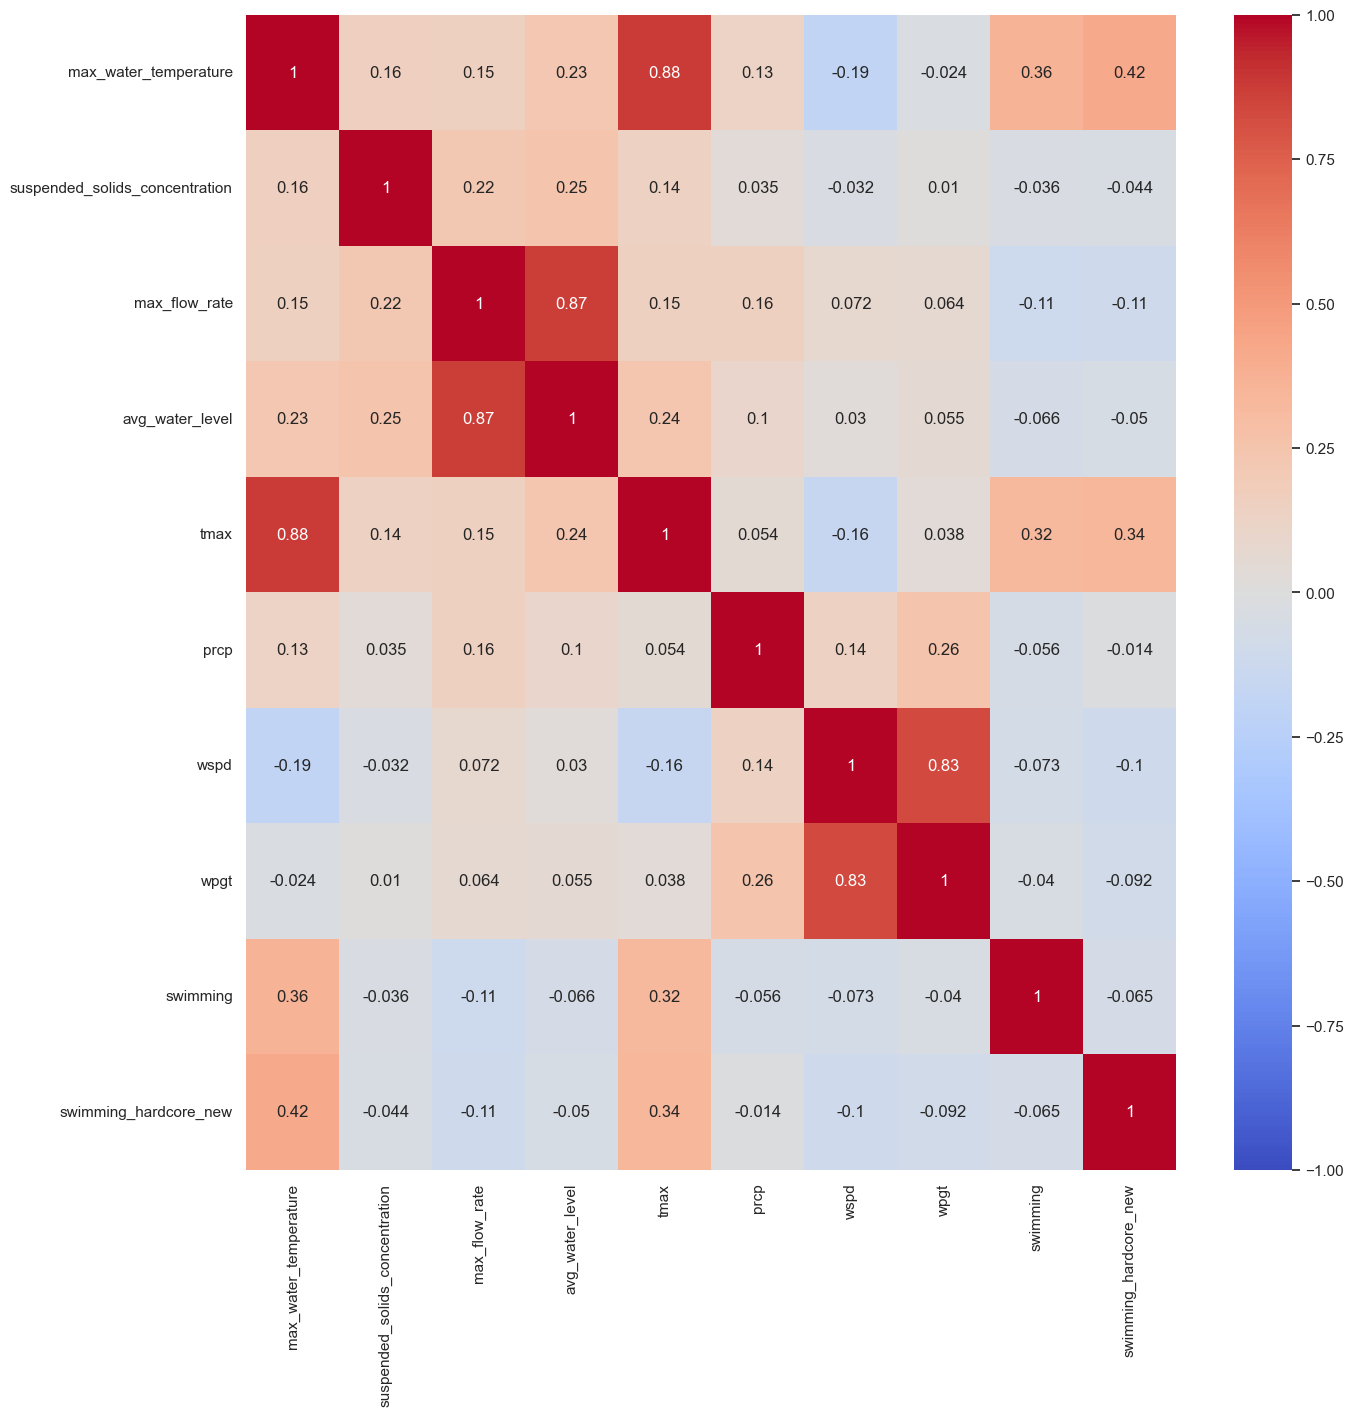

In [ ]:
# heatmap with all the variables and swimming-variables:
df_final_heatmap_swimming = df_final[['max_water_temperature', 'suspended_solids_concentration', 'max_flow_rate','avg_water_level', 'tmax', 'prcp', 'wspd', 'wpgt','swimming', 'swimming_hardcore_new']]
# Berechne die Korrelationsmatrix
correlation_matrix = df_final_heatmap_swimming.corr()

# Erstelle die Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Zeige die Heatmap
plt.show()

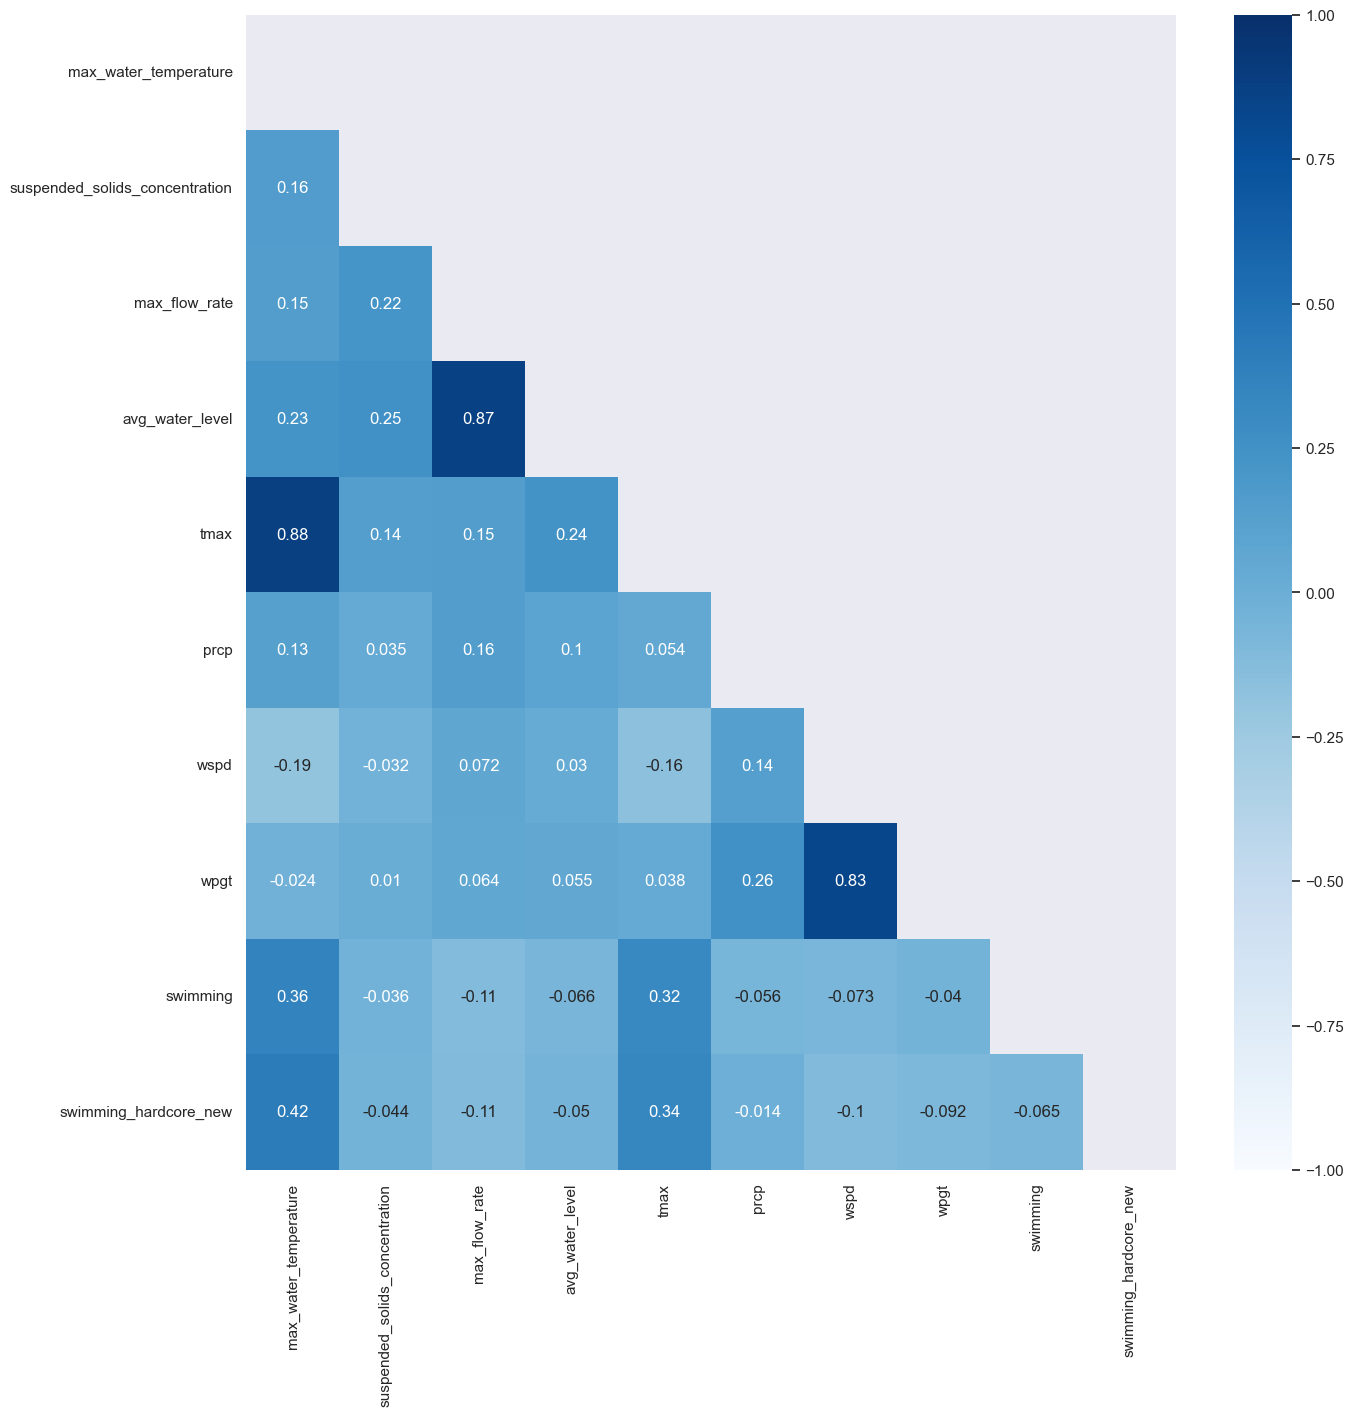

In [ ]:
# Erstelle eine Maske für das obere Dreieck
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Erstelle die Heatmap mit der Maske
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="Blues", vmin=-1, vmax=1)

# Zeige die Heatmap
plt.show()

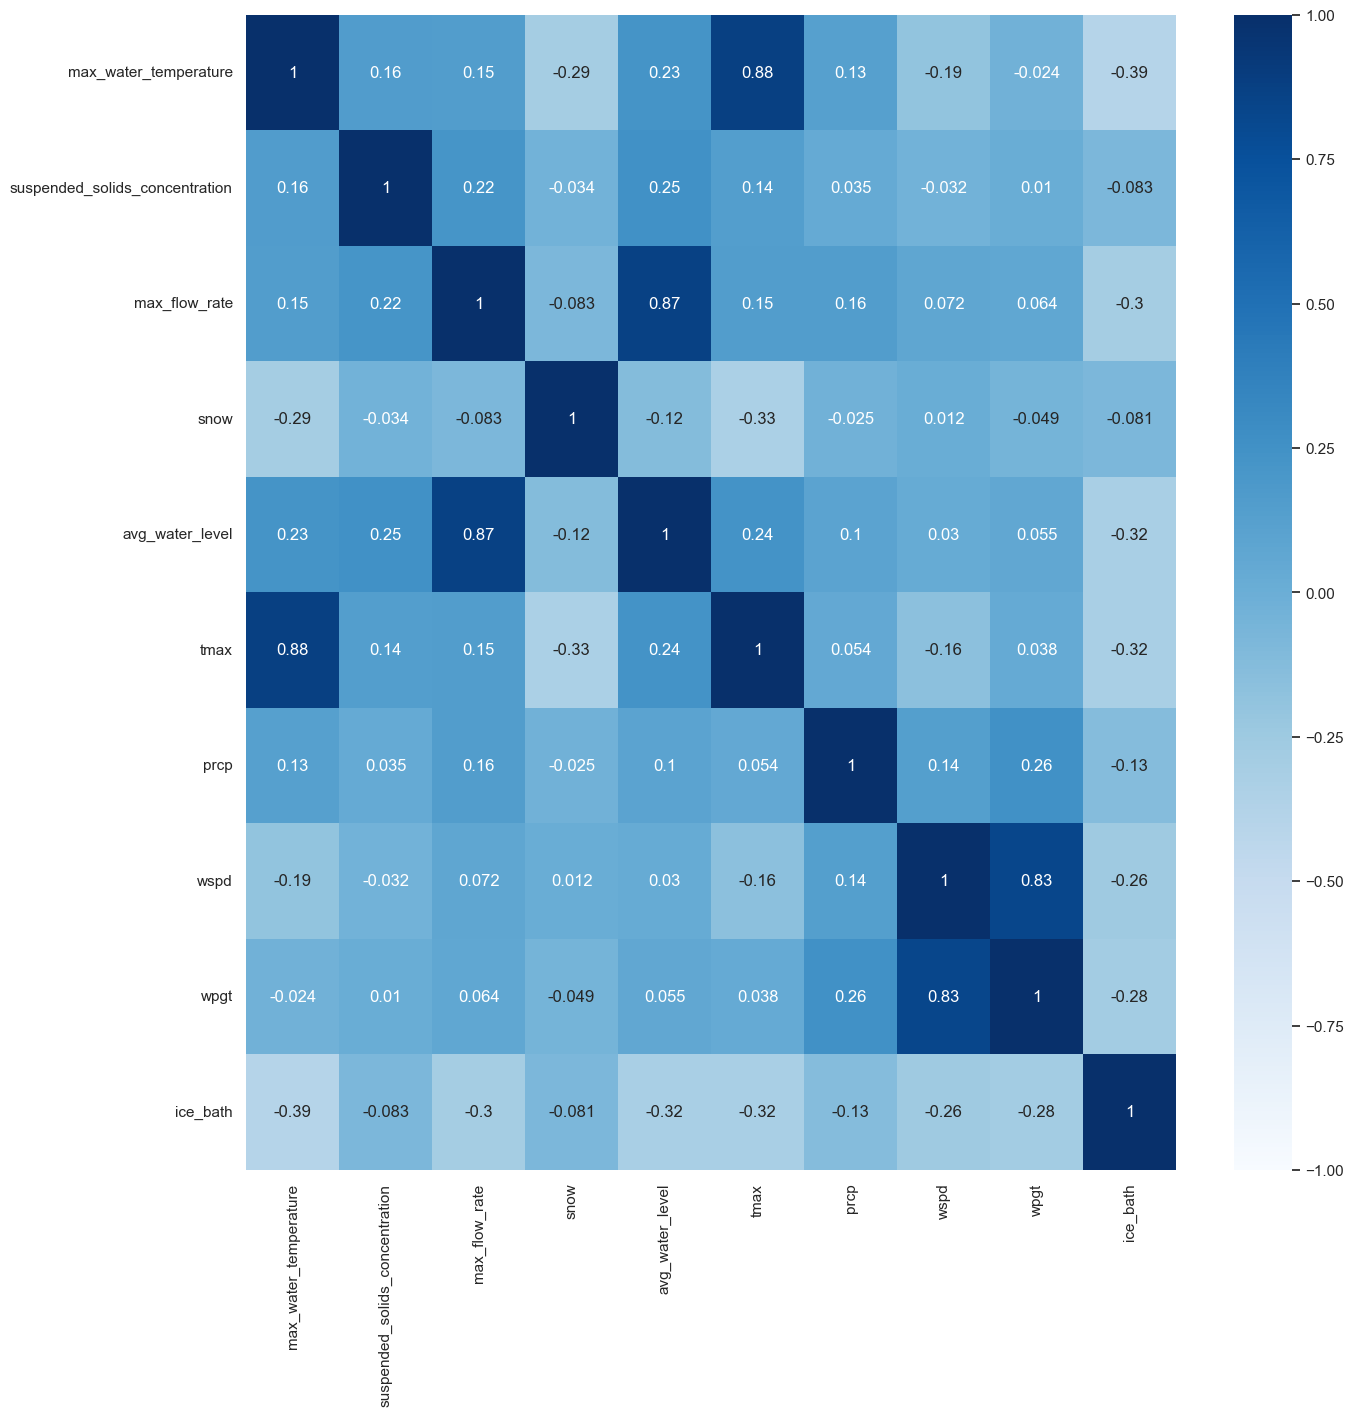

In [ ]:
# heatmap with all the variables and ice-bath-variables:
df_final_heatmap_ice = df_final[['max_water_temperature', 'suspended_solids_concentration', 'max_flow_rate','snow','avg_water_level', 'tmax', 'prcp', 'wspd', 'wpgt','ice_bath']]
# Berechne die Korrelationsmatrix
correlation_matrix_ice = df_final_heatmap_ice.corr()

# Erstelle die Heatmap
sns.heatmap(correlation_matrix_ice, annot=True, cmap="Blues", vmin=-1, vmax=1)

# Zeige die Heatmap
plt.show()

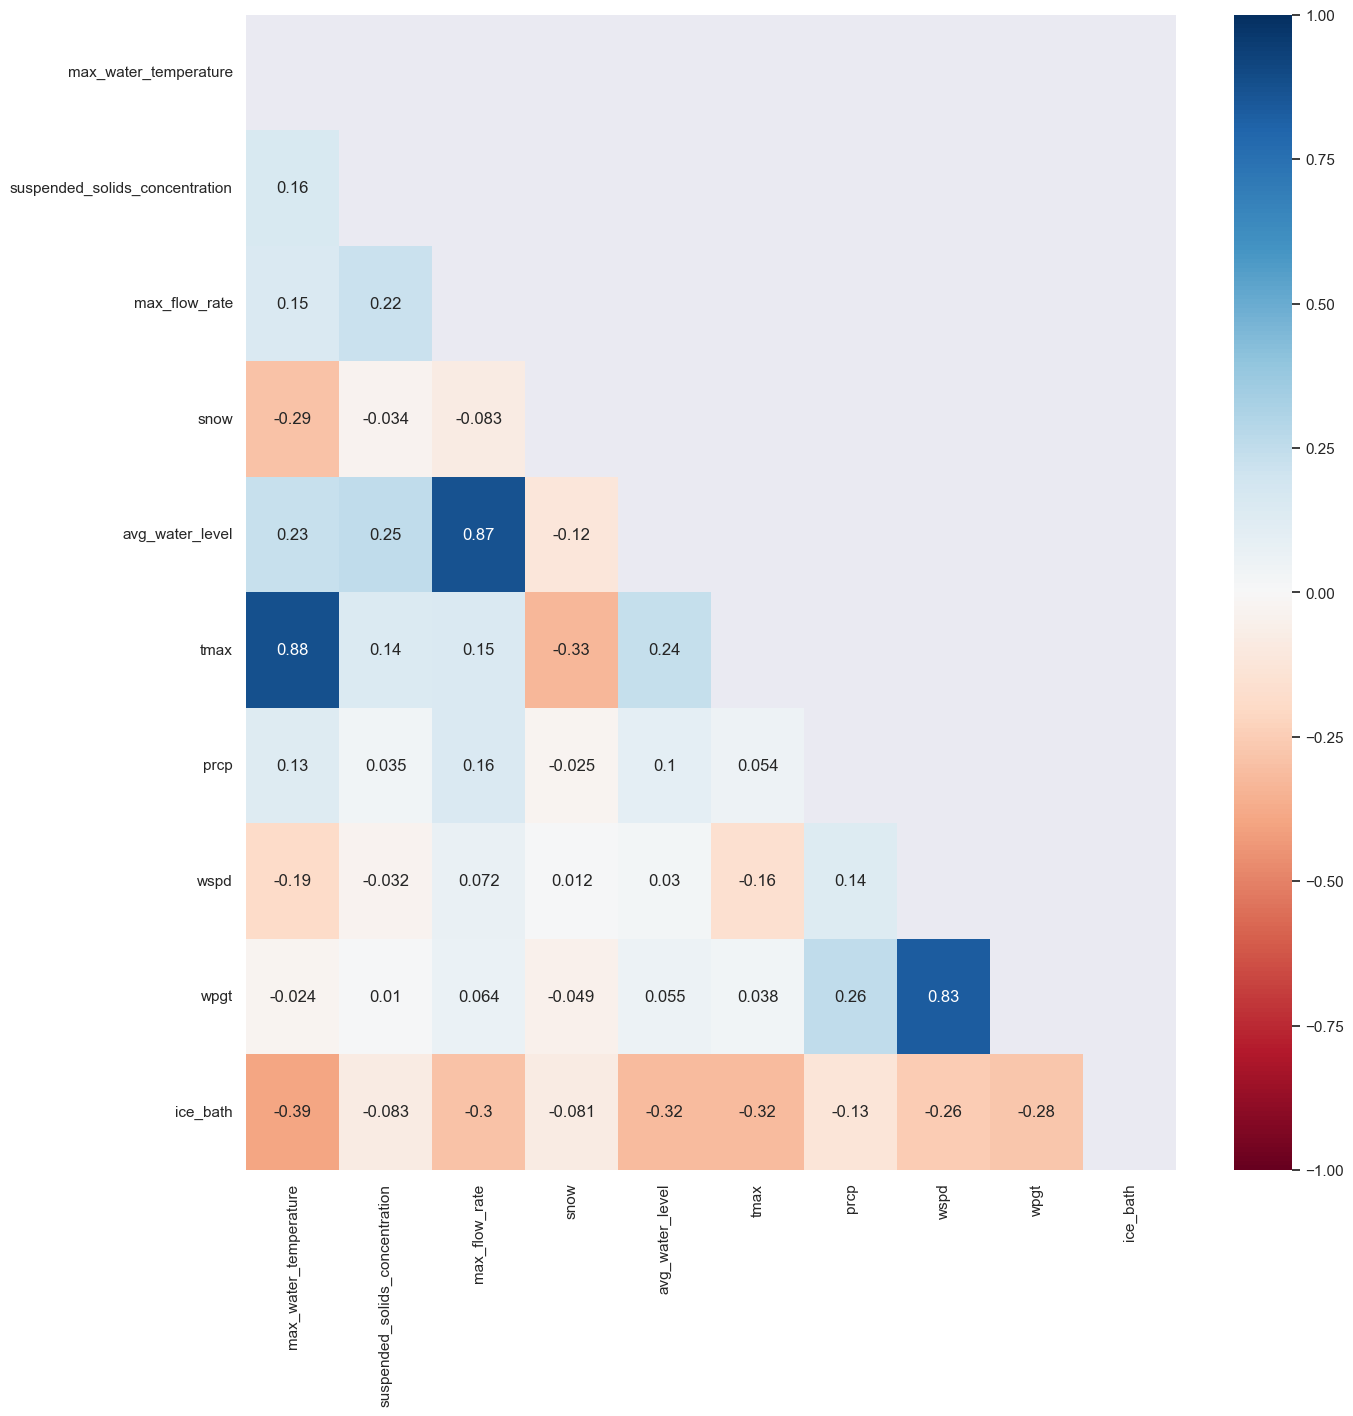

In [ ]:
# Erstelle eine Maske für das obere Dreieck
mask = np.triu(np.ones_like(correlation_matrix_ice, dtype=bool))

# Erstelle die Heatmap mit der Maske
sns.heatmap(correlation_matrix_ice, mask=mask, annot=True, cmap="RdBu", vmin=-1, vmax=1)

# Zeige die Heatmap
plt.show()

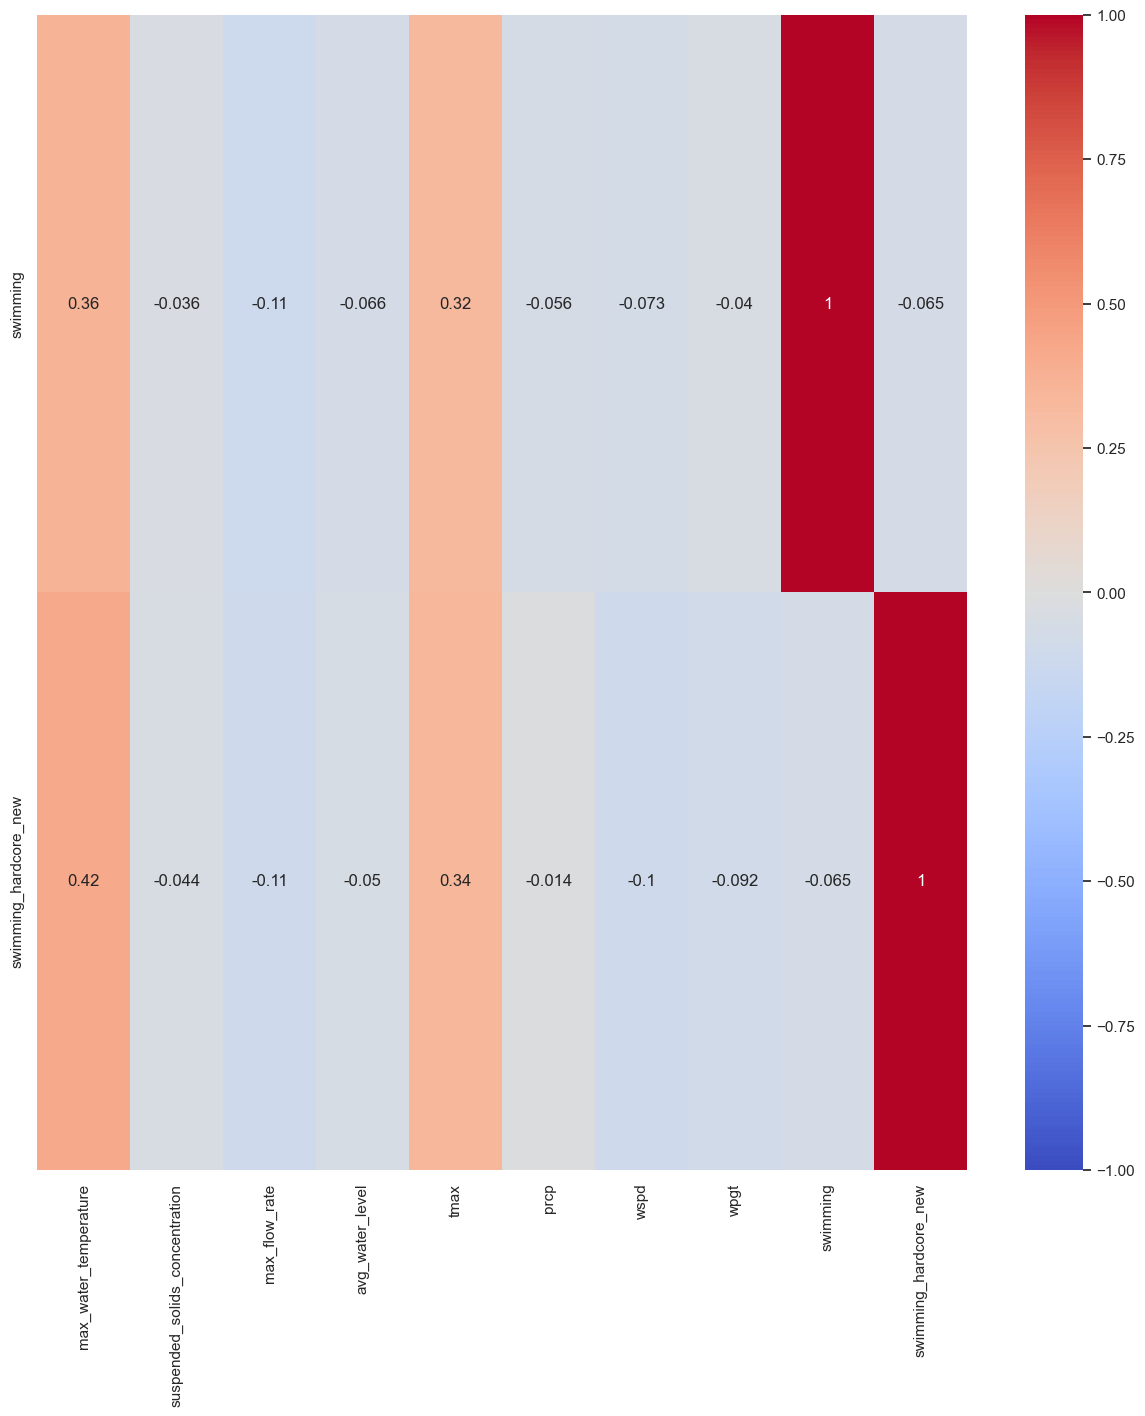

In [ ]:
# Filtere die Korrelationen nur für die zwei Zielvariablen (Var1, Var2)
correlation_focus = correlation_matrix.loc[['swimming', 'swimming_hardcore_new'], :]

# Heatmap für die zwei Variablen erstellen
sns.heatmap(correlation_focus, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.show()

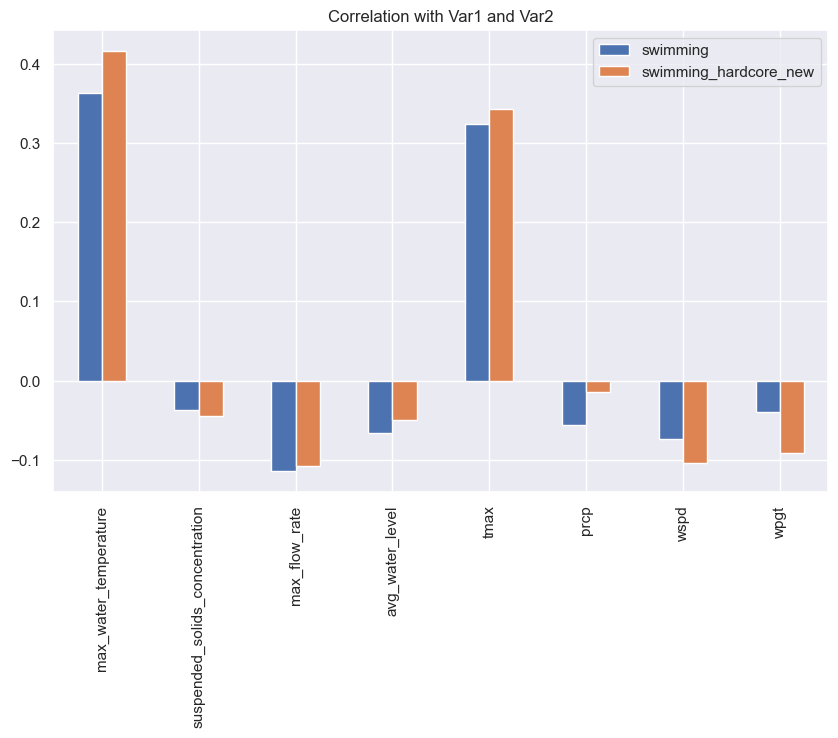

In [ ]:
# Korrelationen berechnen
correlation_focus = correlation_matrix[['swimming', 'swimming_hardcore_new']].drop(['swimming', 'swimming_hardcore_new'])

# Balkendiagramm erstellen
correlation_focus.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation with Var1 and Var2')
plt.show()

AttributeError: 'AxesImage' object has no property 'mask'

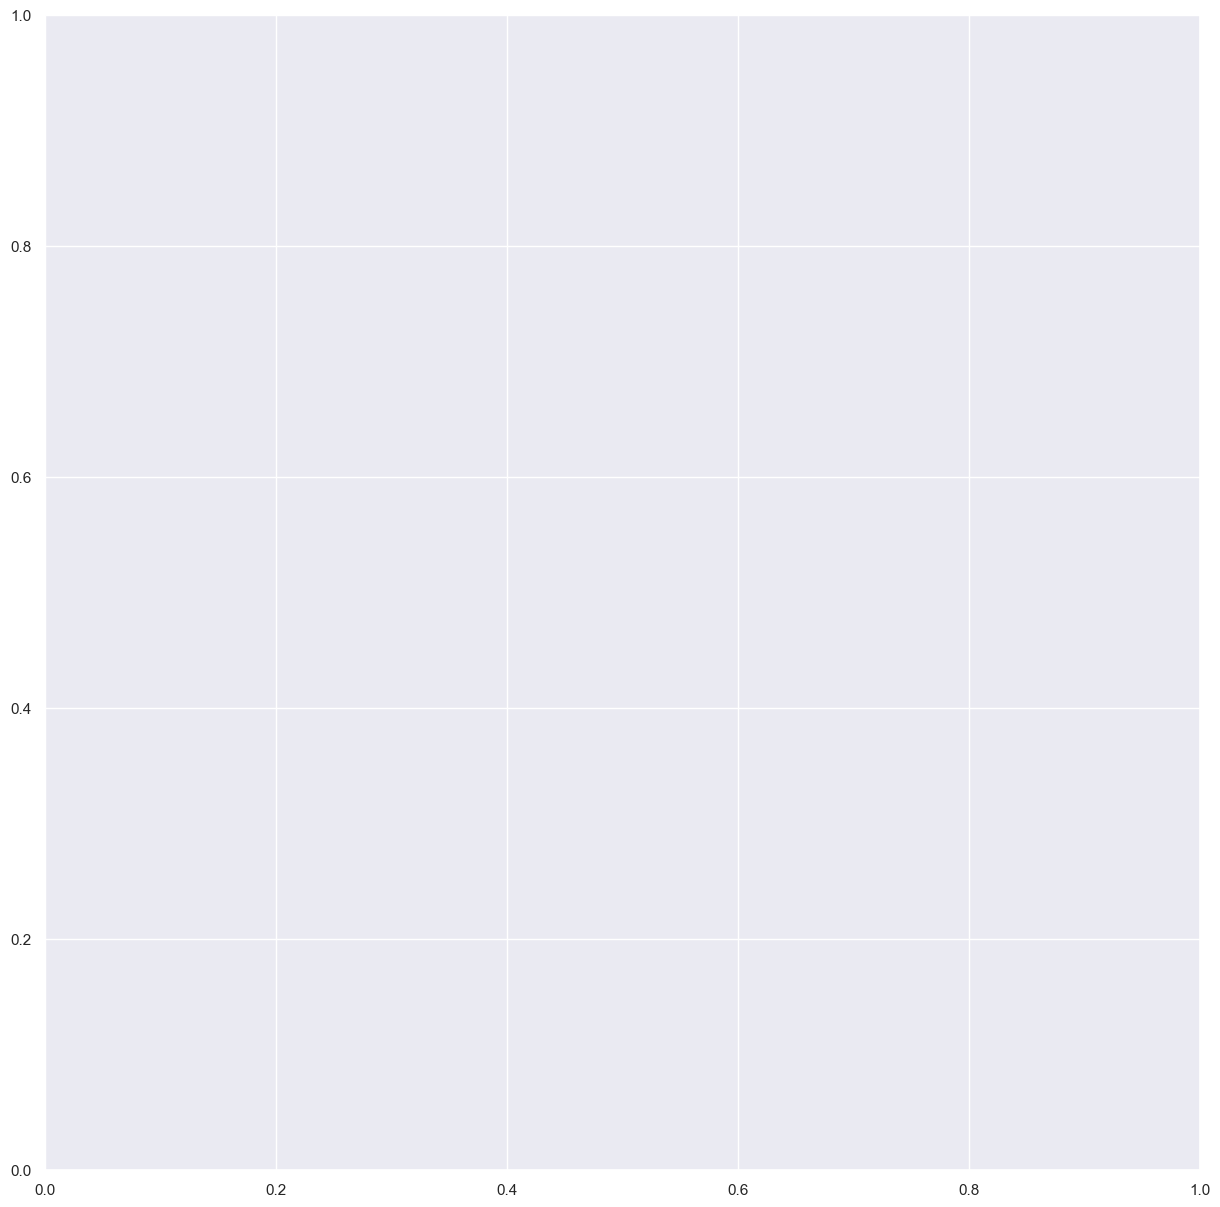

In [ ]:
# Heatmap mit Matplotlib und benutzerdefinierten Anpassungen
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmax=1, vmin=0)
plt.colorbar()
plt.title('Custom Heatmap')
plt.grid(which='major', color='black', linestyle='-', linewidth=1)
plt.show()

## Creating A DataFrame For Water Quality

In [ ]:
df_water_quality

Datum suspended_solids_concentration suspended_solid_load  \
0    31.10.65                             25                47,85   
1    01.11.65                          18,06                32,47   
2    02.11.65                          11,57                20,55   
3    03.11.65                          11,11                27,77   
4    04.11.65                           9,88                26,54   
..        ...                            ...                  ...   
229  17.08.24                         487,97              1909,53   
230  18.08.24                         487,88               2010,8   
231  19.08.24                         487,77               5288,8   
232  20.08.24                         487,72              5090,98   
233  21.08.24                         481,78              3757,03   

    suspended_sediment_erosion suspended_sediment_transport  
0                         0,02                         0,55  
1                         0,01                         0,38  
2                         0,01                         0,24  
3                         0,01                         0,32  
4                         0,01                         0,31  
..                         ...                          ...  
229                       0,67                         22,1  
230                       0,71                        23,27  
231                       1,86                        61,21  
232                       1,79                        58,92  
233                       1,32                        43,48  

[21250 rows x 5 columns]

In [ ]:
df_concentration = df_water_quality[['Datum','suspended_solids_concentration']]
df_concentration

Datum suspended_solids_concentration
0    31.10.65                             25
1    01.11.65                          18,06
2    02.11.65                          11,57
3    03.11.65                          11,11
4    04.11.65                           9,88
..        ...                            ...
229  17.08.24                         487,97
230  18.08.24                         487,88
231  19.08.24                         487,77
232  20.08.24                         487,72
233  21.08.24                         481,78

[21250 rows x 2 columns]

In [ ]:
# changing "Datum" into datetime for analyzing
df_concentration['date'] = pd.to_datetime(df_concentration['Datum'], dayfirst=True)
df_concentration

Datum suspended_solids_concentration       date
0    31.10.65                             25 2065-10-31
1    01.11.65                          18,06 2065-11-01
2    02.11.65                          11,57 2065-11-02
3    03.11.65                          11,11 2065-11-03
4    04.11.65                           9,88 2065-11-04
..        ...                            ...        ...
229  17.08.24                         487,97 2024-08-17
230  18.08.24                         487,88 2024-08-18
231  19.08.24                         487,77 2024-08-19
232  20.08.24                         487,72 2024-08-20
233  21.08.24                         481,78 2024-08-21

[21250 rows x 3 columns]

In [ ]:
# there a data from 1900, which were interpretated as 2000. So have to manipulate the year
#df_concentration.loc[df_concentration['date'] >'2024-09-09', 'date'] = df_concentration['date'] - pd.DateOffset(years=100)
#df_concentration

In [ ]:
# adding year, month into the dataframe
df_concentration['year']= df_concentration['date'].dt.year
df_concentration['month'] = df_concentration['date'].dt.month
df_concentration

Datum suspended_solids_concentration       date  year  month
0    31.10.65                             25 2065-10-31  2065     10
1    01.11.65                          18,06 2065-11-01  2065     11
2    02.11.65                          11,57 2065-11-02  2065     11
3    03.11.65                          11,11 2065-11-03  2065     11
4    04.11.65                           9,88 2065-11-04  2065     11
..        ...                            ...        ...   ...    ...
229  17.08.24                         487,97 2024-08-17  2024      8
230  18.08.24                         487,88 2024-08-18  2024      8
231  19.08.24                         487,77 2024-08-19  2024      8
232  20.08.24                         487,72 2024-08-20  2024      8
233  21.08.24                         481,78 2024-08-21  2024      8

[21250 rows x 5 columns]

In [ ]:
# dropping "Datum"
df_concentration= df_concentration.drop(columns='Datum')
df_concentration

suspended_solids_concentration       date  year  month
0                               25 2065-10-31  2065     10
1                            18,06 2065-11-01  2065     11
2                            11,57 2065-11-02  2065     11
3                            11,11 2065-11-03  2065     11
4                             9,88 2065-11-04  2065     11
..                             ...        ...   ...    ...
229                         487,97 2024-08-17  2024      8
230                         487,88 2024-08-18  2024      8
231                         487,77 2024-08-19  2024      8
232                         487,72 2024-08-20  2024      8
233                         481,78 2024-08-21  2024      8

[21250 rows x 4 columns]

In [ ]:
# replacing komma into dot
df_concentration['suspended_solids_concentration'] = df_concentration['suspended_solids_concentration'].str.replace(',', '.')
df_concentration

suspended_solids_concentration       date  year  month
0                               25 2065-10-31  2065     10
1                            18.06 2065-11-01  2065     11
2                            11.57 2065-11-02  2065     11
3                            11.11 2065-11-03  2065     11
4                             9.88 2065-11-04  2065     11
..                             ...        ...   ...    ...
229                         487.97 2024-08-17  2024      8
230                         487.88 2024-08-18  2024      8
231                         487.77 2024-08-19  2024      8
232                         487.72 2024-08-20  2024      8
233                         481.78 2024-08-21  2024      8

[21250 rows x 4 columns]

In [ ]:
df_concentration_test = df_concentration[df_concentration['date']object.freq1000]
df_concentration

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
#changing suspended_solids_concentration into a float
df_concentration['suspended_solids_concentration'] = df_concentration['suspended_solids_concentration'].astype(dtype='float64')
df_concentration


suspended_solids_concentration       date  year  month
0                             25.00 2065-10-31  2065     10
1                             18.06 2065-11-01  2065     11
2                             11.57 2065-11-02  2065     11
3                             11.11 2065-11-03  2065     11
4                              9.88 2065-11-04  2065     11
..                              ...        ...   ...    ...
229                          487.97 2024-08-17  2024      8
230                          487.88 2024-08-18  2024      8
231                          487.77 2024-08-19  2024      8
232                          487.72 2024-08-20  2024      8
233                          481.78 2024-08-21  2024      8

[21250 rows x 4 columns]

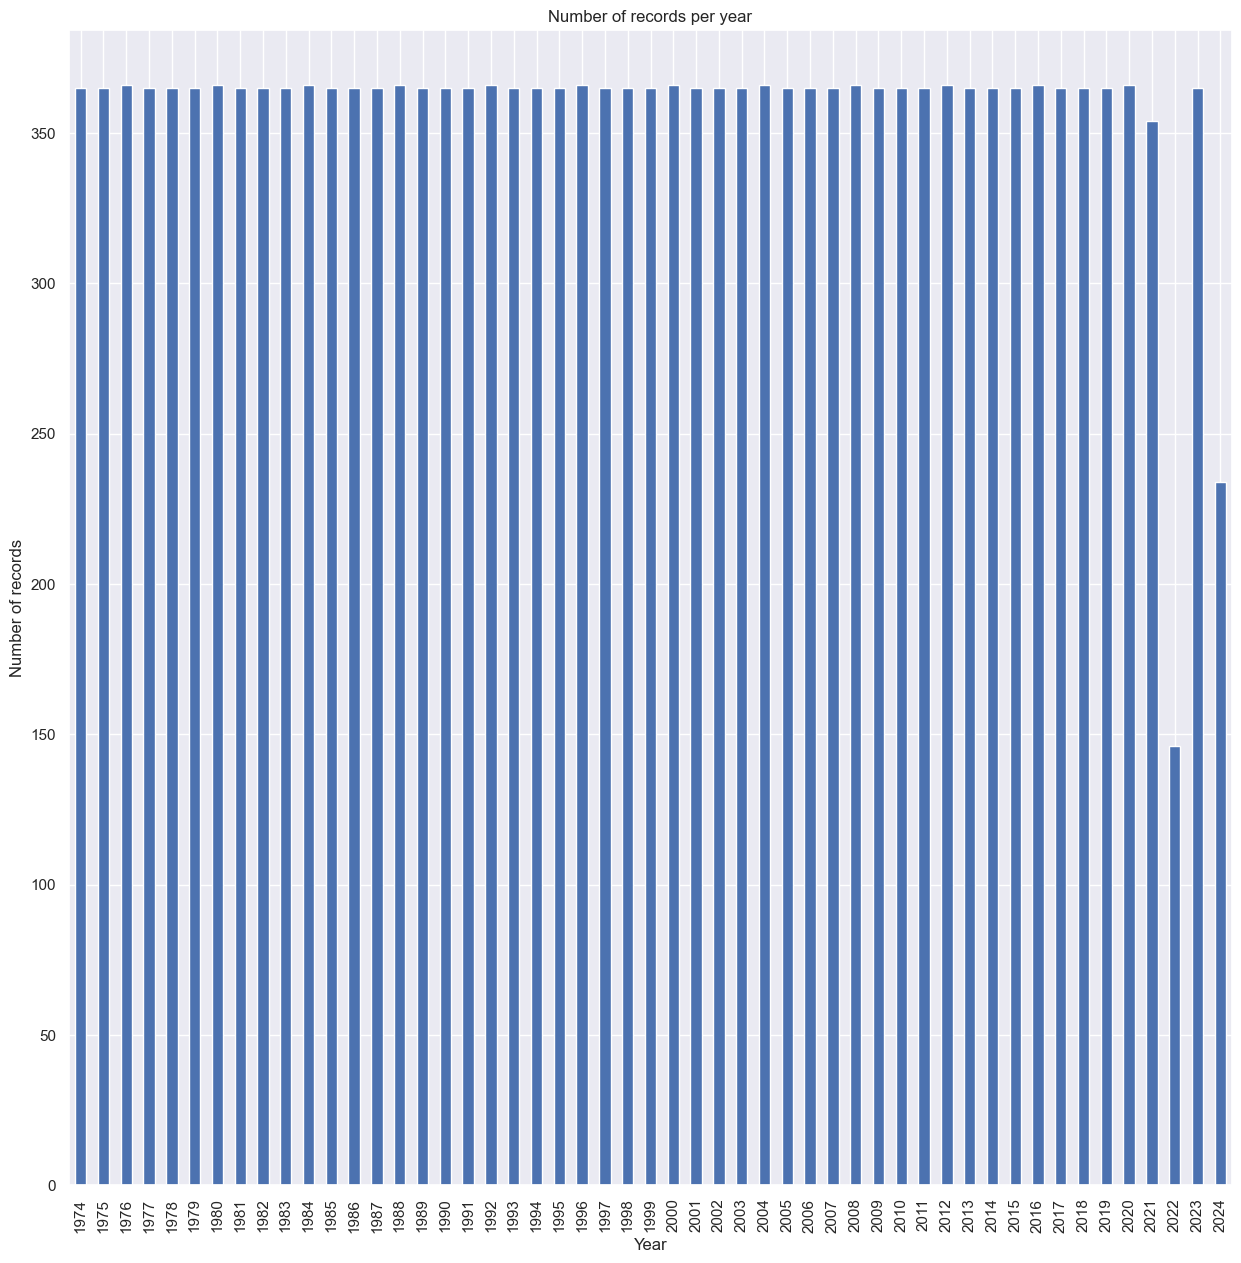

In [ ]:
# plot of records per year to find out, if there's a lot of missing data
concentration_per_year = df_concentration.groupby('year').size()

concentration_per_year.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()
#sns.barplot(x=df_river['year'],
#            y=df_river['year'].count())
#plt.show()
#len(df_river[df_river['year'] == 2016])

In [ ]:
df_concentration.year.unique()

array([2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024], dtype=int32)

In [ ]:
duplicate_indices = df_concentration[df_concentration.index.duplicated()]
print(duplicate_indices)

     suspended_solids_concentration       date  year  month
0                              9.24 2024-01-01  2024      1
1                              9.23 2024-01-02  2024      1
2                              9.22 2024-01-03  2024      1
3                              9.15 2024-01-04  2024      1
4                              9.02 2024-01-05  2024      1
..                              ...        ...   ...    ...
229                          487.97 2024-08-17  2024      8
230                          487.88 2024-08-18  2024      8
231                          487.77 2024-08-19  2024      8
232                          487.72 2024-08-20  2024      8
233                          481.78 2024-08-21  2024      8

[234 rows x 4 columns]


In [ ]:
df_concentration = df_concentration[df_concentration['year'] <= 2024]
df_concentration

suspended_solids_concentration       date  year  month
2984                            7.77 1974-01-01  1974      1
2985                            8.38 1974-01-02  1974      1
2986                           10.34 1974-01-03  1974      1
2987                           16.67 1974-01-04  1974      1
2988                           18.40 1974-01-05  1974      1
...                              ...        ...   ...    ...
229                           487.97 2024-08-17  2024      8
230                           487.88 2024-08-18  2024      8
231                           487.77 2024-08-19  2024      8
232                           487.72 2024-08-20  2024      8
233                           481.78 2024-08-21  2024      8

[18266 rows x 4 columns]

In [ ]:
# there a data from 1900, which were interpretated as 2000. So have to manipulate the year
#df_concentration.loc[df_concentration['date'] >'2024-09-09', 'date'] = df_concentration['date'] - pd.DateOffset(years=100)
#df_concentration

In [ ]:
# exporting the quality data
df_concentration.to_csv("data_quality.csv", sep=';', decimal=',', index=False)

## Creating A DataFrame For Water Level

In [ ]:
df_water_level

Datum  avg_water_level  max_water_level  min_water_level
0    01.11.73               50               58               44
1    02.11.73               45               53               43
2    03.11.73               49               57               43
3    04.11.73               45               57               31
4    05.11.73               46               52               35
..        ...              ...              ...              ...
239  27.08.24              130              137              121
240  28.08.24              117              121              113
241  29.08.24              114              116              110
242  30.08.24              114              116              108
243  31.08.24              109              115              104

[18567 rows x 4 columns]

In [ ]:
# changing "Datum" into datetime for analyzing
df_water_level['date'] = pd.to_datetime(df_water_level['Datum'], dayfirst=True)
df_water_level

Datum  avg_water_level  max_water_level  min_water_level       date
0    01.11.73               50               58               44 2073-11-01
1    02.11.73               45               53               43 2073-11-02
2    03.11.73               49               57               43 2073-11-03
3    04.11.73               45               57               31 2073-11-04
4    05.11.73               46               52               35 2073-11-05
..        ...              ...              ...              ...        ...
239  27.08.24              130              137              121 2024-08-27
240  28.08.24              117              121              113 2024-08-28
241  29.08.24              114              116              110 2024-08-29
242  30.08.24              114              116              108 2024-08-30
243  31.08.24              109              115              104 2024-08-31

[18567 rows x 5 columns]

In [ ]:
# adding year, month into the dataframe
df_water_level['year'] = df_water_level['date'].dt.year
df_water_level['month'] = df_water_level['date'].dt.month
df_water_level

Datum  avg_water_level  max_water_level  min_water_level       date  \
0    01.11.73               50               58               44 2073-11-01   
1    02.11.73               45               53               43 2073-11-02   
2    03.11.73               49               57               43 2073-11-03   
3    04.11.73               45               57               31 2073-11-04   
4    05.11.73               46               52               35 2073-11-05   
..        ...              ...              ...              ...        ...   
239  27.08.24              130              137              121 2024-08-27   
240  28.08.24              117              121              113 2024-08-28   
241  29.08.24              114              116              110 2024-08-29   
242  30.08.24              114              116              108 2024-08-30   
243  31.08.24              109              115              104 2024-08-31   

     year  month  
0    2073     11  
1    2073     11  
2    2073     11  
3    2073     11  
4    2073     11  
..    ...    ...  
239  2024      8  
240  2024      8  
241  2024      8  
242  2024      8  
243  2024      8  

[18567 rows x 7 columns]

In [ ]:
# no replacing necessesary, because they are integers
df_water_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18567 entries, 0 to 243
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datum            18567 non-null  object        
 1   avg_water_level  18567 non-null  int64         
 2   max_water_level  18567 non-null  int64         
 3   min_water_level  18567 non-null  int64         
 4   date             18567 non-null  datetime64[ns]
 5   year             18567 non-null  int32         
 6   month            18567 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(1)
memory usage: 1015.4+ KB


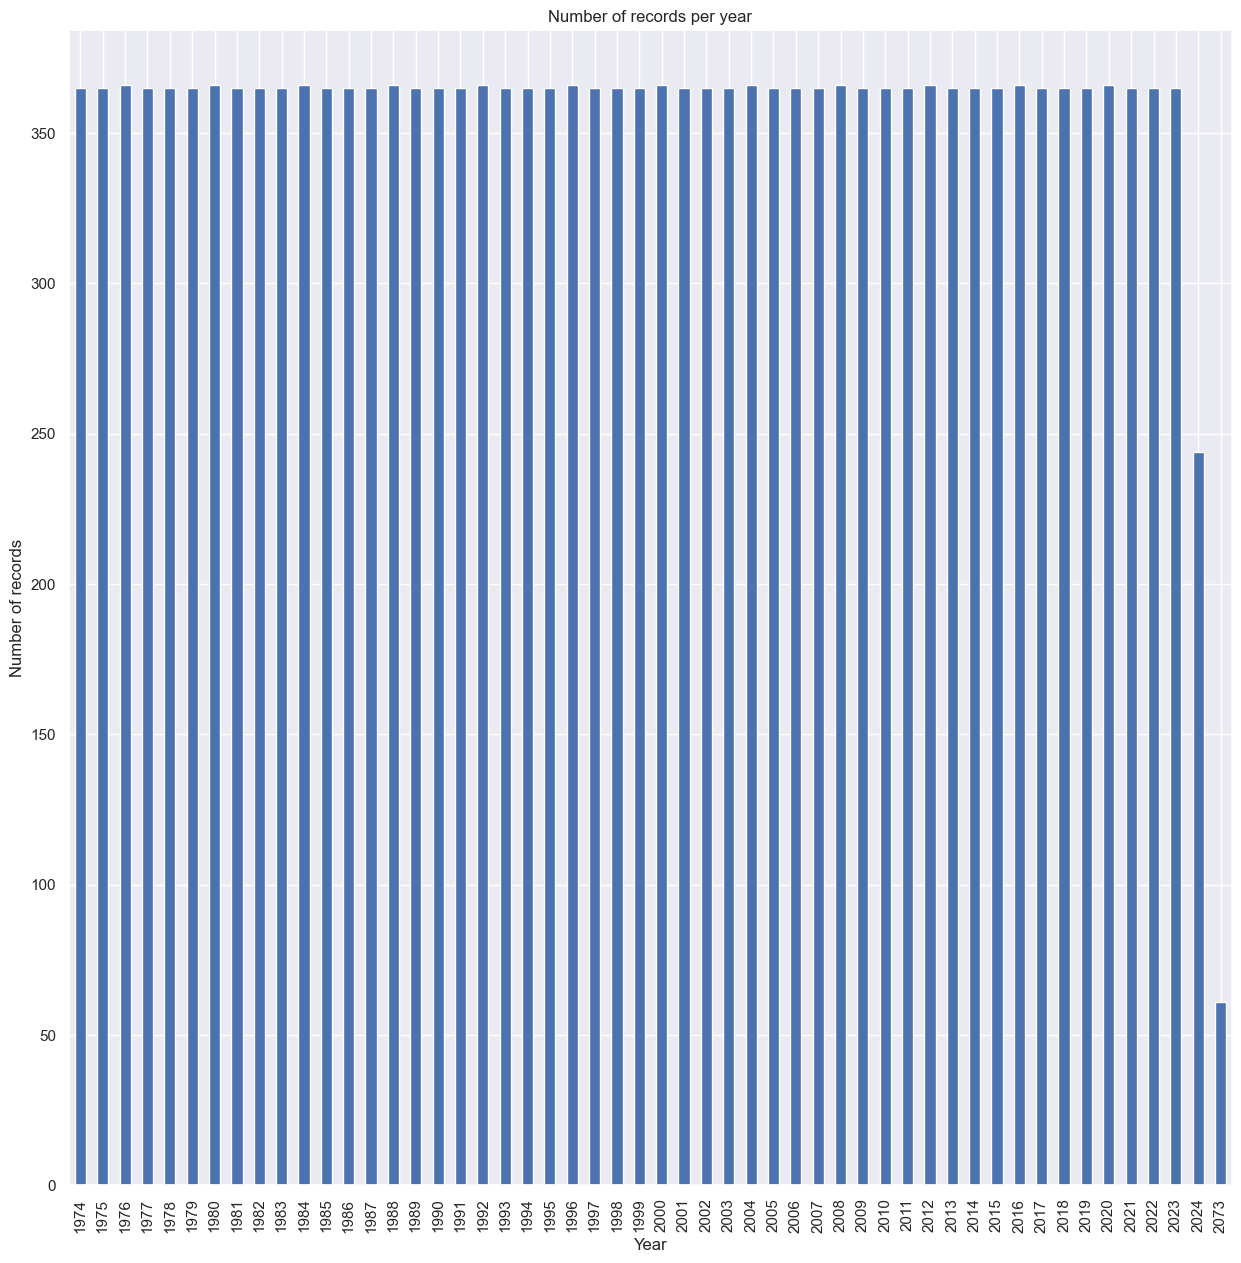

In [ ]:
# finding out, if there a missing data:
# plot of records per year to find out, if there's a lot of missing data
water_level_per_year = df_water_level.groupby('year').size()

water_level_per_year.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()
#sns.barplot(x=df_river['year'],
#            y=df_river['year'].count())
#plt.show()
#len(df_river[df_river['year'] == 2016])

In [ ]:
df_water_level_new = df_water_level[df_water_level['year'] <= 2024]
df_water_level_new

Datum  avg_water_level  max_water_level  min_water_level       date  \
61   01.01.74               46               54               38 1974-01-01   
62   02.01.74               44               55               35 1974-01-02   
63   03.01.74               51               55               47 1974-01-03   
64   04.01.74               56               64               45 1974-01-04   
65   05.01.74               53               57               33 1974-01-05   
..        ...              ...              ...              ...        ...   
239  27.08.24              130              137              121 2024-08-27   
240  28.08.24              117              121              113 2024-08-28   
241  29.08.24              114              116              110 2024-08-29   
242  30.08.24              114              116              108 2024-08-30   
243  31.08.24              109              115              104 2024-08-31   

     year  month  
61   1974      1  
62   1974      1  
63   1974      1  
64   1974      1  
65   1974      1  
..    ...    ...  
239  2024      8  
240  2024      8  
241  2024      8  
242  2024      8  
243  2024      8  

[18506 rows x 7 columns]

In [ ]:
# adding 3 columns: water alert level 1, 2, 3 and 4
# there are specific actions the city of munich take if the water level reaches one of them
# water alert level 1 = 240 cm, 300 cm, 380 cm, 520 cm

df_water_level_new['water_alert_level1'] = df_water_level_new['max_water_level']

In [ ]:
def determine_alert(row):
	if (row['max_water_level'] > 520.0):
		return 4
	elif (row['max_water_level'] > 380.0):
	    return 3
	elif (row['max_water_level'] > 300.0):
		return 2
	elif (row['max_water_level'] > 240.0):
		return 1
	return 0


#Apply to each row
df_water_level_new['water_alert_level']=df_water_level_new.apply(determine_alert,axis=1)


In [ ]:
df_water_level_new.isna().sum()

Datum                0
avg_water_level      0
max_water_level      0
min_water_level      0
date                 0
year                 0
month                0
water_alert_level    0
dtype: int64

In [ ]:
df_water_level_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18506 entries, 61 to 243
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datum              18506 non-null  object        
 1   avg_water_level    18506 non-null  int64         
 2   max_water_level    18506 non-null  int64         
 3   min_water_level    18506 non-null  int64         
 4   date               18506 non-null  datetime64[ns]
 5   year               18506 non-null  int32         
 6   month              18506 non-null  int32         
 7   water_alert_level  18506 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(4), object(1)
memory usage: 1.1+ MB


In [ ]:
df_water_level_new['water_alert_level'].value_counts()

water_alert_level
0    18336
1      116
2       36
3       17
4        1
Name: count, dtype: int64

In [ ]:

df_water_level_new[df_water_level_new['max_water_level']>520.0]

Datum  avg_water_level  max_water_level  min_water_level       date  \
11619  24.08.05              495              542              451 2005-08-24   

       year  month  water_alert_level  
11619  2005      8                  1

In [ ]:
# creating 4 variables: 

def determine_alert1(row):
	if (row['water_alert_level'] == 1):
		return 1
	else:
		return 0
	
# Apply to each row:

df_water_level_new['alert1']=df_water_level_new.apply(determine_alert1,axis=1)

df_water_level_new[df_water_level_new['water_alert_level'] == 1]

Datum  avg_water_level  max_water_level  min_water_level       date  \
259  18.07.74              255              295              201 1974-07-18   
261  20.07.74              254              273              238 1974-07-20   
262  21.07.74              237              250              228 1974-07-21   
263  22.07.74              222              244              202 1974-07-22   
607  01.07.75              237              278              177 1975-07-01   
..        ...              ...              ...              ...        ...   
157  06.06.24              230              247              221 2024-06-06   
158  07.06.24              262              266              247 2024-06-07   
159  08.06.24              240              268              220 2024-06-08   
161  10.06.24              239              250              212 2024-06-10   
162  11.06.24              221              242              197 2024-06-11   

     year  month  water_alert_level  alert1  alert2  alert3  alert4  \
259  1974      7                  1       1     1.0     1.0     1.0   
261  1974      7                  1       1     1.0     1.0     1.0   
262  1974      7                  1       1     1.0     1.0     1.0   
263  1974      7                  1       1     1.0     1.0     1.0   
607  1975      7                  1       1     1.0     1.0     1.0   
..    ...    ...                ...     ...     ...     ...     ...   
157  2024      6                  1       1     1.0     1.0     1.0   
158  2024      6                  1       1     1.0     1.0     1.0   
159  2024      6                  1       1     1.0     1.0     1.0   
161  2024      6                  1       1     1.0     1.0     1.0   
162  2024      6                  1       1     1.0     1.0     1.0   

     water_alert1  water_alert2  
259             1             0  
261             1             0  
262             1             0  
263             1             0  
607             1             0  
..            ...           ...  
157             1             0  
158             1             0  
159             1             0  
161             1             0  
162             1             0  

[116 rows x 14 columns]

In [ ]:
df_water_level_new['alert1'].value_counts()

alert1
0    18390
1      116
Name: count, dtype: int64

In [ ]:
# creating 4 variables: 

def determine_alert2(row):
	if (row['water_alert_level'] == 2):
		return 1
	else:
		return 0
	
# Apply to each row:

df_water_level_new['alert2']=df_water_level_new.apply(determine_alert2,axis=1)

df_water_level_new[df_water_level_new['water_alert_level'] == 2]



Datum  avg_water_level  max_water_level  min_water_level       date  \
260    19.07.74              275              301              257 1974-07-19   
1369   01.08.77              286              330              195 1977-08-01   
2054   17.06.79              238              312              181 1979-06-17   
2057   20.06.79              304              322              283 1979-06-20   
2817   19.07.81              247              317              175 1981-07-19   
2821   23.07.81              308              358              267 1981-07-23   
4297   07.08.85              313              351              273 1985-08-07   
4298   08.08.85              299              347              273 1985-08-08   
7883   02.06.95              276              313              227 1995-06-02   
7884   03.06.95              316              334              296 1995-06-03   
7888   07.06.95              301              325              250 1995-06-07   
7972   30.08.95              339              358              298 1995-08-30   
7973   31.08.95              314              340              290 1995-08-31   
9324   13.05.99              300              316              274 1999-05-13   
9325   14.05.99              261              302              241 1999-05-14   
9332   21.05.99              218              334              155 1999-05-21   
9338   27.05.99              271              311              220 1999-05-27   
10511  12.08.02              269              316              183 2002-08-12   
11622  27.08.05              279              326              237 2005-08-27   
13363  03.06.10              294              344              228 2010-06-03   
14457  01.06.13              281              307              220 2013-06-01   
14460  04.06.13              352              380              324 2013-06-04   
14461  05.06.13              301              325              279 2013-06-05   
16637  21.05.19              252              301              218 2019-05-21   
16638  22.05.19              324              331              301 2019-05-22   
16639  23.05.19              303              324              272 2019-05-23   
17080  06.08.20              293              312              273 2020-08-06   
17427  19.07.21              301              315              286 2021-07-19   
17428  20.07.21              303              311              282 2021-07-20   
18198  29.08.23              287              312              251 2023-08-29   
18199  30.08.23              312              325              290 2023-08-30   
152    01.06.24              258              329              186 2024-06-01   
153    02.06.24              298              329              273 2024-06-02   
154    03.06.24              272              333              249 2024-06-03   
155    04.06.24              330              366              307 2024-06-04   
156    05.06.24              276              316              241 2024-06-05   

       year  month  water_alert_level  alert1  alert2  alert3  alert4  \
260    1974      7                  2       0       1     NaN     NaN   
1369   1977      8                  2       0       1     NaN     NaN   
2054   1979      6                  2       0       1     NaN     NaN   
2057   1979      6                  2       0       1     NaN     NaN   
2817   1981      7                  2       0       1     NaN     NaN   
2821   1981      7                  2       0       1     NaN     NaN   
4297   1985      8                  2       0       1     NaN     NaN   
4298   1985      8                  2       0       1     NaN     NaN   
7883   1995      6                  2       0       1     NaN     NaN   
7884   1995      6                  2       0       1     NaN     NaN   
7888   1995      6                  2       0       1     NaN     NaN   
7972   1995      8                  2       0       1     NaN     NaN   
7973   1995      8                  2       0       1     NaN  

In [ ]:
df_water_level_new['alert2'].value_counts()

alert2
0    18470
1       36
Name: count, dtype: int64

In [ ]:
# creating 4 variables: 

def determine_alert3(row):
	if (row['water_alert_level'] == 3):
		return 1
	else:
		return 0
	
# Apply to each row:

df_water_level_new['alert3']=df_water_level_new.apply(determine_alert3,axis=1)

df_water_level_new[df_water_level_new['water_alert_level'] == 3]

Datum  avg_water_level  max_water_level  min_water_level       date  \
2055   18.06.79              383              424              312 1979-06-18   
2056   19.06.79              358              402              322 1979-06-19   
2818   20.07.81              389              424              317 1981-07-20   
2819   21.07.81              387              395              382 1981-07-21   
2820   22.07.81              376              390              358 1981-07-22   
9333   22.05.99              442              469              334 1999-05-22   
9334   23.05.99              450              467              434 1999-05-23   
9335   24.05.99              432              436              425 1999-05-24   
9336   25.05.99              414              439              389 1999-05-25   
9337   26.05.99              350              391              311 1999-05-26   
11618  23.08.05              311              491              224 2005-08-23   
11620  25.08.05              430              453              413 2005-08-25   
11621  26.08.05              387              414              326 2005-08-26   
14458  02.06.13              343              411              293 2013-06-02   
14459  03.06.13              414              432              380 2013-06-03   
17078  04.08.20              307              394              196 2020-08-04   
17079  05.08.20              339              383              312 2020-08-05   

       year  month  water_alert_level  alert1  alert2  alert3  alert4  \
2055   1979      6                  3       0       0       1     NaN   
2056   1979      6                  3       0       0       1     NaN   
2818   1981      7                  3       0       0       1     NaN   
2819   1981      7                  3       0       0       1     NaN   
2820   1981      7                  3       0       0       1     NaN   
9333   1999      5                  3       0       0       1     NaN   
9334   1999      5                  3       0       0       1     NaN   
9335   1999      5                  3       0       0       1     NaN   
9336   1999      5                  3       0       0       1     NaN   
9337   1999      5                  3       0       0       1     NaN   
11618  2005      8                  3       0       0       1     NaN   
11620  2005      8                  3       0       0       1     NaN   
11621  2005      8                  3       0       0       1     NaN   
14458  2013      6                  3       0       0       1     NaN   
14459  2013      6                  3       0       0       1     NaN   
17078  2020      8                  3       0       0       1     NaN   
17079  2020      8                  3       0       0       1     NaN   

       water_alert1  water_alert2  
2055              0             0  
2056              0             0  
2818              0             0  
2819              0             0  
2820              0             0  
9333              0             0  
9334              0             0  
9335              0             0  
9336              0             0  
9337              0             0  
11618             0             0  
11620             0             0  
11621             0             0  
14458             0             0  
14459             0             0  
17078             0             0  
17079             0             0

In [ ]:
df_water_level_new.alert3.value_counts()

alert3
0    18489
1       17
Name: count, dtype: int64

In [ ]:
# creating 4 variables: 

def determine_alert4(row):
	if (row['water_alert_level'] == 4):
		return 1
	else:
		return 0
	
# Apply to each row:

df_water_level_new['alert4']=df_water_level_new.apply(determine_alert4,axis=1)

df_water_level_new[df_water_level_new['water_alert_level'] == 4]

Datum  avg_water_level  max_water_level  min_water_level       date  \
11619  24.08.05              495              542              451 2005-08-24   

       year  month  water_alert_level  alert1  alert2  alert3  alert4  \
11619  2005      8                  4       0       0       0       1   

       water_alert1  water_alert2  
11619             0             0

In [ ]:
df_water_level_new.to_csv("waterlevel.csv", sep=';', decimal=",", index=False)

In [ ]:
df_water_level_new[df_water_level_new['month']==12].describe().T
                   # df_water_level_new['max_water_level']>200) &

count                 mean                  min  \
avg_water_level    1550.0            67.024516                 20.0   
max_water_level    1550.0            74.153548                 21.0   
min_water_level    1550.0            60.507097                 16.0   
date                 1550  1999-06-16 17:45:36  1974-12-01 00:00:00   
year               1550.0               1998.5               1974.0   
month              1550.0                 12.0                 12.0   
water_alert_level  1550.0                  0.0                  0.0   
alert1             1550.0                  0.0                  0.0   
alert2             1550.0                  0.0                  0.0   
alert3             1550.0                  0.0                  0.0   
alert4             1550.0                  0.0                  0.0   
water_alert1       1550.0                  0.0                  0.0   
water_alert2       1550.0                  0.0                  0.0   

                                   25%                  50%  \
avg_water_level                   48.0                 61.0   
max_water_level                   54.0                 69.0   
min_water_level                   43.0                 54.0   
date               1986-12-16 06:00:00  1999-06-16 12:00:00   
year                            1986.0               1998.5   
month                             12.0                 12.0   
water_alert_level                  0.0                  0.0   
alert1                             0.0                  0.0   
alert2                             0.0                  0.0   
alert3                             0.0                  0.0   
alert4                             0.0                  0.0   
water_alert1                       0.0                  0.0   
water_alert2                       0.0                  0.0   

                                   75%                  max        std  
avg_water_level                   82.0                206.0   27.55415  
max_water_level                   89.0                223.0  30.060123  
min_water_level                   75.0                188.0  25.581115  
date               2011-12-15 18:00:00  2023-12-31 00:00:00        NaN  
year                            2011.0               2023.0  14.435527  
month                             12.0                 12.0        0.0  
water_alert_level                  0.0                  0.0        0.0  
alert1                             0.0                  0.0        0.0  
alert2                             0.0                  0.0        0.0  
alert3                             0.0                  0.0        0.0  
alert4                             0.0                  0.0        0.0  
water_alert1                       0.0                  0.0        0.0  
water_alert2                       0.0                  0.0        0.0

## DataFrame Floods (water level, flow rate and precitation)


In [ ]:
#

# Looking deeper into the data

# HiER NOCHMAL CHECKEN UND DANN RAUSWERFEN!!!!

# ICE BATH
`ice_bath = 1, if...`
- `max water temperature: < 11 °C`
- `avg water level: < 120 cm`
- `suspended solids concentration < 25 m3/s`
- `max flow rate: < 65 m3/s`
- `max temperature: > -10 °C`
- `total precipitation < 15 mm/day`
- `avg windspeed <20km/h`
- `peak gust <50km/h`
- `snow_depth < 30cm`


In [ ]:
df_river.columns

Index(['date', 'avg_water_temperature', 'max_water_temperature',
       'min_water_temperature', 'avg_water_level', 'max_water_level',
       'min_water_level', 'suspended_solids_concentration',
       'suspended_solid_load', 'suspended_sediment_erosion',
       'suspended_sediment_transport', 'avg_flow_rate', 'max_flow_rate',
       'min_flow_rate', 'year', 'month'],
      dtype='object')

In [ ]:
df_ice_bath_river = df_river[['date', 'max_water_temperature', 'avg_water_level', 'suspended_solids_concentration', 'max_flow_rate']]
df_ice_bath_river

date  max_water_temperature  avg_water_level  \
0     1980-11-01                    8.1               71   
1     1980-11-02                    7.3               59   
2     1980-11-03                    5.8               68   
3     1980-11-04                    5.6               77   
4     1980-11-05                    4.8               77   
...          ...                    ...              ...   
15283 2024-08-27                   17.6              130   
15284 2024-08-28                   19.0              117   
15285 2024-08-29                   19.6              114   
15286 2024-08-30                   19.8              114   
15287 2024-08-31                   19.7              109   

       suspended_solids_concentration  max_flow_rate  
0                                5.57           63.4  
1                                5.10           39.6  
2                                5.14           60.0  
3                                7.60           56.9  
4                                9.03           66.5  
...                               ...            ...  
15283                           34.95           76.7  
15284                           34.95           53.0  
15285                           34.95           46.1  
15286                           34.95           46.1  
15287                           34.95           44.8  

[15288 rows x 5 columns]

In [ ]:
df_ice_bath_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   max_water_temperature           15288 non-null  float64       
 2   avg_water_level                 15288 non-null  int64         
 3   suspended_solids_concentration  15288 non-null  float64       
 4   max_flow_rate                   15288 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 597.3 KB


In [ ]:
df_ice_bath_river.isna().sum()

date                              0
max_water_temperature             0
avg_water_level                   0
suspended_solids_concentration    0
max_flow_rate                     0
dtype: int64

- `max temperature: > -10 °C`
- `total precipitation < 15 mm/day`
- `avg windspeed <20km/h`
- `peak gust <50km/h`
- `snow_depth < 30cm`

In [ ]:
df_ice_bath_weather = df_weather[['date', 'tmax', 'prcp', 'wspd', 'wpgt', 'snow']]
df_ice_bath_weather

date  tmax  prcp   wspd   wpgt  snow
0    2011-06-01  13.3   4.2  14.00  44.60   0.0
1    2011-06-02  17.1   0.0  10.80  32.80   0.0
2    2011-06-03  23.8   0.0  15.10  43.60   0.0
3    2011-06-04  27.8   0.0  12.20  31.30   0.0
4    2011-06-05  27.1   4.7   9.70  67.70   0.0
...         ...   ...   ...    ...    ...   ...
2799 2024-09-01  29.5   0.0   7.20  22.00   0.0
2800 2024-09-02  27.2   0.0   7.60  30.20   0.0
2801 2024-09-03  28.9   0.0   5.40  18.70   0.0
2802 2024-09-04   NaN   NaN   8.43  29.83   0.0
2803 2024-09-05   NaN   NaN   8.43  29.83   0.0

[4845 rows x 6 columns]

In [ ]:
df_ice_bath_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tmax    4843 non-null   float64       
 2   prcp    4843 non-null   float64       
 3   wspd    4845 non-null   float64       
 4   wpgt    4845 non-null   float64       
 5   snow    4845 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 265.0 KB


In [ ]:
# rows in Septemeber 2024 I drop:
df_ice_bath_weather = df_ice_bath_weather[df_ice_bath_weather['date']<='2024-08-31']
df_ice_bath_weather


date  tmax  prcp  wspd   wpgt  snow
0    2011-06-01  13.3   4.2  14.0  44.60   0.0
1    2011-06-02  17.1   0.0  10.8  32.80   0.0
2    2011-06-03  23.8   0.0  15.1  43.60   0.0
3    2011-06-04  27.8   0.0  12.2  31.30   0.0
4    2011-06-05  27.1   4.7   9.7  67.70   0.0
...         ...   ...   ...   ...    ...   ...
2794 2024-08-27  24.6   0.0   8.6  31.70   0.0
2795 2024-08-28  29.6   0.0   5.0  34.09   0.0
2796 2024-08-29  31.2   0.0   6.1  23.80   0.0
2797 2024-08-30  30.8   0.0   6.1  24.50   0.0
2798 2024-08-31  30.0   0.0   8.3  33.80   0.0

[4840 rows x 6 columns]

In [ ]:
#joining water and weather datasets by date:
df_ice_bath = pd.merge(df_ice_bath_weather, df_ice_bath_river, how='left', on='date')
df_ice_bath

date  tmax  prcp  wspd   wpgt  snow  max_water_temperature  \
0    2011-06-01  13.3   4.2  14.0  44.60   0.0                   16.1   
1    2011-06-02  17.1   0.0  10.8  32.80   0.0                   13.2   
2    2011-06-03  23.8   0.0  15.1  43.60   0.0                   14.8   
3    2011-06-04  27.8   0.0  12.2  31.30   0.0                   16.4   
4    2011-06-05  27.1   4.7   9.7  67.70   0.0                   17.1   
...         ...   ...   ...   ...    ...   ...                    ...   
4835 2024-08-27  24.6   0.0   8.6  31.70   0.0                   17.6   
4836 2024-08-28  29.6   0.0   5.0  34.09   0.0                   19.0   
4837 2024-08-29  31.2   0.0   6.1  23.80   0.0                   19.6   
4838 2024-08-30  30.8   0.0   6.1  24.50   0.0                   19.8   
4839 2024-08-31  30.0   0.0   8.3  33.80   0.0                   19.7   

      avg_water_level  suspended_solids_concentration  max_flow_rate  
0               107.0                          126.14          192.0  
1                82.0                          114.69           98.7  
2                62.0                           90.89           60.0  
3                52.0                           67.09           42.4  
4                49.0                           43.29           43.6  
...               ...                             ...            ...  
4835            130.0                           34.95           76.7  
4836            117.0                           34.95           53.0  
4837            114.0                           34.95           46.1  
4838            114.0                           34.95           46.1  
4839            109.0                           34.95           44.8  

[4840 rows x 10 columns]

In [ ]:
df_ice_bath.isna().sum()

date                                0
tmax                                0
prcp                                0
wspd                                0
wpgt                                0
snow                                0
max_water_temperature             718
avg_water_level                   718
suspended_solids_concentration    718
max_flow_rate                     718
dtype: int64

## Adding a variable "ice_bath"
`ice_bath = 1, if...`
- `max water temperature: < 11 °C`
- `avg water level: < 120 cm`
- `suspended solids concentration < 25 m3/s`
- `max flow rate: < 65 m3/s`
- `max temperature: > -10 °C`
- `total precipitation < 15 mm/day`
- `avg windspeed <20km/h`
- `peak gust <50km/h`
- `snow_depth < 30cm`

In [ ]:
df_ice_bath['ice_bath'].value_counts()

ice_bath
0    3874
1     966
Name: count, dtype: int64

In [ ]:
df_ice_bath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            4840 non-null   datetime64[ns]
 1   tmax                            4840 non-null   float64       
 2   prcp                            4840 non-null   float64       
 3   wspd                            4840 non-null   float64       
 4   wpgt                            4840 non-null   float64       
 5   snow                            4840 non-null   float64       
 6   max_water_temperature           4122 non-null   float64       
 7   avg_water_level                 4122 non-null   float64       
 8   suspended_solids_concentration  4122 non-null   float64       
 9   max_flow_rate                   4122 non-null   float64       
 10  ice_bath                        4840 non-null   int64         
dtypes: d

In [ ]:
df_ice_bath.to_csv("ice_bath.csv", index=False)

# TESTSTATION

## result over all columns by using OutLiersBox:
- variables with suspected outliers: Social support, Generosity, Perceptions of corruption
- should I substitute them with the frequent value? 

In [ ]:
# other observations for the outliers:
data_social_support = happy_data_clean['Social support']
data_social_support
sns.distplot(data_social_support)#, kde=True)
plt.title('Histogram of social support')
plt.show()

NameError: name 'happy_data_clean' is not defined

In [ ]:
# how much outliers are there in social Support?
Q1 = happy_data_clean['Social support'].quantile(.25)
Q3 = happy_data_clean['Social support'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("For social support: IQR: ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_social_support = happy_data_clean[(happy_data_clean['Social support']) < lower_limit]
num_outliers_social_support#.shape[0] #['Social support'].counts()

# Conclusion: only 7 outliers. delete?

In [ ]:
# how much outliers are there in perception of corruption?
Q1 = happy_data_clean['Perceptions of corruption'].quantile(.25)
Q3 = happy_data_clean['Perceptions of corruption'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("For Perceptions of corruption: IQR: ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_social_support = happy_data_clean[(happy_data_clean['Perceptions of corruption']) > upper_limit]
num_outliers_social_support.shape[0] #['Perceptions of corruption'].counts()

# Conclusion: 31 rows -> not that few. so I have to substitute the outliers with the mode? Median?

In [ ]:
# how much outliers are there in generosity?
Q1 = happy_data_clean['Generosity'].quantile(.25)
Q3 = happy_data_clean['Generosity'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("For Generosity: IQR: ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_social_support = happy_data_clean[(happy_data_clean['Generosity']) > upper_limit]
num_outliers_social_support#.shape[0] #['Generosity'].counts()

# Conclusion: only 4 rows. Delete?

In [ ]:
happy_data_IQR = happy_data_clean.copy()
for column in happy_data_IQR:
    #print(column)
    if happy_data_IQR[column].dtype != 'object':
        Q1 = happy_data_IQR[column].quantile(.25)
        Q3 = happy_data_IQR[column].quantile(.75)
        IQR = Q3 - Q1
        lower_limit = (Q1 - 1.5 * IQR)
        upper_limit = (Q3 + 1.5 * IQR)
        
        print(column,lower_limit, upper_limit)
        happy_data_IQR=happy_data_IQR[(happy_data_IQR[column] > lower_limit) &
                      (happy_data_IQR[column] < upper_limit)]

In [ ]:
data_social_support.describe()

In [ ]:
# using apply and lambda to do it for all columns faster.

happy_data_clean.apply(lambda col: OutLiersBox(happy_data_clean, happy_data_clean.columns[col]))

In [ ]:
# Exercise 1.Tell a story with your dataset, to try to answer the following question:

"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

# To achieve this goal use the different funcionalities from 
# the visualization libraries that you have seen in the module

## Step 5: Formating the data for answering the questions
- creating new datasats, selected one
- trying out graphs

In [ ]:
# because there are 2 years I split the dataset in 2 years
happy_data_2018 = happy_data_clean[(happy_data.year == 2018)]
happy_data_2019 = happy_data_clean[(happy_data.year == 2019)]

In [ ]:
happy_data_2018

In [ ]:
happy_data_2019

In [ ]:
# nans in healthy life expectancy: are they distributed over the 2 years?
happy_data_2018['Healthy life expectancy'].isnull().sum()
happy_data_2018 = happy_data_2018.drop(columns='year')
happy_data_2018

In [ ]:
happy_data_2019['Healthy life expectancy'].isnull().sum()
happy_data_2019 = happy_data_2019.drop(columns='year')
happy_data_2019

In [ ]:
#looking into the dataset of Healthy life expectancy, where are values:
happy_data_2018_country_health = happy_data_2018[['Country or region', 'Healthy life expectancy']]
happy_data_2018_country_health['Healthy life expectancy'].unique()

# später weiter! Gerade nicht so wichtig.

In [ ]:
# numerical variables

numerical_happy_data = happy_data_clean.select_dtypes(include=['int64','float'])
numerical_happy_data
numerical_happy_data1 = numerical_happy_data.drop(columns="Healthy life expectancy")

In [ ]:
# categorical variables

categorical_happy_data = happy_data_clean.select_dtypes(include=['category', 'object'])
categorical_happy_data

In [ ]:
"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

# To achieve this goal use the different funcionalities from 
# the visualization libraries that you have seen in the module

In [ ]:
# plotting correlations between the score and the dimensions
sns.pairplot(numerical_happy_data1)
plt.show()

In [ ]:
# because nothing works, I start with on variable: score and GDP per capita
#fig = sns.scatterplot(happy_data_2018, x='Score', y='GDP per capita')
#fig.show()
#Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption

fig, ax = plt.subplot(3, 2, figsize=(20, 20))

# Option 1 : Scatter plot by default
sns.scatterplot(data=happy_data_clean, x='Score', y='GDP per capita', 
                alpha=0.7, ax=ax[0][0])


# Option 2 : Add a hue
sns.scatterplot(data=happy_data_clean, x='Score', y='Social support', 
                hue=df['gender'].to_list(),
                alpha=0.7, ax=ax[0][1])

# Option 3 : Add style & color
sns.scatterplot(data=happy_data_clean, x='Score', y='Freedom to make life choices', 
                style=df['gender'].to_list(), 
                color='green',
                alpha=0.5, ax=ax[1][0])

# Option 4 : add size & color 
sns.scatterplot(data=happy_data_clean, x='Score', y='Generosity', 
                size=df['parental level of education'].to_list(), 
                color='brown', alpha=0.5, ax=ax[1][1])
sns:scatterplot(data=happy_data_clean, x="Score", y=)

# Option 2 : Add a hue
sns.scatterplot(data=happy_data_clean, x='Score', y='Perception of corruption', 
                hue=df['gender'].to_list(),
                alpha=0.7, ax=ax[0][1])

plt.show()

In [ ]:
# - 2 Variables
# - visualizations is the focus
# - find questions I want to answer

In [ ]:
import plotly.express as px
fig = px.histogram(df_river, x="year", y="suspended_sediment_transport")
fig.show()

#suspended_solids_concentration  15258 non-null  object        
# 11  suspended_solid_load            15258 non-null  object        
## 12  suspended_sediment_erosion      15258 non-null  object        
# 13  suspended_sediment_transport    15258 non-null  object 

In [ ]:
# suspended solids under 20, 25
df_solids_under_25 = df_river[df_river['suspended_solids_concentration'] < 25]
df_solids_under_20 = df_river[df_river['suspended_solids_concentration'] <= 20]


In [ ]:
df_solids_under_20.shape[0]

12125

In [ ]:
df_solids_under_25.shape[0]

13104

In [ ]:
# river flow rate under 75
df_river_flowrate_under_50 = df_river[df_river['avg_flow_rate'] < 50]

In [ ]:
df_river_flowrate_under_50.shape[0]

7663

In [ ]:
# precipitation:
df_weather_prcp_under_40 = df_weather[df_weather['prcp']<40]

In [ ]:
df_weather_prcp_under_40.shape[0]

4821

In [ ]:
# temperature (avg) over 25°C
df_temp_over_25 = df_weather[df_weather['tmax']>=25]

In [ ]:
df_temp_over_25.shape[0]

873

In [ ]:
# distribution temperature:
fig_temp = px.histogram(df_weather, x="date", y="tavg")
fig_temp.show()

In [ ]:
# RIVER - water quality
# first loading all the files into seperate DataFrames for each variable
# Jan - August 2024:
path_water_quality = "../datasets/river/fluesse-schwebstoff/16005701_beginn_bis_31.12.2023_tmw_0.csv"
path_water_level = "../datasets/river/fluesse-wasserstand/16005701_beginn_bis_31.12.2023_tmw_0-1.csv"
path_daily_water_temperatures = "../datasets/river/fluesse-wassertemperatur/16005701_beginn_bis_31.12.2023_tmw_0.csv"

df_river_flow_rate = pd.read_csv(path_river_flow_rate, sep=";")
#df_river_water_quality = pd.read_csv(path_water_quality, sep=";")
df_river_water_level = pd.read_csv(path_water_level, sep=";")
#df_river_daily_water_temperatures = pd.read_csv(path_daily_water_temperatures, sep=";")

df_river_flow_rate
#df_river_water_quality
#df_river_water_level
#df_river_daily_water_temperatures

# JOINING RIVER AND WEATHER

In [ ]:
df_merged = pd.merge(df_river, df_weather, how='left', on = 'date')
df_merged

ValueError: The column label 'date' is not unique.

In [ ]:
df_merged.shape

(15288, 27)

In [ ]:
df_merged.tail(20)

date  month  year     Datum avg_water_temperature  \
15268 2024-08-12      8  2024  12.08.24                  20,6   
15269 2024-08-13      8  2024  13.08.24                  20,7   
15270 2024-08-14      8  2024  14.08.24                  20,2   
15271 2024-08-15      8  2024  15.08.24                  19,8   
15272 2024-08-16      8  2024  16.08.24                  19,7   
15273 2024-08-17      8  2024  17.08.24                  19,8   
15274 2024-08-18      8  2024  18.08.24                  19,3   
15275 2024-08-19      8  2024  19.08.24                  17,5   
15276 2024-08-20      8  2024  20.08.24                  16,9   
15277 2024-08-21      8  2024  21.08.24                  17,3   
15278 2024-08-22      8  2024  22.08.24                  17,6   
15279 2024-08-23      8  2024  23.08.24                    18   
15280 2024-08-24      8  2024  24.08.24                  18,8   
15281 2024-08-25      8  2024  25.08.24                  18,3   
15282 2024-08-26      8  2024  26.08.24                  16,4   
15283 2024-08-27      8  2024  27.08.24                  16,6   
15284 2024-08-28      8  2024  28.08.24                  17,8   
15285 2024-08-29      8  2024  29.08.24                  18,7   
15286 2024-08-30      8  2024  30.08.24                  19,1   
15287 2024-08-31      8  2024  31.08.24                  19,1   

      max_water_temperature min_water_temperature  avg_water_level  \
15268                  21,3                  19,8              108   
15269                  21,4                  19,7              113   
15270                    21                  19,1              118   
15271                  20,8                  18,5              134   
15272                  20,6                  18,7              117   
15273                  20,3                  19,1              115   
15274                  20,2                  18,6              117   
15275                  18,6                  16,7              167   
15276                  17,3                  16,5              165   
15277                    18                  16,7              143   
15278                  18,4                  16,7              131   
15279                  19,1                  16,9              127   
15280                    20                  17,6              126   
15281                  19,7                  17,5              121   
15282                  17,4                  16,1              142   
15283                  17,6                  15,8              130   
15284                    19                  16,6              117   
15285                  19,6                  17,7              114   
15286                  19,8                  18,1              114   
15287                  19,7                  18,2              109   

       max_water_level  min_water_level  ...  tavg  tmin  tmax  prcp snow  \
15268              114              104  ...  25.5  18.4  31.7   0.0  0.0   
15269              118              108  ...  24.8  18.9  32.6   1.2  0.0   
15270              122              113  ...  23.0  17.1  31.0   4.1  0.0   
15271              144              117  ...  22.4  16.7  28.2   0.0  0.0   
15272              126              107  ...  24.5  19.0  29.8   0.5  0.0   
15273              121              106  ...  22.4  19.1  26.1   2.4  0.0   
15274              131              105  ...  19.1  16.3  21.9  54.5  0.0   
15275              192              127  ...  15.7  14.6  17.0   5.7  0.0   
15276              185              148  ...  17.3  15.7  20.1   0.0  0.0   
15277              149              135  ...  17.7  12.5  22.2   0.4  0.0   
15278              136              125  ...  17.7  11.2  24.4   0.0  0.0   
15279              130              121  ...  21.6  13.8  29.5   0.0  0.0   
15280              131              120  ...  24.1  14.8  31.4   0.0  0.0   
15281              144              111  ...  16.7  11.7  23.6   6.7  0.0   
15282              1

In [ ]:
df_merged.head(30)

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  ...  \
0  2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7  ...   
1  2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9  ...   
2  2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9  ...   
3  2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7  ...   
4  2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7  ...   
5  2011-06-06  16.9  12.7  24.6  13.1   NaN  244.0   8.6  55.1  1005.6  ...   
6  2011-06-07  19.4  12.1  25.2   0.0   NaN  121.0   9.0  34.9  1004.3  ...   
7  2011-06-08  15.5  12.5  19.3   1.9   NaN  261.0  12.6  51.5  1006.3  ...   
8  2011-06-09  13.7  12.3  15.4   0.4   NaN  310.0   7.6  19.8  1014.9  ...   
9  2011-06-10  14.4  10.9  18.6   0.0   NaN  329.0   6.8  21.2  1015.5  ...   
10 2011-06-11  13.2  10.6  16.3   5.5   NaN  256.0   9.0  35.6  1017.3  ...   
11 2011-06-12  15.9  10.9  21.7   0.0   NaN  132.0   7.6  23.0  1018.1  ...   
12 2011-06-13  15.5  11.8  19.0   0.2   NaN  259.0   7.6  27.7  1017.4  ...   
13 2011-06-14  17.7  13.7  23.7   0.3   NaN  258.0   6.8  30.6  1018.3  ...   
14 2011-06-15  20.9  15.0  27.0   4.8   NaN  284.0   6.5  26.3  1016.8  ...   
15 2011-06-16  20.5  15.2  27.8   7.3   NaN  245.0   9.7  68.0  1014.2  ...   
16 2011-06-17  18.4  14.0  23.2   7.8   NaN   53.0   9.4  30.6  1013.5  ...   
17 2011-06-18  13.7  10.3  17.4  12.2   NaN  211.0  12.6  51.1  1011.1  ...   
18 2011-06-19  12.8   9.6  16.4   3.8   NaN  251.0  15.1  63.4  1015.1  ...   
19 2011-06-20  15.5  11.6  19.1   0.2   NaN  252.0  10.1  35.6  1017.4  ...   
20 2011-06-21  21.4  15.6  27.5   0.9   NaN  250.0  11.9  46.1  1015.8  ...   
21 2011-06-22  21.0  15.7  29.5   7.5   NaN  236.0   9.0  77.8  1014.5  ...   
22 2011-06-23  15.4  12.3  19.0  12.2   NaN  214.0   8.3  27.4  1018.4  ...   
23 2011-06-24  14.6  11.7  18.9   1.0   NaN  264.0  10.8  42.5  1022.1  ...   
24 2011-06-25  15.2  11.9  18.7   1.9   NaN  280.0   9.4  38.9  1025.2  ...   
25 2011-06-26  19.0  14.8  25.8   0.0   NaN  295.0   7.9  35.3  1023.5  ...   
26 2011-06-27  21.0  13.6  28.0   0.0   NaN   89.0   9.0  28.1  1019.7  ...   
27 2011-06-28  22.0  13.8  29.1   0.0   NaN   88.0   8.3  26.3  1016.2  ...   
28 2011-06-29  22.5  14.4  30.2  91.5   NaN  315.0   8.6  37.8  1013.6  ...   
29 2011-06-30  15.7  11.4  19.5   3.9   NaN  301.0  14.4  42.1  1018.9  ...   

    avg_water_level  max_water_level  min_water_level  \
0             107.0            153.0             52.0   
1              82.0             98.0             69.0   
2              62.0             71.0             54.0   
3              52.0             57.0             44.0   
4              49.0             58.0             41.0   
5              63.0             78.0             51.0   
6              56.0             60.0             50.0   
7              52.0             57.0             47.0   
8              52.0             59.0             44.0   
9              61.0             70.0             47.0   
10             63.0             67.0             57.0   
11             64.0             70.0             59.0   
12             54.0             60.0             49.0   
13             53.0             58.0             45.0   
14             53.0             60.0             44.0   
15             58.0             63.0             51.0   
16             73.0             84.0             55.0   
17             85.0            125.0             69.0   
18            140.0            159.0            122.0   
19            103.0            122.0             75.0   
20             96.0            100.0             90.0   
21             80.0             91.0             67.0   
22            110.0            121.0             85.0   
23             89.0            100.0             79.0   
24             74.0             80.0             68.0   
25             74.0             81.0             69.0   
26             82.0 

In [ ]:
df_merged.isna().sum()

date                                  0
month                                 0
year                                  0
Datum                                 0
avg_water_temperature                 0
max_water_temperature                 0
min_water_temperature                 0
avg_water_level                       0
max_water_level                       0
min_water_level                       0
suspended_solids_concentration       30
suspended_solid_load                 30
suspended_sediment_erosion           30
suspended_sediment_transport         30
avg_flow_rate                         0
max_flow_rate                         0
min_flow_rate                         0
tavg                              11166
tmin                              11166
tmax                              11166
prcp                              11169
snow                              13751
wdir                              11355
wspd                              11221
wpgt                              11222


In [ ]:
# looking only into the timeframe june 2011 until August 2024:
df_merged_2011_2024 = df_merged[(df_merged['date']>= '2011-06-01') & (df_merged['date']<='2024-08-31')]
df_merged_2011_2024

date  month    year     Datum avg_water_temperature  \
0    2011-06-01    6.0  2011.0  01.06.11                  14,3   
1    2011-06-02    6.0  2011.0  02.06.11                  12,8   
2    2011-06-03    6.0  2011.0  03.06.11                  13,6   
3    2011-06-04    6.0  2011.0  04.06.11                  15,1   
4    2011-06-05    6.0  2011.0  05.06.11                  16,3   
...         ...    ...     ...       ...                   ...   
4835 2024-08-27    8.0  2024.0  27.08.24                  16,6   
4836 2024-08-28    8.0  2024.0  28.08.24                  17,8   
4837 2024-08-29    8.0  2024.0  29.08.24                  18,7   
4838 2024-08-30    8.0  2024.0  30.08.24                  19,1   
4839 2024-08-31    8.0  2024.0  31.08.24                  19,1   

     max_water_temperature min_water_temperature  avg_water_level  \
0                     16,1                  12,9            107.0   
1                     13,2                  12,5             82.0   
2                     14,8                  12,7             62.0   
3                     16,4                  13,9             52.0   
4                     17,1                  15,3             49.0   
...                    ...                   ...              ...   
4835                  17,6                  15,8            130.0   
4836                    19                  16,6            117.0   
4837                  19,6                  17,7            114.0   
4838                  19,8                  18,1            114.0   
4839                  19,7                  18,2            109.0   

      max_water_level  min_water_level  ...  tavg  tmin  tmax prcp snow  \
0               153.0             52.0  ...  11.5   9.7  13.3  4.2  NaN   
1                98.0             69.0  ...  13.4  10.9  17.1  0.0  NaN   
2                71.0             54.0  ...  18.0  12.8  23.8  0.0  NaN   
3                57.0             44.0  ...  20.6  14.6  27.8  0.0  NaN   
4                58.0             41.0  ...  19.8  13.9  27.1  4.7  NaN   
...               ...              ...  ...   ...   ...   ...  ...  ...   
4835            137.0            121.0  ...  18.3  12.9  24.6  0.0  NaN   
4836            121.0            113.0  ...  21.3  14.3  29.6  0.0  NaN   
4837            116.0            110.0  ...  22.9  15.6  31.2  0.0  NaN   
4838            116.0            108.0  ...  22.5  15.2  30.8  0.0  NaN   
4839            115.0            104.0  ...  23.1  15.7  30.0  0.0  NaN   

       wdir  wspd  wpgt    pres   tsun  
0     288.0  14.0  44.6  1021.7    0.0  
1      42.0  10.8  32.8  1026.9    6.0  
2      77.0  15.1  43.6  1022.9  378.0  
3      80.0  12.2  31.3  1013.7  570.0  
4     269.0   9.7  67.7  1007.7  480.0  
...     ...   ...   ...     ...    ...  
4835   87.0   8.6  31.7  1019.9  380.0  
4836    NaN   5.0   NaN  1017.0  691.0  
4837  138.0   6.1  23.8  1017.4  773.0  
4838   93.0   6.1  24.5  1016.9  763.0  
4839   64.0   8.3  33.8  1017.1  686.0  

[4840 rows x 27 columns]

In [ ]:
df_merged_2011_2024.isna().sum()

date                                 0
month                              718
year                               718
Datum                              718
avg_water_temperature              718
max_water_temperature              718
min_water_temperature              718
avg_water_level                    718
max_water_level                    718
min_water_level                    718
suspended_solids_concentration     748
suspended_solid_load               748
suspended_sediment_erosion         748
suspended_sediment_transport       748
avg_flow_rate                      718
max_flow_rate                      718
min_flow_rate                      718
tavg                                 0
tmin                                 0
tmax                                 0
prcp                                 3
snow                              2745
wdir                               190
wspd                                55
wpgt                                57
pres                     

In [ ]:
df_river_nans = df_river[['date', 'max_water_temperature', 'avg_water_level', 'suspended_solids_concentration','max_flow_rate']][
    (df_river['month'].isna() | 
     df_river['year'].isna() | 
     df_river['max_water_temperature'].isna() |
     df_river['avg_water_level'].isna() | 
     df_river['suspended_solids_concentration'].isna() | 
     df_river['max_flow_rate'].isna()
     )
     ]
df_river_nans.tail(30)

date  max_water_temperature  avg_water_level  \
14513 2022-07-19                   20.5               94   
14514 2022-07-20                   21.4               99   
14515 2022-07-21                   21.3               98   
14516 2022-07-22                   20.5               92   
14517 2022-07-23                   20.4               89   
14518 2022-07-24                   20.7               89   
14519 2022-07-25                   21.5               89   
14520 2022-07-26                   21.3              100   
14521 2022-07-27                   19.7               93   
14522 2022-07-28                   20.2               93   
14523 2022-07-29                   20.2               99   
14524 2022-07-30                   20.1               99   
14525 2022-07-31                   20.0               93   
14526 2022-08-01                   19.8               90   
14527 2022-08-02                   20.7               91   
14528 2022-08-03                   21.1               96   
14529 2022-08-04                   21.5               98   
14530 2022-08-05                   21.5               93   
14531 2022-08-06                   21.2               89   
14532 2022-08-07                   19.4               87   
15278 2024-08-22                   18.4              131   
15279 2024-08-23                   19.1              127   
15280 2024-08-24                   20.0              126   
15281 2024-08-25                   19.7              121   
15282 2024-08-26                   17.4              142   
15283 2024-08-27                   17.6              130   
15284 2024-08-28                   19.0              117   
15285 2024-08-29                   19.6              114   
15286 2024-08-30                   19.8              114   
15287 2024-08-31                   19.7              109   

       suspended_solids_concentration  max_flow_rate  
14513                             NaN           42.6  
14514                             NaN           47.3  
14515                             NaN           41.6  
14516                             NaN           34.4  
14517                             NaN           30.9  
14518                             NaN           33.5  
14519                             NaN           31.7  
14520                             NaN           49.8  
14521                             NaN           34.4  
14522                             NaN           38.3  
14523                             NaN           43.8  
14524                             NaN           42.6  
14525                             NaN           34.4  
14526                             NaN           31.7  
14527                             NaN           32.6  
14528                             NaN           42.6  
14529                             NaN           36.0  
14530                             NaN           30.3  
14531                             NaN           30.3  
14532                             NaN           24.8  
15278                             NaN           75.2  
15279                             NaN           66.2  
15280                             NaN           67.7  
15281                             NaN           87.5  
15282                             NaN           96.9  
15283                             NaN           76.7  
15284                             NaN           53.0  
15285                             NaN           46.1  
15286                             NaN           46.1  
15287                             NaN           44.8

In [ ]:
df_swimming_nans = df_swimming[
    (df_swimming['month'].isna() | 
     df_swimming['year'].isna() | 
     df_swimming['max_water_temperature'].isna() |
     df_swimming['avg_water_level'].isna() | 
     df_swimming['suspended_solids_concentration'].isna() | 
     df_swimming['max_flow_rate'].isna()
     )
     ]
df_swimming_nans.head()


date  tmax  prcp  wspd  wpgt  month  year  max_water_temperature  \
401 2012-07-06  24.6  18.5   8.6  32.4    NaN   NaN                    NaN   
402 2012-07-07  24.5   0.6   7.9  22.7    NaN   NaN                    NaN   
403 2012-07-08  26.5   2.5  11.2  62.3    NaN   NaN                    NaN   
404 2012-07-09  24.2   0.0   6.1  22.3    NaN   NaN                    NaN   
405 2012-07-10  26.8   0.3   7.9  27.7    NaN   NaN                    NaN   

     avg_water_level  suspended_solids_concentration  max_flow_rate  
401              NaN                             NaN            NaN  
402              NaN                             NaN            NaN  
403              NaN                             NaN            NaN  
404              NaN                             NaN            NaN  
405              NaN                             NaN            NaN

## Outline

<a href="#step1"><h2> I.) Describing The Topic And General Questions</h2></a>
<a href="#step2"><h2> II.) Data Selection</h2></a>
<a href="#step3"><h2> III.) Data Merging Process</h2></a>
<a href="#river"><h3> A.) River</h3></a>
<a href="#flowrate"><h4>1.) Water Flow Rate</h4>
<a href="#waterlevel"><h4> 2.) Water Level</h4>
<a href="#watertemp"><h4> 3.) Water Temperature</h4>
<a href="#concentration"><h4>4.) Concentration Of Suspended Solids</h4>
<a href="#join"><h4>5.) Joining All Variables</h4>
<a href="#flood"><h4>6.) Marking Alert Levels and Flood events</h4>
<a href="#reservoir"><h3>B.) Water Level Of The Reservoir "Sylvensteinspeicher"</h3>
<a href="#weather"><h3>C.) Weather</h3>
<a href="#datacleaning"><h2> V.) Data cleaning</h2></a>
<a href="#outliers"><h3>A.) Handling Outliers</h3>
<a href="#approach"><h4>1.) Approach</h4>
<a href="#outlierslevelmax"><h4>2.) Water Level Maximum</h4>
<a href="#outliersflowmax"><h4>3.) Flow Rate Maximum</h4>
<a href="#outlierslevelavg"><h4>4.) Water Level Average</h4>
<a href="#outliersflowavg"><h4>5.) Flow Rate Average</h4>
<a href="#outliersconcent"><h4>6.) Concentration Of Suspended Solids</h4>
<a href="#outliersreservoir"><h4>7.) Reservoir "Sylvensteinspeicher"</h4>
<a href="#outliersweather"><h4>8.) Weather</h4>
<a href="#comparingmedian"> <h4> 9.) Comparing The Median Of Data With And Without The Outliers</h2>
<a href="#comparingriver"> <h5> 9.1.) Comparing The Median of The River Data</h5>
<a href="#comparingweather"> <h5> 9.2.) Comparing The Median of The Weather Data</h5>
<a href="#duplicates"><h4>B.) Removing Duplicates</h4>
<a href="#nans"><h4>C.) Handling NaNs</h4>
<a href="#calcdays"><h2> IV.) Calculating the Days for Swimming and Taking an Ice Bath</h2></a>

<h2 id="step1">I. Describing the Topic and General Questions</h2>
Topic: Changes of the river in Munich "Isar"

Data of the river "Isar" in Munich and general data of the weather are observed to get a good overview, how the Isar is an activity ressource for the poeple's quality time in Munich.
Especially also regarding the new health trend to take "ice-baths".
Also observing the benefits of the restoration of the river after June 2011 and the impact of the "Sylvensteinspeicher", a reservoir, an artificial lake for managing the water level of the Isar between "Bad Tölz" and Munich. It supports controling the Isar to prevent floods and also low water level. 

Following questions will be answered:
1. How suitable is the Isar for swimming and taking an ice-bath?
- When is the best time to start taking ice baths?
- When is the best time to go on vacations (because you can't take a lot of swims in the Isar)?
- In which months/time frame is it the hardest to take an ice bath?
- In which months is it likely that you can achieve going 3 times per week taking an ice bath?
- In which month is it likely that it becomes easier to take an ice bath?
- How many days are you able to swim (with and without ice-baths) in the Isar?
- t.b.c.
2. How have the water levels of the Isar changed over time, particularly since the river restauration in 2011? Is there a noticeable trend year by year?
3. Are there noticeable trends over time in the other variables, such as river flow rate, daily water and air temperatures, precipitation, snow depth, and sunshine duration? Are there any correlations?

(maybe later: 
Are there noticeable trends in these changes that correlate with weather patterns or broader climate change indicators?
What are the potential future scenarios for the Isar, considering ongoing climate change?)

<h2 id="step2">II. Description Of The Data Sources</h2>

The Data of the Isar is available on the website of the "Bayerisches Landesamt für Umwelt" (Bavarian State Office for Environment) https://www.hnd.bayern.de and the data of the weather on https://meteostat.net.


1. River "Isar":

- `river flow rate`[m3/s]: average, minimum, maximum, data stage per day: 01.01.1958 - now (18.11.2024)
- `water level`[cm]: average, minimum, maximum, data stage per day: 01.11.1973 - now (18.11.2024)
- `water temperatures`[°C]: average, minimum, maximum, data stage per day: 01.11.1980 - now (18.11.2024)
- `water pollution: suspended solids concentration`[g/m3]: 31.10.1965 - 21.08.2024 (note: there are problems at the station)

2. Reservoir "Sylvensteinspeicher"
- `water level`[cm]: average, minimum, maximum, data stage per day: 01.11.1959 - now (18.11.2024)

3. Weather:
- `air temperatures`[°C]: average, minimum, maximum per day`
- `total precipitation`[mm]
- `snow depth`[cm]
- `average wind speed`[km/h]
- `wind peak gust`[km/h]
all data for weather is available from 01.01.1958 until now (18.11.2024)

<p> I am also going to calculate the water level limits. There are official numbers declared by the Bavarian government to activate a support system (e.g. water level alert 2: inform homeless people under the bridges to leave).
Having the water alert levels also helps for ensuring values, that are marked as extreme outliers (99% quantile). I will explain the approach directly within the commentsin my code.</p>

<span style='color: red;'>Are you using ydata_profiling anywhere in this notebook? If not, remove it!</span><br>
<span style='color: green'>Yes, I just commented it out because it has an impact to the performance, but was looking into it here and then to get an overview. In the final version I will remove it!</span>

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp

# for the automatically generated Report
import ydata_profiling

import warnings
warnings.filterwarnings('ignore')

# access to my own functions:
import sys
sys.path.insert(0, '../../../_functions_')

from Functions_EDA import *

<span style='color: red;'>You should remove the following line of code once the library is installed. If not, you're installing it over and over again! This is draining Python's resources! </span><br>
<span style='color: green'>Thanks, done!</span>

<span style='color: red;'> My personal advice is: add these functions from the EDA file in the same import that the other libraries. Why? This works as a library itself! It's just a library you created, but it's the same logic. This way you know when to look to know if you're calling it or not! </span><br>
<span style='color: green'>Thanks, done!</span>

<h2 id="step3"> III. Data Preparation and Merging</h2>

<ol>
    <li>Downloading csv-files for the river, the reservoir and the weather</li>
    <li>Transforming the csv-files in Excel:</li>
    <ul>
        <li>Formatting datatypes (date, float)</li>
        <li>Removing the first line</li></li>
        <li>Checking the numbers of the year (”millennial problem”)
    </ul>
    <li>Concatenating the provided files</li>
    <li>Dropping column “Prüfstand” (“validation status”)</li>
    <li>Renaming columns (English)</li>
</ol>

<span style='color: red;'> River is A but it's the last one mentioned?</span>
<span style='color: green;'>I got confused, forgotten to copy. Now it should be fine.</span>

<p>Notes regarding to dropping "Prüfstand" (validation status):<br>
If I want to analyze only validated data, I could not investigate the concentration of suspended solids. So I decided to remove the column, because I can't do anything with. So I just dropped it. <br> 
TO BE DISCUSSED!!!<br></p>
<p>Details:<br>
validated data time frames: <br>
<ul>
    <li>for flow rate: until 1st of January in 2022</li>
    <li>for concentration of suspended solids: only raw data </li>
    <li>for water level: until 30th of September in 2024</li>
    <li>for water level of the reservoir: unitl 1st of August in 2024</li>
</ul>

<span style='color: red;'> This is in German! Translating maybe into English?</span>
<span style='color: green;'>Yes, done</span>

<h2 id="river">A. River</h2>
<ol>
    <li>Concatenating the 3 xlsx-files per variable</li>
    <li>Deleting "Prüfstatus"</li>
    <li>Renaming the variables</li>
    <li>Joining all variables by date and create a wholesome dataframe for all variables of the river</li>
</ol>

<h3 id="flowrate"> 1. Water Flow Rate</h3>

<span style='color: red;'>This df_concat_excel function is ok but I would probably follow a slighly different approach. The most simplier approach is to use a for loop inside your code. You're creating three dataframes copying three times pd.read_excel(). This function be written once inside the for loop. You can use the position to create the dataframes all together. If this is a bit complicated for you, we can do it together.
Also, you don't need to put path1 = path1. If this is included in the parameters inside the declaration of the function, there is no need to mention them again inside the code. </span>

<span style='color: yellow;'>If you want a ++A grade, something interesting would be using the glob library. This way you don't need to write the path of each file individually, just the folder were they three files are stored. This will upload and convert into dataframe with pd.read_excel(). This way you can append them to a list of dataframes and, after that, use pd.concat() to concatenate the three dataframes. This will allow you to concat a different variable number of files! </span>

In [2]:
# YOU CAN REMOVE IT LATER, THIS IS ONLY FOR ME TO HAVE THE CODE HERE
def df_concat_excel(path1, path2, path3):
    """
    it loads the data that is in multiple excel-files
    and put it together in one file by giving the paths
    """
    path1 = path1
    path2 = path2
    path3 = path3

    df_1 = pd.read_excel(path1)
    df_2 = pd.read_excel(path2)
    df_3 = pd.read_excel(path3)

    df = pd.concat([df_1, df_2, df_3])
    
    sum_rows = df_1.shape[0] + df_2.shape[0] + df_3.shape[0]

    if df.shape[0] == sum_rows:
        print("dataframe for is completed. There are", sum_rows, "rows.");
    else:
        print("there's a mistake")
        print("Sum of the rows of each df:", sum_rows)
        print("Rows of the new dataframe:", df.shape[0])
    return df  

In [3]:
# concatenating RIVER - flow rate
# the data is divided by 3 xlsx files:
# 1. beginning until 2023
# 2. 01/2023 until 10/2023
# 3. 11-01-2024 until 11-18-2024

path_flow_rate_beginn_2023 = "../data/Isar/fluesse-abfluss/16005701_beginn_bis_31.12.2023_tmw_0.xlsx"
path_flow_rate_to_10_2023 = "../data/Isar/fluesse-abfluss/16005701_01.01.2024_31.10.2024_tmw_0.xlsx"
path_flow_rate_to_241118 = "../data/Isar/fluesse-abfluss/16005701_01.11.2024_18.11.2024_tmw_0.xlsx"

df_flow_rate = df_concat_excel(path_flow_rate_beginn_2023, path_flow_rate_to_10_2023, path_flow_rate_to_241118)

dataframe for is completed. There are 24125 rows.


In [4]:
df_flow_rate.head()

Datum  Mittelwert  Maximum  Minimum Prüfstatus
0 1958-11-01        74.4      NaN      NaN   Geprueft
1 1958-11-02        77.9      NaN      NaN   Geprueft
2 1958-11-03        72.2      NaN      NaN   Geprueft
3 1958-11-04        93.0      NaN      NaN   Geprueft
4 1958-11-05       121.0      NaN      NaN   Geprueft

<span style='color: red;'>It would be great to mentioned at this point that you do a .info() and there is no data type to change, but that you have nulls.<br> 
</span><span style='color: green'>done</span>

In [5]:
df_flow_rate.info()
# There are no Nans in flow rate average in the DataFrame (but maybe missing whole records, because it is recorded by day, see chapter "Handling NaNs")
# There are missing values in flow rate maximum and minimum -> handling later, after handling outliers
# All datatypes are right.

<class 'pandas.core.frame.DataFrame'>
Index: 24125 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       24125 non-null  datetime64[ns]
 1   Mittelwert  24125 non-null  float64       
 2   Maximum     19742 non-null  float64       
 3   Minimum     19742 non-null  float64       
 4   Prüfstatus  24125 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.1+ MB


<span style='color: red;'>Why do you remove Prüfstatus? Is this variable not of your interest? Why? Reasoning the steps is important!</span><br>
<apan style='color: green'>done, see comment</span>

In [6]:
# deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, and the rest is limited, so would lose a lot of data
# so for comparison reasons I decided to go ignore the status: DEFINITELY TO BE DISCUSSED!!! Because no I am realizing that I am mixing up... that procedure isn't consistent
df_flow_rate = df_flow_rate.drop(columns= ['Prüfstatus'])
df_flow_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24125 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       24125 non-null  datetime64[ns]
 1   Mittelwert  24125 non-null  float64       
 2   Maximum     19742 non-null  float64       
 3   Minimum     19742 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 942.4 KB


In [7]:
# renaming the columns, because all the values of the variables have the same name and, changing into English expressions
df_flow_rate = df_flow_rate.rename(columns={'Datum':'date',
                             'Mittelwert':'flow_avg',
                             'Maximum':'flow_max',
                             'Minimum':'flow_min'})

<h3 id=waterlevel> 2. Water Level</h3>

In [8]:
# concatenating RIVER - water level
# the data is divided by 3 xlsx-files:
# 1. beginning until 2023
# 2. 01/2023 until 10/2023
# 3. 11-01-2024 until 11-18-2024

path_water_level_beginn_2023 = "../data/Isar/fluesse-wasserstand/16005701_beginn_bis_31.12.2023_tmw_0.xlsx"
path_water_level_to_10_2023 = "../data/Isar/fluesse-wasserstand/16005701_01.01.2024_31.10.2024_tmw_0.xlsx"
path_water_level_to_241118 = "../data/Isar/fluesse-wasserstand/16005701_01.11.2024_18.11.2024_tmw_0.xlsx"

df_water_level = df_concat_excel(path_water_level_beginn_2023, path_water_level_to_10_2023, path_water_level_to_241118)


dataframe for is completed. There are 18646 rows.


<span style='color: red;'>I would say here you follow the same procedure (remove prüfstatus, all variables are ok) as with the previous data! You don't need to repeat everything again. Say for this one you don't have nulls!</span><br>
<span style='color: green;'>done</span>

In [9]:
df_water_level.info()
# There are no Nans in water level average in the DataFrame (but maybe missing whole records, because it is recorded by day, see chapter "Handling NaNs")
# All datatypes are right.

<class 'pandas.core.frame.DataFrame'>
Index: 18646 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       18646 non-null  datetime64[ns]
 1   Mittelwert  18646 non-null  int64         
 2   Maximum     18646 non-null  int64         
 3   Minimum     18646 non-null  int64         
 4   Prüfstatus  18646 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 874.0+ KB


In [10]:
df_water_level.head()

Datum  Mittelwert  Maximum  Minimum Prüfstatus
0 1973-11-01          50       58       44   Geprueft
1 1973-11-02          45       53       43   Geprueft
2 1973-11-03          49       57       43   Geprueft
3 1973-11-04          45       57       31   Geprueft
4 1973-11-05          46       52       35   Geprueft

In [11]:
# deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, and the rest is limited, so I would lose a lot of data
# so for comparison reasons I decided to go ignore the status: DEFINITELY TO BE DISCUSSED!!! Because no I am realizing that I am mixing up... that procedure isn't consistent
df_water_level = df_water_level.drop(columns= ['Prüfstatus'])
df_water_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18646 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       18646 non-null  datetime64[ns]
 1   Mittelwert  18646 non-null  int64         
 2   Maximum     18646 non-null  int64         
 3   Minimum     18646 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 728.4 KB


In [12]:
# renaming redundant names for the whole final dataset and changing them into English expressions
df_water_level = df_water_level.rename(columns={'Datum':'date',
                               'Mittelwert':'level_avg',
                               'Maximum':'level_max',
                               'Minimum':'level_min'})

<h3 id=watertemp> 3. Water Temperature

<span style='color: red;'>I would say here you follow the same procedure (remove prüfstatus, all variables are ok) as with the previous data! You don't need to repeat everything again. Say for this one you don't have nulls!</span><br>
<span style='color: green;'>done</span>

In [13]:
# concatenating RIVER - water temperature
# the data is divided by 3 xlsx-files:
# 1. beginning until 2023
# 2. 01/2023 until 10/2023
# 3. 11-01-2024 until 11-18-2024

path_water_temperature_beginn_2023 = "../data/Isar/fluesse-wassertemperatur/16005701_beginn_bis_31.12.2023_tmw_0.xlsx"
path_water_temperature_to_10_2023 = "../data/Isar/fluesse-wassertemperatur/16005701_01.01.2024_31.10.2024_tmw_0.xlsx"
path_water_temperature_to_241118 = "../data/Isar/fluesse-wassertemperatur/16005701_01.11.2024_18.11.2024_tmw_0.xlsx"

df_water_temperature = df_concat_excel(path_water_temperature_beginn_2023, path_water_temperature_to_10_2023, path_water_temperature_to_241118)


dataframe for is completed. There are 15367 rows.


In [14]:
df_water_temperature.info()
# There are no NaNs, maybe missing records, I will check that later (see handling NaNs)
# All datatypes are right.

<class 'pandas.core.frame.DataFrame'>
Index: 15367 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       15367 non-null  datetime64[ns]
 1   Mittelwert  15367 non-null  float64       
 2   Maximum     15367 non-null  float64       
 3   Minimum     15367 non-null  float64       
 4   Prüfstatus  15367 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 720.3+ KB


In [15]:
df_water_temperature.head(10)

Datum  Mittelwert  Maximum  Minimum Prüfstatus
0 1980-11-01         8.1      8.1      8.1   Geprueft
1 1980-11-02         7.3      7.3      7.3   Geprueft
2 1980-11-03         5.8      5.8      5.8   Geprueft
3 1980-11-04         5.6      5.6      5.6   Geprueft
4 1980-11-05         4.8      4.8      4.8   Geprueft
5 1980-11-06         4.7      4.7      4.7   Geprueft
6 1980-11-07         6.1      6.1      6.1   Geprueft
7 1980-11-08         7.7      7.7      7.7   Geprueft
8 1980-11-09         7.5      7.5      7.5   Geprueft
9 1980-11-10         7.6      7.6      7.6   Geprueft

In [16]:
# deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, and the rest is limited, so I would lose a lot of data
# so for comparison reasons I decided to go ignore the status: DEFINITELY TO BE DISCUSSED!!! Because no I am realizing that I am mixing up... that procedure isn't consistent
df_water_temperature = df_water_temperature.drop(columns= ['Prüfstatus'])
df_water_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15367 entries, 0 to 17
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       15367 non-null  datetime64[ns]
 1   Mittelwert  15367 non-null  float64       
 2   Maximum     15367 non-null  float64       
 3   Minimum     15367 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 600.3 KB


In [17]:
#renaming redundant variable names and changing into English expressions
df_water_temperature = df_water_temperature.rename(columns={'Datum':'date',
                                     'Mittelwert':'water_temp_avg',
                                     'Maximum':'water_temp_max',
                                     'Minimum':'water_temp_min'})

<span style='color: yellow;'>If you want a ++A grade, I would have done this process different. In the end, you are repeating the same exact process three times. You concat from the excel the three dataframes, then remove the same column three times, check the .info() three times and do a .head() over each dataframe three times too. You could do all these process once with a list of dataframes! I know this is a more complex approach, but this is an approach you could explore to improve your coding skills!</span><br>
<span style='color: green'>I will definitel do that, but not now. I don't have the time and prioritized other tasks higher</span>

<h3 id=concentration> 4. Concentration Of Suspended Solids

<span style='color: red;'>Here you're not using the df_concat_excel() function you created for the previous files. You can reuse it here!</span><br>
<span style='color: green;'>I haven't used it because I've only got 2 files, doesn't work, does it????</span>

In [18]:
# concentration of suspended solids
# the data is divided by 2 xls files:
# 1. beginning until 2023
# 2. 01/2023 until 08/21/2023

path_concent_solids_begin_to_2023 = "../data/Isar/fluesse-schwebstoff/16005701_beginn_bis_31.12.2023_tmw_0.xlsx"
path_concent_solids_to_240821 = "../data/Isar/fluesse-schwebstoff/16005701_01.01.2024_21.08.2024_tmw_0.xlsx"

df_concent_solids = pd.concat([pd.read_excel(path_concent_solids_begin_to_2023), pd.read_excel(path_concent_solids_to_240821)])

print("There are", df_concent_solids.shape[0], "rows.")

There are 21250 rows.


<span style='color: red;'>I would say here what you're finding: no nulls, data types are fine, you'll remove several columns. Great to say why: for example, in here you have several measures and you choose only the concentration of solid. Why did you choose this one?</span><br>
<span style='color: green;'>done</span>

In [19]:
# To estimate how suitable the Isar is for swimming, the factor of water pollution should be considered.
# No one wants to get into the water when it is brownish.
# After conducting research, I decided to focus on the concentration of suspended solids ("Schwebstoff_Konzentration").
# This is the most important factor and simplifies comparisons. A high concentration indicates water pollution,
# visibly affects the color of the water, and may carry toxic substances. All of this influences how suitable the Isar is for swimming.
# Therefore, I will remove all other variables. The remaining variables are more relevant for long-term ecological monitoring,
# which is not the goal of this analysis. Additionally, there should be a correlation between precipitation and increasing suspended solids,
# which I will investigate further in the analysis.
# source: https://info.bml.gv.at/dam/jcr:479ff2f0-b143-4560-a9a9-36c464c25125/Leitfaden_Schwebstoffmessung_2te-Auflage.pdf
# Also deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, therefor it contains no usable information

df_concent_solids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21250 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Zeitpunkt                          21250 non-null  datetime64[ns]
 1   Schwebstoff-Konzentration [g/m^3]  21250 non-null  float64       
 2   Prüfstatus                         21250 non-null  object        
 3   Schwebstoff-Fracht [t]             21250 non-null  float64       
 4   Prüfstatus.1                       21250 non-null  object        
 5   Schwebstoff-Abtrag [t/m^2]         21250 non-null  float64       
 6   Prüfstatus.2                       21250 non-null  object        
 7   Schwebstoff-Transport [kg/s]       21250 non-null  float64       
 8   Prüfstatus.3                       21250 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.6+ MB


In [20]:
df_concent_solids.head()

Zeitpunkt  Schwebstoff-Konzentration [g/m^3] Prüfstatus  \
0 1965-10-31                              25.00   Rohdaten   
1 1965-11-01                              18.06   Rohdaten   
2 1965-11-02                              11.57   Rohdaten   
3 1965-11-03                              11.11   Rohdaten   
4 1965-11-04                               9.88   Rohdaten   

   Schwebstoff-Fracht [t] Prüfstatus.1  Schwebstoff-Abtrag [t/m^2]  \
0                   47.85     Rohdaten                        0.02   
1                   32.47     Rohdaten                        0.01   
2                   20.55     Rohdaten                        0.01   
3                   27.77     Rohdaten                        0.01   
4                   26.54     Rohdaten                        0.01   

  Prüfstatus.2  Schwebstoff-Transport [kg/s] Prüfstatus.3  
0     Rohdaten                          0.55     Rohdaten  
1     Rohdaten                          0.38     Rohdaten  
2     Rohdaten                          0.24     Rohdaten  
3     Rohdaten                          0.32     Rohdaten  
4     Rohdaten                          0.31     Rohdaten

In [21]:
# just go with "Zeitpunkt" and "Schwebstoff-Konzentration [g/m^3]""
df_concent_solids = df_concent_solids[['Zeitpunkt', 'Schwebstoff-Konzentration [g/m^3]']]
# renaming the columns and using English expressions
df_concent_solids = df_concent_solids.rename(columns={'Zeitpunkt': 'date',
                                                      'Schwebstoff-Konzentration [g/m^3]':'concent_solids'})
df_concent_solids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21250 entries, 0 to 233
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21250 non-null  datetime64[ns]
 1   concent_solids  21250 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.0 KB


<h3 id="join">5. Joining All Variables</h3>

<span style='color: red;'>Use a for loop in here! You could do a list with all your dataframes and itinerate over the list (for df in list_dfs). Inside the loop, you could just add the merge, like this: df_river = df_river.merge(df, on='date', how='left').</span><br>
<span style='color: green;'>done</span>

In [22]:
# creating a list with all dataframes of the river to use it in a loop for merging them
# Attention: right order is important to get all the values (and also producing NaNs: asking Sofía, if this is the right and most efficient approach!)
list_dfs_river = [df_flow_rate, df_water_level, df_concent_solids, df_water_temperature]

In [23]:
# merging all river DataFrames:
df_river = list_dfs_river[0]

for df in list_dfs_river[1:]:
    df_river = df_river.merge(df, on='date', how='left')

In [24]:
# looking into the new dataframe:
df_river.info()
# question to Sofía: where do you write down the results? Do you create a new comment (or mark-up) above the code?
# ToDo: looking into Sofía's code example!!!
# like ecpected: 
# "real" NaNs in: flow_max, flow_min
# artificial NaNs in all variables of level and water temperature and concententration of suspended solids (due to the different timeframes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24125 entries, 0 to 24124
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            24125 non-null  datetime64[ns]
 1   flow_avg        24125 non-null  float64       
 2   flow_max        19742 non-null  float64       
 3   flow_min        19742 non-null  float64       
 4   level_avg       18646 non-null  float64       
 5   level_max       18646 non-null  float64       
 6   level_min       18646 non-null  float64       
 7   concent_solids  21250 non-null  float64       
 8   water_temp_avg  15367 non-null  float64       
 9   water_temp_max  15367 non-null  float64       
 10  water_temp_min  15367 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.0 MB


In [25]:
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24125 entries, 0 to 24124
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            24125 non-null  datetime64[ns]
 1   flow_avg        24125 non-null  float64       
 2   flow_max        19742 non-null  float64       
 3   flow_min        19742 non-null  float64       
 4   level_avg       18646 non-null  float64       
 5   level_max       18646 non-null  float64       
 6   level_min       18646 non-null  float64       
 7   concent_solids  21250 non-null  float64       
 8   water_temp_avg  15367 non-null  float64       
 9   water_temp_max  15367 non-null  float64       
 10  water_temp_min  15367 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.0 MB


<h3 id="flood">6. Marking Alert Levels and Flood Events</h3>
<p>To find out, if the extreme outliers (99% quantiles) are correct values, I decided to create variables, that show rows of date, where the water level is at least 1. These time rows are flood events. In the outliers sections
I am looking, if these extreme outliers are lying within theses detected flood events. If it is so, I decided to confirm them. If not, I mark them as valid. Regarding this kind of approach it is very likely that the values are right and not a result of mistakes (issues in the measuring station)</p>
<h4>Following steps I am going to do:</h4>
<ol>
    <li>Creating a new variable for marking the alert levels: aler level 1 = 240cm, alert level 2 = 300cm, alert level 3 = 380cm, alert level 4 = 520cm (declared by the Bavarian government)</li>
    <li>Identifying time rows: following days, where the water level alert >= 1</li>
    <li>Marking them</li>
</ol>

<span style='color: yellow;'>It's great that you create this alert_level this column, but you're checking outlier. Probably I would have done this on a previous step when you're removing columns and checking data types. Also, I know it's on the comment, but it would be great to mention this official limits from the goverment in a markdown, so it's clear. Sometimes code comment are not read.</span>

<span style='color: yellow;'>I see you do more things with this column, event plotting. Please, create a specific section for this before the outliers! I have the feeling this just appears here out of the blue!</span>

In [26]:
# First checking the water level alerts (official limits of the Bavarian government) for each day and label it:
# water level alerts
alert_levels = {
    'level_1': 240,
    'level_2': 300,
    'level_3': 380,
    'level_4': 520
}

def determine_alert_level(value):
    if value >= alert_levels['level_4']:
        return 4
    elif value >= alert_levels['level_3']:
        return 3
    elif value >= alert_levels['level_2']:
        return 2
    elif value >= alert_levels['level_1']:
        return 1
    else:
        return 0

# adding a new column to fill it with the current water level alert
df_river['alert_level'] = df_river['level_max'].apply(determine_alert_level)

In [27]:
# checking the number of values, where water level is over the limits
df_river[df_river['alert_level'] > 0]['alert_level'].count()

180

In [28]:
# checking the distribution of the specific water level alerts:
df_river['alert_level'].value_counts()

alert_level
0    23945
1      122
2       39
3       18
4        1
Name: count, dtype: int64

<span style='color: red;'>Here, you should remove the floats from the y axis and fix the plot. It doesn't make sense. You only have 4 integers in alert column: 1, 2, 3, 4.</span><span style='color: green'>done, but in a very complicated, inefficient way</span>>

<span style='color: red;'>Please, add a title and also the variables on the axis. This can be difficult to see if you don't understand the code. Adding a different color to each alert would also be great. In that case, add a legend. Explain what you see on the plots!</span><span style='color: green'>I think, a histogram is all wrong, can't do in plotly different colors!</span>


<span style='color: green'>wasted too much time on that chart... to be discussed with Sofía!! Also: I don't really need it!</span>

In [29]:
# plotting the distribution of all 4 water levels
#plt.hist(df_river['alert_level'], bins=[0,1,2,3,4], log=True, color= edgecolor='black')
#plt.title("Distribution of the Four Water Level Alerts")
#plt.xlabel("water level alerts", labelpad=10)
#plt.ylabel()
#plt.xticks([0,1,2,3,4])
#plt.show()


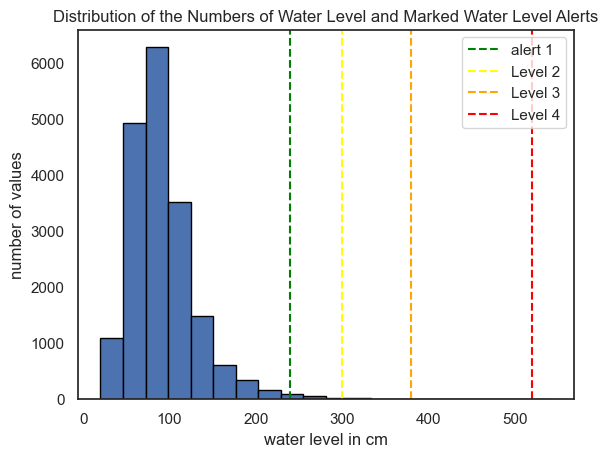

In [30]:
# plotting the distribution of all 4 water levels to have a better overview

plt.hist(df_river['level_max'], bins=20, edgecolor='black')
plt.axvline(x=alert_levels['level_1'], color='green', linestyle='--', label='alert 1')
plt.axvline(x=alert_levels['level_2'], color='yellow', linestyle='--', label='Level 2')
plt.axvline(x=alert_levels['level_3'], color='orange', linestyle='--', label='Level 3')
plt.axvline(x=alert_levels['level_4'], color='red', linestyle='--', label='Level 4')
plt.xlabel("water level in cm")
plt.ylabel("number of values")
plt.title("Distribution of the Numbers of Water Level and Marked Water Level Alerts")
plt.legend()
plt.show()

In [31]:
# now I want to identify and mark follwing days, where the water_levels are over 0
# new variable, that marks, if it is a flood event
df_river['is_flood_event'] = False

# creating groups for changes in water alert and setting counting integers
df_river['flood_group'] = (df_river['alert_level'] > 0).astype(int).diff().ne(0).cumsum()

# marking the days where water_alert > 0 as a flood event
df_river.loc[df_river['alert_level'] > 0, 'is_flood_event'] = True


<span style='color: yellow;'>It's great that you're doing this, very interesting. However, if you're reviewing outliers, probably this should be done outside this section on the analysis!</span><span style='color: green'>done</span>>

In [32]:
# now finding the beginning and ending of flood events:
# analyzing the flood groups, to later have a look into the flood events (for the comparison)
flood_groups = df_river[df_river['is_flood_event']].groupby('flood_group').agg({
    'date': ['min', 'max', 'count'],
    'alert_level': 'max'
}).reset_index()

flood_groups.columns = ['flood_group', 'start_date', 'end_date', 'duration', 'max_alert_level']
flood_groups

flood_group start_date   end_date  duration  max_alert_level
0             2 1974-07-18 1974-07-22         5                2
1             4 1975-07-01 1975-07-03         3                1
2             6 1976-06-02 1976-06-03         2                1
3             8 1977-08-01 1977-08-03         3                2
4            10 1978-07-05 1978-07-05         1                1
..          ...        ...        ...       ...              ...
57          116 2023-05-17 2023-05-18         2                1
58          118 2023-08-28 2023-08-31         4                2
59          120 2024-06-01 2024-06-08         8                2
60          122 2024-06-10 2024-06-11         2                1
61          124 2024-09-14 2024-09-19         6                2

[62 rows x 5 columns]

In [33]:
# creating a report, automatically in an html-file to get an overview:
profile_report = df_river.profile_report()
profile_report.to_file(output_file='river_output.html')
#profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style='color: red;'>I always suggest not use this type of profiling (at least, only to gather a sense of your data! Like for a personal use) I would remove this line if you already created it. If you want to use it and mention details of what is inside is fine. But comment it! Say something interesting about it!</span>
<span style='color: green;'>Yes, did it for personal use, to just get an overview. Like I wrote in the beginning I will remove it. But for now it is very convenient to get an idea of the variables, correlations etc.</span>

In [34]:
df_river_copy = df_river.copy()

<h2 id="reservoir"> B. Water Level Of The Reservoir "Sylvensteinspeicher"</h2>
<ol>
    <li>Concentating the all xlsx-files</li>
    <li> Deleting "Prüfstatus"</li>
    <li>Renaming all columns in translating them into English</li>
<ol>

In [35]:
# Reservoir "Sylvensteinspeicher" water level:
# the data is divided by 3 xlsx files:
# 1. beginning until 2023
# 2. 01/2024 until 10/2024
# 3. 11-01-2024 until 11-18-2024

path_reservoir_beginn_2023 = "../data/Sylvensteinspeicher/fluesse-wasserstand/16002500_beginn_bis_31.12.2023_tmw_0.xlsx"
path_reservoir_to_10_2023 = "../data/Sylvensteinspeicher/fluesse-wasserstand/16002500_01.01.2024_31.10.2024_tmw_0.xlsx"
path_reservoir_to_241118 = "../data/Sylvensteinspeicher/fluesse-wasserstand/16002500_01.11.2024_19.11.2024_tmw_0.xlsx"

df_reservoir = df_concat_excel(path_reservoir_beginn_2023, path_reservoir_to_10_2023, path_reservoir_to_241118)

dataframe for is completed. There are 23761 rows.


In [36]:
df_reservoir.info()
# There are few NaNs in maximum and minimum, the rest of the data is complete
# But: I have to check, if there are missing values/rows, because the data is recorded by day.
# All datatypes are right.

<class 'pandas.core.frame.DataFrame'>
Index: 23761 entries, 0 to 18
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datum       23761 non-null  datetime64[ns]
 1   Mittelwert  23761 non-null  int64         
 2   Maximum     23754 non-null  float64       
 3   Minimum     23754 non-null  float64       
 4   Prüfstatus  23761 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.1+ MB


In [37]:
df_reservoir = df_reservoir.drop(columns="Prüfstatus")

In [38]:
# deleting "Prüfstatus" ("validation status"), because for concentration of suspended solids there is only raw data, and the rest is limited, so I would lose a lot of data
# so for comparison reasons I decided to go ignore the status: DEFINITELY TO BE DISCUSSED!!! Because no I am realizing that I am mixing up... that procedure isn't consistent
df_reservoir = df_reservoir.rename(columns={'Datum' : 'date',
                              'Mittelwert' : 'reservoir_avg',
                              'Maximum' : 'reservoir_max',
                              'Minimum' : 'reservoir_min'})

In [39]:
df_reservoir.head(10)

date  reservoir_avg  reservoir_max  reservoir_min
0 1959-11-01            248          249.0          244.0
1 1959-11-02            248          251.0          247.0
2 1959-11-03            246          247.0          246.0
3 1959-11-04            248          249.0          246.0
4 1959-11-05            250          252.0          249.0
5 1959-11-06            253          253.0          252.0
6 1959-11-07            253          253.0          253.0
7 1959-11-08            252          253.0          250.0
8 1959-11-09            249          250.0          249.0
9 1959-11-10            249          250.0          248.0

In [40]:
df_reservoir_copy = df_reservoir.copy()

<h2 id="weather"> C. WEATHER </h2>
<p>Concentating the all xlsx-files</p>

<span style='color: red;'>It's WEATHER not WHEATHER!</span><br>
<span style='color: green;'>I KNOW!!! Just mixing it up all the time</span>

<span style='color: red;'>This code needs to be improved! In this case, as you have 7 files, I would recommend to use the library glob. We can do this together if you want. This is a great learning for you. However, you cannot read 7 files and concat them with a function that only allows you to concat 3 per time. At least, it would have been great to use a loop to concat them in groups of 3. However, as I said, here you need to use the glob library.</span><br>
<span style='color: green'> I will try to use it on my own, but it has a low priority. Maybe doing it together in a session</span>

In [41]:
# 6 xls files from 1958 to 2024
# paths:

path_weather_58_to_67 = "../data/weather/weather1958-1967.xlsx"
path_weather_68_to_77 = "../data/weather/weather1968-1977.xlsx"
path_weather_78_to_87 = "../data/weather/weather1978-1987.xlsx"
path_weather_88_to_97 = "../data/weather/weather1988-1997.xlsx"
path_weather_98_to_07 = "../data/weather/weather1998-2007.xlsx"
path_weather_08_to_17 = "../data/weather/weather2008-2017.xlsx"
path_weather_18_to_24 = "../data/weather/weather2018-241118.xlsx"

df_weather1 = df_concat_excel(path_weather_58_to_67, path_weather_68_to_77, path_weather_78_to_87)
df_weather2 = df_concat_excel(path_weather_88_to_97, path_weather_98_to_07, path_weather_08_to_17)
df_weather3 = pd.read_excel(path_weather_18_to_24)

df_weather = pd.concat([df_weather1, df_weather2, df_weather3])

dataframe for is completed. There are 10952 rows.
dataframe for is completed. There are 10952 rows.


<span style='color: red;'>Please, add a title and also the variables on the axis. This can be difficult to see if you don't understand the code. Explain what you see on the plots!</span>

<span style='color: red;'>I'm missing the steps you're doing again and why: checking data type, nulls, changing data types, etc.</span>

In [42]:
df_weather.info()
# There are NaNs in snow, wdir (wind direction), wspd (wind speed), wpgt (wind peak gust), pres (pressure) and tsun (total sunshine duration)
# I think, the NaNs in snow are just "O" - when there isn't snow, need to varify it in the section "handling NaNs"
# date is an object, I need to transform it into datetime format
# all other variables' datatypes are right

<class 'pandas.core.frame.DataFrame'>
Index: 24417 entries, 0 to 2512
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24417 non-null  object 
 1   tavg    24417 non-null  float64
 2   tmin    24417 non-null  float64
 3   tmax    24417 non-null  float64
 4   prcp    24417 non-null  float64
 5   snow    22849 non-null  float64
 6   wdir    9785 non-null   float64
 7   wspd    14490 non-null  float64
 8   wpgt    14475 non-null  float64
 9   pres    14554 non-null  float64
 10  tsun    24412 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.2+ MB


In [43]:
df_weather.head(10)

date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres   tsun
0  1958-01-01   0.9  -1.0   6.4   0.0   0.0   NaN   NaN   NaN   NaN  444.0
1  1958-01-02   0.8  -4.7   5.6   0.1   0.0   NaN   NaN   NaN   NaN  414.0
2  1958-01-03  -1.6  -2.2   0.6   0.8   0.0   NaN   NaN   NaN   NaN    0.0
3  1958-01-04  -5.4  -7.5  -2.0   0.9  10.0   NaN   NaN   NaN   NaN    0.0
4  1958-01-05   1.7  -5.2   4.0   6.8  10.0   NaN   NaN   NaN   NaN    0.0
5  1958-01-06   6.3   1.5   9.0  20.7   0.0   NaN   NaN   NaN   NaN  144.0
6  1958-01-07   3.3   1.9  11.3   4.3   0.0   NaN   NaN   NaN   NaN  156.0
7  1958-01-08   0.6  -1.6   2.4   1.1  30.0   NaN   NaN   NaN   NaN    0.0
8  1958-01-09   2.5   1.0   3.7   5.5  30.0   NaN   NaN   NaN   NaN    0.0
9  1958-01-10   1.4  -0.8   4.0   0.0   0.0   NaN   NaN   NaN   NaN  408.0

In [44]:
# formatting the column date into Panda's datetime-format
df_weather['date'] = pd.to_datetime(arg=df_weather['date'])
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24417 entries, 0 to 2512
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    24417 non-null  datetime64[ns]
 1   tavg    24417 non-null  float64       
 2   tmin    24417 non-null  float64       
 3   tmax    24417 non-null  float64       
 4   prcp    24417 non-null  float64       
 5   snow    22849 non-null  float64       
 6   wdir    9785 non-null   float64       
 7   wspd    14490 non-null  float64       
 8   wpgt    14475 non-null  float64       
 9   pres    14554 non-null  float64       
 10  tsun    24412 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.2 MB


In [45]:
# to get an overview of the data and correlations
profile_report = df_weather.profile_report()
profile_report.to_file(output_file='weather_output.html')

#profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
# Actually I want to remove wind direction, pressure and total sunshine duration, because these variables don't imply my data analysis. 
# Why? 
# 1. the wind direction and pressure have no influence to the suitability
# 2. the total sunshine duration is not a good factor, the air temperature is a better one, more accurate and sun duration correlates strong with the air temperature
# TO BE DISCUSSED!

In [47]:
df_weather_copy = df_weather.copy()

<h1 id="datacleaning"> V.) Data Cleaning </h1>

<h2 id="outliers"> A. Handling Outliers</h2>

In [48]:
# df_river: looking into every variable for outliers

#for col in df_river:
   # OutLiersBox(df_river, col)
# no outliers for water temperature
# flow_avg, min, max: upper limit
# level avg, min, max: upper limit
# concent_solids: upper limit


In [49]:
# checking, if there are outliers:
# looking into every variable for outliers

#for col in df_reservoir:
   # OutLiersBox(df_reservoir, col)

# outliers in all variables:
# avg: lower and upper limit
# max: only upper limit
# min: lower and upper limit

In [50]:
# checking, if there are outliers in the weather data:
# looking into every variable for outliers

#for col in df_weather:
 #  OutLiersBox(df_weather, col)

# outliers in: 
# tavg: lower limit
# tmin: lower limit
# tmax: lower limit
# prcp: upper limit
# snow: upper limit
# wspd: upper limit
# wpgt: upper limit
# pres: both

<span style='color: green;'>Great!! Here you explain the approach very well and what are going to be the nex steps!</span><br><span style='color: violet'>whoowhoo, thanks!!!</span>

<h3 id="approach">1. Approach</h3>

<h4> Dected Outliers:</h4>
<h5>River:</h5>
<li>flow_avg, min, max: upper limit</li>
<li> level avg, min, max: upper limit</li>
<li> concent_solids: upper limit</li>
<li> water temperature: no oultiers</li>

<h5>Reservoir "Sylvensteinspeicher"</h5>
<li>avg: lower and upper limit</li>
<li>max: only upper limit</li>
<li>min: lower and upper limit</li>

<h4>Procedure</h4>
<p> To have a good base of data it is important, to 1.) identify how much the outliers are implicating all statistical numbers and 2. to make sure, that the values are real and in this case that they aren't mistakes regarding to issues at the measuring station. To find that out the following steps are take:</p>
<h5>1. IQR - 75% quantile</h5>
<ol>
    <li>Marking the outliers as 'suspected'</li>
    <li>Comparing the medians of the datasat with and without outliers</li>
    <li>Checking the differences: should be under 10%</li>
    <li>Marking them as confirmed</li>
</ol>
<h5>2. IQR - 99% quantile to look for measurement mistakes</h5>
<ol>
    <li>Marking them as "suspected"</li>
    <li>Creating a variable with the values of water level alerts</li>
    <li>Comparing the outliers with flood events: if they are lying within a flood event: mark them as 'confirmed', if not as invalid'</li>

<p>Question for Sofía: Would you do this additionally for water level, water flow rate and suspended solids? They are correlating in generall. If the outliers also are correlating that it is very unlikely that there are outliers. I think especially for the concentration of suspended solids it might make sense, because I know about certain measuring problems!</p>

<span style='color: yellow;'>Probably this function could be directly on your FUNCTIONS_EDA file.</span><br>
<span style='color: green;'>I thought I "collect" in the external function file only functions that I will use a lot - over all this project. I don't think I will need that again!?!</span>

In [51]:
# function that marks the outlier of a variable using IQR 75% and 99%

def outliers_IQR_extreme(df, observed_col, is_outlier, is_outlier_extreme):

    # step 1: finding Q1, Q3, Q01, Q99 for calculating IQR
    Q1 = df[observed_col].quantile(.25) 
    Q3 = df[observed_col].quantile(.75)
    Q01 = df[observed_col].quantile(.01)
    Q99 = df[observed_col].quantile(.99)

    IQR = Q3 - Q1

    # step 2: calculating the lower and upper limmits to detect the outliers (lying outside these limits)

    lower_limit = Q1 - 1.5 * IQR
    lower_limit_99 = Q01 - 3 * IQR

    upper_limit = Q3 + 1.5 * IQR
    upper_limit_99 = Q99 + 3 * IQR
    
    # step 3: getting the amount of data of all outliers

    num_outliers_lower_limit = df[df[observed_col] < lower_limit]
    num_outliers_lower_limit_extreme = df[df[observed_col] < lower_limit_99]

    num_outliers_upper_limit = df[df[observed_col] > upper_limit]
    num_outliers_upper_limit_extreme = df[df[observed_col] > upper_limit_99]

    # step 4: marking all outliers (and also extreme outliers) as 'suspected'
    outlier_condition = ((df[observed_col] > upper_limit) | (df[observed_col] < lower_limit))
    df.loc[outlier_condition, is_outlier] = 'suspected'
    df[(df[is_outlier] == 'suspected')]
    df[is_outlier].value_counts()    

    outlier_extreme_condition = ((df[observed_col] > upper_limit_99) | (df[observed_col] < lower_limit_99))
    df.loc[outlier_extreme_condition, is_outlier_extreme] = 'suspected'
    df[(df[is_outlier_extreme] == 'suspected')]
    df[is_outlier_extreme].value_counts()   
    
    # printing the results for checking
    print("lower limit: ", lower_limit, "number of outliers: " , num_outliers_lower_limit.shape[0], "out of " ,df[observed_col].count(),
          "\nlower limit 99%: ", lower_limit_99, "number of outliers: " , num_outliers_lower_limit_extreme.shape[0], "out of " ,df[observed_col].count(),
          "\nupper limit: ", upper_limit, "number of outliers: " , num_outliers_upper_limit.shape[0], "out of " ,df[observed_col].count(),
          "\nupper limit 99%: ", upper_limit_99, "number of outliers: " , num_outliers_upper_limit_extreme.shape[0], "out of " ,df[observed_col].count(),
          "\noutliers:\n",   df[is_outlier].value_counts(),
          "\noutliers extreme (99% quantile):\n", df[is_outlier_extreme].value_counts())

<h3 id=outlierslevelmax> 2.) Water Level Maximum</h3>

In [52]:
# new columns for marking outliers:
df_river['is_outlier_level_max'] = 'normal'
df_river['is_outlier_level_max_extreme'] = 'normal'

In [53]:
# marking all outliers of water level (max)
outliers_IQR_extreme(df_river, 'level_max', 'is_outlier_level_max','is_outlier_level_max_extreme')

lower limit:  5.5 number of outliers:  0 out of  18646 
lower limit 99%:  -90.0 number of outliers:  0 out of  18646 
upper limit:  169.5 number of outliers:  850 out of  18646 
upper limit 99%:  361.0 number of outliers:  20 out of  18646 
outliers:
 is_outlier_level_max
normal       23275
suspected      850
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_level_max_extreme
normal       24105
suspected       20
Name: count, dtype: int64


<span style='color: red;'>Explain better what you're going to do here and why. It took me a while to understand the next steps.</span><br><span style='color: green'>done</span>

In [54]:
# function to check, if a date is lying within a flood event
def check_flood(date, flood_groups):
    for _, row in flood_groups.iterrows():  # iterating through all flood events
        if date >= row['start_date'] and date <= row['end_date']:
            return 'confirmed'  # date is lying within a flood event: 'confirmed'
    return 'invalid'  # date is lying outside a flood event: 'invalid'

## percentil 99% water level max


In [55]:
# looking into all suspected outliers of water level (max) and checking if the values are in between floods
df_river.loc[df_river['is_outlier_level_max_extreme'] == 'suspected', 'is_outlier_level_max_extreme'] = df_river.loc[
    df_river['is_outlier_level_max_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_level_max_extreme'].value_counts()

is_outlier_level_max_extreme
normal       24105
confirmed       20
Name: count, dtype: int64

<h3 id=outliersflowmax> 3.) Water Flow Rate Maximum</h2>

<span style='color: red;'>Explain a bit what have you found!!</span>

In [56]:
# new columns for the states of outliers:
df_river['is_outlier_flow_max'] = 'normal'
df_river['is_outlier_flow_max_extreme'] = 'normal'

In [57]:
# marking all outliers of flow rate (max)
outliers_IQR_extreme(df_river, 'flow_max', 'is_outlier_flow_max','is_outlier_flow_max_extreme')

lower limit:  -33.050000000000004 number of outliers:  0 out of  19742 
lower limit 99%:  -127.5 number of outliers:  0 out of  19742 
upper limit:  160.15 number of outliers:  1218 out of  19742 
upper limit 99%:  454.6700000000004 number of outliers:  51 out of  19742 
outliers:
 is_outlier_flow_max
normal       22907
suspected     1218
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_flow_max_extreme
normal       24074
suspected       51
Name: count, dtype: int64


<span style='color: red;'>Explain a bit what have you found!!</span><br>
<span style='color: green;'>done</span>

In [58]:
# Check, if the extreme outliers of flow rate (max) are lying in time of floods
df_river.loc[df_river['is_outlier_flow_max_extreme'] == 'suspected', 'is_outlier_flow_max_extreme'] = df_river.loc[
    df_river['is_outlier_flow_max_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_flow_max_extreme'].value_counts()

is_outlier_flow_max_extreme
normal       24074
confirmed       51
Name: count, dtype: int64

<span style='color: violet'>There are 1.218 outliers regarding 75% out of 19.742 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers are confirmed: they are all lying within flood events. So they will remain, as long as the impact on the median is not too big. I need this numbers to identify the maximum all over time.</b></span>

<h3 id="outlierslevelavg"> 4.) Water Level Average</h3>

<span style='color: red;'>Explain a bit what have you found!!</span><br>
<span style='color: green;'>done</span>

In [59]:
# new columns for the states of outliers:
df_river['is_outlier_level_avg'] = 'normal'
df_river['is_outlier_level_avg_extreme'] = 'normal'

In [60]:
# marking all outliers of water level (average)
outliers_IQR_extreme(df_river, 'level_avg', 'is_outlier_level_avg','is_outlier_level_avg_extreme')

lower limit:  -2.5 number of outliers:  0 out of  18646 
lower limit 99%:  -95.0 number of outliers:  0 out of  18646 
upper limit:  161.5 number of outliers:  667 out of  18646 
upper limit 99%:  335.0 number of outliers:  18 out of  18646 
outliers:
 is_outlier_level_avg
normal       23458
suspected      667
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_level_avg_extreme
normal       24107
suspected       18
Name: count, dtype: int64


In [61]:
# Check, if the extreme outliers of water level (average) are lying in time of floods
df_river.loc[df_river['is_outlier_level_avg_extreme'] == 'suspected', 'is_outlier_level_avg_extreme'] = df_river.loc[
    df_river['is_outlier_level_avg_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_level_avg_extreme'].value_counts()

is_outlier_level_avg_extreme
normal       24107
confirmed       18
Name: count, dtype: int64

<span style='color: violet'>There are 667 outliers regarding 75% out of 18.646 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers are confirmed: they are all lying within flood events. So they will remain, as long as the impact on the median is not too big. I need this numbers to identify the maximum all over time.</b></span>

<h3 id=outliersflowavg> 5.) Flow Rate Average</h3>

<span style='color: red;'>Explain a bit what have you found!!</span>

<span style='color: red;'>You have done five times the same process, using exactly the same functions. You should automate this into a for loop. We can talk about it if you don't know how to proceed.</span>

In [62]:
# new columns for the states of outliers:
df_river['is_outlier_flow_avg'] = 'normal'
df_river['is_outlier_flow_avg_extreme'] = 'normal'

In [63]:
# marking all outliers of flow rate (average)
outliers_IQR_extreme(df_river, 'flow_avg', 'is_outlier_flow_avg','is_outlier_flow_avg_extreme')

lower limit:  -36.85000000000001 number of outliers:  0 out of  24125 
lower limit 99%:  -123.50000000000001 number of outliers:  0 out of  24125 
upper limit:  146.75 number of outliers:  1330 out of  24125 
upper limit 99%:  399.70000000000005 number of outliers:  54 out of  24125 
outliers:
 is_outlier_flow_avg
normal       22795
suspected     1330
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_flow_avg_extreme
normal       24071
suspected       54
Name: count, dtype: int64


In [309]:
# Check, if the extreme outliers of flow rate (average) are lying in time of floods
df_river.loc[df_river['is_outlier_flow_avg_extreme'] == 'suspected', 'is_outlier_flow_avg_extreme'] = df_river.loc[
    df_river['is_outlier_flow_avg_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_flow_avg_extreme'].value_counts()

is_outlier_flow_avg_extreme
normal       24071
confirmed       43
invalid         11
Name: count, dtype: int64

<span style='color: violet'>There are 1.330 outliers regarding 75% out of 24.125 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> 43 of the extreme outliers are confirmed: they are all lying within flood events. So they will remain, as long as the impact on the median is not too big. I need this numbers to identify the maximum all over time.<br>
11 are invalid. The next step is look deepr into these 11 invalid values</b></span>

In [310]:
# Looking into the invalid outliers
df_outliers_flow_avg_extreme = df_river[df_river['is_outlier_flow_avg_extreme'] == 'invalid']
df_outliers_flow_avg_extreme

date  flow_avg  flow_max  flow_min  level_avg  level_max  \
2392 1965-05-20     432.0       NaN       NaN        NaN        NaN   
2414 1965-06-11     582.0       NaN       NaN        NaN        NaN   
2415 1965-06-12     569.0       NaN       NaN        NaN        NaN   
2416 1965-06-13     495.0       NaN       NaN        NaN        NaN   
2417 1965-06-14     458.0       NaN       NaN        NaN        NaN   
2418 1965-06-15     422.0       NaN       NaN        NaN        NaN   
2822 1966-07-24     485.0       NaN       NaN        NaN        NaN   
4300 1970-08-10     542.0       NaN       NaN        NaN        NaN   
4301 1970-08-11     485.0       NaN       NaN        NaN        NaN   
4302 1970-08-12     482.0       NaN       NaN        NaN        NaN   
4303 1970-08-13     437.0       NaN       NaN        NaN        NaN   

      level_min  concent_solids  water_temp_avg  water_temp_max  ...  \
2392        NaN             NaN             NaN             NaN  ...   
2414        NaN             NaN             NaN             NaN  ...   
2415        NaN             NaN             NaN             NaN  ...   
2416        NaN             NaN             NaN             NaN  ...   
2417        NaN             NaN             NaN             NaN  ...   
2418        NaN             NaN             NaN             NaN  ...   
2822        NaN          705.05             NaN             NaN  ...   
4300        NaN          927.90             NaN             NaN  ...   
4301        NaN          404.03             NaN             NaN  ...   
4302        NaN          350.17             NaN             NaN  ...   
4303        NaN          558.16             NaN             NaN  ...   

      is_flood_event  flood_group  is_outlier_level_max  \
2392           False            1                normal   
2414           False            1                normal   
2415           False            1                normal   
2416           False            1                normal   
2417           False            1                normal   
2418           False            1                normal   
2822           False            1                normal   
4300           False            1                normal   
4301           False            1                normal   
4302           False            1                normal   
4303           False            1                normal   

      is_outlier_level_max_extreme is_outlier_flow_max  \
2392                        normal              normal   
2414                        normal              normal   
2415                        normal              normal   
2416                        normal              normal   
2417                        normal              normal   
2418                        normal              normal   
2822                        normal              normal   
4300                        normal              normal   
4301                        normal              normal   
4302                        normal              normal   
4303                        normal              normal   

     is_outlier_flow_max_extreme is_outlier_level_avg  \
2392                      normal               normal   
2414                      normal               normal   
2415                      normal               normal   
2416                      normal               normal   
2417                      normal               normal   
2418                      normal               normal   
2822                      normal               normal   
4300                      normal               normal   
4301                      normal               normal   
4302                      normal               normal   
4303                      normal               normal   

     is_outlier_level_avg_extreme is_outlier_flow_avg  \
2392                       normal           suspected   
2414                       normal           suspected   
2415                       norm

<p>It is obvious that there are a lot of time rows and the water level alert is 0, because there are NaNs in level_max.<br>
Next step: searching for information about floods before.
</p> 

<span style='color: red;'>This dataframe should be done automatically with filters. Why are you doing this manually?</span><br>
<span style='color: green;'>I created a DataFrame with all officially recorded floods, before there are recorded in the measurement station.</span>

In [311]:
# Df with data of extreme values for flow rate and water level, to check if the outlier of flow avg are lying within the "official" floods, 
# because there are no data of water level maximum before 1972:
df_floods = pd.DataFrame(
    {
        "date" : ['2005-08-24', '1999-05-22', '2013-06-03', '1981-07-20', '1979-06-18', '1965-06-11'],
        "water_level_flood": [542, 469, 432, 424, 424, np.nan],
        "flow_rate_flood": [1050, 830, 761, np.nan, 728, 705]},
        index=[1,2,3,4,5,6])
df_floods

date  water_level_flood  flow_rate_flood
1  2005-08-24              542.0           1050.0
2  1999-05-22              469.0            830.0
3  2013-06-03              432.0            761.0
4  1981-07-20              424.0              NaN
5  1979-06-18              424.0            728.0
6  1965-06-11                NaN            705.0

<span style='color: red;'>What are you trying to do here? I need more details, it was hard to understand!</span><br>
<span style='color: green;'>Checking "manually", if the outliers are lying within flood events before 1972</span>

In [312]:
# Checking, if the invalid outliers of flow rate avg are lying in between official flood events before 1972 or are within a daterow
# Condition for checking if the date of the extreme outliers of flow rate averages are lying within the floods before 1972 (which I manually created, because there were no data to download)
cond_flood_event = df_outliers_flow_avg_extreme['date'].isin(df_floods['date'])
# Creating a new column that calculates the differences between the dates to identify time rows
df_outliers_flow_avg_extreme['date_diff'] = df_outliers_flow_avg_extreme['date'].diff().dt.days
# Condition for filtering time rows: differences of the dates = 1
cond_date_rows = df_outliers_flow_avg_extreme['date_diff'] == 1

# if the first or second condition is true: set the outlier "confirmed"
df_outliers_flow_avg_extreme.loc[cond_flood_event | cond_date_rows, 'is_outlier_flow_avg_extreme'] = 'confirmed'
# if not, then set it 'invalid'
df_outliers_flow_avg_extreme.loc[~(cond_flood_event | cond_date_rows), 'is_outlier_flow_avg_extreme'] = 'invalid'

df_outliers_flow_avg_extreme[['date', 'flow_avg', 'is_outlier_flow_avg_extreme']]

date  flow_avg is_outlier_flow_avg_extreme
2392 1965-05-20     432.0                     invalid
2414 1965-06-11     582.0                   confirmed
2415 1965-06-12     569.0                   confirmed
2416 1965-06-13     495.0                   confirmed
2417 1965-06-14     458.0                   confirmed
2418 1965-06-15     422.0                   confirmed
2822 1966-07-24     485.0                     invalid
4300 1970-08-10     542.0                     invalid
4301 1970-08-11     485.0                   confirmed
4302 1970-08-12     482.0                   confirmed
4303 1970-08-13     437.0                   confirmed

<span style='color: violet'>There are still 3 invalid outliers, which cannot be related to flood events.<br><br>
<b> To be discussed with Sofía</b></span>

In [372]:
# filtering the 3 invalid outliers:
df_river['is_outlier_level_avg_extreme'].value_counts()

is_outlier_level_avg_extreme
normal       24107
confirmed       18
Name: count, dtype: int64

<h3 id="outliersconcent">6.) Concentration Of Suspended Solids</h3>

<span style='color: red;'>Explain a bit what have you found!!</span>

In [313]:
# creating 2 new variables for the outliers
df_river['is_outlier_concent_solids'] = 'normal'
df_river['is_outlier_concent_solids_extreme'] = 'normal'

In [314]:
# marking all outliers of the water pollution:
outliers_IQR_extreme(df_river, 'concent_solids', 'is_outlier_concent_solids','is_outlier_concent_solids_extreme')

lower limit:  -14.005000000000004 number of outliers:  0 out of  21250 
lower limit 99%:  -40.92000000000001 number of outliers:  0 out of  21250 
upper limit:  42.275000000000006 number of outliers:  1880 out of  21250 
upper limit 99%:  293.89059999999995 number of outliers:  146 out of  21250 
outliers:
 is_outlier_concent_solids
normal       22245
suspected     1880
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_concent_solids_extreme
normal       23979
suspected      146
Name: count, dtype: int64


<span style='color: violet'>note: there is a very big difference between the two upper limits!<br>
Do I need to do something about it? Question for Sofá</span>

In [315]:
# looking into the extreme outliers of the water pollution, if they are lying within flood event:
df_river.loc[df_river['is_outlier_concent_solids_extreme'] == 'suspected', 'is_outlier_concent_solids_extreme'] = df_river.loc[
    df_river['is_outlier_concent_solids_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_river['is_outlier_concent_solids_extreme'].value_counts()

is_outlier_concent_solids_extreme
normal       23979
invalid        108
confirmed       38
Name: count, dtype: int64

In [316]:
# There's a note on the website that there are problems with the measurement station of suspended solids
# since July of 2024. Therefor they have to be replaced, removed (question for Sofía? see also note 2 lines further)
# filtering all extreme outliers after 2024-07-01:
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & (df_river['date'] > '2024-07-01')][['date', 'concent_solids', 'is_outlier_concent_solids_extreme']]

date  concent_solids is_outlier_concent_solids_extreme
23998 2024-07-15         1119.19                           invalid
23999 2024-07-16         2000.86                           invalid
24000 2024-07-17         2000.42                           invalid
24001 2024-07-18         2000.53                           invalid
24002 2024-07-19         2000.78                           invalid
24003 2024-07-20         2000.51                           invalid
24004 2024-07-21         2000.97                           invalid
24005 2024-07-22         2000.41                           invalid
24006 2024-07-23         2000.49                           invalid
24007 2024-07-24         2000.71                           invalid
24008 2024-07-25         2000.31                           invalid
24009 2024-07-26         2000.84                           invalid
24010 2024-07-27         2000.45                           invalid
24011 2024-07-28         2000.71                           invalid
24012 2024-07-29         1252.34                           invalid
24013 2024-07-30          487.79                           invalid
24014 2024-07-31          487.81                           invalid
24015 2024-08-01          487.85                           invalid
24016 2024-08-02          487.84                           invalid
24017 2024-08-03          487.82                           invalid
24018 2024-08-04          487.80                           invalid
24019 2024-08-05          487.80                           invalid
24020 2024-08-06          487.84                           invalid
24021 2024-08-07          487.87                           invalid
24022 2024-08-08          487.86                           invalid
24023 2024-08-09          487.82                           invalid
24024 2024-08-10          487.86                           invalid
24025 2024-08-11          487.91                           invalid
24026 2024-08-12          487.95                           invalid
24027 2024-08-13          487.97                           invalid
24028 2024-08-14          487.96                           invalid
24029 2024-08-15          487.95                           invalid
24030 2024-08-16          487.95                           invalid
24031 2024-08-17          487.97                           invalid
24032 2024-08-18          487.88                           invalid
24033 2024-08-19          487.77                           invalid
24034 2024-08-20          487.72                           invalid
24035 2024-08-21          481.78                           invalid

In [317]:
# looking into the extreme outliers before 24-07-01:
df_river[(df_river['is_outlier_concent_solids_extreme'] == "invalid") & (df_river['date'] <= '2024-07-01')][['date', 'concent_solids', 'is_outlier_concent_solids_extreme']]
# 70 rows - a lot

date  concent_solids is_outlier_concent_solids_extreme
2736  1966-04-29          564.26                           invalid
2765  1966-05-28          403.73                           invalid
2766  1966-05-29          378.02                           invalid
2798  1966-06-30          470.49                           invalid
2821  1966-07-23         1059.96                           invalid
...          ...             ...                               ...
20364 2014-08-03          397.11                           invalid
20365 2014-08-04          381.58                           invalid
23357 2022-10-13          538.11                           invalid
23827 2024-01-26          774.61                           invalid
23981 2024-06-28          294.36                           invalid

[70 rows x 3 columns]

<span style='color: red;'>Mention this! This is very important! </span>

<span style='color: violet'>
<p><b>Note:</b></p>
<ul>
    <li>since July 2024 the measuring station is shut down because of technical issues</li>
    <li>I would delete them</li>
    <li>in the following histogram you can see a very strange distribution... I don't know how to interprete it</li>
    <li>the medians (with and without outliers 75%) differ about 7%: that would be ok.</li>
    <li>the outliers within 99% quantile couldn't be totally confirmed, but if I delete all values of 2024, there are 70 left</li>
</span>

<span style='color: red;'>Please, add a title, variable names, etc on the plot!</span><br>
<span style='color: green;'>done</span>

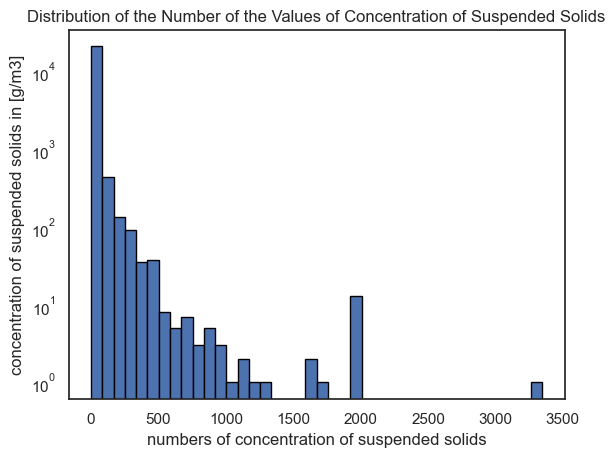

In [318]:
plt.hist(df_river['concent_solids'], bins=40,log=True, edgecolor='black')
plt.title("Distribution of the Number of the Values of Concentration of Suspended Solids")
plt.xlabel("numbers of concentration of suspended solids")
plt.ylabel("concentration of suspended solids in [g/m3]")
plt.show()

<span style='color: red;'>I have the feeling this plot doesn't go here. You haven't handle missing values/outlier yet, but you're already looking in to relationship between variables? So, if you have any comments about why this is here, you can leave it if it makes sense, but explain why!</span><br>
<span style='color: green;'>Totally agreed! Just forgotten to move it to the NaNs-Section. I want to look into the correlations between flow rate, water level and suspended solids. If there is in general a correlation, than I could look into the outliers. And if there is also a correlation, it could be plausible and proving them as "real" (no mistaken) values. It was just an idea, and maybe it leads nowhere...</span>

<AxesSubplot:xlabel='flow_avg', ylabel='level_avg'>

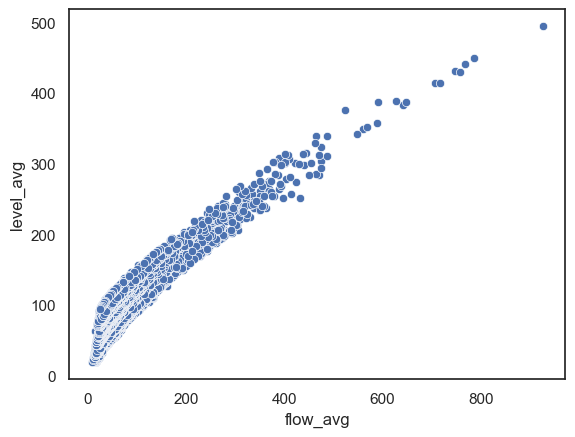

In [319]:
# looking into correlations flow_rate and water_level,
sns.scatterplot(data=df_river, x='flow_avg', y='level_avg')

<h3 id="outliersreservoir"> 7.) Reservoir Sylvenstein Water Level</h3>

<span style='color: red;'>This could be done on a for loop (creating all these columns and filling them with the string 'normal'.</span>
<br><span style='color: green;'>yes, reserved for later ;)  see the task in clickup</span>
<span style='color: red;'>Explain what you're doing!</span>
<br><span style='color: green;'>done</span>


In [320]:
# creating new variables for the outliers of each variable for outliers and "extreme" outliers
df_reservoir['is_outlier_reservoir_avg'] = 'normal'
df_reservoir['is_outlier_reservoir_avg_extreme'] = 'normal'
df_reservoir['is_outlier_reservoir_max'] = 'normal'
df_reservoir['is_outlier_reservoir_max_extreme'] = 'normal'
df_reservoir['is_outlier_reservoir_min'] = 'normal'
df_reservoir['is_outlier_reservoir_min_extreme'] = 'normal'

In [321]:
# marking all outliers of water level of the reservoir (average)
outliers_IQR_extreme(df_reservoir, 'reservoir_avg', 'is_outlier_reservoir_avg', 'is_outlier_reservoir_avg_extreme')

lower limit:  229.0 number of outliers:  197 out of  23761 
lower limit 99%:  199.0 number of outliers:  0 out of  23761 
upper limit:  269.0 number of outliers:  1788 out of  23761 
upper limit 99%:  349.0 number of outliers:  72 out of  23761 
outliers:
 is_outlier_reservoir_avg
normal       21776
suspected     1985
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_reservoir_avg_extreme
normal       23689
suspected       72
Name: count, dtype: int64


In [322]:
# looking into the extreme outliers of water level of the reservoir (average), if they are lying within flood event:
df_reservoir.loc[df_reservoir['is_outlier_reservoir_avg_extreme'] == 'suspected', 'is_outlier_reservoir_avg_extreme'] = df_reservoir.loc[
    df_reservoir['is_outlier_reservoir_avg_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_reservoir['is_outlier_reservoir_avg_extreme'].value_counts()

is_outlier_reservoir_avg_extreme
normal       23689
confirmed       45
invalid         27
Name: count, dtype: int64

<span style='color: violet'>There are 1985 outliers regarding 75% out of 23.761 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers: 45 are confirmed (they are lying within flood events), 27 are set "invalid": TO BE DISCUSSED: WHAT DOING NOW?</b></span>

In [323]:
# marking all outliers of water level of the reservoir (maximum)
outliers_IQR_extreme(df_reservoir, 'reservoir_max', 'is_outlier_reservoir_max', 'is_outlier_reservoir_max_extreme')

lower limit:  226.0 number of outliers:  0 out of  23754 
lower limit 99%:  193.0 number of outliers:  0 out of  23754 
upper limit:  274.0 number of outliers:  1835 out of  23754 
upper limit 99%:  369.0 number of outliers:  67 out of  23754 
outliers:
 is_outlier_reservoir_max
normal       21926
suspected     1835
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_reservoir_max_extreme
normal       23694
suspected       67
Name: count, dtype: int64


In [324]:
# looking into the extreme outliers of the water level of the reservoir (maximum), if they are lying within flood event:
df_reservoir.loc[df_reservoir['is_outlier_reservoir_max_extreme'] == 'suspected', 'is_outlier_reservoir_max_extreme'] = df_reservoir.loc[
    df_reservoir['is_outlier_reservoir_max_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_reservoir['is_outlier_reservoir_max_extreme'].value_counts()

is_outlier_reservoir_max_extreme
normal       23694
confirmed       41
invalid         26
Name: count, dtype: int64

<span style='color: violet'>There are 1835 outliers regarding 75% out of 23.754 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers: 41 are confirmed (they are lying within flood events), 21 are set "invalid": TO BE DISCUSSED: WHAT DOING NOW?</b></span>

In [325]:
# marking all outliers of water level of the reservoir (minimum)
outliers_IQR_extreme(df_reservoir, 'reservoir_min', 'is_outlier_reservoir_min','is_outlier_reservoir_min_extreme')

lower limit:  228.0 number of outliers:  80 out of  23754 
lower limit 99%:  198.0 number of outliers:  0 out of  23754 
upper limit:  268.0 number of outliers:  1448 out of  23754 
upper limit 99%:  338.0 number of outliers:  70 out of  23754 
outliers:
 is_outlier_reservoir_min
normal       22233
suspected     1528
Name: count, dtype: int64 
outliers extreme (99% quantile):
 is_outlier_reservoir_min_extreme
normal       23691
suspected       70
Name: count, dtype: int64


In [326]:
# looking into the extreme outliers of water level of the reservoir (minimum), if they are lying within flood event:
df_reservoir.loc[df_reservoir['is_outlier_reservoir_min_extreme'] == 'suspected', 'is_outlier_reservoir_min_extreme'] = df_reservoir.loc[
    df_reservoir['is_outlier_reservoir_min_extreme'] == 'suspected', 'date'
].apply(lambda date: check_flood(date, flood_groups))
df_reservoir['is_outlier_reservoir_min_extreme'].value_counts()

is_outlier_reservoir_min_extreme
normal       23691
confirmed       40
invalid         30
Name: count, dtype: int64

<span style='color: violet'>There are 1.528 outliers regarding 75% out of 23.754 rows. I will look into them later to compare the medians with and without outliers and find out, if there is a huge impact on the median if by excluding the outliers.<br><br>
<b> Extreme outliers: 40 are confirmed (they are lying within flood events), 30 are set "invalid": TO BE DISCUSSED: WHAT DOING NOW?</b></span>

<h3 id="outliersweather"> 8.) Outliers Weather</h3>

In [327]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24417 entries, 0 to 2512
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    24417 non-null  datetime64[ns]
 1   tavg    24417 non-null  float64       
 2   tmin    24417 non-null  float64       
 3   tmax    24417 non-null  float64       
 4   prcp    24417 non-null  float64       
 5   snow    22849 non-null  float64       
 6   wdir    9785 non-null   float64       
 7   wspd    14490 non-null  float64       
 8   wpgt    14475 non-null  float64       
 9   pres    14554 non-null  float64       
 10  tsun    24412 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 2.2 MB


<span style='color: red;'>This could be done on a for loop (creating all these columns and filling them with the string 'normal').</span><br>
<span style='color: green;'>Yes, later (I created a task in cklick-up with low priority)</span><br>
<span style='color: red;'>Explain what you're doing!</span>

In [328]:
# creating new variables for marking the outliers. Setting the default value to "normal"
df_weather['is_outlier_tavg'] = 'normal'
df_weather['is_outlier_tmin'] = 'normal'
df_weather['is_outlier_tmax'] = 'normal'
df_weather['is_outlier_prcp'] = 'normal'
df_weather['is_outlier_snow'] = 'normal'
df_weather['is_outlier_wspd'] = 'normal'
df_weather['is_outlier_wpgt'] = 'normal'
df_weather['is_outlier_pres'] = 'normal'

<span style='color: red;'>What is the difference with the previous one?</span><br>
<span style='color: green;'>I called it "normal", because I am only checking the common Quantiles 25% and 75%. I don't need that for the  weather, because I don't have the same requirments as for ther river data and reservoir.</span>

<span style='color: yellow;'>Probably adding this to the functions EDA would be better.</span><br>
<span style='color: green;'>same queastion: the function is so special, don't think I will nee that again... but maybe this one I could need. TO BE DISCUSSED WITH SOFÍA.</span>


In [329]:
# function that marks the outlier of a variable using IQR

def outliers_IQR_normal(df, observed_col, is_outlier):

    # step 1: finding Q1, Q3, Q01, Q99 for calculating IQR
    Q1 = df[observed_col].quantile(.25) 
    Q3 = df[observed_col].quantile(.75)

    IQR = Q3 - Q1

    # step 2: calculating the lower and upper limmits to detect the outliers (lying outside these limits)

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # step 3: getting the amount of data of all outliers

    num_outliers_lower_limit = df[df[observed_col] < lower_limit]

    num_outliers_upper_limit = df[df[observed_col] > upper_limit]

    # step 4: marking all outliers (and also extreme outliers) as 'suspected'
    outlier_condition = ((df[observed_col] > upper_limit) | (df[observed_col] < lower_limit))
    df.loc[outlier_condition, is_outlier] = 'suspected'
    df[(df[is_outlier] == 'suspected')]
    df[is_outlier].value_counts()     
    
    # printing the results for checking
    print("lower limit: ", lower_limit, "number of outliers: " , num_outliers_lower_limit.shape[0], "out of " ,df[observed_col].count(),
          "\nupper limit: ", upper_limit, "number of outliers: " , num_outliers_upper_limit.shape[0], "out of " ,df[observed_col].count(),
          "\noutliers:\n",   df[is_outlier].value_counts())

In [330]:
# Pseudo-code (later!): To not write so much times the same (as following for all variables of weather)
# one dataframe, of what all variables need one outlier-column
# loop through the dataframe
# using outliers_IQR_normal 
# - marking the outliers
# - printing the results
# but how to get the right outlier-variable?

<span style='color: green'>Do I really need to document the results of all this following code sections? It feels so redundant :(</span)>

In [331]:
# Marking all outliers for the average air temperature:
outliers_IQR_normal(df_weather, 'tavg', 'is_outlier_tavg')

lower limit:  -15.000000000000002 number of outliers:  10 out of  24417 
upper limit:  34.6 number of outliers:  0 out of  24417 
outliers:
 is_outlier_tavg
normal       24407
suspected       10
Name: count, dtype: int64


In [332]:
# Marking all outliers for the minimums of air temperature:
outliers_IQR_normal(df_weather, 'tmin', 'is_outlier_tmin')

lower limit:  -15.850000000000001 number of outliers:  48 out of  24417 
upper limit:  27.75 number of outliers:  0 out of  24417 
outliers:
 is_outlier_tmin
normal       24369
suspected       48
Name: count, dtype: int64


In [333]:
# Marking all outliers for the maximums of air temperature:
outliers_IQR_normal(df_weather, 'tmax', 'is_outlier_tmax')

lower limit:  -14.249999999999998 number of outliers:  3 out of  24417 
upper limit:  42.15 number of outliers:  0 out of  24417 
outliers:
 is_outlier_tmax
normal       24414
suspected        3
Name: count, dtype: int64


In [334]:
# Marking all outliers for the precipitation:
outliers_IQR_normal(df_weather, 'prcp', 'is_outlier_prcp')

lower limit:  -3.9000000000000004 number of outliers:  0 out of  24417 
upper limit:  6.5 number of outliers:  3147 out of  24417 
outliers:
 is_outlier_prcp
normal       21270
suspected     3147
Name: count, dtype: int64


In [335]:
df_weather[df_weather['prcp'] == 0]['prcp'].count()

12428

Text(0, 0.5, 'Sum of the Precipitation')

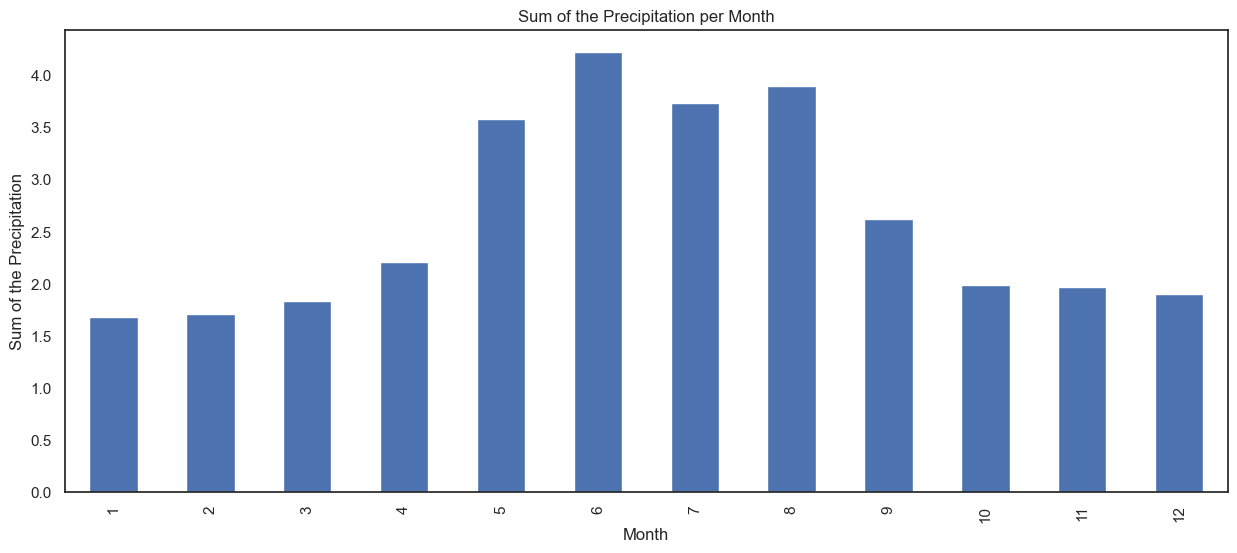

In [336]:
prcp_per_month = df_weather.groupby(df_weather['date'].dt.month)['prcp'].mean()
plt.figure(figsize=(15, 6))
prcp_per_month.plot(kind='bar')
plt.title('Sum of the Precipitation per Month')
plt.xlabel('Month')
plt.ylabel('Sum of the Precipitation')

In [337]:
# snow depth hast to be handled in a different way, because the column is only filled, when there is snow. Then I need to filter the data and just look into filtered data
# first I will take a look into the sums of the snow depth per month

snow_per_month = df_weather.groupby(df_weather['date'].dt.month)['snow'].sum()
snow_per_month


date
1     79960.0
2     62140.0
3     27250.0
4      2720.0
5        10.0
6         0.0
7         0.0
8         0.0
9         0.0
10      170.0
11    11920.0
12    45170.0
Name: snow, dtype: float64

Text(0, 0.5, 'Sum of the Snow Depth')

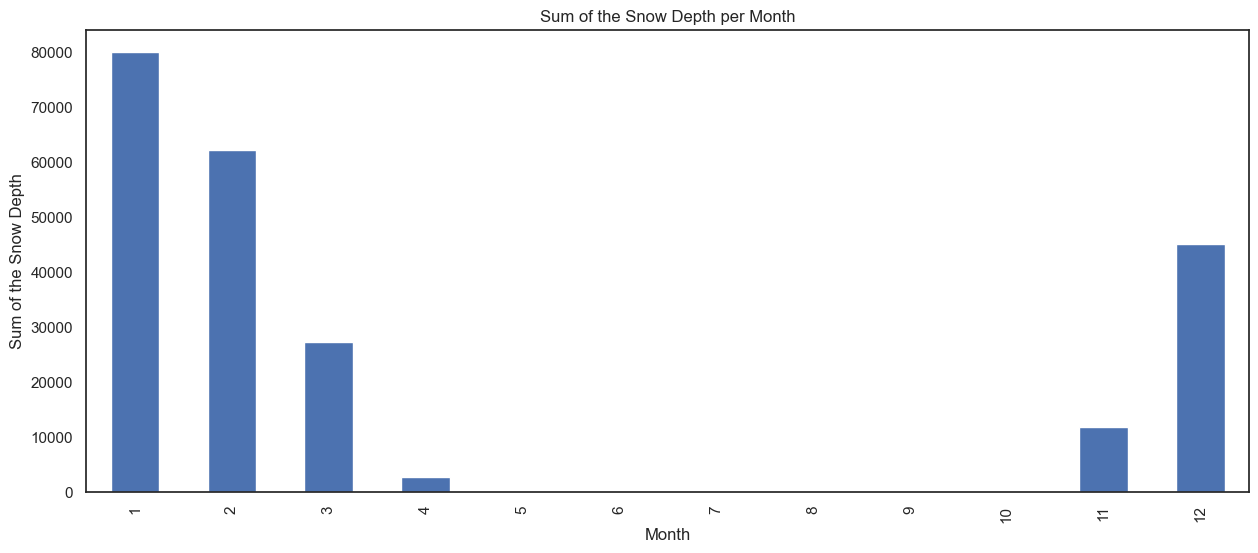

In [338]:
# plotting the distribution to get a better overview:
plt.figure(figsize=(15, 6))
snow_per_month.plot(kind='bar')
plt.title('Sum of the Snow Depth per Month')
plt.xlabel('Month')
plt.ylabel('Sum of the Snow Depth')

In [339]:
# now looking into the NaNs per month. 
df_nans_snow = df_weather['snow'].isna().groupby(df_weather['date'].dt.month).sum()

Text(0, 0.5, 'Number of NaNs in Snow Depth')

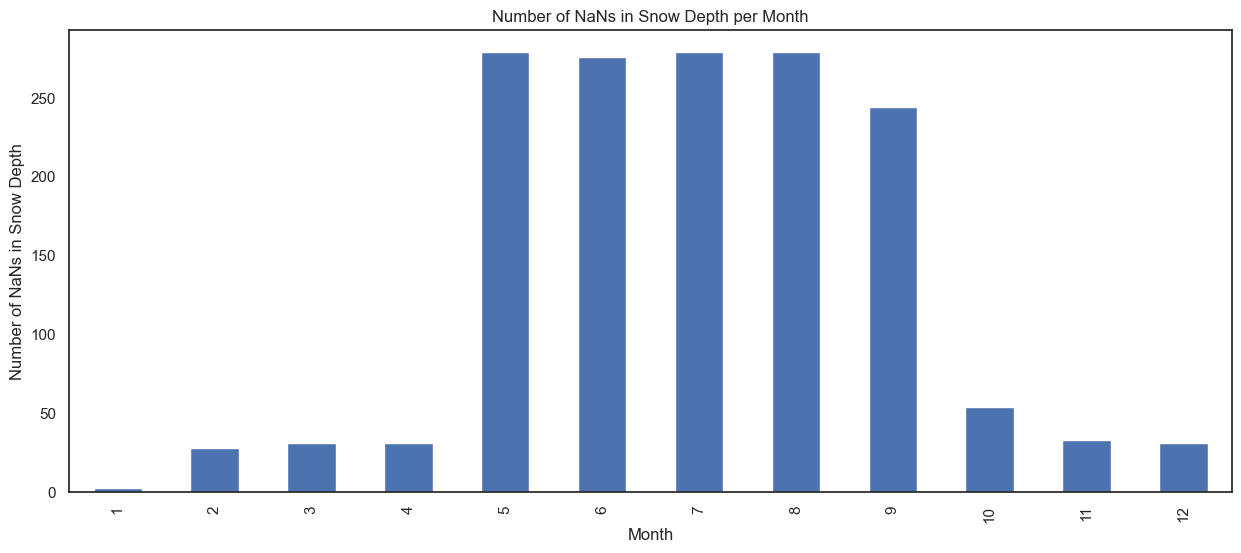

In [340]:
# plotting it to get a better overview:
plt.figure(figsize=(15, 6))
df_nans_snow.plot(kind='bar')
plt.title('Number of NaNs in Snow Depth per Month')
plt.xlabel('Month')
plt.ylabel('Number of NaNs in Snow Depth')

<span style='color: violet'>As you can see: There are "real" NaNs to handle, but from June to September, there is no snow.<br>
So I will exclude the months June to September for checking the outliers and the medians</span>
<span style='color: violet'>
<b>Steps to do:</b>
<ol>
    <li>Filtering the months by excluding June to September</li>
    <li>Looking into the outliers of the filtered DataFrame, correct it.</li>
    <li>Calculating the medians like I did with rest of the variables</li> 
</ol>
</span>

In [341]:
# DataFrame excluding June to September and looking only into the values > 0
df_snow_wintertime = df_weather[((df_weather['date'].dt.month < 6) | (df_weather['date'].dt.month >9)) & (df_weather['snow']>0)][['date','snow']]
df_snow_wintertime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3095 entries, 3 to 2211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3095 non-null   datetime64[ns]
 1   snow    3095 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 72.5 KB


In [342]:
# checking the outliers only for wintertime
outliers_IQR_normal(df_snow_wintertime, 'snow', 'is_outlier_snow')

lower limit:  -75.0 number of outliers:  0 out of  3095 
upper limit:  205.0 number of outliers:  171 out of  3095 
outliers:
 is_outlier_snow
suspected    171
Name: count, dtype: int64


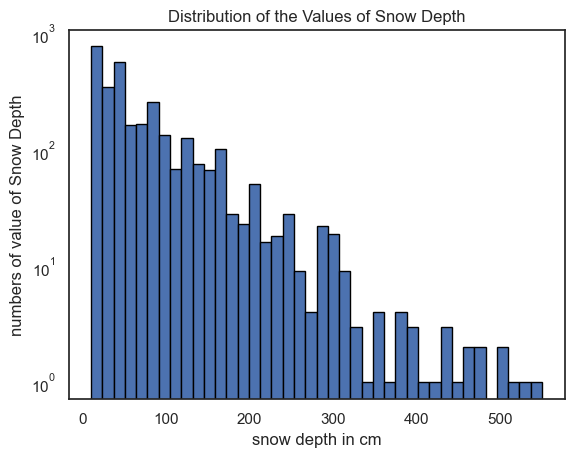

In [343]:
# the  lower and upper limit = 0. That couldn't be right
# Looking first into the distribution of all values of snow depth:
plt.hist(df_snow_wintertime['snow'], bins=40,log=True, edgecolor='black')
plt.title("Distribution of the Values of Snow Depth")
plt.ylabel("numbers of value of Snow Depth")
plt.xlabel("snow depth in cm")
plt.show()
# the Histogram shows that there are a lot "0" for snow depth.
# I decided only to look into the days, where the snow depth is > 0. So I adapted the filter

In [344]:
# Marking all outliers in wind speed:
outliers_IQR_normal(df_weather, 'wspd', 'is_outlier_wspd')

lower limit:  -1.5499999999999998 number of outliers:  0 out of  14490 
upper limit:  18.849999999999998 number of outliers:  603 out of  14490 
outliers:
 is_outlier_wspd
normal       23814
suspected      603
Name: count, dtype: int64


In [345]:
# Marking all outliers in wind peak gust:
outliers_IQR_normal(df_weather, 'wpgt', 'is_outlier_wpgt')

lower limit:  -4.599999999999998 number of outliers:  0 out of  14475 
upper limit:  69.0 number of outliers:  497 out of  14475 
outliers:
 is_outlier_wpgt
normal       23920
suspected      497
Name: count, dtype: int64


In [346]:
# Marking all outliers in pressure:
outliers_IQR_normal(df_weather, 'pres', 'is_outlier_pres')

lower limit:  996.6 number of outliers:  179 out of  14554 
upper limit:  1036.6 number of outliers:  118 out of  14554 
outliers:
 is_outlier_pres
normal       24120
suspected      297
Name: count, dtype: int64


<h3 id=comparingmedian> 9.) Comparing the median of data with and without the outliers</h2>

<h4 id=coomparingriver>9.1.) Comparing The Medians Of The River Data </h4>

In [347]:
# function to find out all the difference of the medians:

def diff_median(median_incl, median_excl):
    median1 = median_incl.median()
    median2 = median_excl.median()
    
    diff_median_perc = (median1 - median2)/median1 * 100
    print("general median: ", median1, "\nmedian excluding outliers: ", median2,
        "\nThe general mean differs ", round(diff_median_perc, 2), ' percent from the median of the data excluding the outliers')

In [348]:
# water level max:
diff_median(df_river['level_max'],df_river[df_river['is_outlier_level_max'] != 'suspected']['level_max'])

general median:  86.0 
median excluding outliers:  84.0 
The general mean differs  2.33  percent from the median of the data excluding the outliers


In [349]:
# water level avg:
diff_median(df_river['level_avg'], df_river[df_river['is_outlier_level_avg'] != 'suspected']['level_avg'])

general median:  78.0 
median excluding outliers:  76.0 
The general mean differs  2.56  percent from the median of the data excluding the outliers


In [350]:
# flow rate max:
diff_median(df_river['flow_max'], df_river[df_river['is_outlier_flow_max'] != 'suspected']['flow_max'])

general median:  59.2 
median excluding outliers:  56.6 
The general mean differs  4.39  percent from the median of the data excluding the outliers


In [351]:
# flow rate avg:
diff_median(df_river['flow_avg'], df_river[df_river['is_outlier_flow_avg'] != 'suspected']['flow_avg'])

general median:  51.2 
median excluding outliers:  48.7 
The general mean differs  4.88  percent from the median of the data excluding the outliers


In [352]:
# concentration of suspended solids:
diff_median(df_river['concent_solids'], df_river[df_river['is_outlier_concent_solids'] != 'suspected']['concent_solids'])

general median:  12.02 
median excluding outliers:  11.11 
The general mean differs  7.57  percent from the median of the data excluding the outliers


In [353]:
# reservoir water level avg:
diff_median(df_reservoir['reservoir_avg'], df_reservoir[df_reservoir['is_outlier_reservoir_avg'] != 'suspected']['reservoir_avg'])

general median:  249.0 
median excluding outliers:  249.0 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [354]:
# reservoir water level max:
diff_median(df_reservoir['reservoir_max'], df_reservoir[df_reservoir['is_outlier_reservoir_max'] != 'suspected']['reservoir_max'])

general median:  250.0 
median excluding outliers:  249.0 
The general mean differs  0.4  percent from the median of the data excluding the outliers


<h4 id=comparingweather>9.2.) Comparing The Medians Of The Weather Data </h4>

In [355]:
# reservoir water level min:
diff_median(df_reservoir['reservoir_min'], df_reservoir[df_reservoir['is_outlier_reservoir_min'] != 'suspected']['reservoir_min'])

general median:  249.0 
median excluding outliers:  248.0 
The general mean differs  0.4  percent from the median of the data excluding the outliers


In [356]:
# weather: tavg
diff_median(df_weather['tavg'], df_weather[df_weather['is_outlier_tavg'] != 'suspected']['tavg'])

general median:  10.0 
median excluding outliers:  10.0 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [357]:
# weather: tmin
diff_median(df_weather['tmin'], df_weather[df_weather['is_outlier_tmin'] != 'suspected']['tmin'])

general median:  6.0 
median excluding outliers:  6.0 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [358]:
# weather: tmax
diff_median(df_weather['tmax'], df_weather[df_weather['is_outlier_tmax'] != 'suspected']['tmax'])

general median:  14.4 
median excluding outliers:  14.4 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [359]:
# weather: snow (only wintertimes and values > 0, see section "outliers")
diff_median(df_snow_wintertime['snow'], df_snow_wintertime[df_snow_wintertime['is_outlier_snow'] != 'suspected']['snow'])
# it seems NaNs equal "0", only if there is snow you the columns contains values, so I need to investigate the available data, finding out, if there are outliers and check the medians

general median:  50.0 
median excluding outliers:  50.0 
The general mean differs  0.0  percent from the median of the data excluding the outliers


In [360]:
df_weather['prcp'].median()
diff_median(df_weather['prcp'], df_weather[df_weather['is_outlier_prcp'] != 'suspected']['prcp'])
# it seems NaNs equal "0", only if there is snow you the columns contains values, so I need to investigate the available data, finding out, if there are outliers and check the medians

general median:  0.0 
median excluding outliers:  0.0 
The general mean differs  nan  percent from the median of the data excluding the outliers


In [361]:
# weather:wspd
diff_median(df_weather['wspd'], df_weather[df_weather['is_outlier_wspd'] != 'suspected']['wspd'])

general median:  8.3 
median excluding outliers:  7.9 
The general mean differs  4.82  percent from the median of the data excluding the outliers


In [362]:
# weather: wpgt
diff_median(df_weather['wpgt'], df_weather[df_weather['is_outlier_wpgt'] != 'suspected']['wpgt'])

general median:  30.6 
median excluding outliers:  29.9 
The general mean differs  2.29  percent from the median of the data excluding the outliers


In [363]:
# weather: pres
diff_median(df_weather['pres'], df_weather[df_weather['is_outlier_pres'] != 'suspected']['pres'])

general median:  1016.4 
median excluding outliers:  1016.5 
The general mean differs  -0.01  percent from the median of the data excluding the outliers


<span style='color: violet'> RESULT: THE DIFFERENCES BETWEEN THE MEDIANS WITH OR WITHOUT OUTLIERS ARE All UNDER 10%</span>

<h2 id=duplicates>B.) Removing Duplicates</h2>

<h2 id=nans> C.) Handling NaNs</h2>
- because it is daily data, ther are "un-dected" Nans (missing days): how to handle that?
- the "official" Nans is the result of joining a the variables althouhg they have different time frames. But I need to verify this (maybe in the steps before joining?)

In [364]:
df_river.isna().sum()

date                                    0
flow_avg                                0
flow_max                             4383
flow_min                             4383
level_avg                            5479
level_max                            5479
level_min                            5479
concent_solids                       2875
water_temp_avg                       8758
water_temp_max                       8758
water_temp_min                       8758
alert_level                             0
is_flood_event                          0
flood_group                             0
is_outlier_level_max                    0
is_outlier_level_max_extreme            0
is_outlier_flow_max                     0
is_outlier_flow_max_extreme             0
is_outlier_level_avg                    0
is_outlier_level_avg_extreme            0
is_outlier_flow_avg                     0
is_outlier_flow_avg_extreme             0
is_outlier_concent_solids               0
is_outlier_concent_solids_extreme 

In [365]:
# Check the numbers of data per year of every variable of flow rate, to check if there are missing values by missing data
# creating a DataFrame with the numbers of rows in each year:

data_per_year = df_flow_rate.groupby(df_flow_rate['date'].dt.year)['flow_max'].count()

Text(0, 0.5, 'Number of records')

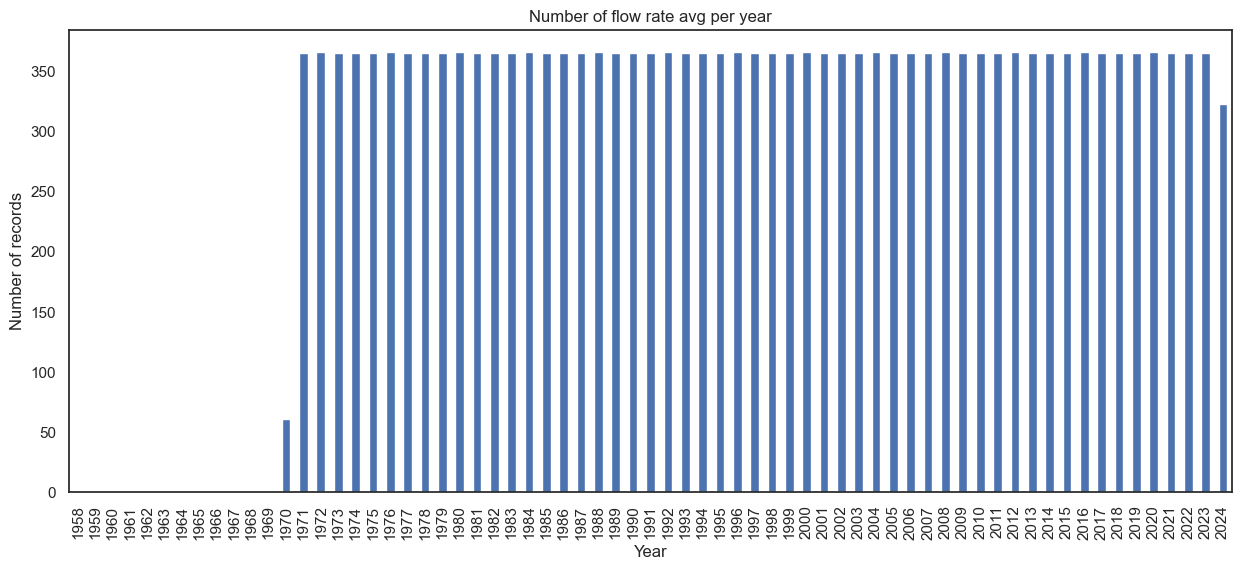

In [370]:
# plotting a bar chart to visualize, how many data is available per year to detect, if there are missing values by missing wholesome records

plt.figure(figsize=(15, 6))
data_per_year.plot(kind='bar')
plt.title('Number of flow rate avg per year')
plt.xlabel('Year')
plt.ylabel('Number of records')

<span style='color: red;'>I always recommend to do the group by in one cell, print the result dataframe to see the output is what you wanted and, in another cell, do the plot!</span>
<span style='color: green;'>done</span>

<span style='color: red;'>What do you want to check with this plot? If you have missing days from a specific year? It would be great to know why you are plotting this and what you interpret from it. Probably if that's what you want to check (if you have data for all days in all years), I would have use a different title.</span><br>
<span style='color: green;'>that's plot show that there are rows for every year, except 1958 - I assume the recording startet later in that year - and except in 2024, because the year <br>is still ongoing! Maybe a plot isn't really necessary: To count the numbers, could be also an approach and would be more acurate</span>

In [367]:
df_reservoir.isna().sum()

date                                0
reservoir_avg                       0
reservoir_max                       7
reservoir_min                       7
is_outlier_reservoir_avg            0
is_outlier_reservoir_avg_extreme    0
is_outlier_reservoir_max            0
is_outlier_reservoir_max_extreme    0
is_outlier_reservoir_min            0
is_outlier_reservoir_min_extreme    0
dtype: int64

In [368]:
df_weather.isna().sum()

date                   0
tavg                   0
tmin                   0
tmax                   0
prcp                   0
snow                1568
wdir               14632
wspd                9927
wpgt                9942
pres                9863
tsun                   5
is_outlier_tavg        0
is_outlier_tmin        0
is_outlier_tmax        0
is_outlier_prcp        0
is_outlier_snow        0
is_outlier_wspd        0
is_outlier_wpgt        0
is_outlier_pres        0
dtype: int64

# ARCHIVE

In [369]:
# checking NaNs:
df_river_flow_rate.isna().sum()

NameError: name 'df_river_flow_rate' is not defined

In [ ]:
# checking, if there are NaNs after June 2011
df_river_flow_rate_nans = df_river_flow_rate[(df_river_flow_rate['Maximum']).isna() | (df_river_flow_rate['Minimum'].isna())]
df_river_flow_rate_nans

# NaNs of Maximum and Minimum after 31.10.1970, afterwards no NaNs

Datum Mittelwert Maximum Minimum Prüfstatus
0     01.11.58       74,4     NaN     NaN   Geprueft
1     02.11.58       77,9     NaN     NaN   Geprueft
2     03.11.58       72,2     NaN     NaN   Geprueft
3     04.11.58         93     NaN     NaN   Geprueft
4     05.11.58        121     NaN     NaN   Geprueft
...        ...        ...     ...     ...        ...
4378  27.10.70       56,2     NaN     NaN   Geprueft
4379  28.10.70       59,5     NaN     NaN   Geprueft
4380  29.10.70       67,4     NaN     NaN   Geprueft
4381  30.10.70       74,9     NaN     NaN   Geprueft
4382  31.10.70       67,4     NaN     NaN   Geprueft

[4383 rows x 5 columns]

In [ ]:
# loading and putting all dataframes together: water_quality
df_water_quality = df_concat('../datasets/river/fluesse-schwebstoff/16005701_beginn_bis_31.12.2023_tmw_0.csv','../datasets/river/fluesse-schwebstoff/16005701_01.01.2024_31.08.2024_tmw_0.csv', ";")


dataframe for is completed. There are 21250 rows.


In [ ]:
df_water_quality.head(10)
# first data from 01.10.1965

Zeitpunkt Schwebstoff-Konzentration [g/m^3] Prüfstatus  \
0  31.10.65                                25   Rohdaten   
1  01.11.65                             18,06   Rohdaten   
2  02.11.65                             11,57   Rohdaten   
3  03.11.65                             11,11   Rohdaten   
4  04.11.65                              9,88   Rohdaten   
5  05.11.65                              5,87   Rohdaten   
6  06.11.65                              5,56   Rohdaten   
7  07.11.65                              5,56   Rohdaten   
8  08.11.65                              6,79   Rohdaten   
9  09.11.65                             12,04   Rohdaten   

  Schwebstoff-Fracht [t] Prüfstatus.1 Schwebstoff-Abtrag [t/m^2] Prüfstatus.2  \
0                  47,85     Rohdaten                       0,02     Rohdaten   
1                  32,47     Rohdaten                       0,01     Rohdaten   
2                  20,55     Rohdaten                       0,01     Rohdaten   
3                  27,77     Rohdaten                       0,01     Rohdaten   
4                  26,54     Rohdaten                       0,01     Rohdaten   
5                  16,67     Rohdaten                       0,01     Rohdaten   
6                  14,31     Rohdaten                       0,01     Rohdaten   
7                  12,34     Rohdaten                          0     Rohdaten   
8                  13,54     Rohdaten                       0,01     Rohdaten   
9                  27,42     Rohdaten                       0,01     Rohdaten   

  Schwebstoff-Transport [kg/s] Prüfstatus.3  
0                         0,55     Rohdaten  
1                         0,38     Rohdaten  
2                         0,24     Rohdaten  
3                         0,32     Rohdaten  
4                         0,31     Rohdaten  
5                         0,19     Rohdaten  
6                         0,17     Rohdaten  
7                         0,14     Rohdaten  
8                         0,16     Rohdaten  
9                         0,32     Rohdaten

In [ ]:
df_water_quality.info()
# no NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 21250 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Zeitpunkt                          21250 non-null  object
 1   Schwebstoff-Konzentration [g/m^3]  21250 non-null  object
 2   Prüfstatus                         21250 non-null  object
 3   Schwebstoff-Fracht [t]             21250 non-null  object
 4   Prüfstatus.1                       21250 non-null  object
 5   Schwebstoff-Abtrag [t/m^2]         21250 non-null  object
 6   Prüfstatus.2                       21250 non-null  object
 7   Schwebstoff-Transport [kg/s]       21250 non-null  object
 8   Prüfstatus.3                       21250 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
# loading and putting all dataframes together: water_level
df_water_level = df_concat('../datasets/river/fluesse-wasserstand/16005701_beginn_bis_31.12.2023_tmw_0-1.csv', '../datasets/river/fluesse-wasserstand/16005701_01.01.2024_31.08.2024_tmw_0.csv', ';')

dataframe for is completed. There are 18567 rows.


In [ ]:
df_water_level.head(10)
# first data from 01.11.1973

Datum  Mittelwert  Maximum  Minimum Prüfstatus
0  01.11.73          50       58       44   Geprueft
1  02.11.73          45       53       43   Geprueft
2  03.11.73          49       57       43   Geprueft
3  04.11.73          45       57       31   Geprueft
4  05.11.73          46       52       35   Geprueft
5  06.11.73          49       54       43   Geprueft
6  07.11.73          51       54       43   Geprueft
7  08.11.73          48       54       40   Geprueft
8  09.11.73          46       53       33   Geprueft
9  10.11.73          43       50       38   Geprueft

In [ ]:
df_water_level.info()
# no NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 18567 entries, 0 to 243
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Datum       18567 non-null  object
 1   Mittelwert  18567 non-null  int64 
 2   Maximum     18567 non-null  int64 
 3   Minimum     18567 non-null  int64 
 4   Prüfstatus  18567 non-null  object
dtypes: int64(3), object(2)
memory usage: 870.3+ KB


In [ ]:
# loading and putting all dataframes together: daily_water_temperature
df_daily_water_temperature = df_concat('/Users/natalie/Documents/_DA_course/finalProject_/finalProjectNatalie/datasets/river/fluesse-wassertemperatur/16005701_beginn_bis_31.12.2023_tmw_0.csv','/Users/natalie/Documents/_DA_course/finalProject_/finalProjectNatalie/datasets/river/fluesse-wassertemperatur/16005701_01.01.2024_31.08.2024_tmw_0.csv', ';')

dataframe for is completed. There are 15288 rows.


In [ ]:
df_daily_water_temperature.head(10)
# data from 01.11.1980

Datum Mittelwert Maximum Minimum Prüfstatus
0  01.11.80        8,1     8,1     8,1   Geprueft
1  02.11.80        7,3     7,3     7,3   Geprueft
2  03.11.80        5,8     5,8     5,8   Geprueft
3  04.11.80        5,6     5,6     5,6   Geprueft
4  05.11.80        4,8     4,8     4,8   Geprueft
5  06.11.80        4,7     4,7     4,7   Geprueft
6  07.11.80        6,1     6,1     6,1   Geprueft
7  08.11.80        7,7     7,7     7,7   Geprueft
8  09.11.80        7,5     7,5     7,5   Geprueft
9  10.11.80        7,6     7,6     7,6   Geprueft

In [ ]:
df_daily_water_temperature.info()
# non NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 15288 entries, 0 to 243
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Datum       15288 non-null  object
 1   Mittelwert  15288 non-null  object
 2   Maximum     15288 non-null  object
 3   Minimum     15288 non-null  object
 4   Prüfstatus  15288 non-null  object
dtypes: object(5)
memory usage: 716.6+ KB


In [ ]:
# creating 1 dataframe for the water-variables river flow rate, water quality: suspended solids, water level, daily water temperatures
# checking all columns and potientially rename them:
#df_river_flow_rate.columns: done
#df_water_level.columns
#df_water_quality.columns
#df_daily_water_temperature.columns

In [ ]:
# renaming the columns of df_river_flow_rate:
df_river_flow_rate = df_river_flow_rate.rename(columns={'Mittelwert' : 'avg_flow_rate',
                                   'Maximum' : 'max_flow_rate',
                                   'Minimum' : 'min_flow_rate'})
df_river_flow_rate.columns


Index(['Datum', 'avg_flow_rate', 'max_flow_rate', 'min_flow_rate',
       'Prüfstatus'],
      dtype='object')

In [ ]:
# dropping the column 'Prüfstatus'
df_river_flow_rate = df_river_flow_rate.drop(columns='Prüfstatus')
df_river_flow_rate.columns

Index(['Datum', 'avg_flow_rate', 'max_flow_rate', 'min_flow_rate'], dtype='object')

In [ ]:
# Changing the order of the columns
cols_river = df_river.columns.to_list()
cols_river

['avg_water_temperature',
 'max_water_temperature',
 'min_water_temperature',
 'avg_water_level',
 'max_water_level',
 'min_water_level',
 'suspended_solids_concentration',
 'suspended_solid_load',
 'suspended_sediment_erosion',
 'suspended_sediment_transport',
 'avg_flow_rate',
 'max_flow_rate',
 'min_flow_rate',
 'date']

In [ ]:
# putting 'date' at first place
cols_river.insert(0, cols_river.pop(cols_river.index('date')))
df_river= df_river[cols_river]
df_river

date avg_water_temperature max_water_temperature  \
0     1980-11-01                   8,1                   8,1   
1     1980-11-02                   7,3                   7,3   
2     1980-11-03                   5,8                   5,8   
3     1980-11-04                   5,6                   5,6   
4     1980-11-05                   4,8                   4,8   
...          ...                   ...                   ...   
15283 2024-08-27                  16,6                  17,6   
15284 2024-08-28                  17,8                    19   
15285 2024-08-29                  18,7                  19,6   
15286 2024-08-30                  19,1                  19,8   
15287 2024-08-31                  19,1                  19,7   

      min_water_temperature  avg_water_level  max_water_level  \
0                       8,1               71               86   
1                       7,3               59               62   
2                       5,8               68               83   
3                       5,6               77               80   
4                       4,8               77               89   
...                     ...              ...              ...   
15283                  15,8              130              137   
15284                  16,6              117              121   
15285                  17,7              114              116   
15286                  18,1              114              116   
15287                  18,2              109              115   

       min_water_level suspended_solids_concentration suspended_solid_load  \
0                   59                           5,57                25,56   
1                   54                            5,1                21,54   
2                   48                           5,14                20,16   
3                   73                            7,6                31,26   
4                   70                           9,03                37,83   
...                ...                            ...                  ...   
15283              121                            NaN                  NaN   
15284              113                            NaN                  NaN   
15285              110                            NaN                  NaN   
15286              108                            NaN                  NaN   
15287              104                            NaN                  NaN   

      suspended_sediment_erosion suspended_sediment_transport avg_flow_rate  \
0                           0,01                          0,3          47,9   
1                           0,01                         0,25          36,7   
2                           0,01                         0,23          45,8   
3                           0,01                         0,36          53,4   
4                           0,01                         0,44          54,1   
...                          ...                          ...           ...   
15283                        NaN                          NaN            66   
15284                        NaN                          NaN          47,5   
15285                        NaN                          NaN          43,2   
15286                        NaN                          NaN          43,5   
15287                        NaN                          NaN          37,7   

      max_flow_rate min_flow_rate  
0              63,4            37  
1              39,6          32,7  
2                60          27,9  
3              56,9          49,9  
4              66,5            47  
...             ...           ...  
15283          76,7            53  
15284            53          42,2  
15285          46,1          38,5  
15286          46,1          36,3  
15287          44,8            32  

[15288 rows x 14 columns]

In [ ]:
# adding columns year and month:
df_river['year'] = df_river['date'].dt.year
df_river['month'] = df_river['date'].dt.month
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  object        
 2   max_water_temperature           15288 non-null  object        
 3   min_water_temperature           15288 non-null  object        
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15258 non-null  object        
 8   suspended_solid_load            15258 non-null  object        
 9   suspended_sediment_erosion      15258 non-null  object        
 10  suspended_sediment_transport    15258 non-null  object        
 11  av

In [ ]:
# first replacing the "," with "." so that I can convert the strings into floats:

df_river['avg_water_temperature'] = df_river['avg_water_temperature'].str.replace(',', '.')
df_river['max_water_temperature'] = df_river['max_water_temperature'].str.replace(',', '.')
df_river['min_water_temperature'] = df_river['min_water_temperature'].str.replace(',', '.')
df_river['suspended_solids_concentration'] = df_river['suspended_solids_concentration'].str.replace(',', '.')
df_river['suspended_solid_load'] = df_river['suspended_solid_load'].str.replace(',', '.') 
df_river['suspended_sediment_erosion'] = df_river['suspended_sediment_erosion'].str.replace(',', '.')
df_river['suspended_sediment_transport'] = df_river['suspended_sediment_transport'].str.replace(',', '.')
df_river['avg_flow_rate'] = df_river['avg_flow_rate'].str.replace(',', '.')
df_river['max_flow_rate'] = df_river['max_flow_rate'].str.replace(',', '.')
df_river['min_flow_rate'] = df_river['min_flow_rate'].str.replace(',', '.')     

df_river

date avg_water_temperature max_water_temperature  \
0     1980-11-01                   8.1                   8.1   
1     1980-11-02                   7.3                   7.3   
2     1980-11-03                   5.8                   5.8   
3     1980-11-04                   5.6                   5.6   
4     1980-11-05                   4.8                   4.8   
...          ...                   ...                   ...   
15283 2024-08-27                  16.6                  17.6   
15284 2024-08-28                  17.8                    19   
15285 2024-08-29                  18.7                  19.6   
15286 2024-08-30                  19.1                  19.8   
15287 2024-08-31                  19.1                  19.7   

      min_water_temperature  avg_water_level  max_water_level  \
0                       8.1               71               86   
1                       7.3               59               62   
2                       5.8               68               83   
3                       5.6               77               80   
4                       4.8               77               89   
...                     ...              ...              ...   
15283                  15.8              130              137   
15284                  16.6              117              121   
15285                  17.7              114              116   
15286                  18.1              114              116   
15287                  18.2              109              115   

       min_water_level suspended_solids_concentration suspended_solid_load  \
0                   59                           5.57                25.56   
1                   54                            5.1                21.54   
2                   48                           5.14                20.16   
3                   73                            7.6                31.26   
4                   70                           9.03                37.83   
...                ...                            ...                  ...   
15283              121                            NaN                  NaN   
15284              113                            NaN                  NaN   
15285              110                            NaN                  NaN   
15286              108                            NaN                  NaN   
15287              104                            NaN                  NaN   

      suspended_sediment_erosion suspended_sediment_transport avg_flow_rate  \
0                           0.01                          0.3          47.9   
1                           0.01                         0.25          36.7   
2                           0.01                         0.23          45.8   
3                           0.01                         0.36          53.4   
4                           0.01                         0.44          54.1   
...                          ...                          ...           ...   
15283                        NaN                          NaN            66   
15284                        NaN                          NaN          47.5   
15285                        NaN                          NaN          43.2   
15286                        NaN                          NaN          43.5   
15287                        NaN                          NaN          37.7   

      max_flow_rate min_flow_rate  year  month  
0              63.4            37  1980     11  
1              39.6          32.7  1980     11  
2                60          27.9  1980     11  
3              56.9          49.9  1980     11  
4              66.5            47  1980     11  
...             ...           ...   ...    ...  
15283          76.7            53  2024      8  
15284            53          42.2  2024      8  
15285          46.1          38.5  2024      8  
15286          46.1          36.3  2024      8  
15287          44.8            32  20

In [ ]:
# changing all objects (but date, month, year) into float64
df_river['avg_water_temperature'] = df_river['avg_water_temperature'].astype(dtype='float64')
df_river['max_water_temperature'] = df_river['max_water_temperature'].astype(dtype='float64')
df_river['min_water_temperature'] = df_river['min_water_temperature'].astype(dtype='float64')
df_river['suspended_solids_concentration'] = df_river['suspended_solids_concentration'].astype(dtype='float64')
df_river['suspended_solid_load'] = df_river['suspended_solid_load'].astype(dtype='float64')
df_river['suspended_sediment_erosion'] = df_river['suspended_sediment_erosion'].astype(dtype='float64')
df_river['suspended_sediment_transport'] = df_river['suspended_sediment_transport'].astype(dtype='float64')
df_river['avg_flow_rate'] = df_river['avg_flow_rate'].astype(dtype='float64')
df_river['max_flow_rate'] = df_river['max_flow_rate'].astype(dtype='float64')
df_river['min_flow_rate'] = df_river['min_flow_rate'].astype(dtype='float64')
 
df_river.info()            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  float64       
 2   max_water_temperature           15288 non-null  float64       
 3   min_water_temperature           15288 non-null  float64       
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15258 non-null  float64       
 8   suspended_solid_load            15258 non-null  float64       
 9   suspended_sediment_erosion      15258 non-null  float64       
 10  suspended_sediment_transport    15258 non-null  float64       
 11  av

In [ ]:
df_river.isna().sum()

date                               0
avg_water_temperature              0
max_water_temperature              0
min_water_temperature              0
avg_water_level                    0
max_water_level                    0
min_water_level                    0
suspended_solids_concentration    30
suspended_solid_load              30
suspended_sediment_erosion        30
suspended_sediment_transport      30
avg_flow_rate                      0
max_flow_rate                      0
min_flow_rate                      0
year                               0
month                              0
dtype: int64

In [ ]:
df_river.groupby('year')['date'].count()

year
1980     61
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    361
2010    365
2011    365
2012    267
2013    320
2014    365
2015    365
2016    366
2017    361
2018    365
2019    365
2020    360
2022    166
2023    365
2024    244
Name: date, dtype: int64

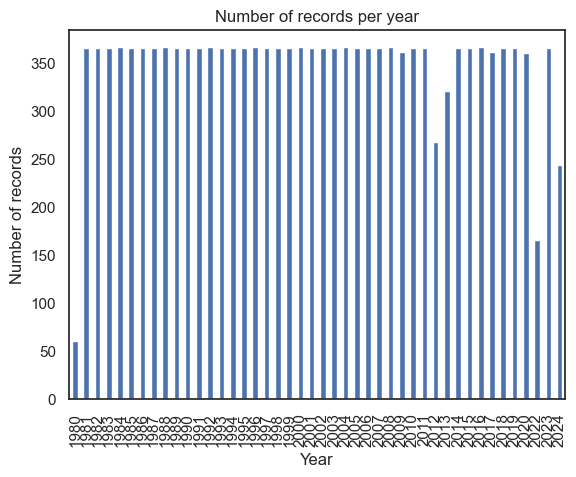

In [ ]:
# plot of records per year:
data_per_year = df_river.groupby('year').size()

data_per_year.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()
#sns.barplot(x=df_river['year'],
#            y=df_river['year'].count())
#plt.show()
#len(df_river[df_river['year'] == 2016])

In [ ]:
# how much data is missing in 1980, 2012, 2013 and 2022?
num_missing_records_1980 =  366 - df_river['year'][df_river['year']==1980].count()
num_missing_records_2012 =  366 - df_river['year'][df_river['year']==2012].count()
num_missing_records_2013 =  365 - df_river['year'][df_river['year']==2013].count()
num_missing_records_2022 =  365 - df_river['year'][df_river['year']==2022].count()
num_missing_records_2024 =  365 - df_river['year'][df_river['year']==2024].count()

print('Missing data for: 1980:', num_missing_records_1980, '2012:', num_missing_records_2012, '2013:', num_missing_records_2013, '2022:', num_missing_records_2022, '2024:', num_missing_records_2024)

Missing data for: 1980: 305 2012: 99 2013: 45 2022: 199 2024: 121


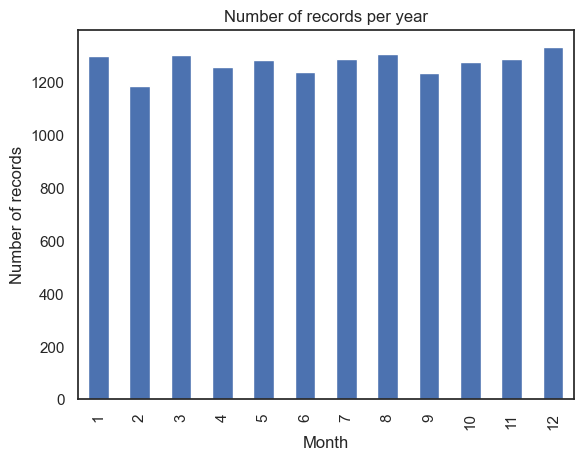

In [ ]:
# plot of records per month:
data_per_month_river = df_river.groupby('month').size()

data_per_month_river.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Month')
plt.ylabel('Number of records')
#plt.show()

In [ ]:
df_river_suspended_nans = df_river[df_river['suspended_solids_concentration'].isna()]
df_river_suspended_nans

# no data of water quality from 19.07.2022 until 07.08.22 and after 21.08.24
# deleting all rows after 21.08.
# what shall I do with the data in 2022? Maybe fill them with the mean of 2 weeks before and 2 weeks after?
# looking into it:

date  avg_water_temperature  max_water_temperature  \
14513 2022-07-19                   19.9                   20.5   
14514 2022-07-20                   20.4                   21.4   
14515 2022-07-21                   20.1                   21.3   
14516 2022-07-22                   19.6                   20.5   
14517 2022-07-23                   19.9                   20.4   
14518 2022-07-24                   19.8                   20.7   
14519 2022-07-25                   20.6                   21.5   
14520 2022-07-26                   20.3                   21.3   
14521 2022-07-27                   19.3                   19.7   
14522 2022-07-28                   19.1                   20.2   
14523 2022-07-29                   19.9                   20.2   
14524 2022-07-30                   19.6                   20.1   
14525 2022-07-31                   19.3                   20.0   
14526 2022-08-01                   19.4                   19.8   
14527 2022-08-02                   20.0                   20.7   
14528 2022-08-03                   20.4                   21.1   
14529 2022-08-04                   20.7                   21.5   
14530 2022-08-05                   21.1                   21.5   
14531 2022-08-06                   20.4                   21.2   
14532 2022-08-07                   19.0                   19.4   
15278 2024-08-22                   17.6                   18.4   
15279 2024-08-23                   18.0                   19.1   
15280 2024-08-24                   18.8                   20.0   
15281 2024-08-25                   18.3                   19.7   
15282 2024-08-26                   16.4                   17.4   
15283 2024-08-27                   16.6                   17.6   
15284 2024-08-28                   17.8                   19.0   
15285 2024-08-29                   18.7                   19.6   
15286 2024-08-30                   19.1                   19.8   
15287 2024-08-31                   19.1                   19.7   

       min_water_temperature  avg_water_level  max_water_level  \
14513                   19.1               94              103   
14514                   19.6               99              107   
14515                   19.3               98              102   
14516                   18.8               92               95   
14517                   19.6               89               91   
14518                   19.1               89               94   
14519                   19.8               89               96   
14520                   19.8              100              109   
14521                   19.1               93               95   
14522                   18.4               93               99   
14523                   19.6               99              104   
14524                   18.9               99              103   
14525                   18.8               93               95   
14526                   18.9               90               92   
14527                   19.5               91               93   
14528                   19.8               96              103   
14529                   19.7               98              103   
14530                   20.5               93               96   
14531                   19.4               89               97   
14532                   18.6               87               89   
15278                   16.7              131              136   
15279                   16.9              127              130   
15280                   17.6              126              131   
15281                   17.5              121              144   
15282                   16.1              142              150   
15283                   15.8              130              137   
15284                   16.6              117              121   
15285                   17.7              114              116   
15286                   18.1              114      

In [ ]:
# looking over the means grouped by month to possibly fill in the NaNs of suspended solids concentration the monthly mean
df_river.groupby('month')['suspended_solids_concentration'].mean()


month
1     11.566006
2     13.412763
3     17.059093
4     15.863943
5     26.262615
6     35.792935
7     52.707526
8     34.954255
9     15.906783
10    13.360877
11    11.295578
12    11.554039
Name: suspended_solids_concentration, dtype: float64

In [ ]:
# getting the mean of suspended concentration in the month July:
mean_concentration_july = df_river['suspended_solids_concentration'][df_river['month'] == 7].mean()
round(mean_concentration_july,2)

52.71

In [ ]:
# getting the right part of the dataframe for the july NaNs:
df_river_suspended_nans_july = df_river[(df_river['suspended_solids_concentration'].isna()) & (df_river['month']==7)]
df_river_suspended_nans_july

date  avg_water_temperature  max_water_temperature  \
14513 2022-07-19                   19.9                   20.5   
14514 2022-07-20                   20.4                   21.4   
14515 2022-07-21                   20.1                   21.3   
14516 2022-07-22                   19.6                   20.5   
14517 2022-07-23                   19.9                   20.4   
14518 2022-07-24                   19.8                   20.7   
14519 2022-07-25                   20.6                   21.5   
14520 2022-07-26                   20.3                   21.3   
14521 2022-07-27                   19.3                   19.7   
14522 2022-07-28                   19.1                   20.2   
14523 2022-07-29                   19.9                   20.2   
14524 2022-07-30                   19.6                   20.1   
14525 2022-07-31                   19.3                   20.0   

       min_water_temperature  avg_water_level  max_water_level  \
14513                   19.1               94              103   
14514                   19.6               99              107   
14515                   19.3               98              102   
14516                   18.8               92               95   
14517                   19.6               89               91   
14518                   19.1               89               94   
14519                   19.8               89               96   
14520                   19.8              100              109   
14521                   19.1               93               95   
14522                   18.4               93               99   
14523                   19.6               99              104   
14524                   18.9               99              103   
14525                   18.8               93               95   

       min_water_level  suspended_solids_concentration  suspended_solid_load  \
14513               88                             NaN                   NaN   
14514               93                             NaN                   NaN   
14515               93                             NaN                   NaN   
14516               87                             NaN                   NaN   
14517               87                             NaN                   NaN   
14518               87                             NaN                   NaN   
14519               85                             NaN                   NaN   
14520               92                             NaN                   NaN   
14521               91                             NaN                   NaN   
14522               90                             NaN                   NaN   
14523               93                             NaN                   NaN   
14524               93                             NaN                   NaN   
14525               90                             NaN                   NaN   

       suspended_sediment_erosion  suspended_sediment_transport  \
14513                         NaN                           NaN   
14514                         NaN                           NaN   
14515                         NaN                           NaN   
14516                         NaN                           NaN   
14517                         NaN                           NaN   
14518                         NaN                           NaN   
14519                         NaN                           NaN   
14520                         NaN                           NaN   
14521                         NaN                           NaN   
14522                         NaN                           NaN   
14523                         NaN                           NaN   
14524                         NaN                           NaN   
14525                         NaN                           NaN   

       avg_flow_rate  max_flow_rate  min_flow_rate  year  month  
14513           34.1           42.6 

In [ ]:
# fill in the July-NaNs with the mean:
df_river.loc[(df_river['suspended_solids_concentration'].isna()) & (df_river['month'] == 7), 'suspended_solids_concentration'] = round(mean_concentration_july,2)
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  float64       
 2   max_water_temperature           15288 non-null  float64       
 3   min_water_temperature           15288 non-null  float64       
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15271 non-null  float64       
 8   suspended_solid_load            15258 non-null  float64       
 9   suspended_sediment_erosion      15258 non-null  float64       
 10  suspended_sediment_transport    15258 non-null  float64       
 11  av

In [ ]:
# getting the mean of suspended concentration in the month august:
mean_concentration_august = df_river['suspended_solids_concentration'][df_river['month'] == 8].mean()
round(mean_concentration_august,2)

34.95

In [ ]:
# getting the right part of the dataframe for the august NaNs:
df_river_suspended_nans_august = df_river[(df_river['suspended_solids_concentration'].isna()) & (df_river['month']==8)]
df_river_suspended_nans_august

date  avg_water_temperature  max_water_temperature  \
14526 2022-08-01                   19.4                   19.8   
14527 2022-08-02                   20.0                   20.7   
14528 2022-08-03                   20.4                   21.1   
14529 2022-08-04                   20.7                   21.5   
14530 2022-08-05                   21.1                   21.5   
14531 2022-08-06                   20.4                   21.2   
14532 2022-08-07                   19.0                   19.4   
15278 2024-08-22                   17.6                   18.4   
15279 2024-08-23                   18.0                   19.1   
15280 2024-08-24                   18.8                   20.0   
15281 2024-08-25                   18.3                   19.7   
15282 2024-08-26                   16.4                   17.4   
15283 2024-08-27                   16.6                   17.6   
15284 2024-08-28                   17.8                   19.0   
15285 2024-08-29                   18.7                   19.6   
15286 2024-08-30                   19.1                   19.8   
15287 2024-08-31                   19.1                   19.7   

       min_water_temperature  avg_water_level  max_water_level  \
14526                   18.9               90               92   
14527                   19.5               91               93   
14528                   19.8               96              103   
14529                   19.7               98              103   
14530                   20.5               93               96   
14531                   19.4               89               97   
14532                   18.6               87               89   
15278                   16.7              131              136   
15279                   16.9              127              130   
15280                   17.6              126              131   
15281                   17.5              121              144   
15282                   16.1              142              150   
15283                   15.8              130              137   
15284                   16.6              117              121   
15285                   17.7              114              116   
15286                   18.1              114              116   
15287                   18.2              109              115   

       min_water_level  suspended_solids_concentration  suspended_solid_load  \
14526               86                             NaN                   NaN   
14527               89                             NaN                   NaN   
14528               90                             NaN                   NaN   
14529               93                             NaN                   NaN   
14530               90                             NaN                   NaN   
14531               86                             NaN                   NaN   
14532               85                             NaN                   NaN   
15278              125                             NaN                   NaN   
15279              121                             NaN                   NaN   
15280              120                             NaN                   NaN   
15281              111                             NaN                   NaN   
15282              131                             NaN                   NaN   
15283              121                             NaN                   NaN   
15284              113                             NaN                   NaN   
15285              110                             NaN                   NaN   
15286              108                             NaN                   NaN   
15287              104                             NaN                   NaN   

       suspended_sediment_erosion  suspended_sediment_transport  \
14526                         NaN                           NaN   
14527                         NaN                          

In [ ]:
# fill in the august-NaNs with the mean:
df_river.loc[(df_river['suspended_solids_concentration'].isna()) & (df_river['month']==8), 'suspended_solids_concentration'] = round(mean_concentration_august,2)
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  float64       
 2   max_water_temperature           15288 non-null  float64       
 3   min_water_temperature           15288 non-null  float64       
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15288 non-null  float64       
 8   suspended_solid_load            15258 non-null  float64       
 9   suspended_sediment_erosion      15258 non-null  float64       
 10  suspended_sediment_transport    15258 non-null  float64       
 11  av

In [ ]:
df_river.tail(10)

date  avg_water_temperature  max_water_temperature  \
15278 2024-08-22                   17.6                   18.4   
15279 2024-08-23                   18.0                   19.1   
15280 2024-08-24                   18.8                   20.0   
15281 2024-08-25                   18.3                   19.7   
15282 2024-08-26                   16.4                   17.4   
15283 2024-08-27                   16.6                   17.6   
15284 2024-08-28                   17.8                   19.0   
15285 2024-08-29                   18.7                   19.6   
15286 2024-08-30                   19.1                   19.8   
15287 2024-08-31                   19.1                   19.7   

       min_water_temperature  avg_water_level  max_water_level  \
15278                   16.7              131              136   
15279                   16.9              127              130   
15280                   17.6              126              131   
15281                   17.5              121              144   
15282                   16.1              142              150   
15283                   15.8              130              137   
15284                   16.6              117              121   
15285                   17.7              114              116   
15286                   18.1              114              116   
15287                   18.2              109              115   

       min_water_level  suspended_solids_concentration  suspended_solid_load  \
15278              125                           34.95                   NaN   
15279              121                           34.95                   NaN   
15280              120                           34.95                   NaN   
15281              111                           34.95                   NaN   
15282              131                           34.95                   NaN   
15283              121                           34.95                   NaN   
15284              113                           34.95                   NaN   
15285              110                           34.95                   NaN   
15286              108                           34.95                   NaN   
15287              104                           34.95                   NaN   

       suspended_sediment_erosion  suspended_sediment_transport  \
15278                         NaN                           NaN   
15279                         NaN                           NaN   
15280                         NaN                           NaN   
15281                         NaN                           NaN   
15282                         NaN                           NaN   
15283                         NaN                           NaN   
15284                         NaN                           NaN   
15285                         NaN                           NaN   
15286                         NaN                           NaN   
15287                         NaN                           NaN   

       avg_flow_rate  max_flow_rate  min_flow_rate  year  month  
15278           68.0           75.2           58.8  2024      8  
15279           61.8           66.2           53.0  2024      8  
15280           60.5           67.7           51.6  2024      8  
15281           52.7           87.5           39.7  2024      8  
15282           84.2           96.9           67.7  2024      8  
15283           66.0           76.7           53.0  2024      8  
15284           47.5           53.0           42.2  2024      8  
15285           43.2           46.1           38.5  2024      8  
15286           43.5           46.1           36.3  2024      8  
15287           37.7           44.8           32.0  2024      8

In [ ]:
df_river.shape

(15288, 16)

In [ ]:
df_river_raw= df_river.copy()

## WEATHER:

In [ ]:
# WEATHER:
# Loading the xls-files into DataFrames (first: 2011-06-01 to 2016, second: 2017 to 2024-09-05)
path_weather_2017_to_now = "../datasets/weather/weather20170102-20240905.xlsx"
path_weather_jun2011_to_2016 = "../datasets/weather/weather20110601-20161231.xlsx"

df_weather_jun2011_to_2016 = pd.read_excel(path_weather_jun2011_to_2016)
df_weather_2017_to_now = pd.read_excel(path_weather_2017_to_now)


In [ ]:
# dataframe 2011 - 2016:
df_weather_jun2011_to_2016

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7   
1     2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9   
2     2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9   
3     2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7   
4     2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2036  2016-12-27   2.7   0.8   4.2   0.0   NaN  274.0  17.3  47.9  1040.5   
2037  2016-12-28   2.9  -1.4   5.0   0.0   NaN  272.0  10.8  34.9  1043.3   
2038  2016-12-29   0.7  -2.4   5.8   0.0   NaN  104.0   7.2  24.5  1041.1   
2039  2016-12-30  -3.6  -5.3  -1.1   0.0   NaN  322.0   5.0  13.7  1040.2   
2040  2016-12-31  -3.5  -6.2   2.1   0.0   NaN  307.0   4.0  10.1  1035.6   

      tsun  
0        0  
1        6  
2      378  
3      570  
4      480  
...    ...  
2036    90  
2037   108  
2038   402  
2039   336  
2040   414  

[2041 rows x 11 columns]

In [ ]:
# dataframe 2017 - now:
df_weather_2017_to_now

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2017-01-02  -2.4  -5.4   0.8   3.2   NaN  279.0  10.4  33.5  1022.7   
1     2017-01-03  -0.9  -2.1   0.6   0.0  40.0  257.0  11.2  37.1  1026.7   
2     2017-01-04   0.4  -0.9   1.3   2.2  30.0  260.0  26.6  73.1  1016.0   
3     2017-01-05  -3.3  -7.1  -0.2   0.0  50.0  318.0  15.1  63.7  1025.9   
4     2017-01-06  -9.3 -13.0  -6.5   0.0  50.0   25.0   5.8  19.4  1040.9   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799  2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0  1013.9   
2800  2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2  1012.8   
2801  2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802  2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
2803  2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   

       tsun  
0      18.0  
1     216.0  
2       0.0  
3       0.0  
4     300.0  
...     ...  
2799  564.0  
2800  493.0  
2801  658.0  
2802    NaN  
2803    NaN  

[2804 rows x 11 columns]

In [ ]:
# checking if they were loades completely:
print("rows for 2011 until 2016:", df_weather_jun2011_to_2016.shape[0])
print("rows for 2017 until now:", df_weather_2017_to_now.shape[0])

rows for 2011 until 2016: 2041
rows for 2017 until now: 2804


In [ ]:
#one dataframe with all the data of the weather:
df_weather = pd.concat([df_weather_jun2011_to_2016, df_weather_2017_to_now])
df_weather.head()

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun
0  2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7    0.0
1  2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9    6.0
2  2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9  378.0
3  2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7  570.0
4  2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7  480.0

In [ ]:
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7   
1     2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9   
2     2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9   
3     2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7   
4     2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799  2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0  1013.9   
2800  2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2  1012.8   
2801  2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802  2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
2803  2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   

       tsun  
0       0.0  
1       6.0  
2     378.0  
3     570.0  
4     480.0  
...     ...  
2799  564.0  
2800  493.0  
2801  658.0  
2802    NaN  
2803    NaN  

[4845 rows x 11 columns]

In [ ]:
df_weather.columns

Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')

In [ ]:
# How much NaNs do we have?
df_weather.isna().sum()

date       0
tavg       2
tmin       2
tmax       2
prcp       5
snow    2749
wdir     192
wspd      57
wpgt      59
pres       4
tsun       2
dtype: int64

In [ ]:
# changing date into a dateformat:
df_weather['datenew'] = pd.to_datetime(df_weather['date'])
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7   
1     2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9   
2     2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9   
3     2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7   
4     2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799  2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0  1013.9   
2800  2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2  1012.8   
2801  2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802  2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
2803  2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   

       tsun    datenew  
0       0.0 2011-06-01  
1       6.0 2011-06-02  
2     378.0 2011-06-03  
3     570.0 2011-06-04  
4     480.0 2011-06-05  
...     ...        ...  
2799  564.0 2024-09-01  
2800  493.0 2024-09-02  
2801  658.0 2024-09-03  
2802    NaN 2024-09-04  
2803    NaN 2024-09-05  

[4845 rows x 12 columns]

In [ ]:
# putting datenew on the first position:
cols_weather = df_weather.columns.to_list()
cols_weather.insert(0, cols_weather.pop(cols_weather.index('datenew')))
df_weather = df_weather[cols_weather]
df_weather


datenew        date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt  \
0    2011-06-01  2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6   
1    2011-06-02  2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8   
2    2011-06-03  2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6   
3    2011-06-04  2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3   
4    2011-06-05  2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7   
...         ...         ...   ...   ...   ...   ...   ...    ...   ...   ...   
2799 2024-09-01  2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0   
2800 2024-09-02  2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2   
2801 2024-09-03  2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7   
2802 2024-09-04  2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   
2803 2024-09-05  2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   

        pres   tsun  
0     1021.7    0.0  
1     1026.9    6.0  
2     1022.9  378.0  
3     1013.7  570.0  
4     1007.7  480.0  
...      ...    ...  
2799  1013.9  564.0  
2800  1012.8  493.0  
2801  1013.9  658.0  
2802     NaN    NaN  
2803     NaN    NaN  

[4845 rows x 12 columns]

In [ ]:
# dropping 'date'
df_weather = df_weather.drop(columns='date')

In [ ]:
# renaming datenew into date
df_weather = df_weather.rename(columns={'datenew':'date'})
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0    2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7   
1    2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9   
2    2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9   
3    2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7   
4    2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7   
...         ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799 2024-09-01  23.2  17.4  29.5   0.0   NaN   65.0   7.2  22.0  1013.9   
2800 2024-09-02  22.0  18.4  27.2   0.0   NaN  328.0   7.6  30.2  1012.8   
2801 2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802 2024-09-04   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
2803 2024-09-05   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   

       tsun  
0       0.0  
1       6.0  
2     378.0  
3     570.0  
4     480.0  
...     ...  
2799  564.0  
2800  493.0  
2801  658.0  
2802    NaN  
2803    NaN  

[4845 rows x 11 columns]

In [ ]:
# NaNs in windspeed and tmax and wpgt: I will do the same as for the missing values in the water dataframe. filling it with the means of the month. So first I have to add the columns year and month:
# adding columns year and month:
df_weather['year'] = df_weather['date'].dt.year
df_weather['month'] = df_weather['date'].dt.month
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    2096 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4788 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


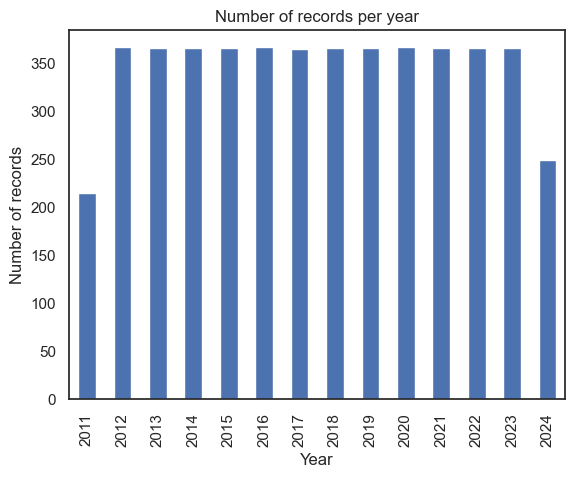

In [ ]:
# plot of records per year:
data_per_year_weather = df_weather.groupby('year').size()

data_per_year_weather.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()

In [ ]:
missing_records = {}
# For-Schleife für die Jahre 2011 bis 2024
for year in range(2011, 2024):
    # Bestimme, ob das Jahr ein Schaltjahr ist
    days_in_year = 366 if year % 4 == 0 else 365
    
    # Berechne die Anzahl der fehlenden Datensätze für das jeweilige Jahr
    num_missing_records = days_in_year - df_weather['year'][df_weather['year'] == year].count()
    
    # Speichere die fehlenden Datensätze im Dictionary
    missing_records[year] = num_missing_records

# Ausgabe der fehlenden Datensätze
print(missing_records)

{2011: 151, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 1, 2018: 0, 2019: 0, 2020: 0, 2021: 0, 2022: 0, 2023: 0}


In [ ]:
# es fehlt nur ein Datensatz in 2017. I will leave it by that.

In [ ]:
# NaNs snow: I will fill in for everry missing value a '0', because it is obvious, that it isn't documented in summer
df_weather['snow'] = df_weather['snow'].fillna(0)
df_weather

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0    2011-06-01  11.5   9.7  13.3   4.2   0.0  288.0  14.0  44.6  1021.7   
1    2011-06-02  13.4  10.9  17.1   0.0   0.0   42.0  10.8  32.8  1026.9   
2    2011-06-03  18.0  12.8  23.8   0.0   0.0   77.0  15.1  43.6  1022.9   
3    2011-06-04  20.6  14.6  27.8   0.0   0.0   80.0  12.2  31.3  1013.7   
4    2011-06-05  19.8  13.9  27.1   4.7   0.0  269.0   9.7  67.7  1007.7   
...         ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2799 2024-09-01  23.2  17.4  29.5   0.0   0.0   65.0   7.2  22.0  1013.9   
2800 2024-09-02  22.0  18.4  27.2   0.0   0.0  328.0   7.6  30.2  1012.8   
2801 2024-09-03  22.8  16.8  28.9   0.0   0.0  294.0   5.4  18.7  1013.9   
2802 2024-09-04   NaN   NaN   NaN   NaN   0.0    NaN   NaN   NaN     NaN   
2803 2024-09-05   NaN   NaN   NaN   NaN   0.0    NaN   NaN   NaN     NaN   

       tsun  year  month  
0       0.0  2011      6  
1       6.0  2011      6  
2     378.0  2011      6  
3     570.0  2011      6  
4     480.0  2011      6  
...     ...   ...    ...  
2799  564.0  2024      9  
2800  493.0  2024      9  
2801  658.0  2024      9  
2802    NaN  2024      9  
2803    NaN  2024      9  

[4845 rows x 13 columns]

In [ ]:
df_weather.isna().sum()

date       0
tavg       2
tmin       2
tmax       2
prcp       5
snow       0
wdir     192
wspd      57
wpgt      59
pres       4
tsun       2
year       0
month      0
dtype: int64

In [ ]:
# tmax is only in September 2024, so I leave it (because I will cut it off)
# then look into wspd
df_weather_wspd_nans = df_weather[df_weather['wspd'].isna()]
df_weather_wspd_nans

# no data of wspd in Dez, Jan, Feb and Sept
# deleting all rows after in September 2024

date  tavg  tmin  tmax  prcp   snow  wdir  wspd  wpgt    pres  \
927  2013-12-14   0.9  -4.1   7.3   2.3    0.0   NaN   NaN  46.4  1030.9   
1310 2015-01-01  -2.9  -5.8   2.4   0.0  230.0   NaN   NaN   NaN  1038.1   
1311 2015-01-02   0.9  -5.6   6.3   6.2  180.0   NaN   NaN   NaN  1033.4   
1312 2015-01-03   2.9   1.1   8.4  19.7   20.0   NaN   NaN   NaN  1026.2   
1313 2015-01-04   1.5   1.1   2.0   0.1    0.0   NaN   NaN   NaN  1031.0   
1314 2015-01-05   1.7   0.3   4.7   0.0    0.0   NaN   NaN   NaN  1033.5   
1315 2015-01-06   2.4  -1.3   7.7   0.0    0.0   NaN   NaN   NaN  1026.4   
1316 2015-01-07   1.9  -1.1   3.7   1.1    0.0   NaN   NaN   NaN  1030.4   
1317 2015-01-08   5.5  -0.1   9.4   1.0    0.0   NaN   NaN   NaN  1029.3   
1318 2015-01-09   7.9   5.0  10.5   2.4    0.0   NaN   NaN   NaN  1026.1   
1319 2015-01-10  13.6  10.5  16.3   6.2    0.0   NaN   NaN   NaN  1016.1   
1320 2015-01-11   3.8   1.0  12.1   4.7    0.0   NaN   NaN   NaN  1020.8   
1321 2015-01-12   4.4  -0.3   9.5   0.0    0.0   NaN   NaN   NaN  1025.4   
1322 2015-01-13   7.9  -0.6  14.8   0.0    0.0   NaN   NaN   NaN  1017.7   
1323 2015-01-14   5.8   1.3   9.2   2.1    0.0   NaN   NaN   NaN  1017.1   
1324 2015-01-15   4.2   0.7   8.9   0.0    0.0   NaN   NaN   NaN  1014.0   
1325 2015-01-16   3.8   0.4   9.1   2.9    0.0   NaN   NaN   NaN  1008.2   
1326 2015-01-17   1.6   0.5   4.7  10.7    0.0   NaN   NaN   NaN  1015.2   
1327 2015-01-18   1.3   0.7   2.2   0.1    0.0   NaN   NaN   NaN  1017.7   
1328 2015-01-19   1.3  -1.5   4.8   0.0    0.0   NaN   NaN   NaN  1012.8   
1329 2015-01-20   0.1  -1.8   1.8   0.0    0.0   NaN   NaN   NaN  1011.7   
1330 2015-01-21   0.2  -0.5   0.8   0.0    0.0   NaN   NaN   NaN  1011.6   
1331 2015-01-22   0.0  -0.6   1.0   0.1    0.0   NaN   NaN   NaN  1012.9   
1332 2015-01-23  -0.1  -0.6   0.3   0.5    0.0   NaN   NaN   NaN  1021.5   
1333 2015-01-24   0.0  -0.9   1.0   2.0    0.0   NaN   NaN   NaN  1022.5   
1334 2015-01-25  -0.2  -1.3   0.8   3.0   40.0   NaN   NaN   NaN  1028.4   
1335 2015-01-26   0.2  -1.4   3.9   6.0   70.0   NaN   NaN   NaN  1025.8   
1336 2015-01-27   0.6  -0.2   1.9   7.4   40.0   NaN   NaN   NaN  1021.5   
1337 2015-01-28   1.1  -1.0   3.2   5.1  100.0   NaN   NaN   NaN  1016.3   
1338 2015-01-29   2.2   0.0   4.3   0.7   50.0   NaN   NaN   NaN   994.9   
1339 2015-01-30   0.5  -1.3   2.4   4.5   40.0   NaN   NaN   NaN   980.0   
1340 2015-01-31   0.9  -1.8   4.1   0.0  100.0   NaN   NaN   NaN   986.0   
1341 2015-02-01   0.4  -1.2   2.8   1.9   70.0   NaN   NaN   NaN   993.5   
1342 2015-02-02  -0.4  -2.7   2.3   2.5   90.0   NaN   NaN   NaN  1001.7   
1343 2015-02-03  -3.0  -6.3   1.5   0.0  110.0   NaN   NaN   NaN  1005.5   
1344 2015-02-04  -5.1  -9.1   0.0   0.0  100.0   NaN   NaN   NaN  1012.2   
1345 2015-02-05  -2.8  -4.7  -1.0   0.0   90.0   NaN   NaN   NaN  1015.5   
1346 2015-02-06  -3.3  -5.5  -1.7   0.0   80.0   NaN   NaN   NaN  1020.4   
1347 2015-02-07  -4.1  -5.9  -1.1   0.2   80.0   NaN   NaN   NaN  1027.7   
1348 2015-02-08  -2.3  -5.8   1.5   1.0   80.0   NaN   NaN   NaN  1026.2   
1349 2015-02-09  -1.1  -3.5   0.8   0.1   90.0   NaN   NaN   NaN  1030.3   
1350 2015-02-10   1.8  -1.7   5.5   0.0   80.0   NaN   NaN   NaN  1030.7   
1351 2015-02-11  -0.6  -2.3   0.7   0.0   50.0   NaN   NaN   NaN  1028.3   
1352 2015-02-12  -0.6  -2.2   2.9   0.0   40.0   NaN   NaN   NaN  1025.6   
1353 2015-02-13  -1.4  -3.6   3.6   0.0   30.0   NaN   NaN   NaN  1021.8   
1354 2015-02-14  -2.1  -4.5   1.0   0.0   20.0   NaN   NaN   NaN  1014.8   
1355 2015-02-15  -1.1  -3.5   1.0   0.0    0.0   NaN   NaN   NaN  1014.2   
1356 2015-02-16   0.0  -2.1   2.8   0.0    0.0   NaN   NaN   NaN  1020.8   
1357 2015-02-17  -2.1  -3.5  -0.9   0.0    0.0   NaN   NaN   NaN  1032.4   
1358 2015-02-18  -1.3  -2.8  -0.5   0.0    0.0   NaN   NaN   NaN  1040.8   
1359 2015-02-19  -0.7  -3.2   4.1   0.0    0.0   NaN   NaN   NaN  1033.0   
1360 2015-02-20   4.1  -3.6  13.8   0.0    0.0   NaN   NaN 

In [ ]:
# looking over the means grouped by month to possibly fill in the NaNs of wspd the monthly mean
df_weather.groupby('month')['wspd'].mean()


month
1     11.504852
2     11.704310
3     11.221092
4     10.548974
5     10.032754
6      9.601429
7      9.421429
8      8.710369
9      8.426410
10     8.732506
11     9.210000
12    10.619900
Name: wspd, dtype: float64

In [ ]:
# getting the mean of wspd in the month January:
mean_wspd_jan = df_weather['wspd'][df_weather['month'] == 1].mean()
round(mean_wspd_jan,2)


11.5

In [ ]:
# getting the right part of the dataframe for the july NaNs:
df_weather_wspd_nans_jan = df_weather[(df_weather['wspd'].isna()) & (df_weather['month']==1)]
df_weather_wspd_nans_jan

date  tavg  tmin  tmax  prcp   snow  wdir  wspd  wpgt    pres  \
1310 2015-01-01  -2.9  -5.8   2.4   0.0  230.0   NaN   NaN   NaN  1038.1   
1311 2015-01-02   0.9  -5.6   6.3   6.2  180.0   NaN   NaN   NaN  1033.4   
1312 2015-01-03   2.9   1.1   8.4  19.7   20.0   NaN   NaN   NaN  1026.2   
1313 2015-01-04   1.5   1.1   2.0   0.1    0.0   NaN   NaN   NaN  1031.0   
1314 2015-01-05   1.7   0.3   4.7   0.0    0.0   NaN   NaN   NaN  1033.5   
1315 2015-01-06   2.4  -1.3   7.7   0.0    0.0   NaN   NaN   NaN  1026.4   
1316 2015-01-07   1.9  -1.1   3.7   1.1    0.0   NaN   NaN   NaN  1030.4   
1317 2015-01-08   5.5  -0.1   9.4   1.0    0.0   NaN   NaN   NaN  1029.3   
1318 2015-01-09   7.9   5.0  10.5   2.4    0.0   NaN   NaN   NaN  1026.1   
1319 2015-01-10  13.6  10.5  16.3   6.2    0.0   NaN   NaN   NaN  1016.1   
1320 2015-01-11   3.8   1.0  12.1   4.7    0.0   NaN   NaN   NaN  1020.8   
1321 2015-01-12   4.4  -0.3   9.5   0.0    0.0   NaN   NaN   NaN  1025.4   
1322 2015-01-13   7.9  -0.6  14.8   0.0    0.0   NaN   NaN   NaN  1017.7   
1323 2015-01-14   5.8   1.3   9.2   2.1    0.0   NaN   NaN   NaN  1017.1   
1324 2015-01-15   4.2   0.7   8.9   0.0    0.0   NaN   NaN   NaN  1014.0   
1325 2015-01-16   3.8   0.4   9.1   2.9    0.0   NaN   NaN   NaN  1008.2   
1326 2015-01-17   1.6   0.5   4.7  10.7    0.0   NaN   NaN   NaN  1015.2   
1327 2015-01-18   1.3   0.7   2.2   0.1    0.0   NaN   NaN   NaN  1017.7   
1328 2015-01-19   1.3  -1.5   4.8   0.0    0.0   NaN   NaN   NaN  1012.8   
1329 2015-01-20   0.1  -1.8   1.8   0.0    0.0   NaN   NaN   NaN  1011.7   
1330 2015-01-21   0.2  -0.5   0.8   0.0    0.0   NaN   NaN   NaN  1011.6   
1331 2015-01-22   0.0  -0.6   1.0   0.1    0.0   NaN   NaN   NaN  1012.9   
1332 2015-01-23  -0.1  -0.6   0.3   0.5    0.0   NaN   NaN   NaN  1021.5   
1333 2015-01-24   0.0  -0.9   1.0   2.0    0.0   NaN   NaN   NaN  1022.5   
1334 2015-01-25  -0.2  -1.3   0.8   3.0   40.0   NaN   NaN   NaN  1028.4   
1335 2015-01-26   0.2  -1.4   3.9   6.0   70.0   NaN   NaN   NaN  1025.8   
1336 2015-01-27   0.6  -0.2   1.9   7.4   40.0   NaN   NaN   NaN  1021.5   
1337 2015-01-28   1.1  -1.0   3.2   5.1  100.0   NaN   NaN   NaN  1016.3   
1338 2015-01-29   2.2   0.0   4.3   0.7   50.0   NaN   NaN   NaN   994.9   
1339 2015-01-30   0.5  -1.3   2.4   4.5   40.0   NaN   NaN   NaN   980.0   
1340 2015-01-31   0.9  -1.8   4.1   0.0  100.0   NaN   NaN   NaN   986.0   

       tsun  year  month  
1310  354.0  2015      1  
1311  162.0  2015      1  
1312    0.0  2015      1  
1313    0.0  2015      1  
1314  156.0  2015      1  
1315  342.0  2015      1  
1316    0.0  2015      1  
1317    0.0  2015      1  
1318    0.0  2015      1  
1319  342.0  2015      1  
1320   24.0  2015      1  
1321   18.0  2015      1  
1322  498.0  2015      1  
1323    6.0  2015      1  
1324  168.0  2015      1  
1325  120.0  2015      1  
1326    0.0  2015      1  
1327    0.0  2015      1  
1328  432.0  2015      1  
1329    0.0  2015      1  
1330    0.0  2015      1  
1331    0.0  2015      1  
1332    0.0  2015      1  
1333    0.0  2015      1  
1334    0.0  2015      1  
1335  174.0  2015      1  
1336   36.0  2015      1  
1337  258.0  2015      1  
1338  234.0  2015      1  
1339    0.0  2015      1  
1340  330.0  2015      1

In [ ]:
# fill in the July-NaNs with the mean:
df_weather.loc[(df_weather['wspd'].isna()) & (df_weather['month'] == 1), 'wspd'] = round(mean_wspd_jan,2)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4819 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
def fillna_mean_month(col, month):

    # getting the mean of wspd in the month January:
    mean_variable_month = df_weather[col][df_weather['month'] == month].mean()
    mean_varibale_month = round(mean_variable_month,2)

    df_weather.loc[(df_weather[col].isna()) & (df_weather['month'] == month), col] = round(mean_variable_month,2)
    df_weather.info()

In [ ]:
fillna_mean_month('wspd',9)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4824 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
fillna_mean_month('wspd',2)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4844 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
fillna_mean_month('wspd',12)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4786 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# looking over the means grouped by month to possibly fill in the NaNs of wspd the monthly mean
df_weather.groupby('month')['wpgt'].mean()

month
1     37.428571
2     38.334483
3     37.491067
4     36.617436
5     36.278055
6     36.292143
7     36.726959
8     34.092379
9     29.828462
10    30.134491
11    30.587179
12    35.424566
Name: wpgt, dtype: float64

In [ ]:
# looking into wpgt
df_weather_wpgt_nans = df_weather[df_weather['wpgt'].isna()]
df_weather_wpgt_nans

# no data of wpgt in may, jan, feb, sept, august
# deleting all rows after in September 2024

date  tavg  tmin  tmax  prcp   snow   wdir   wspd  wpgt    pres  \
1084 2014-05-20  18.0   9.4  25.7   0.0    0.0  131.0   7.90   NaN  1012.3   
1310 2015-01-01  -2.9  -5.8   2.4   0.0  230.0    NaN  11.50   NaN  1038.1   
1311 2015-01-02   0.9  -5.6   6.3   6.2  180.0    NaN  11.50   NaN  1033.4   
1312 2015-01-03   2.9   1.1   8.4  19.7   20.0    NaN  11.50   NaN  1026.2   
1313 2015-01-04   1.5   1.1   2.0   0.1    0.0    NaN  11.50   NaN  1031.0   
1314 2015-01-05   1.7   0.3   4.7   0.0    0.0    NaN  11.50   NaN  1033.5   
1315 2015-01-06   2.4  -1.3   7.7   0.0    0.0    NaN  11.50   NaN  1026.4   
1316 2015-01-07   1.9  -1.1   3.7   1.1    0.0    NaN  11.50   NaN  1030.4   
1317 2015-01-08   5.5  -0.1   9.4   1.0    0.0    NaN  11.50   NaN  1029.3   
1318 2015-01-09   7.9   5.0  10.5   2.4    0.0    NaN  11.50   NaN  1026.1   
1319 2015-01-10  13.6  10.5  16.3   6.2    0.0    NaN  11.50   NaN  1016.1   
1320 2015-01-11   3.8   1.0  12.1   4.7    0.0    NaN  11.50   NaN  1020.8   
1321 2015-01-12   4.4  -0.3   9.5   0.0    0.0    NaN  11.50   NaN  1025.4   
1322 2015-01-13   7.9  -0.6  14.8   0.0    0.0    NaN  11.50   NaN  1017.7   
1323 2015-01-14   5.8   1.3   9.2   2.1    0.0    NaN  11.50   NaN  1017.1   
1324 2015-01-15   4.2   0.7   8.9   0.0    0.0    NaN  11.50   NaN  1014.0   
1325 2015-01-16   3.8   0.4   9.1   2.9    0.0    NaN  11.50   NaN  1008.2   
1326 2015-01-17   1.6   0.5   4.7  10.7    0.0    NaN  11.50   NaN  1015.2   
1327 2015-01-18   1.3   0.7   2.2   0.1    0.0    NaN  11.50   NaN  1017.7   
1328 2015-01-19   1.3  -1.5   4.8   0.0    0.0    NaN  11.50   NaN  1012.8   
1329 2015-01-20   0.1  -1.8   1.8   0.0    0.0    NaN  11.50   NaN  1011.7   
1330 2015-01-21   0.2  -0.5   0.8   0.0    0.0    NaN  11.50   NaN  1011.6   
1331 2015-01-22   0.0  -0.6   1.0   0.1    0.0    NaN  11.50   NaN  1012.9   
1332 2015-01-23  -0.1  -0.6   0.3   0.5    0.0    NaN  11.50   NaN  1021.5   
1333 2015-01-24   0.0  -0.9   1.0   2.0    0.0    NaN  11.50   NaN  1022.5   
1334 2015-01-25  -0.2  -1.3   0.8   3.0   40.0    NaN  11.50   NaN  1028.4   
1335 2015-01-26   0.2  -1.4   3.9   6.0   70.0    NaN  11.50   NaN  1025.8   
1336 2015-01-27   0.6  -0.2   1.9   7.4   40.0    NaN  11.50   NaN  1021.5   
1337 2015-01-28   1.1  -1.0   3.2   5.1  100.0    NaN  11.50   NaN  1016.3   
1338 2015-01-29   2.2   0.0   4.3   0.7   50.0    NaN  11.50   NaN   994.9   
1339 2015-01-30   0.5  -1.3   2.4   4.5   40.0    NaN  11.50   NaN   980.0   
1340 2015-01-31   0.9  -1.8   4.1   0.0  100.0    NaN  11.50   NaN   986.0   
1341 2015-02-01   0.4  -1.2   2.8   1.9   70.0    NaN  11.70   NaN   993.5   
1342 2015-02-02  -0.4  -2.7   2.3   2.5   90.0    NaN  11.70   NaN  1001.7   
1343 2015-02-03  -3.0  -6.3   1.5   0.0  110.0    NaN  11.70   NaN  1005.5   
1344 2015-02-04  -5.1  -9.1   0.0   0.0  100.0    NaN  11.70   NaN  1012.2   
1345 2015-02-05  -2.8  -4.7  -1.0   0.0   90.0    NaN  11.70   NaN  1015.5   
1346 2015-02-06  -3.3  -5.5  -1.7   0.0   80.0    NaN  11.70   NaN  1020.4   
1347 2015-02-07  -4.1  -5.9  -1.1   0.2   80.0    NaN  11.70   NaN  1027.7   
1348 2015-02-08  -2.3  -5.8   1.5   1.0   80.0    NaN  11.70   NaN  1026.2   
1349 2015-02-09  -1.1  -3.5   0.8   0.1   90.0    NaN  11.70   NaN  1030.3   
1350 2015-02-10   1.8  -1.7   5.5   0.0   80.0    NaN  11.70   NaN  1030.7   
1351 2015-02-11  -0.6  -2.3   0.7   0.0   50.0    NaN  11.70   NaN  1028.3   
1352 2015-02-12  -0.6  -2.2   2.9   0.0   40.0    NaN  11.70   NaN  1025.6   
1353 2015-02-13  -1.4  -3.6   3.6   0.0   30.0    NaN  11.70   NaN  1021.8   
1354 2015-02-14  -2.1  -4.5   1.0   0.0   20.0    NaN  11.70   NaN  1014.8   
1355 2015-02-15  -1.1  -3.5   1.0   0.0    0.0    NaN  11.70   NaN  1014.2   
1356 2015-02-16   0.0  -2.1   2.8   0.0    0.0    NaN  11.70   NaN  1020.8   
1357 2015-02-17  -2.1  -3.5  -0.9   0.0    0.0    NaN  11.70   NaN  1032.4   
1358 2015-02-18  -1.3  -2.8  -0.5   0.0    0.0    NaN  11.70   NaN  1040.8   
1359 2015-02-19  -0.7  -3.2   4.1

In [ ]:
# filling the missing data in january with the all over mean of january
fillna_mean_month('wpgt',1)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4817 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# filling the missing data in february with the all over mean of january
fillna_mean_month('wpgt',2)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4837 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# filling the missing data in may with the all over mean of may
fillna_mean_month('wpgt',5)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4839 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# filling the missing data in sept with the all over mean of september
fillna_mean_month('wpgt',9)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4844 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# filling the missing data in august with the all over mean of august
fillna_mean_month('wpgt',8)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4840 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4845 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
# then look into prcp
df_weather_prcp_nans = df_weather[df_weather['prcp'].isna()]
df_weather_prcp_nans

# no data of prcp in april (September I will delete)
# deleting all rows after in September 2024

date  tavg  tmin  tmax  prcp  snow   wdir   wspd   wpgt    pres  \
455  2018-04-02   9.5   1.9  16.5   NaN   0.0  178.0   9.00  25.20  1011.2   
456  2018-04-03  15.9  10.0  22.6   NaN   0.0  178.0   9.70  45.40  1005.8   
457  2018-04-04  15.4   8.8  23.3   NaN   0.0  199.0  12.60  65.20  1005.2   
2802 2024-09-04   NaN   NaN   NaN   NaN   0.0    NaN   8.43  29.83     NaN   
2803 2024-09-05   NaN   NaN   NaN   NaN   0.0    NaN   8.43  29.83     NaN   

       tsun  year  month  
455   600.0  2018      4  
456   480.0  2018      4  
457   576.0  2018      4  
2802    NaN  2024      9  
2803    NaN  2024      9

In [ ]:
# filling the missing data in april with the all over mean of april
fillna_mean_month('prcp',4)

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4843 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4845 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
df_weather.shape

(4845, 13)

In [ ]:
df_river.shape

(15288, 16)

In [ ]:
# copy of weather data:
df_weather_raw = df_weather.copy()

## Step 3: deeper look into the data
### a. river:
- standard numbers
- eventually some visualizations to get a clearer view
- profile in pandas

In [ ]:
# looking into the datatypes
df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   avg_water_temperature           15288 non-null  float64       
 2   max_water_temperature           15288 non-null  float64       
 3   min_water_temperature           15288 non-null  float64       
 4   avg_water_level                 15288 non-null  int64         
 5   max_water_level                 15288 non-null  int64         
 6   min_water_level                 15288 non-null  int64         
 7   suspended_solids_concentration  15288 non-null  float64       
 8   suspended_solid_load            15258 non-null  float64       
 9   suspended_sediment_erosion      15258 non-null  float64       
 10  suspended_sediment_transport    15258 non-null  float64       
 11  av

In [ ]:
df_river

date  avg_water_temperature  max_water_temperature  \
0     1980-11-01                    8.1                    8.1   
1     1980-11-02                    7.3                    7.3   
2     1980-11-03                    5.8                    5.8   
3     1980-11-04                    5.6                    5.6   
4     1980-11-05                    4.8                    4.8   
...          ...                    ...                    ...   
15283 2024-08-27                   16.6                   17.6   
15284 2024-08-28                   17.8                   19.0   
15285 2024-08-29                   18.7                   19.6   
15286 2024-08-30                   19.1                   19.8   
15287 2024-08-31                   19.1                   19.7   

       min_water_temperature  avg_water_level  max_water_level  \
0                        8.1               71               86   
1                        7.3               59               62   
2                        5.8               68               83   
3                        5.6               77               80   
4                        4.8               77               89   
...                      ...              ...              ...   
15283                   15.8              130              137   
15284                   16.6              117              121   
15285                   17.7              114              116   
15286                   18.1              114              116   
15287                   18.2              109              115   

       min_water_level  suspended_solids_concentration  suspended_solid_load  \
0                   59                            5.57                 25.56   
1                   54                            5.10                 21.54   
2                   48                            5.14                 20.16   
3                   73                            7.60                 31.26   
4                   70                            9.03                 37.83   
...                ...                             ...                   ...   
15283              121                           34.95                   NaN   
15284              113                           34.95                   NaN   
15285              110                           34.95                   NaN   
15286              108                           34.95                   NaN   
15287              104                           34.95                   NaN   

       suspended_sediment_erosion  suspended_sediment_transport  \
0                            0.01                          0.30   
1                            0.01                          0.25   
2                            0.01                          0.23   
3                            0.01                          0.36   
4                            0.01                          0.44   
...                           ...                           ...   
15283                         NaN                           NaN   
15284                         NaN                           NaN   
15285                         NaN                           NaN   
15286                         NaN                           NaN   
15287                         NaN                           NaN   

       avg_flow_rate  max_flow_rate  min_flow_rate  year  month  
0               47.9           63.4           37.0  1980     11  
1               36.7           39.6           32.7  1980     11  
2               45.8           60.0           27.9  1980     11  
3               53.4           56.9           49.9  1980     11  
4               54.1           66.5           47.0  1980     11  
...              ...            ...            ...   ...    ...  
15283           66.0           76.7           53.0  2024      8  
15284           47.5           53.0           42.2  2024      8  
15285           43.2           46.1           38.5  2024      8  


In [ ]:
df_river.describe().T

count                           mean  \
date                              15288  2001-12-09 16:02:21.287284224   
avg_water_temperature           15288.0                       9.912055   
max_water_temperature           15288.0                      10.198947   
min_water_temperature           15288.0                       9.631279   
avg_water_level                 15288.0                      84.137232   
max_water_level                 15288.0                      93.129579   
min_water_level                 15288.0                      75.599359   
suspended_solids_concentration  15288.0                      21.659735   
suspended_solid_load            15258.0                     231.565058   
suspended_sediment_erosion      15258.0                       0.082023   
suspended_sediment_transport    15258.0                       2.680682   
avg_flow_rate                   15288.0                      62.588125   
max_flow_rate                   15288.0                      73.736787   
min_flow_rate                   15288.0                      52.483891   
year                            15288.0                     2001.43943   
month                           15288.0                       6.536761   

                                                min                  25%  \
date                            1980-11-01 00:00:00  1991-04-19 18:00:00   
avg_water_temperature                           0.2                  5.5   
max_water_temperature                           0.5                  5.7   
min_water_temperature                          -0.1                  5.3   
avg_water_level                                19.0                 59.0   
max_water_level                                25.0                 68.0   
min_water_level                                11.0                 52.0   
suspended_solids_concentration                 1.05                 6.66   
suspended_solid_load                           1.49              21.4525   
suspended_sediment_erosion                      0.0                 0.01   
suspended_sediment_transport                   0.02                 0.25   
avg_flow_rate                                  9.06                 32.1   
max_flow_rate                                  11.8               39.575   
min_flow_rate                                  6.02                 25.8   
year                                         1980.0               1991.0   
month                                           1.0                  4.0   

                                                50%                  75%  \
date                            2001-10-05 12:00:00  2012-03-27 06:00:00   
avg_water_temperature                           9.6                 14.1   
max_water_temperature                           9.9                 14.3   
min_water_temperature                           9.3                 13.8   
avg_water_level                                78.0                 99.0   
max_water_level                                86.0                108.0   
min_water_level                                70.0                 91.0   
suspended_solids_concentration                10.82                17.75   
suspended_solid_load                          43.35               98.615   
suspended_sediment_erosion                     0.02                 0.04   
suspended_sediment_transport                    0.5                 1.14   
avg_flow_rate                                  49.9                 76.0   
max_flow_rate                                  58.7                 87.6   
min_flow_rate                                  40.8                 65.0   
year                                         2001.0               2012.0   
month                                           7.0                 10.0   

                                                max          std  
date                            2024-08-31 00:00:00          NaN  
avg_water_temperature                          21.8    

In [ ]:
# creating a report, automatically in an html-file:
# profile_report_river = df_river.profile_report()
# profile_report_river.to_file(output_file='output_river_level.html')

In [ ]:
#profile_report_river

## Step 3: deeper look into the data
### b. weather:
- standard numbers
- eventually some visualizations to get a clearer view
- profile in pandas

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tavg    4843 non-null   float64       
 2   tmin    4843 non-null   float64       
 3   tmax    4843 non-null   float64       
 4   prcp    4843 non-null   float64       
 5   snow    4845 non-null   float64       
 6   wdir    4653 non-null   float64       
 7   wspd    4845 non-null   float64       
 8   wpgt    4845 non-null   float64       
 9   pres    4841 non-null   float64       
 10  tsun    4843 non-null   float64       
 11  year    4845 non-null   int32         
 12  month   4845 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(2)
memory usage: 492.1 KB


In [ ]:
df_weather.describe().T

count                           mean                  min  \
date     4845  2018-01-17 13:53:23.219814144  2011-06-01 00:00:00   
tavg   4843.0                      10.959529                -12.6   
tmin   4843.0                       6.705245                -16.6   
tmax   4843.0                      15.640058                 -9.7   
prcp   4843.0                       2.631505                  0.0   
snow   4845.0                       4.945304                  0.0   
wdir   4653.0                     197.098431                  0.0   
wspd   4845.0                       9.955102                  0.7   
wpgt   4845.0                      34.937653                  9.4   
pres   4841.0                    1016.882813                980.0   
tsun   4843.0                     321.928763                  0.0   
year   4845.0                     2017.54613               2011.0   
month  4845.0                       6.535191                  1.0   

                       25%                  50%                  75%  \
date   2014-09-24 00:00:00  2018-01-18 00:00:00  2021-05-13 00:00:00   
tavg                   4.9                 10.9                 17.1   
tmin                   1.4                  6.7                 12.2   
tmax                   8.6                 15.6                 22.9   
prcp                   0.0                  0.0                  2.5   
snow                   0.0                  0.0                  0.0   
wdir                 100.0                233.0                265.0   
wspd                   7.2                  9.0                 11.5   
wpgt                  24.1                 31.7                 42.1   
pres                1012.1               1016.8               1021.7   
tsun                  42.0                276.0                558.0   
year                2014.0               2018.0               2021.0   
month                  4.0                  7.0                  9.0   

                       max        std  
date   2024-09-05 00:00:00        NaN  
tavg                  29.5   7.643796  
tmin                  21.5   6.633847  
tmax                  36.9   9.034461  
prcp                  91.5   5.945939  
snow                 420.0  24.262493  
wdir                 359.0  92.313677  
wspd                  36.7   4.202105  
wpgt                 119.9  14.691284  
pres                1044.9   8.139639  
tsun                 943.0  278.82553  
year                2024.0   3.849591  
month                 12.0     3.4174

In [ ]:
# creating a report, automatically in an html-file:
#profile_report_weather = df_weather.profile_report()
#profile_report_weather.to_file(output_file='output_weather.html')

In [ ]:
#profile_report_weather

 ## Step 4: Data cleaning

## 4.1 Nans


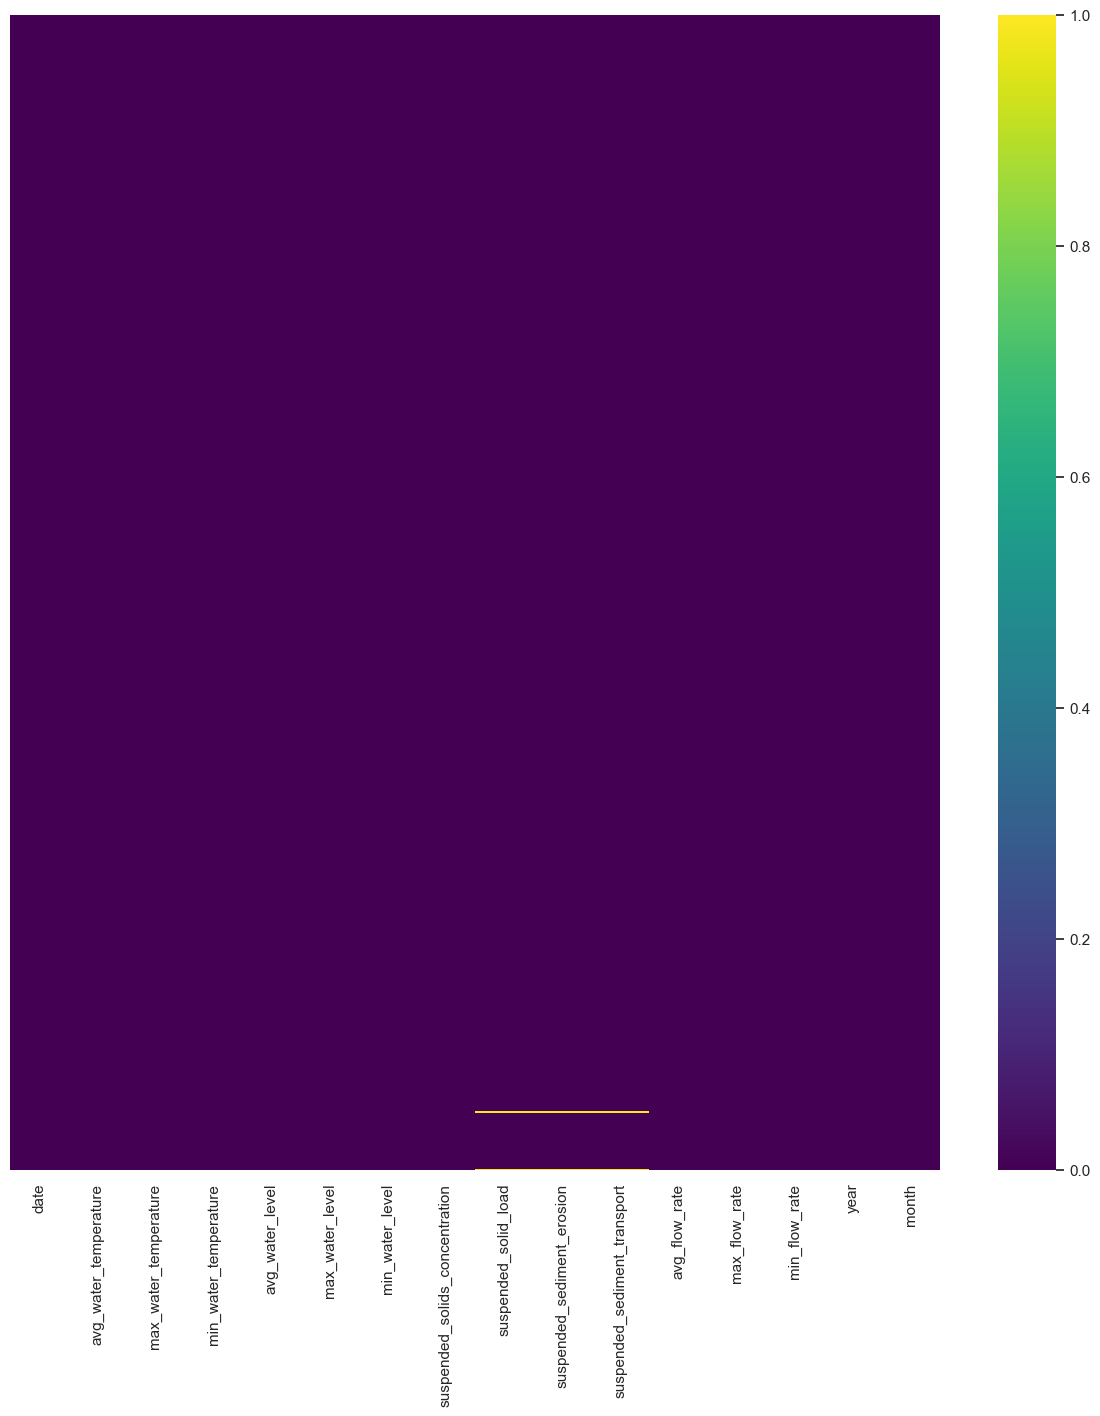

In [ ]:
# Heatmap of the nans river
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(df_river.isnull(), yticklabels=False, cbar=True, cmap='viridis')

plt.show()

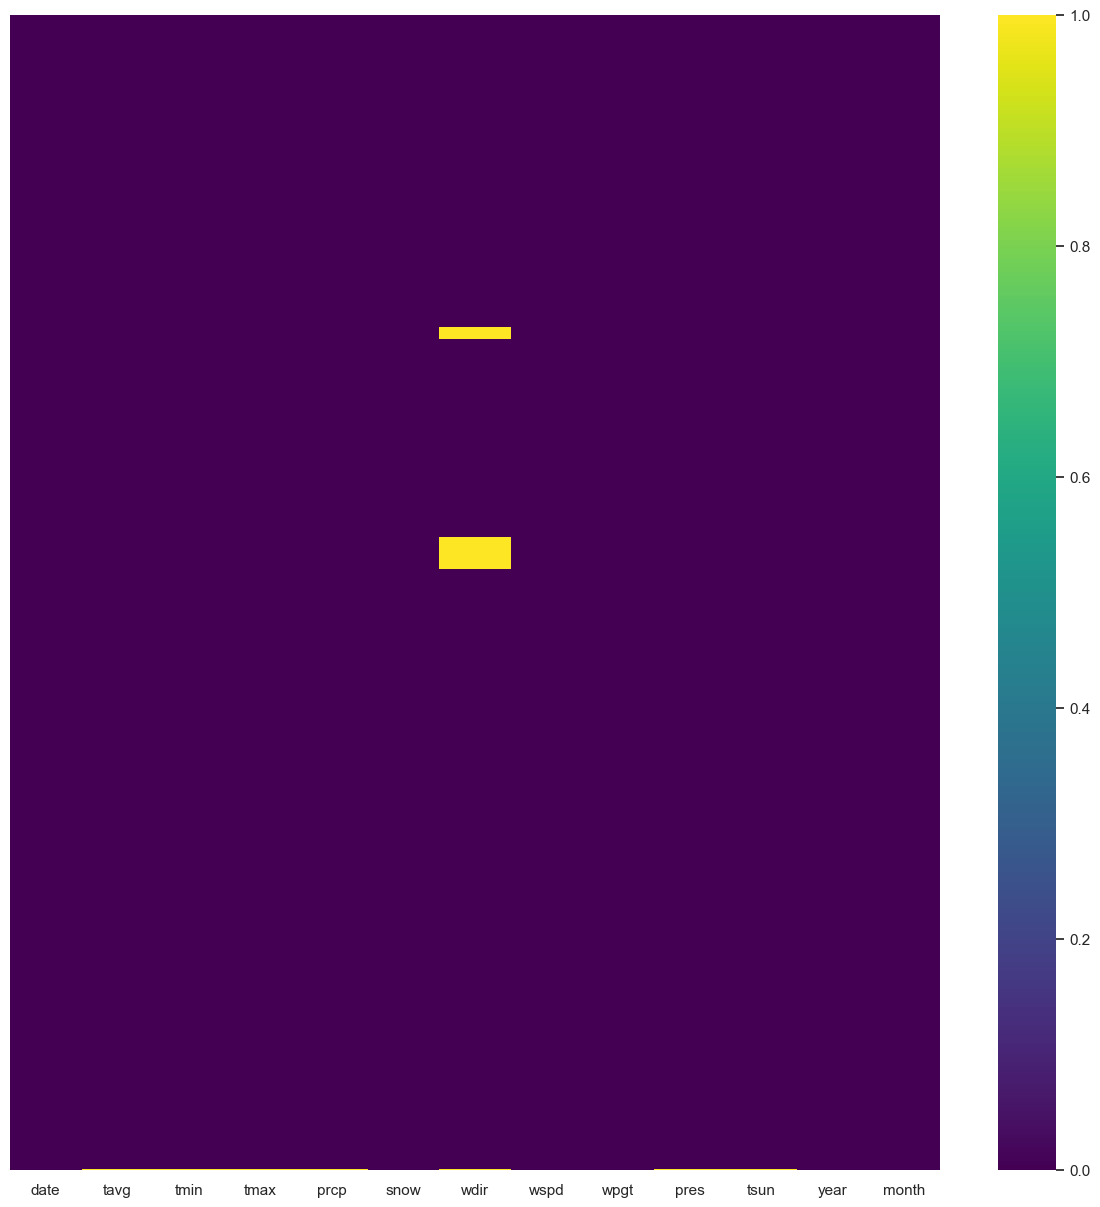

In [ ]:
# Heatmap of the nans river
sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(df_weather.isnull(), yticklabels=False, cbar=True, cmap='viridis')

plt.show()

In [ ]:
df_weather.isna().sum()

date       0
tavg       2
tmin       2
tmax       2
prcp       2
snow       0
wdir     192
wspd       0
wpgt       0
pres       4
tsun       2
year       0
month      0
dtype: int64

## 4.2 dropping duplicates

In [ ]:
# check the number of rows before dropping duplicates RIVER
df_river.shape

(15288, 16)

In [ ]:
# drop duplicates RIVER
df_river_duplicates= df_river.drop_duplicates()
df_river_duplicates.shape

(15288, 16)

In [ ]:
# check the number of rows before dropping duplicates WEATHER
df_weather.shape

(4845, 13)

In [ ]:
df_weather_duplicates = df_weather.drop_duplicates()
df_weather_duplicates.shape

(4845, 13)

In [ ]:
### NO DUPLICATES AT ALL

## 4.3 managing outliers

In [ ]:
df_river.head(10)

date  avg_water_temperature  max_water_temperature  \
0 1980-11-01                    8.1                    8.1   
1 1980-11-02                    7.3                    7.3   
2 1980-11-03                    5.8                    5.8   
3 1980-11-04                    5.6                    5.6   
4 1980-11-05                    4.8                    4.8   
5 1980-11-06                    4.7                    4.7   
6 1980-11-07                    6.1                    6.1   
7 1980-11-08                    7.7                    7.7   
8 1980-11-09                    7.5                    7.5   
9 1980-11-10                    7.6                    7.6   

   min_water_temperature  avg_water_level  max_water_level  min_water_level  \
0                    8.1               71               86               59   
1                    7.3               59               62               54   
2                    5.8               68               83               48   
3                    5.6               77               80               73   
4                    4.8               77               89               70   
5                    4.7               75               82               64   
6                    6.1               62               72               44   
7                    7.7               56               65               43   
8                    7.5               55               64               43   
9                    7.6               48               60               40   

   suspended_solids_concentration  suspended_solid_load  \
0                            5.57                 25.56   
1                            5.10                 21.54   
2                            5.14                 20.16   
3                            7.60                 31.26   
4                            9.03                 37.83   
5                            5.59                 22.19   
6                            4.58                 16.04   
7                           11.34                 40.00   
8                           13.53                 42.45   
9                           15.29                 42.92   

   suspended_sediment_erosion  suspended_sediment_transport  avg_flow_rate  \
0                        0.01                          0.30           47.9   
1                        0.01                          0.25           36.7   
2                        0.01                          0.23           45.8   
3                        0.01                          0.36           53.4   
4                        0.01                          0.44           54.1   
5                        0.01                          0.26           51.4   
6                        0.01                          0.19           39.4   
7                        0.01                          0.46           34.5   
8                        0.02                          0.49           33.3   
9                        0.02                          0.50           27.8   

   max_flow_rate  min_flow_rate  year  month  
0           63.4           37.0  1980     11  
1           39.6           32.7  1980     11  
2           60.0           27.9  1980     11  
3           56.9           49.9  1980     11  
4           66.5           47.0  1980     11  
5           58.8           41.3  1980     11  
6           48.8           24.8  1980     11  
7           42.2           24.0  1980     11  
8           41.2           24.0  1980     11  
9           37.6           21.8  1980     11

In [ ]:
df_weather.head(10)

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun  \
0 2011-06-01  11.5   9.7  13.3   4.2   0.0  288.0  14.0  44.6  1021.7    0.0   
1 2011-06-02  13.4  10.9  17.1   0.0   0.0   42.0  10.8  32.8  1026.9    6.0   
2 2011-06-03  18.0  12.8  23.8   0.0   0.0   77.0  15.1  43.6  1022.9  378.0   
3 2011-06-04  20.6  14.6  27.8   0.0   0.0   80.0  12.2  31.3  1013.7  570.0   
4 2011-06-05  19.8  13.9  27.1   4.7   0.0  269.0   9.7  67.7  1007.7  480.0   
5 2011-06-06  16.9  12.7  24.6  13.1   0.0  244.0   8.6  55.1  1005.6  264.0   
6 2011-06-07  19.4  12.1  25.2   0.0   0.0  121.0   9.0  34.9  1004.3  624.0   
7 2011-06-08  15.5  12.5  19.3   1.9   0.0  261.0  12.6  51.5  1006.3   18.0   
8 2011-06-09  13.7  12.3  15.4   0.4   0.0  310.0   7.6  19.8  1014.9    0.0   
9 2011-06-10  14.4  10.9  18.6   0.0   0.0  329.0   6.8  21.2  1015.5  150.0   

   year  month  
0  2011      6  
1  2011      6  
2  2011      6  
3  2011      6  
4  2011      6  
5  2011      6  
6  2011      6  
7  2011      6  
8  2011      6  
9  2011      6

In [ ]:
# don't have to differate in categorical and numerical, because there are only numerical variables
# RIVER:
#for col in df_river:
#  OutLiersBox(df_river, col)

In [ ]:
# looking deeper into the outliers water_level, suspendeds_solids-concentration, flow_rate
Q1 = df_river['avg_water_level'].quantile(.25)
Q3 = df_river['avg_water_level'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("water_level (avg): ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_avg_water_level = df_river[(df_river['avg_water_level']) > upper_limit]
num_outliers_avg_water_level.shape[0] #['Perceptions of corruption'].counts()

# Conclusion: 563 rows -> a lot! in 43 years

water_level (avg):  40.0 lower limit=  -1.0 upper_limit=  159.0


563

In [ ]:
df_river['year'][df_river['avg_water_level']>159.0].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023, 2024],
      dtype=int32)

In [ ]:
# looking deeper into the outliers suspendeds_solids-concentration, flow_rate
Q1 = df_river['suspended_solids_concentration'].quantile(.25)
Q3 = df_river['suspended_solids_concentration'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("'suspended_solids_concentration': ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_sus_solids_concentration = df_river[(df_river['suspended_solids_concentration']) > upper_limit]
num_outliers_sus_solids_concentration.shape[0] #['Perceptions of corruption'].counts()

# Conclusion: 1390 rows -> a lot, in 43 years

'suspended_solids_concentration':  11.09 lower limit=  -9.974999999999998 upper_limit=  34.385


1390

In [ ]:
df_river['year'][df_river['suspended_solids_concentration']>34.385].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023, 2024],
      dtype=int32)

In [ ]:
df_river['date'][df_river['suspended_solids_concentration']>34.385] == df_river['date'][df_river['avg_water_level']>159.0]

ValueError: Can only compare identically-labeled Series objects

In [ ]:
# looking deeper into the outliers of flow_rate
Q1 = df_river['avg_flow_rate'].quantile(.25)
Q3 = df_river['avg_flow_rate'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("'avg_flow_rate': ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_avg_flow_rate = df_river[(df_river['avg_flow_rate']) > upper_limit]
num_outliers_avg_flow_rate.shape[0] #['Perceptions of corruption'].counts()

# Conclusion: 854 rows -> a lot! in 43 years

'avg_flow_rate':  43.9 lower limit=  -33.74999999999999 upper_limit=  141.85


854

In [ ]:
df_river['year'][df_river['avg_flow_rate']>141.85].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023, 2024],
      dtype=int32)

In [ ]:
df_river['year'][df_river['avg_flow_rate']>141.85].unique() == df_river['year'][df_river['suspended_solids_concentration']>34.385].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
# WEATHER:
#for col in df_weather:
   # OutLiersBox(df_weather, col)

# Creating the final dataframe

columns for swimming: 
- `max water temperature`
- `avg water level`
- `suspended solids concentration`
- `max flow rate`
- `max temperature`
- `total precipitation`
- `avg windspeed`
- `peak gust`

additional columns for ice-bath:
- `snow_depth`


## 1. river
- max water temperature: > 18 °C*
- avg water level: < 120 cm
- suspended solids concentration < 25 m3/s
- max flow rate: < 75 m3/s*


In [ ]:
df_river_final = df_river[['date', 'max_water_temperature', 'avg_water_level', 'suspended_solids_concentration', 'max_flow_rate']]
df_river_final

date  max_water_temperature  avg_water_level  \
0     1980-11-01                    8.1               71   
1     1980-11-02                    7.3               59   
2     1980-11-03                    5.8               68   
3     1980-11-04                    5.6               77   
4     1980-11-05                    4.8               77   
...          ...                    ...              ...   
15283 2024-08-27                   17.6              130   
15284 2024-08-28                   19.0              117   
15285 2024-08-29                   19.6              114   
15286 2024-08-30                   19.8              114   
15287 2024-08-31                   19.7              109   

       suspended_solids_concentration  max_flow_rate  
0                                5.57           63.4  
1                                5.10           39.6  
2                                5.14           60.0  
3                                7.60           56.9  
4                                9.03           66.5  
...                               ...            ...  
15283                           34.95           76.7  
15284                           34.95           53.0  
15285                           34.95           46.1  
15286                           34.95           46.1  
15287                           34.95           44.8  

[15288 rows x 5 columns]

In [ ]:
df_river_final.tail(20)

date  max_water_temperature  avg_water_level  \
15268 2024-08-12                   21.3              108   
15269 2024-08-13                   21.4              113   
15270 2024-08-14                   21.0              118   
15271 2024-08-15                   20.8              134   
15272 2024-08-16                   20.6              117   
15273 2024-08-17                   20.3              115   
15274 2024-08-18                   20.2              117   
15275 2024-08-19                   18.6              167   
15276 2024-08-20                   17.3              165   
15277 2024-08-21                   18.0              143   
15278 2024-08-22                   18.4              131   
15279 2024-08-23                   19.1              127   
15280 2024-08-24                   20.0              126   
15281 2024-08-25                   19.7              121   
15282 2024-08-26                   17.4              142   
15283 2024-08-27                   17.6              130   
15284 2024-08-28                   19.0              117   
15285 2024-08-29                   19.6              114   
15286 2024-08-30                   19.8              114   
15287 2024-08-31                   19.7              109   

       suspended_solids_concentration  max_flow_rate  
15268                          487.95           43.5  
15269                          487.97           48.8  
15270                          487.96           54.5  
15271                          487.95           87.5  
15272                          487.95           60.3  
15273                          487.97           53.0  
15274                          487.88           67.7  
15275                          487.77          167.0  
15276                          487.72          155.0  
15277                          481.78           95.4  
15278                           34.95           75.2  
15279                           34.95           66.2  
15280                           34.95           67.7  
15281                           34.95           87.5  
15282                           34.95           96.9  
15283                           34.95           76.7  
15284                           34.95           53.0  
15285                           34.95           46.1  
15286                           34.95           46.1  
15287                           34.95           44.8

In [ ]:
df_river_final.isna().sum()

date                              0
max_water_temperature             0
avg_water_level                   0
suspended_solids_concentration    0
max_flow_rate                     0
dtype: int64

## 2. weather
- `max temperature`
- `total precipitation`
- `avg windspeed`
- `peak gust`

additional columns for ice-bath:
- `snow_depth`


In [ ]:
# creating dataframe to observate the suitability to go swimming in the Isar, values of the weather:
#df_swimming_weather = 
cols_weather_drop = ['tavg', 
                     'tmin',
                     'wdir',
                     'pres', 
                     'tsun',
                     'year',
                     'month'
                    ]
cols_weather_drop
df_weather_final = df_weather.drop(columns=cols_weather_drop)
df_weather_final


date  tmax  prcp  snow   wspd   wpgt
0    2011-06-01  13.3   4.2   0.0  14.00  44.60
1    2011-06-02  17.1   0.0   0.0  10.80  32.80
2    2011-06-03  23.8   0.0   0.0  15.10  43.60
3    2011-06-04  27.8   0.0   0.0  12.20  31.30
4    2011-06-05  27.1   4.7   0.0   9.70  67.70
...         ...   ...   ...   ...    ...    ...
2799 2024-09-01  29.5   0.0   0.0   7.20  22.00
2800 2024-09-02  27.2   0.0   0.0   7.60  30.20
2801 2024-09-03  28.9   0.0   0.0   5.40  18.70
2802 2024-09-04   NaN   NaN   0.0   8.43  29.83
2803 2024-09-05   NaN   NaN   0.0   8.43  29.83

[4845 rows x 6 columns]

In [ ]:
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tmax    4843 non-null   float64       
 2   prcp    4843 non-null   float64       
 3   snow    4845 non-null   float64       
 4   wspd    4845 non-null   float64       
 5   wpgt    4845 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 265.0 KB


In [ ]:
df_weather_final.isna().sum()

date    0
tmax    2
prcp    2
snow    0
wspd    0
wpgt    0
dtype: int64

In [ ]:
# rows in Septemeber 2024 I drop:
df_weather_final = df_swimming_weather[df_swimming_weather['date']<='2024-08-31']
df_weather_final

date  tmax  prcp  snow  wspd   wpgt
0    2011-06-01  13.3   4.2   0.0  14.0  44.60
1    2011-06-02  17.1   0.0   0.0  10.8  32.80
2    2011-06-03  23.8   0.0   0.0  15.1  43.60
3    2011-06-04  27.8   0.0   0.0  12.2  31.30
4    2011-06-05  27.1   4.7   0.0   9.7  67.70
...         ...   ...   ...   ...   ...    ...
2794 2024-08-27  24.6   0.0   0.0   8.6  31.70
2795 2024-08-28  29.6   0.0   0.0   5.0  34.09
2796 2024-08-29  31.2   0.0   0.0   6.1  23.80
2797 2024-08-30  30.8   0.0   0.0   6.1  24.50
2798 2024-08-31  30.0   0.0   0.0   8.3  33.80

[4840 rows x 6 columns]

In [ ]:
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4840 entries, 0 to 2798
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4840 non-null   datetime64[ns]
 1   tmax    4840 non-null   float64       
 2   prcp    4840 non-null   float64       
 3   snow    4840 non-null   float64       
 4   wspd    4840 non-null   float64       
 5   wpgt    4840 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 264.7 KB


## 3. creating df_final

In [ ]:
#joining swimming-water and swimming-weather to one dataframe 

df_final= pd.merge(df_weather_final, df_river_final, 
                       how='left', on='date')
df_final

date  tmax  prcp  snow  wspd   wpgt  max_water_temperature  \
0    2011-06-01  13.3   4.2   0.0  14.0  44.60                   16.1   
1    2011-06-02  17.1   0.0   0.0  10.8  32.80                   13.2   
2    2011-06-03  23.8   0.0   0.0  15.1  43.60                   14.8   
3    2011-06-04  27.8   0.0   0.0  12.2  31.30                   16.4   
4    2011-06-05  27.1   4.7   0.0   9.7  67.70                   17.1   
...         ...   ...   ...   ...   ...    ...                    ...   
4835 2024-08-27  24.6   0.0   0.0   8.6  31.70                   17.6   
4836 2024-08-28  29.6   0.0   0.0   5.0  34.09                   19.0   
4837 2024-08-29  31.2   0.0   0.0   6.1  23.80                   19.6   
4838 2024-08-30  30.8   0.0   0.0   6.1  24.50                   19.8   
4839 2024-08-31  30.0   0.0   0.0   8.3  33.80                   19.7   

      avg_water_level  suspended_solids_concentration  max_flow_rate  
0               107.0                          126.14          192.0  
1                82.0                          114.69           98.7  
2                62.0                           90.89           60.0  
3                52.0                           67.09           42.4  
4                49.0                           43.29           43.6  
...               ...                             ...            ...  
4835            130.0                           34.95           76.7  
4836            117.0                           34.95           53.0  
4837            114.0                           34.95           46.1  
4838            114.0                           34.95           46.1  
4839            109.0                           34.95           44.8  

[4840 rows x 10 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            4840 non-null   datetime64[ns]
 1   tmax                            4840 non-null   float64       
 2   prcp                            4840 non-null   float64       
 3   snow                            4840 non-null   float64       
 4   wspd                            4840 non-null   float64       
 5   wpgt                            4840 non-null   float64       
 6   max_water_temperature           4122 non-null   float64       
 7   avg_water_level                 4122 non-null   float64       
 8   suspended_solids_concentration  4122 non-null   float64       
 9   max_flow_rate                   4122 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 378.2 KB


In [ ]:
df_final.isna().sum()

date                                0
tmax                                0
prcp                                0
snow                                0
wspd                                0
wpgt                                0
max_water_temperature             718
avg_water_level                   718
suspended_solids_concentration    718
max_flow_rate                     718
dtype: int64

# 4. adding a variable "swimming" yes/no (1/0), "swimming_hardcore" yes/no (1/0) and "ice-bath" yes/no(1/0)

`swimming = 1, if...`
- `max water temperature: > 18 °C`
- `avg water level: > 120 cm`
- `suspended solids concentration < 25 m3/s`
- `max flow rate: < 75 m3/s`
- `max temperature: > 25 °C`
- `total precipitation < 30 mm/day`
- `avg windspeed <30km/h`
- `peak gust <50km/h`


In [ ]:
def determine_swimming(row):
	if (row['max_water_temperature'] > 18.0) and \
		(row['avg_water_level'] < 120.0) and \
		(row['suspended_solids_concentration'] < 25.0) and \
		(row['max_flow_rate'] < 75.0) and \
		(row['tmax'] > 25.0) and \
		(row['prcp'] < 30.0) and \
		(row['wspd'] < 30.0) and \
		(row['wpgt'] < 50.0):
		return 1
	return 0

#Apply to each row
df_final['swimming']=df_final.apply(determine_swimming,axis=1)

# !!!! for the presentation just remove it and talk about it
# checking limit values by myself and play a little bit around

In [ ]:
df_final.swimming.value_counts()

swimming
0    4639
1     201
Name: count, dtype: int64

In [ ]:
def determine_swimming_hardcore_new(row):
	if (row['max_water_temperature'] > 15.0) and \
		(row['avg_water_level'] < 160.0) and \
		(row['suspended_solids_concentration'] < 80.0) and \
		(row['max_flow_rate'] < 90.0) and \
		(row['tmax'] > 20.0) and \
		(row['prcp'] < 60.0) and \
		(row['wspd'] < 30.0) and \
		(row['wpgt'] < 50.0) and \
		(row['swimming'] == 0):
		return 1
	return 0

#Apply to each row
df_final['swimming_hardcore_new']=df_final.apply(determine_swimming_hardcore_new,axis=1)

# !!!! for the presentation just remove it and talk about it
# checking limit values by myself and play a little bit around

In [ ]:
df_final.swimming_hardcore_new.value_counts()

swimming_hardcore_new
0    4404
1     436
Name: count, dtype: int64

In [ ]:
df_final['swimming_hardcore'].value_counts()

swimming_hardcore
0    4203
1     637
Name: count, dtype: int64

In [ ]:
# creating a 2nd variable swimming_hardcore with other conditions
def determine_swimming_hardcore(row):
	if (row['max_water_temperature'] > 15.0) and \
		(row['avg_water_level'] < 160.0) and \
		(row['suspended_solids_concentration'] < 80.0) and \
		(row['max_flow_rate'] < 90.0) and \
		(row['tmax'] > 20.0) and \
		(row['prcp'] < 60.0) and \
		(row['wspd'] < 30.0) and \
		(row['wpgt'] < 50.0):
		return 1
	return 0

#Apply to each row
df_final['swimming_hardcore']=df_final.apply(determine_swimming_hardcore,axis=1)

In [ ]:
df_final.swimming_hardcore.value_counts()

swimming_hardcore
0    4203
1     637
Name: count, dtype: int64

In [ ]:
# creating a 3rd variable "ice_bath":

def determine_ice_bath(row):
	if (row['max_water_temperature'] < 11.0) and \
		(row['avg_water_level'] < 120.0) and \
		(row['suspended_solids_concentration'] < 25.0) and \
		(row['max_flow_rate'] < 65.0) and \
		(row['tmax'] > -10.0) and \
		(row['prcp'] < 15.0) and \
		(row['wspd'] < 11.0) and \
		(row['wpgt'] < 50.0) and \
		(row['snow'] < 30.0):
		return 1
	return 0

#Apply to each row
df_final['ice_bath']=df_final.apply(determine_ice_bath,axis=1)

# !!!! for the presentation just remove it and talk about it
# checking limit values by myself and play a little bit around

In [ ]:
df_final.ice_bath.value_counts()

ice_bath
0    4087
1     753
Name: count, dtype: int64

In [ ]:
df_final = df_final.drop(columns=['swimming_harcore_new', 'swimming_harcore_new_new'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            4840 non-null   datetime64[ns]
 1   tmax                            4840 non-null   float64       
 2   prcp                            4840 non-null   float64       
 3   snow                            4840 non-null   float64       
 4   wspd                            4840 non-null   float64       
 5   wpgt                            4840 non-null   float64       
 6   max_water_temperature           4122 non-null   float64       
 7   avg_water_level                 4122 non-null   float64       
 8   suspended_solids_concentration  4122 non-null   float64       
 9   max_flow_rate                   4122 non-null   float64       
 10  swimming                        4840 non-null   int64         
 11  swim

In [ ]:
df_final.describe().T

count                           mean  \
date                              4840  2018-01-15 01:52:45.619834624   
tmax                            4840.0                      15.632066   
prcp                            4840.0                       2.633136   
snow                            4840.0                       4.950413   
wspd                            4840.0                       9.957729   
wpgt                            4840.0                      34.946771   
max_water_temperature           4122.0                      11.254755   
avg_water_level                 4122.0                      91.763464   
suspended_solids_concentration  4122.0                      28.684668   
max_flow_rate                   4122.0                      72.761815   
swimming                        4840.0                       0.041529   
swimming_hardcore               4840.0                       0.131612   
ice_bath                        4840.0                       0.155579   
swimming_hardcore_new           4840.0                       0.090083   

                                                min                  25%  \
date                            2011-06-01 00:00:00  2014-09-22 18:00:00   
tmax                                           -9.7                  8.6   
prcp                                            0.0                  0.0   
snow                                            0.0                  0.0   
wspd                                            0.7                  7.2   
wpgt                                            9.4                 24.1   
max_water_temperature                           0.5                  6.5   
avg_water_level                                27.0                 67.0   
suspended_solids_concentration                 1.39               5.1825   
max_flow_rate                                  14.8                 35.4   
swimming                                        0.0                  0.0   
swimming_hardcore                               0.0                  0.0   
ice_bath                                        0.0                  0.0   
swimming_hardcore_new                           0.0                  0.0   

                                                50%                  75%  \
date                            2018-01-15 12:00:00  2021-05-09 06:00:00   
tmax                                           15.6                 22.9   
prcp                                            0.0                  2.5   
snow                                            0.0                  0.0   
wspd                                            9.0                 11.5   
wpgt                                           31.7                 42.1   
max_water_temperature                          11.0                 15.8   
avg_water_level                                87.0                108.0   
suspended_solids_concentration                8.805                14.57   
max_flow_rate                                  56.2               89.475   
swimming                                        0.0                  0.0   
swimming_hardcore                               0.0                  0.0   
ice_bath                                        0.0                  0.0   
swimming_hardcore_new                           0.0                  0.0   

                                                max        std  
date                            2024-08-31 00:00:00        NaN  
tmax                                           36.9   9.031521  
prcp                                           91.5   5.947421  
snow                                          420.0  24.274503  
wspd                                           36.7   4.203328  
wpgt                                          119.9  14.695314  
max_water_temperature                          21.9   5.104476  
avg_water_level                               339.0  36.047982  
suspended_solids_concentration              2000.97  128.84849  
max_f

In [ ]:
df_final.head(20)

date  tmax  prcp  snow  wspd  wpgt  max_water_temperature  \
0  2011-06-01  13.3   4.2   0.0  14.0  44.6                   16.1   
1  2011-06-02  17.1   0.0   0.0  10.8  32.8                   13.2   
2  2011-06-03  23.8   0.0   0.0  15.1  43.6                   14.8   
3  2011-06-04  27.8   0.0   0.0  12.2  31.3                   16.4   
4  2011-06-05  27.1   4.7   0.0   9.7  67.7                   17.1   
5  2011-06-06  24.6  13.1   0.0   8.6  55.1                   17.1   
6  2011-06-07  25.2   0.0   0.0   9.0  34.9                   16.7   
7  2011-06-08  19.3   1.9   0.0  12.6  51.5                   16.5   
8  2011-06-09  15.4   0.4   0.0   7.6  19.8                   14.9   
9  2011-06-10  18.6   0.0   0.0   6.8  21.2                   13.8   
10 2011-06-11  16.3   5.5   0.0   9.0  35.6                   13.6   
11 2011-06-12  21.7   0.0   0.0   7.6  23.0                   14.7   
12 2011-06-13  19.0   0.2   0.0   7.6  27.7                   14.5   
13 2011-06-14  23.7   0.3   0.0   6.8  30.6                   15.1   
14 2011-06-15  27.0   4.8   0.0   6.5  26.3                   17.0   
15 2011-06-16  27.8   7.3   0.0   9.7  68.0                   17.3   
16 2011-06-17  23.2   7.8   0.0   9.4  30.6                   17.5   
17 2011-06-18  17.4  12.2   0.0  12.6  51.1                   16.9   
18 2011-06-19  16.4   3.8   0.0  15.1  63.4                   13.8   
19 2011-06-20  19.1   0.2   0.0  10.1  35.6                   13.5   

    avg_water_level  suspended_solids_concentration  max_flow_rate  swimming  \
0             107.0                          126.14          192.0         0   
1              82.0                          114.69           98.7         0   
2              62.0                           90.89           60.0         0   
3              52.0                           67.09           42.4         0   
4              49.0                           43.29           43.6         0   
5              63.0                           21.59           70.4         0   
6              56.0                           16.26           45.5         0   
7              52.0                           14.40           42.3         0   
8              52.0                           12.55           45.2         0   
9              61.0                           11.20           59.6         0   
10             63.0                           11.50           55.2         0   
11             64.0                           11.92           58.7         0   
12             54.0                           12.34           46.8         0   
13             53.0                           12.77           43.9         0   
14             53.0                           13.19           47.0         0   
15             58.0                           13.62           50.2         0   
16             73.0                           14.39           79.3         0   
17             85.0                           16.64          144.0         0   
18            140.0                           19.06          203.0         0   
19            103.0                           20.22          140.0         0   

    swimming_hardcore  ice_bath  
0                   0         0  
1                   0         0  
2                   0         0  
3                   1         0  
4                   0         0  
5                   0         0  
6                   1         0  
7                   0         0  
8                   0         0  
9                   0         0  
10                  0         0  
11                  0         0  
12                  0         0  
13                  1         0  
14                  1         0  
15                  0         0  
16                  1         0  
17                  0         0  
18                  0         0  
19                  0         0

In [ ]:
df_final.to_csv("data_isar.csv", sep=';', decimal=',', index=False)

In [ ]:
df_final

date  tmax  prcp  snow  wspd   wpgt  max_water_temperature  \
0    2011-06-01  13.3   4.2   0.0  14.0  44.60                   16.1   
1    2011-06-02  17.1   0.0   0.0  10.8  32.80                   13.2   
2    2011-06-03  23.8   0.0   0.0  15.1  43.60                   14.8   
3    2011-06-04  27.8   0.0   0.0  12.2  31.30                   16.4   
4    2011-06-05  27.1   4.7   0.0   9.7  67.70                   17.1   
...         ...   ...   ...   ...   ...    ...                    ...   
4835 2024-08-27  24.6   0.0   0.0   8.6  31.70                   17.6   
4836 2024-08-28  29.6   0.0   0.0   5.0  34.09                   19.0   
4837 2024-08-29  31.2   0.0   0.0   6.1  23.80                   19.6   
4838 2024-08-30  30.8   0.0   0.0   6.1  24.50                   19.8   
4839 2024-08-31  30.0   0.0   0.0   8.3  33.80                   19.7   

      avg_water_level  suspended_solids_concentration  max_flow_rate  \
0               107.0                          126.14          192.0   
1                82.0                          114.69           98.7   
2                62.0                           90.89           60.0   
3                52.0                           67.09           42.4   
4                49.0                           43.29           43.6   
...               ...                             ...            ...   
4835            130.0                           34.95           76.7   
4836            117.0                           34.95           53.0   
4837            114.0                           34.95           46.1   
4838            114.0                           34.95           46.1   
4839            109.0                           34.95           44.8   

      swimming  swimming_hardcore  ice_bath  swimming_hardcore_new  
0            0                  0         0                      0  
1            0                  0         0                      0  
2            0                  0         0                      0  
3            0                  1         0                      1  
4            0                  0         0                      0  
...        ...                ...       ...                    ...  
4835         0                  1         0                      1  
4836         0                  1         0                      1  
4837         0                  1         0                      1  
4838         0                  1         0                      1  
4839         0                  1         0                      1  

[4840 rows x 14 columns]

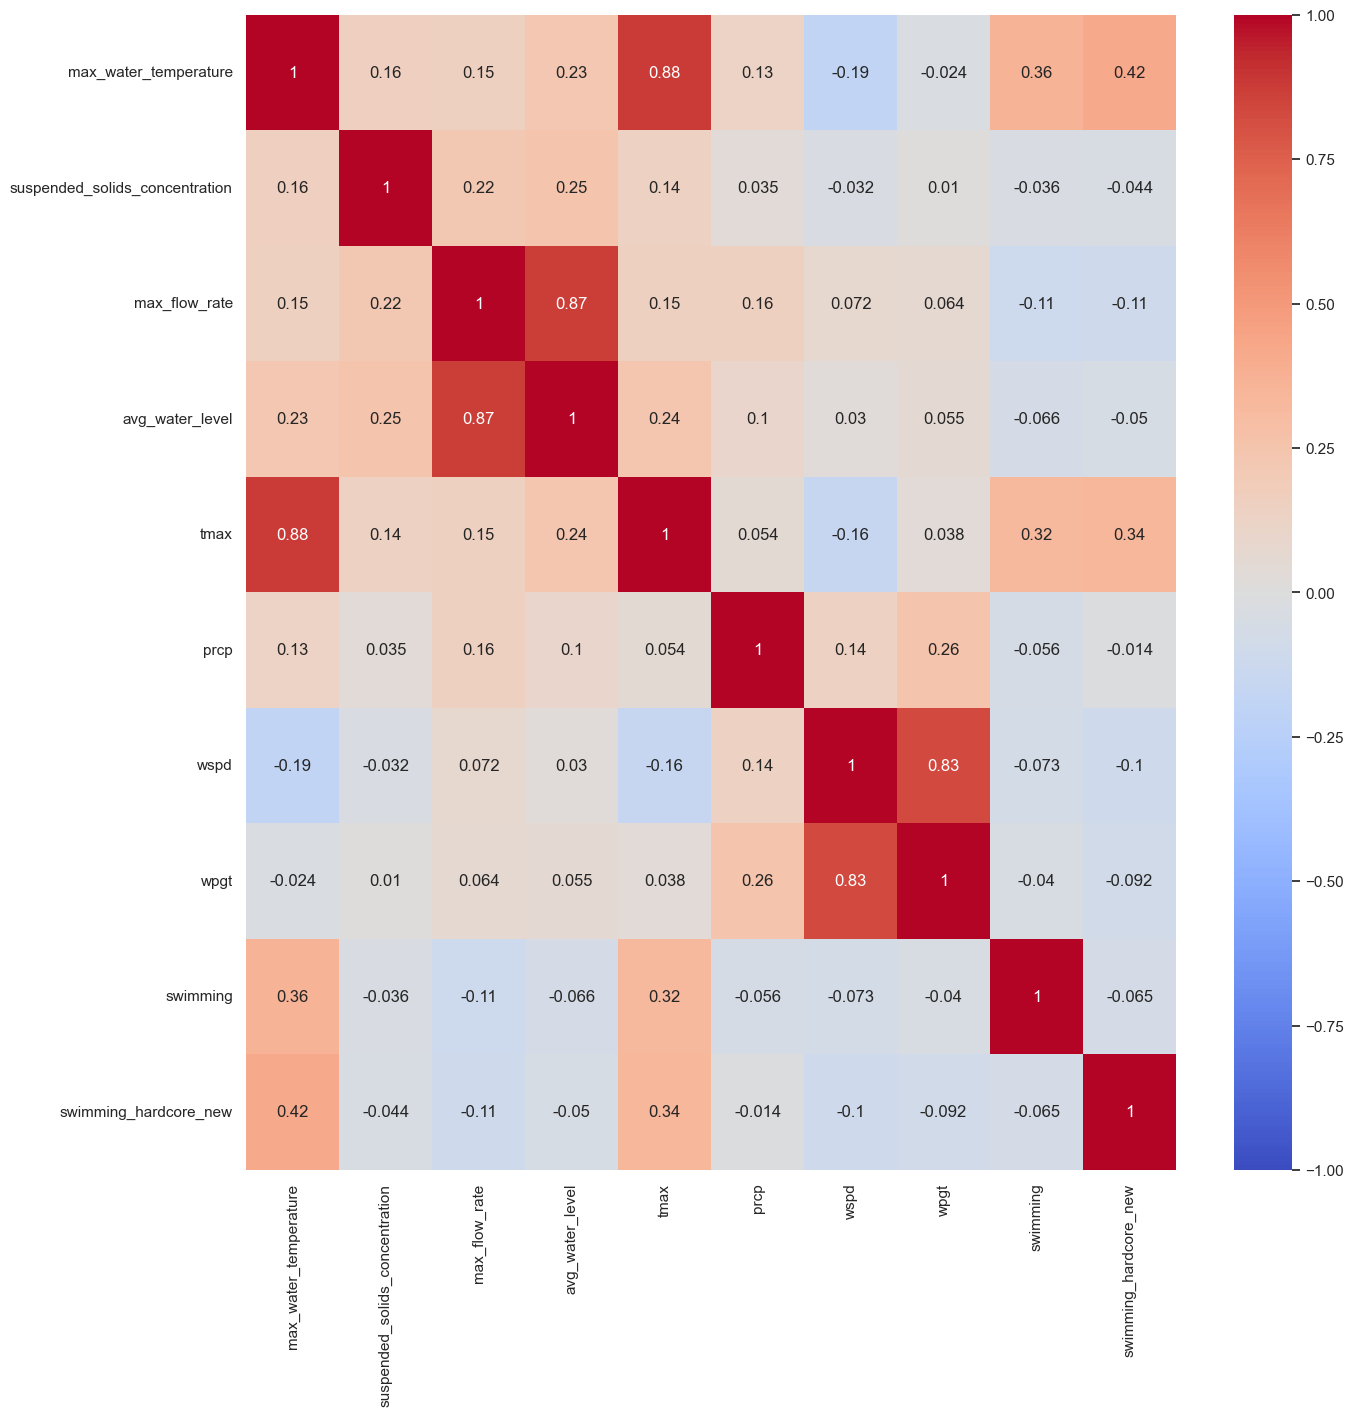

In [ ]:
# heatmap with all the variables and swimming-variables:
df_final_heatmap_swimming = df_final[['max_water_temperature', 'suspended_solids_concentration', 'max_flow_rate','avg_water_level', 'tmax', 'prcp', 'wspd', 'wpgt','swimming', 'swimming_hardcore_new']]
# Berechne die Korrelationsmatrix
correlation_matrix = df_final_heatmap_swimming.corr()

# Erstelle die Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Zeige die Heatmap
plt.show()

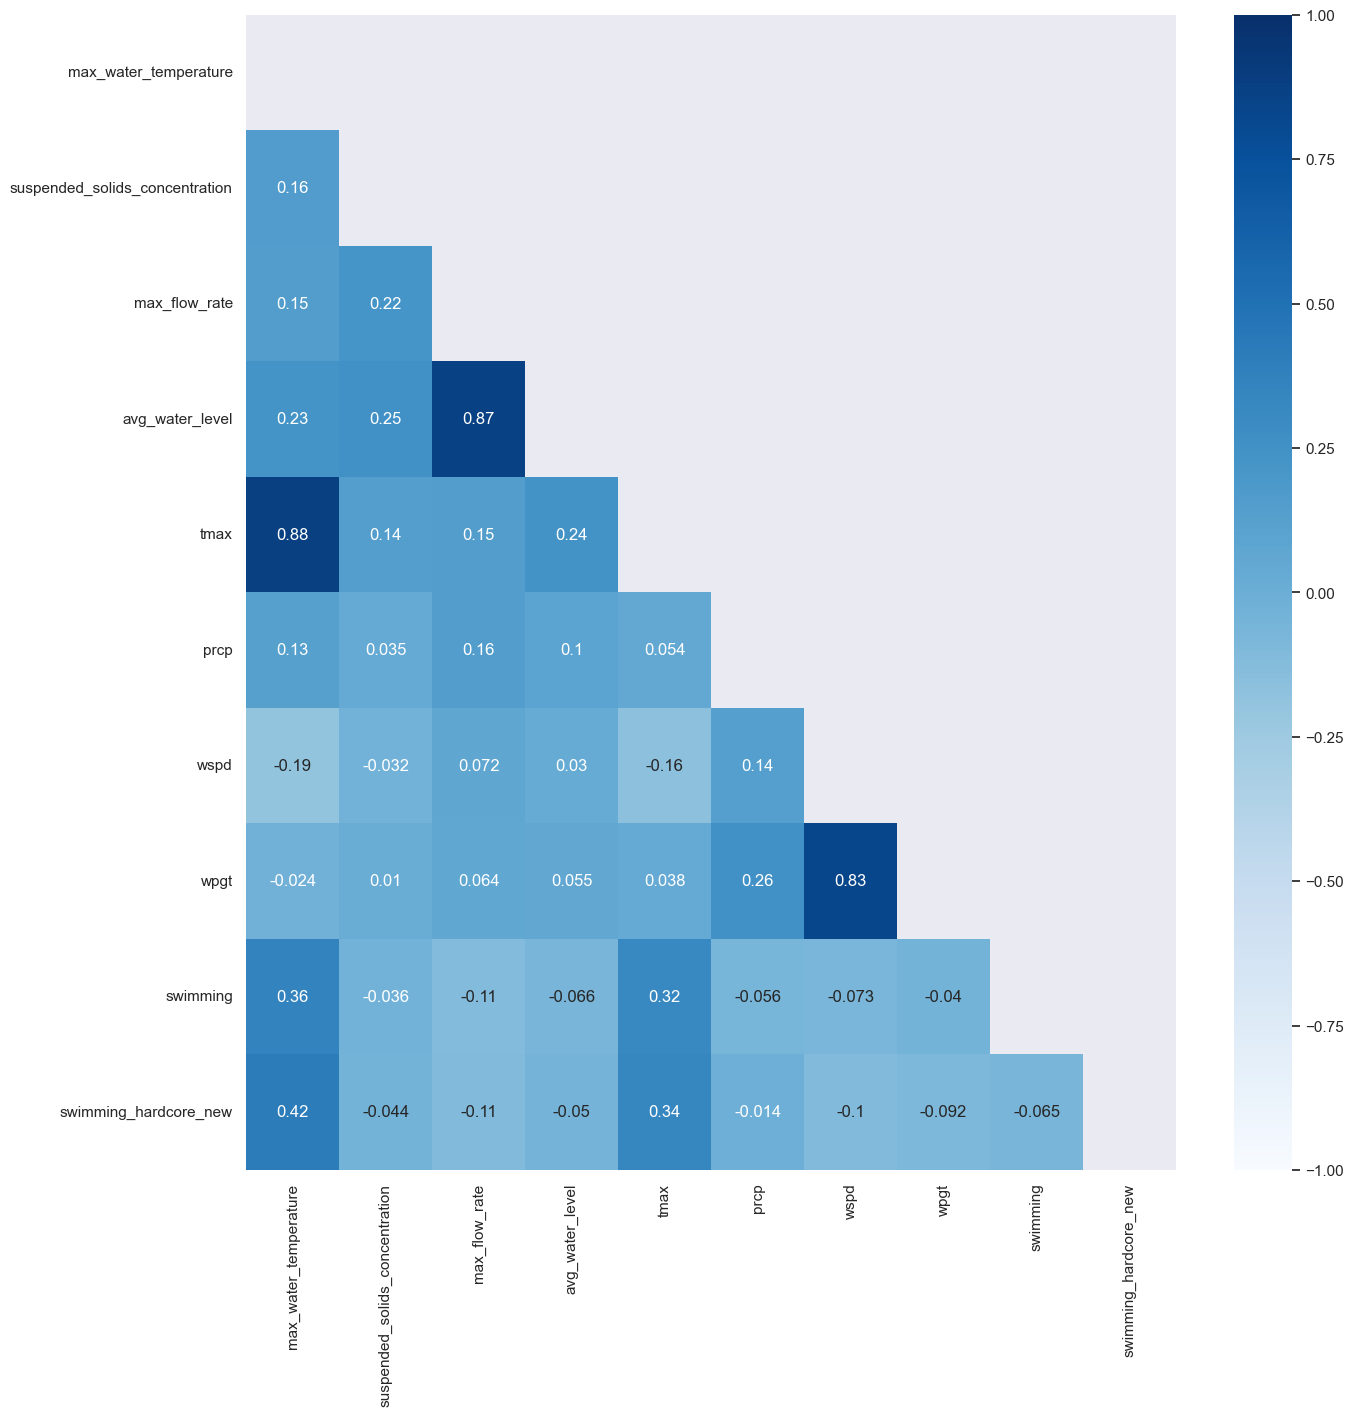

In [ ]:
# Erstelle eine Maske für das obere Dreieck
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Erstelle die Heatmap mit der Maske
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="Blues", vmin=-1, vmax=1)

# Zeige die Heatmap
plt.show()

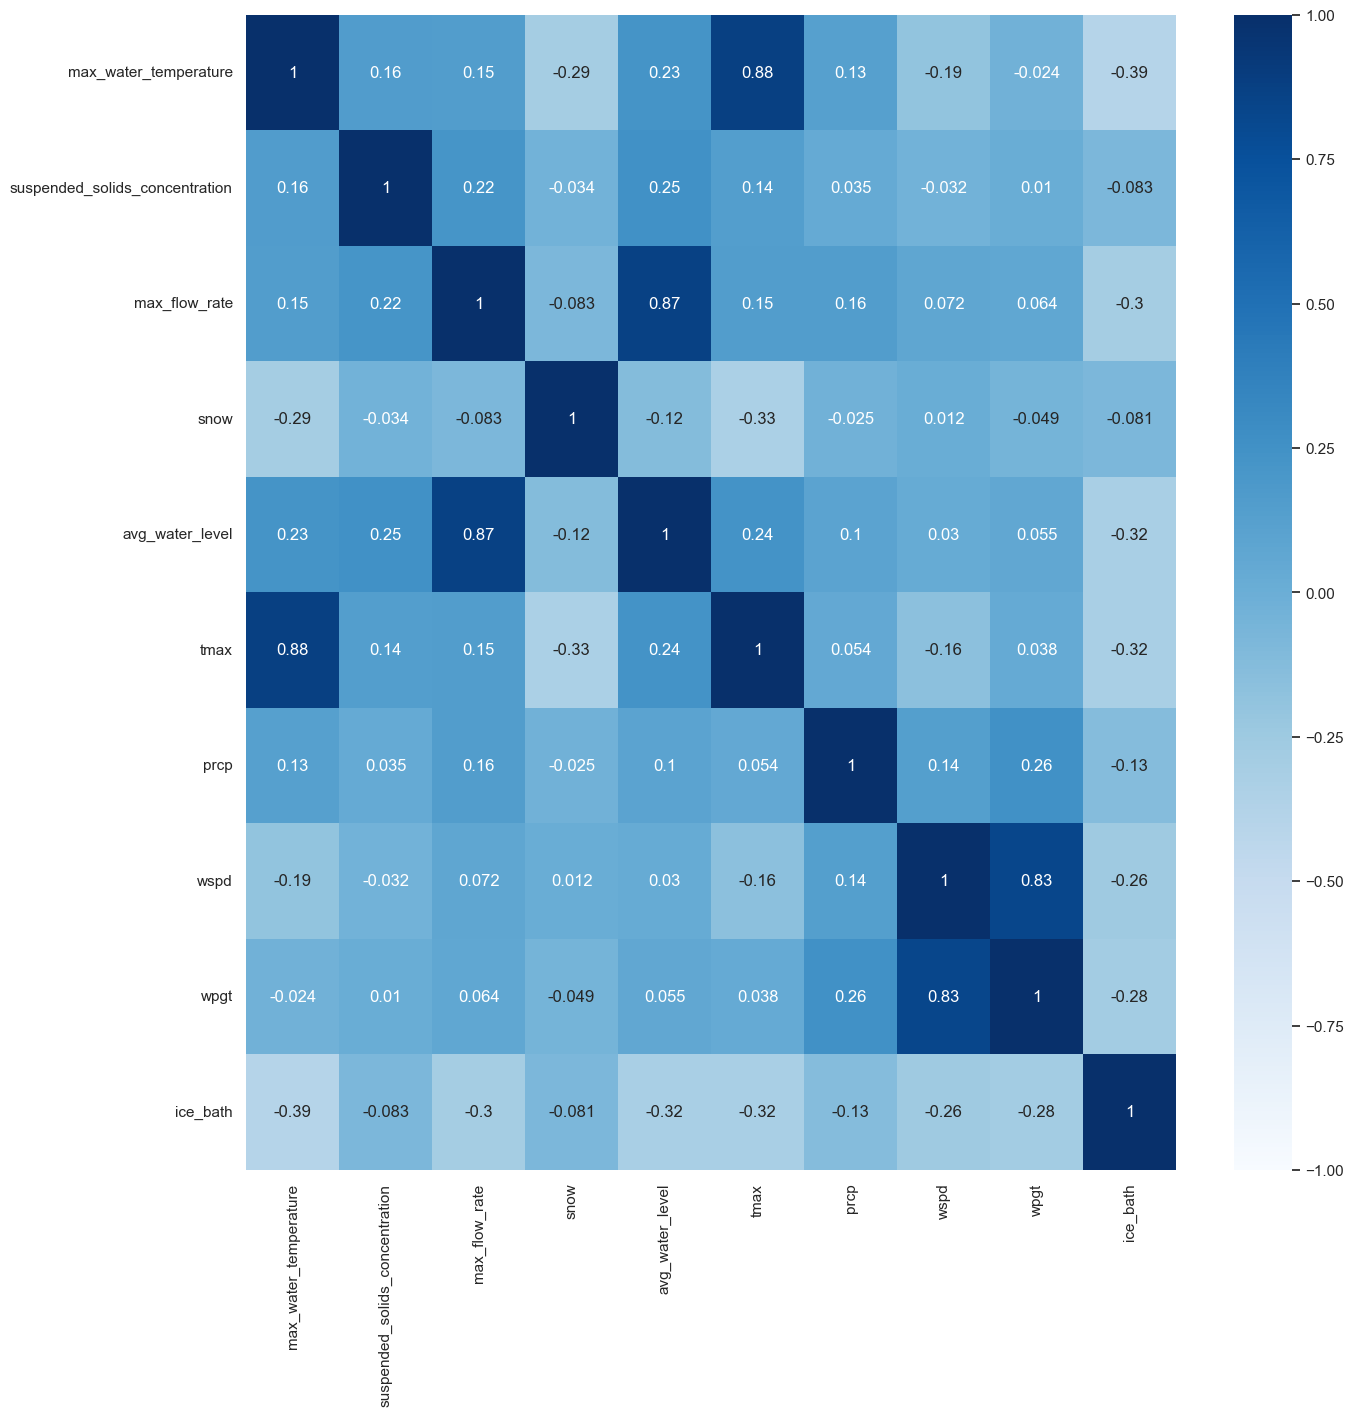

In [ ]:
# heatmap with all the variables and ice-bath-variables:
df_final_heatmap_ice = df_final[['max_water_temperature', 'suspended_solids_concentration', 'max_flow_rate','snow','avg_water_level', 'tmax', 'prcp', 'wspd', 'wpgt','ice_bath']]
# Berechne die Korrelationsmatrix
correlation_matrix_ice = df_final_heatmap_ice.corr()

# Erstelle die Heatmap
sns.heatmap(correlation_matrix_ice, annot=True, cmap="Blues", vmin=-1, vmax=1)

# Zeige die Heatmap
plt.show()

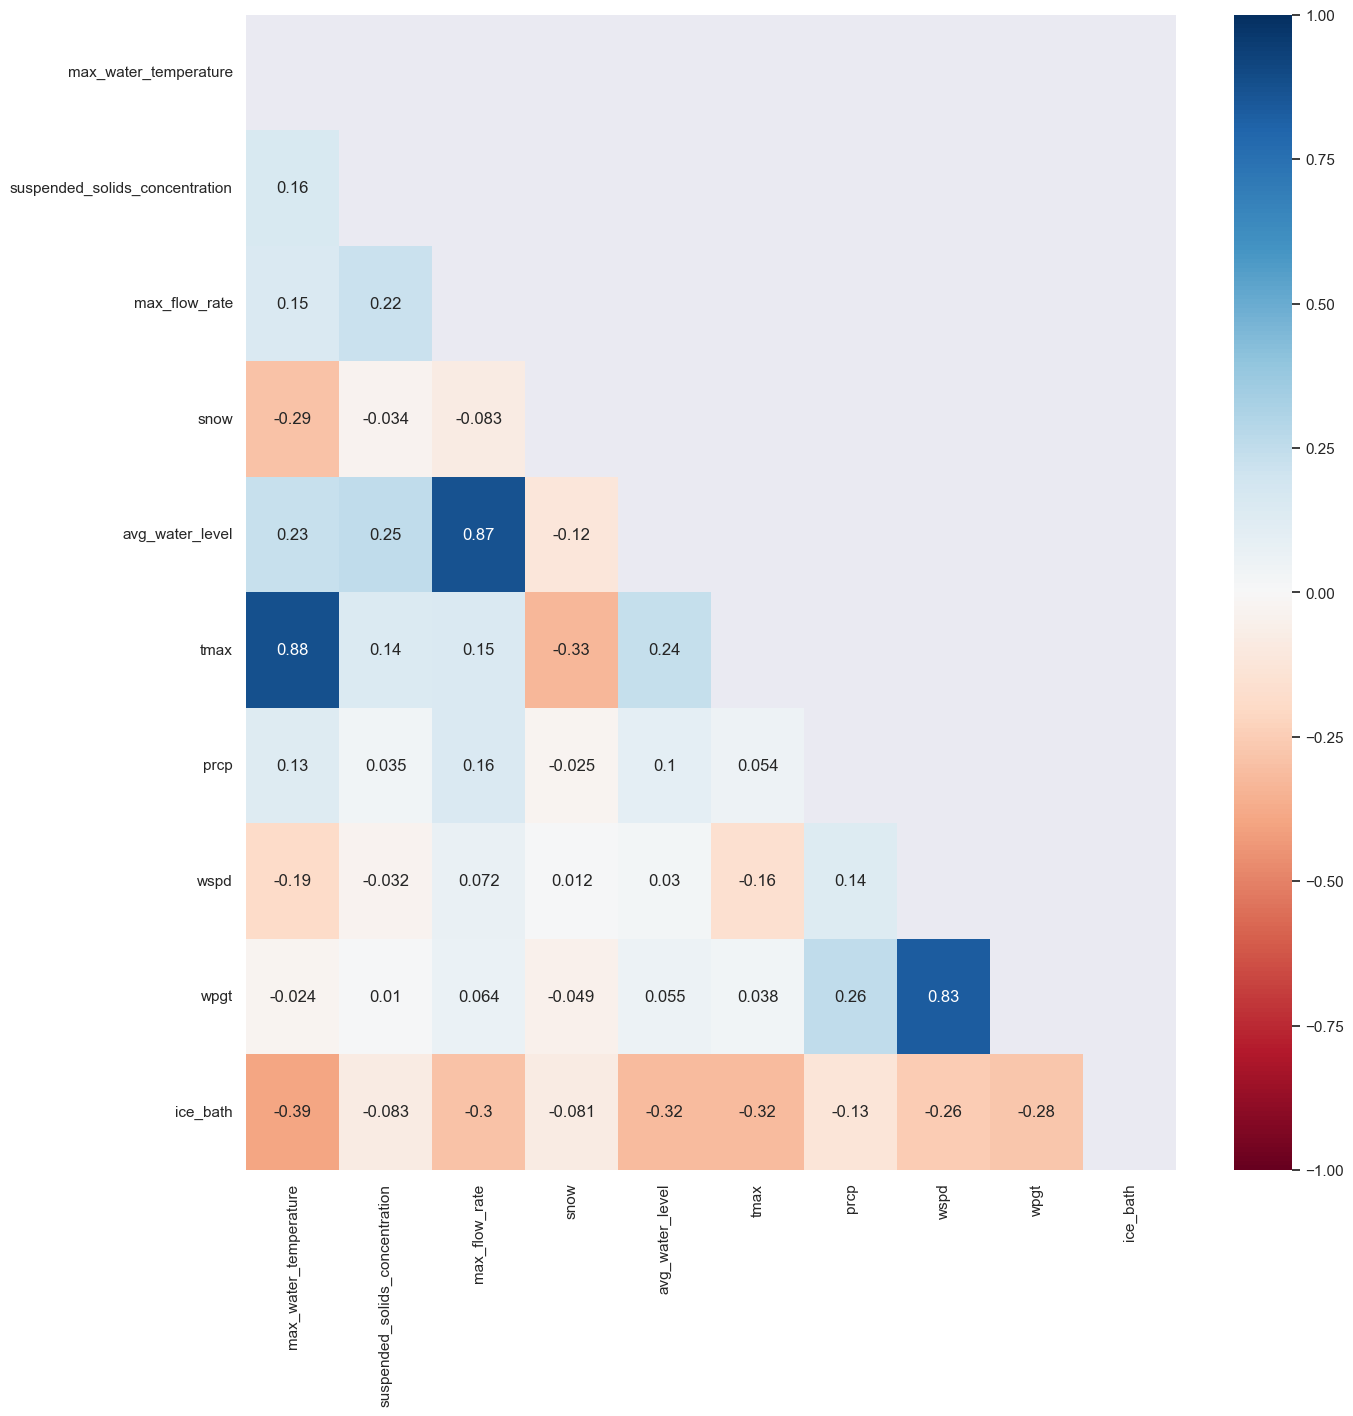

In [ ]:
# Erstelle eine Maske für das obere Dreieck
mask = np.triu(np.ones_like(correlation_matrix_ice, dtype=bool))

# Erstelle die Heatmap mit der Maske
sns.heatmap(correlation_matrix_ice, mask=mask, annot=True, cmap="RdBu", vmin=-1, vmax=1)

# Zeige die Heatmap
plt.show()

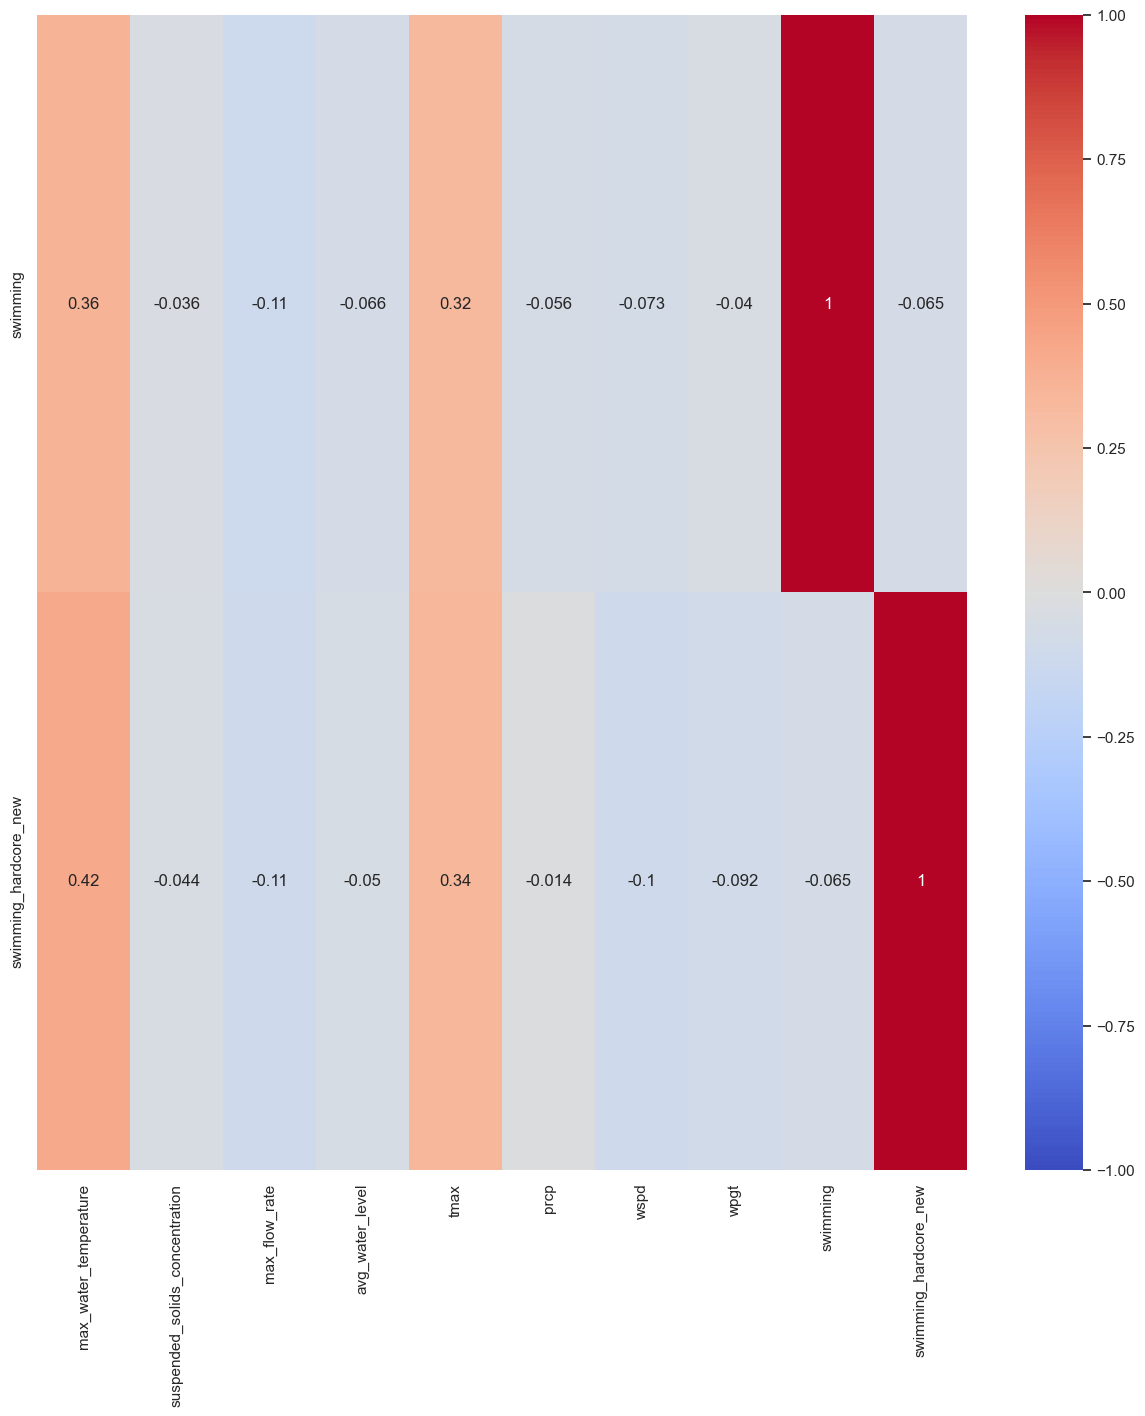

In [ ]:
# Filtere die Korrelationen nur für die zwei Zielvariablen (Var1, Var2)
correlation_focus = correlation_matrix.loc[['swimming', 'swimming_hardcore_new'], :]

# Heatmap für die zwei Variablen erstellen
sns.heatmap(correlation_focus, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.show()

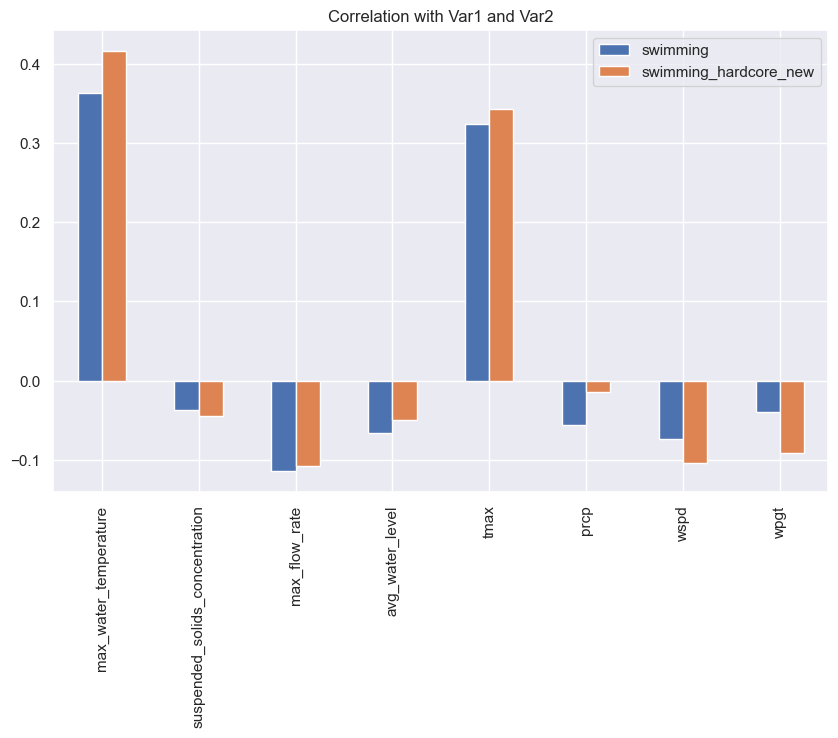

In [ ]:
# Korrelationen berechnen
correlation_focus = correlation_matrix[['swimming', 'swimming_hardcore_new']].drop(['swimming', 'swimming_hardcore_new'])

# Balkendiagramm erstellen
correlation_focus.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation with Var1 and Var2')
plt.show()

AttributeError: 'AxesImage' object has no property 'mask'

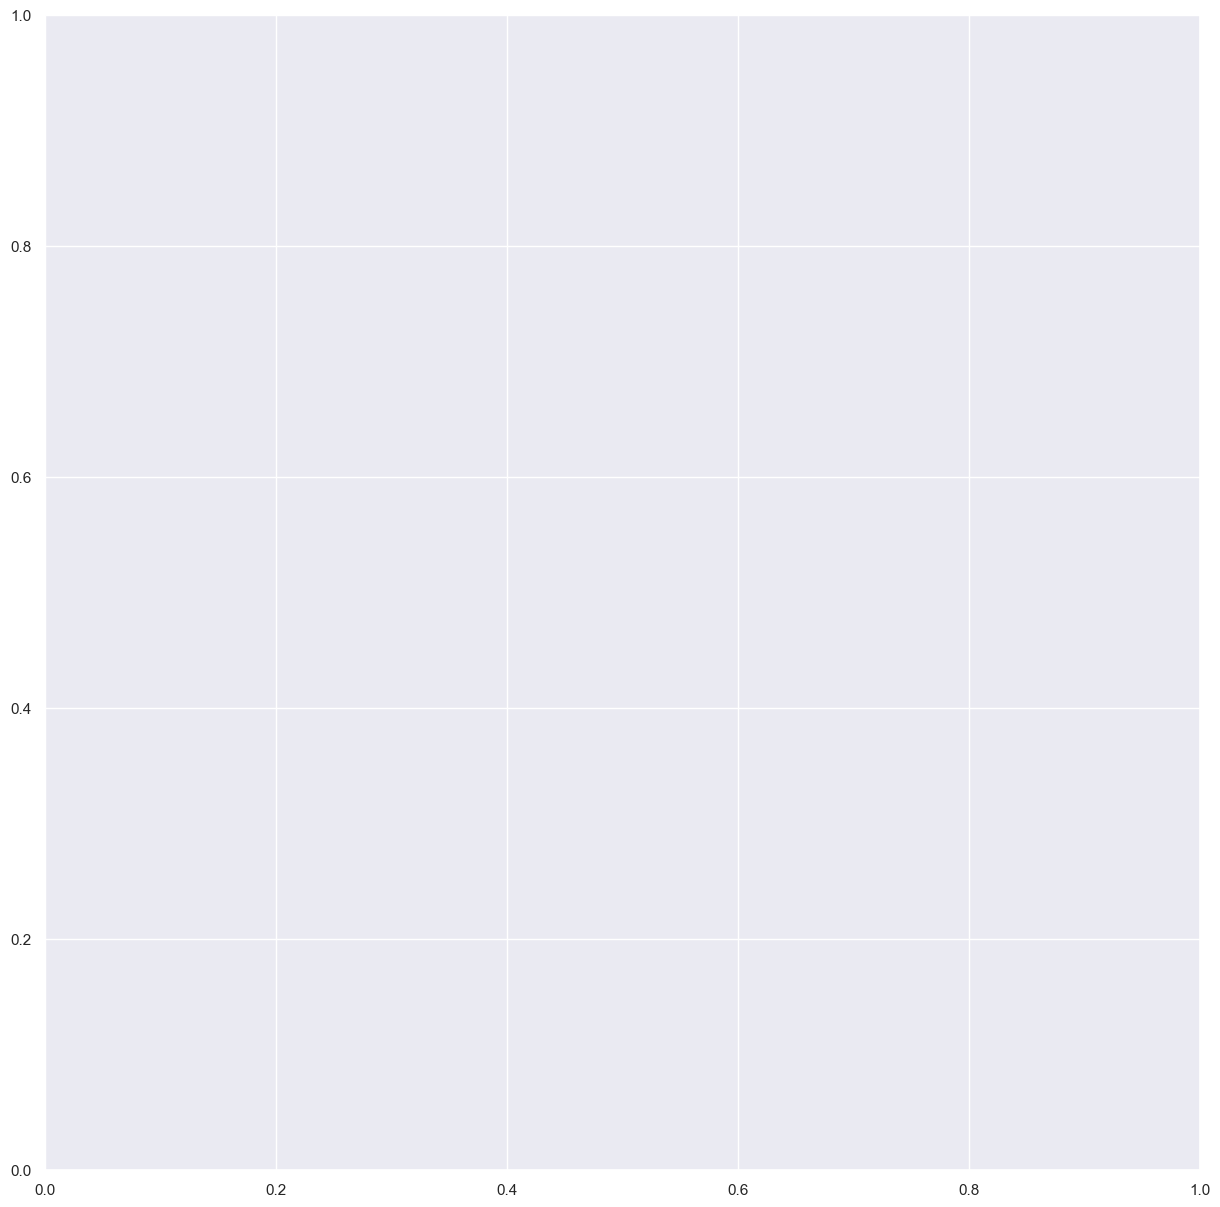

In [ ]:
# Heatmap mit Matplotlib und benutzerdefinierten Anpassungen
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmax=1, vmin=0)
plt.colorbar()
plt.title('Custom Heatmap')
plt.grid(which='major', color='black', linestyle='-', linewidth=1)
plt.show()

## Creating A DataFrame For Water Quality

In [ ]:
df_water_quality

Datum suspended_solids_concentration suspended_solid_load  \
0    31.10.65                             25                47,85   
1    01.11.65                          18,06                32,47   
2    02.11.65                          11,57                20,55   
3    03.11.65                          11,11                27,77   
4    04.11.65                           9,88                26,54   
..        ...                            ...                  ...   
229  17.08.24                         487,97              1909,53   
230  18.08.24                         487,88               2010,8   
231  19.08.24                         487,77               5288,8   
232  20.08.24                         487,72              5090,98   
233  21.08.24                         481,78              3757,03   

    suspended_sediment_erosion suspended_sediment_transport  
0                         0,02                         0,55  
1                         0,01                         0,38  
2                         0,01                         0,24  
3                         0,01                         0,32  
4                         0,01                         0,31  
..                         ...                          ...  
229                       0,67                         22,1  
230                       0,71                        23,27  
231                       1,86                        61,21  
232                       1,79                        58,92  
233                       1,32                        43,48  

[21250 rows x 5 columns]

In [ ]:
df_concentration = df_water_quality[['Datum','suspended_solids_concentration']]
df_concentration

Datum suspended_solids_concentration
0    31.10.65                             25
1    01.11.65                          18,06
2    02.11.65                          11,57
3    03.11.65                          11,11
4    04.11.65                           9,88
..        ...                            ...
229  17.08.24                         487,97
230  18.08.24                         487,88
231  19.08.24                         487,77
232  20.08.24                         487,72
233  21.08.24                         481,78

[21250 rows x 2 columns]

In [ ]:
# changing "Datum" into datetime for analyzing
df_concentration['date'] = pd.to_datetime(df_concentration['Datum'], dayfirst=True)
df_concentration

Datum suspended_solids_concentration       date
0    31.10.65                             25 2065-10-31
1    01.11.65                          18,06 2065-11-01
2    02.11.65                          11,57 2065-11-02
3    03.11.65                          11,11 2065-11-03
4    04.11.65                           9,88 2065-11-04
..        ...                            ...        ...
229  17.08.24                         487,97 2024-08-17
230  18.08.24                         487,88 2024-08-18
231  19.08.24                         487,77 2024-08-19
232  20.08.24                         487,72 2024-08-20
233  21.08.24                         481,78 2024-08-21

[21250 rows x 3 columns]

In [ ]:
# there a data from 1900, which were interpretated as 2000. So have to manipulate the year
#df_concentration.loc[df_concentration['date'] >'2024-09-09', 'date'] = df_concentration['date'] - pd.DateOffset(years=100)
#df_concentration

In [ ]:
# adding year, month into the dataframe
df_concentration['year']= df_concentration['date'].dt.year
df_concentration['month'] = df_concentration['date'].dt.month
df_concentration

Datum suspended_solids_concentration       date  year  month
0    31.10.65                             25 2065-10-31  2065     10
1    01.11.65                          18,06 2065-11-01  2065     11
2    02.11.65                          11,57 2065-11-02  2065     11
3    03.11.65                          11,11 2065-11-03  2065     11
4    04.11.65                           9,88 2065-11-04  2065     11
..        ...                            ...        ...   ...    ...
229  17.08.24                         487,97 2024-08-17  2024      8
230  18.08.24                         487,88 2024-08-18  2024      8
231  19.08.24                         487,77 2024-08-19  2024      8
232  20.08.24                         487,72 2024-08-20  2024      8
233  21.08.24                         481,78 2024-08-21  2024      8

[21250 rows x 5 columns]

In [ ]:
# dropping "Datum"
df_concentration= df_concentration.drop(columns='Datum')
df_concentration

suspended_solids_concentration       date  year  month
0                               25 2065-10-31  2065     10
1                            18,06 2065-11-01  2065     11
2                            11,57 2065-11-02  2065     11
3                            11,11 2065-11-03  2065     11
4                             9,88 2065-11-04  2065     11
..                             ...        ...   ...    ...
229                         487,97 2024-08-17  2024      8
230                         487,88 2024-08-18  2024      8
231                         487,77 2024-08-19  2024      8
232                         487,72 2024-08-20  2024      8
233                         481,78 2024-08-21  2024      8

[21250 rows x 4 columns]

In [ ]:
# replacing komma into dot
df_concentration['suspended_solids_concentration'] = df_concentration['suspended_solids_concentration'].str.replace(',', '.')
df_concentration

suspended_solids_concentration       date  year  month
0                               25 2065-10-31  2065     10
1                            18.06 2065-11-01  2065     11
2                            11.57 2065-11-02  2065     11
3                            11.11 2065-11-03  2065     11
4                             9.88 2065-11-04  2065     11
..                             ...        ...   ...    ...
229                         487.97 2024-08-17  2024      8
230                         487.88 2024-08-18  2024      8
231                         487.77 2024-08-19  2024      8
232                         487.72 2024-08-20  2024      8
233                         481.78 2024-08-21  2024      8

[21250 rows x 4 columns]

In [ ]:
df_concentration_test = df_concentration[df_concentration['date']object.freq1000]
df_concentration

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
#changing suspended_solids_concentration into a float
df_concentration['suspended_solids_concentration'] = df_concentration['suspended_solids_concentration'].astype(dtype='float64')
df_concentration


suspended_solids_concentration       date  year  month
0                             25.00 2065-10-31  2065     10
1                             18.06 2065-11-01  2065     11
2                             11.57 2065-11-02  2065     11
3                             11.11 2065-11-03  2065     11
4                              9.88 2065-11-04  2065     11
..                              ...        ...   ...    ...
229                          487.97 2024-08-17  2024      8
230                          487.88 2024-08-18  2024      8
231                          487.77 2024-08-19  2024      8
232                          487.72 2024-08-20  2024      8
233                          481.78 2024-08-21  2024      8

[21250 rows x 4 columns]

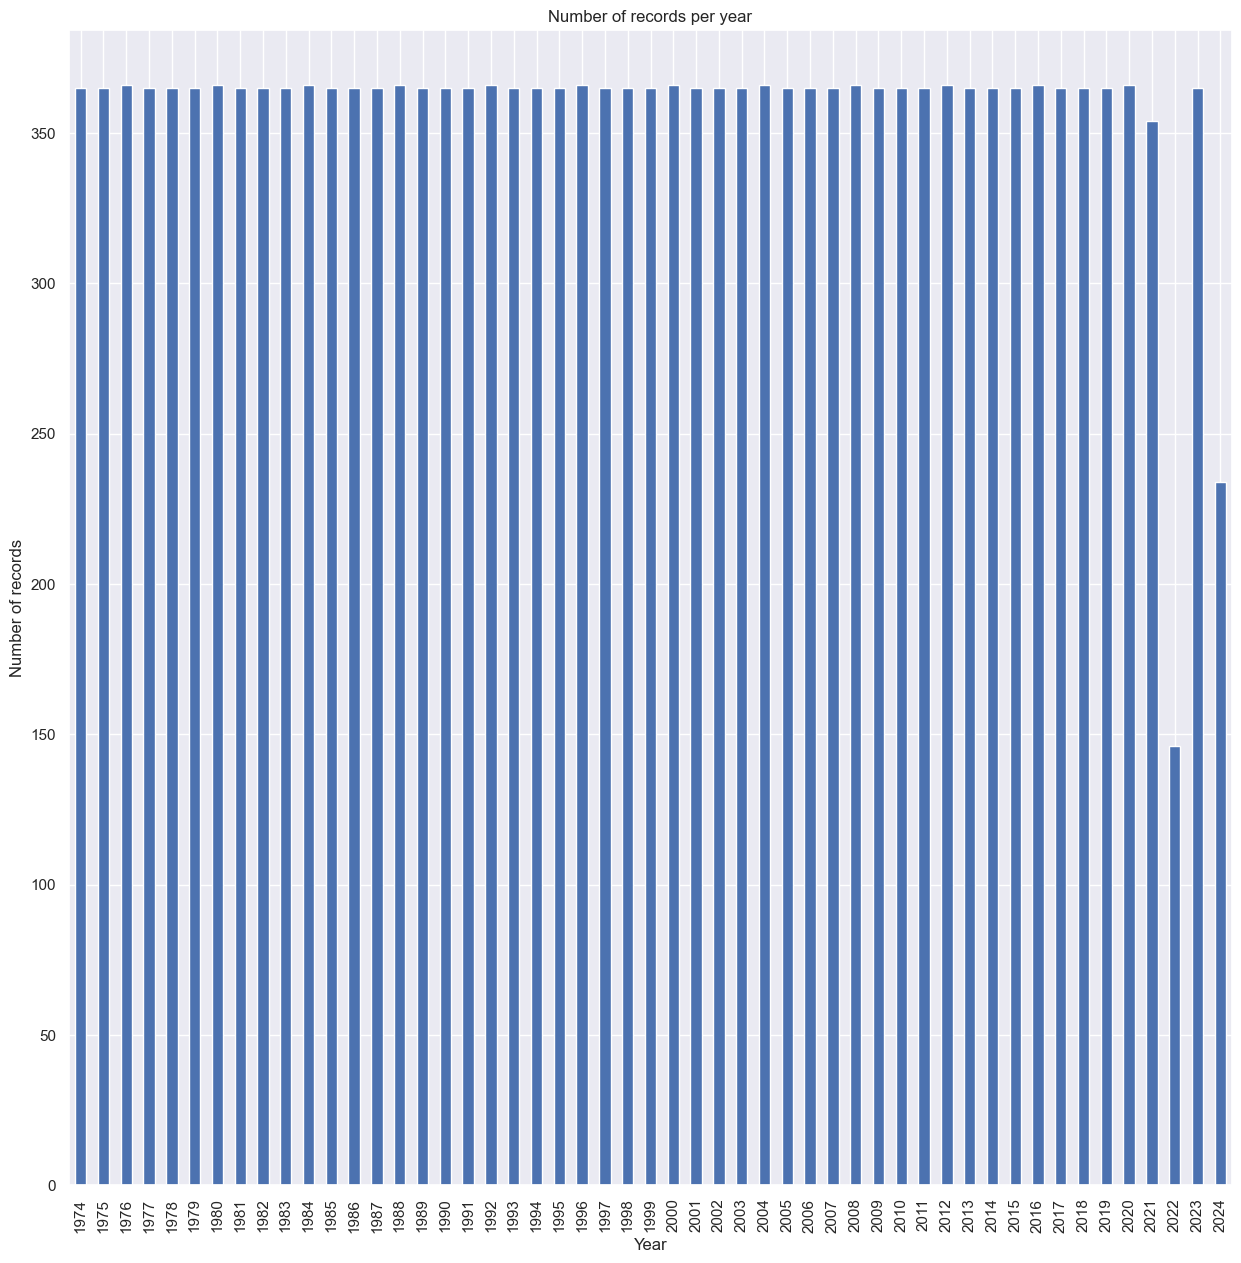

In [ ]:
# plot of records per year to find out, if there's a lot of missing data
concentration_per_year = df_concentration.groupby('year').size()

concentration_per_year.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()
#sns.barplot(x=df_river['year'],
#            y=df_river['year'].count())
#plt.show()
#len(df_river[df_river['year'] == 2016])

In [ ]:
df_concentration.year.unique()

array([2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024], dtype=int32)

In [ ]:
duplicate_indices = df_concentration[df_concentration.index.duplicated()]
print(duplicate_indices)

     suspended_solids_concentration       date  year  month
0                              9.24 2024-01-01  2024      1
1                              9.23 2024-01-02  2024      1
2                              9.22 2024-01-03  2024      1
3                              9.15 2024-01-04  2024      1
4                              9.02 2024-01-05  2024      1
..                              ...        ...   ...    ...
229                          487.97 2024-08-17  2024      8
230                          487.88 2024-08-18  2024      8
231                          487.77 2024-08-19  2024      8
232                          487.72 2024-08-20  2024      8
233                          481.78 2024-08-21  2024      8

[234 rows x 4 columns]


In [ ]:
df_concentration = df_concentration[df_concentration['year'] <= 2024]
df_concentration

suspended_solids_concentration       date  year  month
2984                            7.77 1974-01-01  1974      1
2985                            8.38 1974-01-02  1974      1
2986                           10.34 1974-01-03  1974      1
2987                           16.67 1974-01-04  1974      1
2988                           18.40 1974-01-05  1974      1
...                              ...        ...   ...    ...
229                           487.97 2024-08-17  2024      8
230                           487.88 2024-08-18  2024      8
231                           487.77 2024-08-19  2024      8
232                           487.72 2024-08-20  2024      8
233                           481.78 2024-08-21  2024      8

[18266 rows x 4 columns]

In [ ]:
# there a data from 1900, which were interpretated as 2000. So have to manipulate the year
#df_concentration.loc[df_concentration['date'] >'2024-09-09', 'date'] = df_concentration['date'] - pd.DateOffset(years=100)
#df_concentration

In [ ]:
# exporting the quality data
df_concentration.to_csv("data_quality.csv", sep=';', decimal=',', index=False)

## Creating A DataFrame For Water Level

In [ ]:
df_water_level

Datum  avg_water_level  max_water_level  min_water_level
0    01.11.73               50               58               44
1    02.11.73               45               53               43
2    03.11.73               49               57               43
3    04.11.73               45               57               31
4    05.11.73               46               52               35
..        ...              ...              ...              ...
239  27.08.24              130              137              121
240  28.08.24              117              121              113
241  29.08.24              114              116              110
242  30.08.24              114              116              108
243  31.08.24              109              115              104

[18567 rows x 4 columns]

In [ ]:
# changing "Datum" into datetime for analyzing
df_water_level['date'] = pd.to_datetime(df_water_level['Datum'], dayfirst=True)
df_water_level

Datum  avg_water_level  max_water_level  min_water_level       date
0    01.11.73               50               58               44 2073-11-01
1    02.11.73               45               53               43 2073-11-02
2    03.11.73               49               57               43 2073-11-03
3    04.11.73               45               57               31 2073-11-04
4    05.11.73               46               52               35 2073-11-05
..        ...              ...              ...              ...        ...
239  27.08.24              130              137              121 2024-08-27
240  28.08.24              117              121              113 2024-08-28
241  29.08.24              114              116              110 2024-08-29
242  30.08.24              114              116              108 2024-08-30
243  31.08.24              109              115              104 2024-08-31

[18567 rows x 5 columns]

In [ ]:
# adding year, month into the dataframe
df_water_level['year'] = df_water_level['date'].dt.year
df_water_level['month'] = df_water_level['date'].dt.month
df_water_level

Datum  avg_water_level  max_water_level  min_water_level       date  \
0    01.11.73               50               58               44 2073-11-01   
1    02.11.73               45               53               43 2073-11-02   
2    03.11.73               49               57               43 2073-11-03   
3    04.11.73               45               57               31 2073-11-04   
4    05.11.73               46               52               35 2073-11-05   
..        ...              ...              ...              ...        ...   
239  27.08.24              130              137              121 2024-08-27   
240  28.08.24              117              121              113 2024-08-28   
241  29.08.24              114              116              110 2024-08-29   
242  30.08.24              114              116              108 2024-08-30   
243  31.08.24              109              115              104 2024-08-31   

     year  month  
0    2073     11  
1    2073     11  
2    2073     11  
3    2073     11  
4    2073     11  
..    ...    ...  
239  2024      8  
240  2024      8  
241  2024      8  
242  2024      8  
243  2024      8  

[18567 rows x 7 columns]

In [ ]:
# no replacing necessesary, because they are integers
df_water_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18567 entries, 0 to 243
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datum            18567 non-null  object        
 1   avg_water_level  18567 non-null  int64         
 2   max_water_level  18567 non-null  int64         
 3   min_water_level  18567 non-null  int64         
 4   date             18567 non-null  datetime64[ns]
 5   year             18567 non-null  int32         
 6   month            18567 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(1)
memory usage: 1015.4+ KB


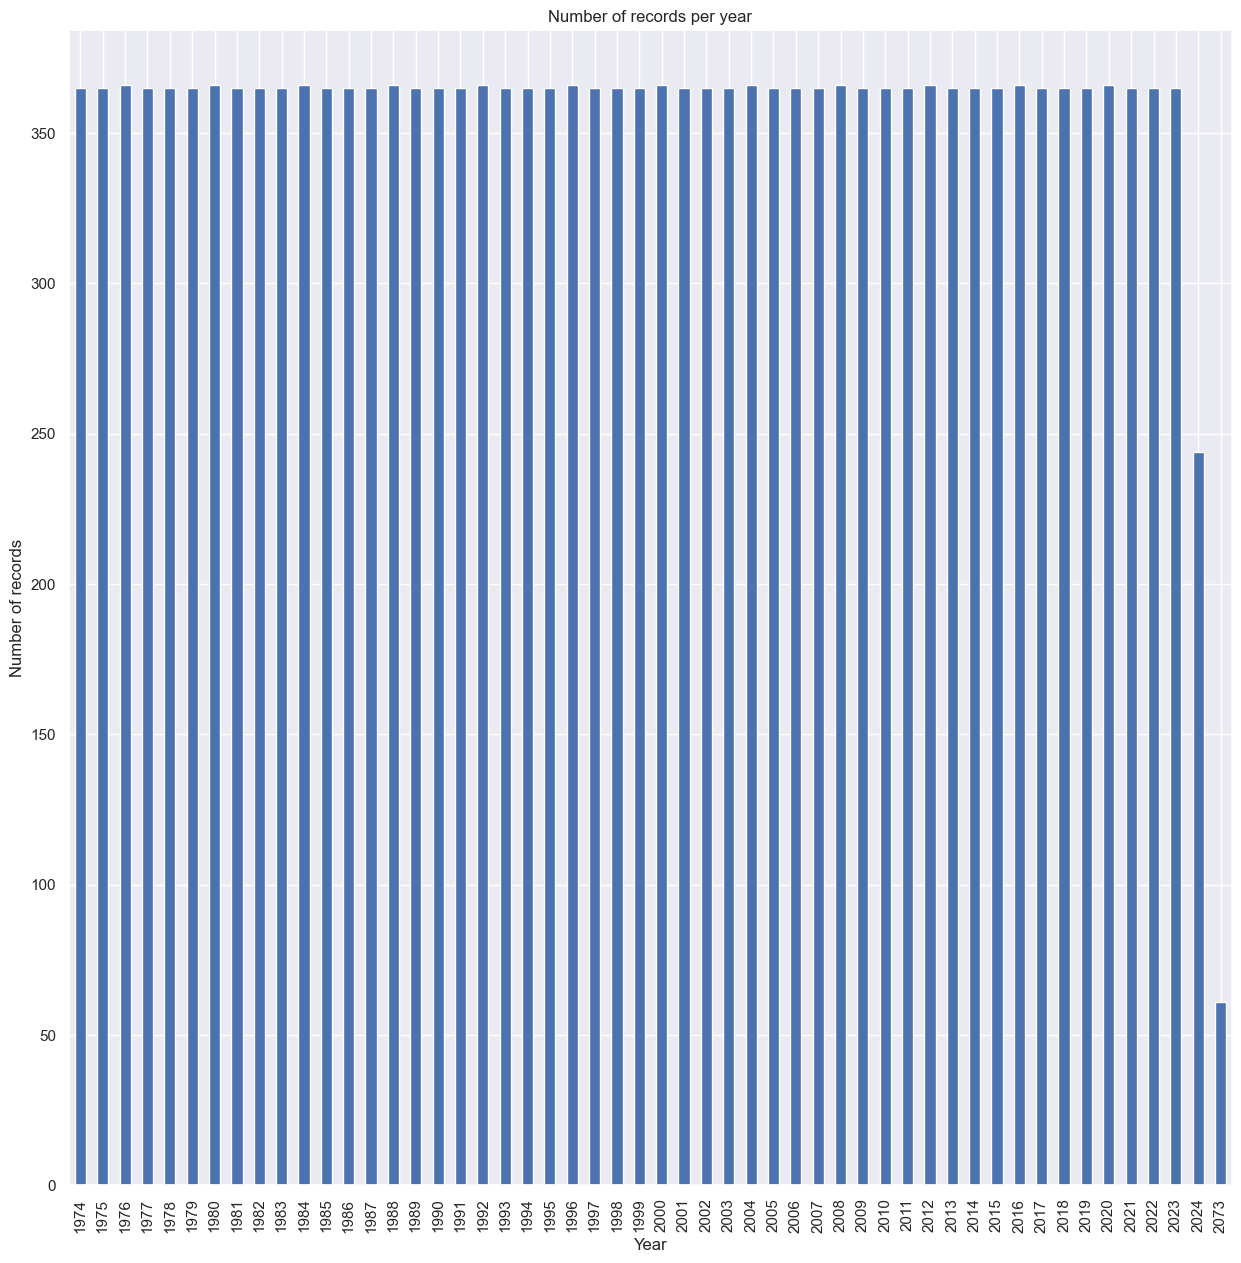

In [ ]:
# finding out, if there a missing data:
# plot of records per year to find out, if there's a lot of missing data
water_level_per_year = df_water_level.groupby('year').size()

water_level_per_year.plot(kind='bar')
plt.title('Number of records per year')
plt.xlabel('Year')
plt.ylabel('Number of records')
plt.show()
#sns.barplot(x=df_river['year'],
#            y=df_river['year'].count())
#plt.show()
#len(df_river[df_river['year'] == 2016])

In [ ]:
df_water_level_new = df_water_level[df_water_level['year'] <= 2024]
df_water_level_new

Datum  avg_water_level  max_water_level  min_water_level       date  \
61   01.01.74               46               54               38 1974-01-01   
62   02.01.74               44               55               35 1974-01-02   
63   03.01.74               51               55               47 1974-01-03   
64   04.01.74               56               64               45 1974-01-04   
65   05.01.74               53               57               33 1974-01-05   
..        ...              ...              ...              ...        ...   
239  27.08.24              130              137              121 2024-08-27   
240  28.08.24              117              121              113 2024-08-28   
241  29.08.24              114              116              110 2024-08-29   
242  30.08.24              114              116              108 2024-08-30   
243  31.08.24              109              115              104 2024-08-31   

     year  month  
61   1974      1  
62   1974      1  
63   1974      1  
64   1974      1  
65   1974      1  
..    ...    ...  
239  2024      8  
240  2024      8  
241  2024      8  
242  2024      8  
243  2024      8  

[18506 rows x 7 columns]

In [ ]:
# adding 3 columns: water alert level 1, 2, 3 and 4
# there are specific actions the city of munich take if the water level reaches one of them
# water alert level 1 = 240 cm, 300 cm, 380 cm, 520 cm

df_water_level_new['water_alert_level1'] = df_water_level_new['max_water_level']

In [ ]:
def determine_alert(row):
	if (row['max_water_level'] > 520.0):
		return 4
	elif (row['max_water_level'] > 380.0):
	    return 3
	elif (row['max_water_level'] > 300.0):
		return 2
	elif (row['max_water_level'] > 240.0):
		return 1
	return 0


#Apply to each row
df_water_level_new['water_alert_level']=df_water_level_new.apply(determine_alert,axis=1)


In [ ]:
df_water_level_new.isna().sum()

Datum                0
avg_water_level      0
max_water_level      0
min_water_level      0
date                 0
year                 0
month                0
water_alert_level    0
dtype: int64

In [ ]:
df_water_level_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18506 entries, 61 to 243
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datum              18506 non-null  object        
 1   avg_water_level    18506 non-null  int64         
 2   max_water_level    18506 non-null  int64         
 3   min_water_level    18506 non-null  int64         
 4   date               18506 non-null  datetime64[ns]
 5   year               18506 non-null  int32         
 6   month              18506 non-null  int32         
 7   water_alert_level  18506 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(4), object(1)
memory usage: 1.1+ MB


In [ ]:
df_water_level_new['water_alert_level'].value_counts()

water_alert_level
0    18336
1      116
2       36
3       17
4        1
Name: count, dtype: int64

In [ ]:

df_water_level_new[df_water_level_new['max_water_level']>520.0]

Datum  avg_water_level  max_water_level  min_water_level       date  \
11619  24.08.05              495              542              451 2005-08-24   

       year  month  water_alert_level  
11619  2005      8                  1

In [ ]:
# creating 4 variables: 

def determine_alert1(row):
	if (row['water_alert_level'] == 1):
		return 1
	else:
		return 0
	
# Apply to each row:

df_water_level_new['alert1']=df_water_level_new.apply(determine_alert1,axis=1)

df_water_level_new[df_water_level_new['water_alert_level'] == 1]

Datum  avg_water_level  max_water_level  min_water_level       date  \
259  18.07.74              255              295              201 1974-07-18   
261  20.07.74              254              273              238 1974-07-20   
262  21.07.74              237              250              228 1974-07-21   
263  22.07.74              222              244              202 1974-07-22   
607  01.07.75              237              278              177 1975-07-01   
..        ...              ...              ...              ...        ...   
157  06.06.24              230              247              221 2024-06-06   
158  07.06.24              262              266              247 2024-06-07   
159  08.06.24              240              268              220 2024-06-08   
161  10.06.24              239              250              212 2024-06-10   
162  11.06.24              221              242              197 2024-06-11   

     year  month  water_alert_level  alert1  alert2  alert3  alert4  \
259  1974      7                  1       1     1.0     1.0     1.0   
261  1974      7                  1       1     1.0     1.0     1.0   
262  1974      7                  1       1     1.0     1.0     1.0   
263  1974      7                  1       1     1.0     1.0     1.0   
607  1975      7                  1       1     1.0     1.0     1.0   
..    ...    ...                ...     ...     ...     ...     ...   
157  2024      6                  1       1     1.0     1.0     1.0   
158  2024      6                  1       1     1.0     1.0     1.0   
159  2024      6                  1       1     1.0     1.0     1.0   
161  2024      6                  1       1     1.0     1.0     1.0   
162  2024      6                  1       1     1.0     1.0     1.0   

     water_alert1  water_alert2  
259             1             0  
261             1             0  
262             1             0  
263             1             0  
607             1             0  
..            ...           ...  
157             1             0  
158             1             0  
159             1             0  
161             1             0  
162             1             0  

[116 rows x 14 columns]

In [ ]:
df_water_level_new['alert1'].value_counts()

alert1
0    18390
1      116
Name: count, dtype: int64

In [ ]:
# creating 4 variables: 

def determine_alert2(row):
	if (row['water_alert_level'] == 2):
		return 1
	else:
		return 0
	
# Apply to each row:

df_water_level_new['alert2']=df_water_level_new.apply(determine_alert2,axis=1)

df_water_level_new[df_water_level_new['water_alert_level'] == 2]



Datum  avg_water_level  max_water_level  min_water_level       date  \
260    19.07.74              275              301              257 1974-07-19   
1369   01.08.77              286              330              195 1977-08-01   
2054   17.06.79              238              312              181 1979-06-17   
2057   20.06.79              304              322              283 1979-06-20   
2817   19.07.81              247              317              175 1981-07-19   
2821   23.07.81              308              358              267 1981-07-23   
4297   07.08.85              313              351              273 1985-08-07   
4298   08.08.85              299              347              273 1985-08-08   
7883   02.06.95              276              313              227 1995-06-02   
7884   03.06.95              316              334              296 1995-06-03   
7888   07.06.95              301              325              250 1995-06-07   
7972   30.08.95              339              358              298 1995-08-30   
7973   31.08.95              314              340              290 1995-08-31   
9324   13.05.99              300              316              274 1999-05-13   
9325   14.05.99              261              302              241 1999-05-14   
9332   21.05.99              218              334              155 1999-05-21   
9338   27.05.99              271              311              220 1999-05-27   
10511  12.08.02              269              316              183 2002-08-12   
11622  27.08.05              279              326              237 2005-08-27   
13363  03.06.10              294              344              228 2010-06-03   
14457  01.06.13              281              307              220 2013-06-01   
14460  04.06.13              352              380              324 2013-06-04   
14461  05.06.13              301              325              279 2013-06-05   
16637  21.05.19              252              301              218 2019-05-21   
16638  22.05.19              324              331              301 2019-05-22   
16639  23.05.19              303              324              272 2019-05-23   
17080  06.08.20              293              312              273 2020-08-06   
17427  19.07.21              301              315              286 2021-07-19   
17428  20.07.21              303              311              282 2021-07-20   
18198  29.08.23              287              312              251 2023-08-29   
18199  30.08.23              312              325              290 2023-08-30   
152    01.06.24              258              329              186 2024-06-01   
153    02.06.24              298              329              273 2024-06-02   
154    03.06.24              272              333              249 2024-06-03   
155    04.06.24              330              366              307 2024-06-04   
156    05.06.24              276              316              241 2024-06-05   

       year  month  water_alert_level  alert1  alert2  alert3  alert4  \
260    1974      7                  2       0       1     NaN     NaN   
1369   1977      8                  2       0       1     NaN     NaN   
2054   1979      6                  2       0       1     NaN     NaN   
2057   1979      6                  2       0       1     NaN     NaN   
2817   1981      7                  2       0       1     NaN     NaN   
2821   1981      7                  2       0       1     NaN     NaN   
4297   1985      8                  2       0       1     NaN     NaN   
4298   1985      8                  2       0       1     NaN     NaN   
7883   1995      6                  2       0       1     NaN     NaN   
7884   1995      6                  2       0       1     NaN     NaN   
7888   1995      6                  2       0       1     NaN     NaN   
7972   1995      8                  2       0       1     NaN     NaN   
7973   1995      8                  2       0       1     NaN  

In [ ]:
df_water_level_new['alert2'].value_counts()

alert2
0    18470
1       36
Name: count, dtype: int64

In [ ]:
# creating 4 variables: 

def determine_alert3(row):
	if (row['water_alert_level'] == 3):
		return 1
	else:
		return 0
	
# Apply to each row:

df_water_level_new['alert3']=df_water_level_new.apply(determine_alert3,axis=1)

df_water_level_new[df_water_level_new['water_alert_level'] == 3]

Datum  avg_water_level  max_water_level  min_water_level       date  \
2055   18.06.79              383              424              312 1979-06-18   
2056   19.06.79              358              402              322 1979-06-19   
2818   20.07.81              389              424              317 1981-07-20   
2819   21.07.81              387              395              382 1981-07-21   
2820   22.07.81              376              390              358 1981-07-22   
9333   22.05.99              442              469              334 1999-05-22   
9334   23.05.99              450              467              434 1999-05-23   
9335   24.05.99              432              436              425 1999-05-24   
9336   25.05.99              414              439              389 1999-05-25   
9337   26.05.99              350              391              311 1999-05-26   
11618  23.08.05              311              491              224 2005-08-23   
11620  25.08.05              430              453              413 2005-08-25   
11621  26.08.05              387              414              326 2005-08-26   
14458  02.06.13              343              411              293 2013-06-02   
14459  03.06.13              414              432              380 2013-06-03   
17078  04.08.20              307              394              196 2020-08-04   
17079  05.08.20              339              383              312 2020-08-05   

       year  month  water_alert_level  alert1  alert2  alert3  alert4  \
2055   1979      6                  3       0       0       1     NaN   
2056   1979      6                  3       0       0       1     NaN   
2818   1981      7                  3       0       0       1     NaN   
2819   1981      7                  3       0       0       1     NaN   
2820   1981      7                  3       0       0       1     NaN   
9333   1999      5                  3       0       0       1     NaN   
9334   1999      5                  3       0       0       1     NaN   
9335   1999      5                  3       0       0       1     NaN   
9336   1999      5                  3       0       0       1     NaN   
9337   1999      5                  3       0       0       1     NaN   
11618  2005      8                  3       0       0       1     NaN   
11620  2005      8                  3       0       0       1     NaN   
11621  2005      8                  3       0       0       1     NaN   
14458  2013      6                  3       0       0       1     NaN   
14459  2013      6                  3       0       0       1     NaN   
17078  2020      8                  3       0       0       1     NaN   
17079  2020      8                  3       0       0       1     NaN   

       water_alert1  water_alert2  
2055              0             0  
2056              0             0  
2818              0             0  
2819              0             0  
2820              0             0  
9333              0             0  
9334              0             0  
9335              0             0  
9336              0             0  
9337              0             0  
11618             0             0  
11620             0             0  
11621             0             0  
14458             0             0  
14459             0             0  
17078             0             0  
17079             0             0

In [ ]:
df_water_level_new.alert3.value_counts()

alert3
0    18489
1       17
Name: count, dtype: int64

In [ ]:
# creating 4 variables: 

def determine_alert4(row):
	if (row['water_alert_level'] == 4):
		return 1
	else:
		return 0
	
# Apply to each row:

df_water_level_new['alert4']=df_water_level_new.apply(determine_alert4,axis=1)

df_water_level_new[df_water_level_new['water_alert_level'] == 4]

Datum  avg_water_level  max_water_level  min_water_level       date  \
11619  24.08.05              495              542              451 2005-08-24   

       year  month  water_alert_level  alert1  alert2  alert3  alert4  \
11619  2005      8                  4       0       0       0       1   

       water_alert1  water_alert2  
11619             0             0

In [ ]:
df_water_level_new.to_csv("waterlevel.csv", sep=';', decimal=",", index=False)

In [ ]:
df_water_level_new[df_water_level_new['month']==12].describe().T
                   # df_water_level_new['max_water_level']>200) &

count                 mean                  min  \
avg_water_level    1550.0            67.024516                 20.0   
max_water_level    1550.0            74.153548                 21.0   
min_water_level    1550.0            60.507097                 16.0   
date                 1550  1999-06-16 17:45:36  1974-12-01 00:00:00   
year               1550.0               1998.5               1974.0   
month              1550.0                 12.0                 12.0   
water_alert_level  1550.0                  0.0                  0.0   
alert1             1550.0                  0.0                  0.0   
alert2             1550.0                  0.0                  0.0   
alert3             1550.0                  0.0                  0.0   
alert4             1550.0                  0.0                  0.0   
water_alert1       1550.0                  0.0                  0.0   
water_alert2       1550.0                  0.0                  0.0   

                                   25%                  50%  \
avg_water_level                   48.0                 61.0   
max_water_level                   54.0                 69.0   
min_water_level                   43.0                 54.0   
date               1986-12-16 06:00:00  1999-06-16 12:00:00   
year                            1986.0               1998.5   
month                             12.0                 12.0   
water_alert_level                  0.0                  0.0   
alert1                             0.0                  0.0   
alert2                             0.0                  0.0   
alert3                             0.0                  0.0   
alert4                             0.0                  0.0   
water_alert1                       0.0                  0.0   
water_alert2                       0.0                  0.0   

                                   75%                  max        std  
avg_water_level                   82.0                206.0   27.55415  
max_water_level                   89.0                223.0  30.060123  
min_water_level                   75.0                188.0  25.581115  
date               2011-12-15 18:00:00  2023-12-31 00:00:00        NaN  
year                            2011.0               2023.0  14.435527  
month                             12.0                 12.0        0.0  
water_alert_level                  0.0                  0.0        0.0  
alert1                             0.0                  0.0        0.0  
alert2                             0.0                  0.0        0.0  
alert3                             0.0                  0.0        0.0  
alert4                             0.0                  0.0        0.0  
water_alert1                       0.0                  0.0        0.0  
water_alert2                       0.0                  0.0        0.0

## DataFrame Floods (water level, flow rate and precitation)


In [ ]:
#

# Looking deeper into the data

# HiER NOCHMAL CHECKEN UND DANN RAUSWERFEN!!!!

# ICE BATH
`ice_bath = 1, if...`
- `max water temperature: < 11 °C`
- `avg water level: < 120 cm`
- `suspended solids concentration < 25 m3/s`
- `max flow rate: < 65 m3/s`
- `max temperature: > -10 °C`
- `total precipitation < 15 mm/day`
- `avg windspeed <20km/h`
- `peak gust <50km/h`
- `snow_depth < 30cm`


In [ ]:
df_river.columns

Index(['date', 'avg_water_temperature', 'max_water_temperature',
       'min_water_temperature', 'avg_water_level', 'max_water_level',
       'min_water_level', 'suspended_solids_concentration',
       'suspended_solid_load', 'suspended_sediment_erosion',
       'suspended_sediment_transport', 'avg_flow_rate', 'max_flow_rate',
       'min_flow_rate', 'year', 'month'],
      dtype='object')

In [ ]:
df_ice_bath_river = df_river[['date', 'max_water_temperature', 'avg_water_level', 'suspended_solids_concentration', 'max_flow_rate']]
df_ice_bath_river

date  max_water_temperature  avg_water_level  \
0     1980-11-01                    8.1               71   
1     1980-11-02                    7.3               59   
2     1980-11-03                    5.8               68   
3     1980-11-04                    5.6               77   
4     1980-11-05                    4.8               77   
...          ...                    ...              ...   
15283 2024-08-27                   17.6              130   
15284 2024-08-28                   19.0              117   
15285 2024-08-29                   19.6              114   
15286 2024-08-30                   19.8              114   
15287 2024-08-31                   19.7              109   

       suspended_solids_concentration  max_flow_rate  
0                                5.57           63.4  
1                                5.10           39.6  
2                                5.14           60.0  
3                                7.60           56.9  
4                                9.03           66.5  
...                               ...            ...  
15283                           34.95           76.7  
15284                           34.95           53.0  
15285                           34.95           46.1  
15286                           34.95           46.1  
15287                           34.95           44.8  

[15288 rows x 5 columns]

In [ ]:
df_ice_bath_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            15288 non-null  datetime64[ns]
 1   max_water_temperature           15288 non-null  float64       
 2   avg_water_level                 15288 non-null  int64         
 3   suspended_solids_concentration  15288 non-null  float64       
 4   max_flow_rate                   15288 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 597.3 KB


In [ ]:
df_ice_bath_river.isna().sum()

date                              0
max_water_temperature             0
avg_water_level                   0
suspended_solids_concentration    0
max_flow_rate                     0
dtype: int64

- `max temperature: > -10 °C`
- `total precipitation < 15 mm/day`
- `avg windspeed <20km/h`
- `peak gust <50km/h`
- `snow_depth < 30cm`

In [ ]:
df_ice_bath_weather = df_weather[['date', 'tmax', 'prcp', 'wspd', 'wpgt', 'snow']]
df_ice_bath_weather

date  tmax  prcp   wspd   wpgt  snow
0    2011-06-01  13.3   4.2  14.00  44.60   0.0
1    2011-06-02  17.1   0.0  10.80  32.80   0.0
2    2011-06-03  23.8   0.0  15.10  43.60   0.0
3    2011-06-04  27.8   0.0  12.20  31.30   0.0
4    2011-06-05  27.1   4.7   9.70  67.70   0.0
...         ...   ...   ...    ...    ...   ...
2799 2024-09-01  29.5   0.0   7.20  22.00   0.0
2800 2024-09-02  27.2   0.0   7.60  30.20   0.0
2801 2024-09-03  28.9   0.0   5.40  18.70   0.0
2802 2024-09-04   NaN   NaN   8.43  29.83   0.0
2803 2024-09-05   NaN   NaN   8.43  29.83   0.0

[4845 rows x 6 columns]

In [ ]:
df_ice_bath_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 0 to 2803
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4845 non-null   datetime64[ns]
 1   tmax    4843 non-null   float64       
 2   prcp    4843 non-null   float64       
 3   wspd    4845 non-null   float64       
 4   wpgt    4845 non-null   float64       
 5   snow    4845 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 265.0 KB


In [ ]:
# rows in Septemeber 2024 I drop:
df_ice_bath_weather = df_ice_bath_weather[df_ice_bath_weather['date']<='2024-08-31']
df_ice_bath_weather


date  tmax  prcp  wspd   wpgt  snow
0    2011-06-01  13.3   4.2  14.0  44.60   0.0
1    2011-06-02  17.1   0.0  10.8  32.80   0.0
2    2011-06-03  23.8   0.0  15.1  43.60   0.0
3    2011-06-04  27.8   0.0  12.2  31.30   0.0
4    2011-06-05  27.1   4.7   9.7  67.70   0.0
...         ...   ...   ...   ...    ...   ...
2794 2024-08-27  24.6   0.0   8.6  31.70   0.0
2795 2024-08-28  29.6   0.0   5.0  34.09   0.0
2796 2024-08-29  31.2   0.0   6.1  23.80   0.0
2797 2024-08-30  30.8   0.0   6.1  24.50   0.0
2798 2024-08-31  30.0   0.0   8.3  33.80   0.0

[4840 rows x 6 columns]

In [ ]:
#joining water and weather datasets by date:
df_ice_bath = pd.merge(df_ice_bath_weather, df_ice_bath_river, how='left', on='date')
df_ice_bath

date  tmax  prcp  wspd   wpgt  snow  max_water_temperature  \
0    2011-06-01  13.3   4.2  14.0  44.60   0.0                   16.1   
1    2011-06-02  17.1   0.0  10.8  32.80   0.0                   13.2   
2    2011-06-03  23.8   0.0  15.1  43.60   0.0                   14.8   
3    2011-06-04  27.8   0.0  12.2  31.30   0.0                   16.4   
4    2011-06-05  27.1   4.7   9.7  67.70   0.0                   17.1   
...         ...   ...   ...   ...    ...   ...                    ...   
4835 2024-08-27  24.6   0.0   8.6  31.70   0.0                   17.6   
4836 2024-08-28  29.6   0.0   5.0  34.09   0.0                   19.0   
4837 2024-08-29  31.2   0.0   6.1  23.80   0.0                   19.6   
4838 2024-08-30  30.8   0.0   6.1  24.50   0.0                   19.8   
4839 2024-08-31  30.0   0.0   8.3  33.80   0.0                   19.7   

      avg_water_level  suspended_solids_concentration  max_flow_rate  
0               107.0                          126.14          192.0  
1                82.0                          114.69           98.7  
2                62.0                           90.89           60.0  
3                52.0                           67.09           42.4  
4                49.0                           43.29           43.6  
...               ...                             ...            ...  
4835            130.0                           34.95           76.7  
4836            117.0                           34.95           53.0  
4837            114.0                           34.95           46.1  
4838            114.0                           34.95           46.1  
4839            109.0                           34.95           44.8  

[4840 rows x 10 columns]

In [ ]:
df_ice_bath.isna().sum()

date                                0
tmax                                0
prcp                                0
wspd                                0
wpgt                                0
snow                                0
max_water_temperature             718
avg_water_level                   718
suspended_solids_concentration    718
max_flow_rate                     718
dtype: int64

## Adding a variable "ice_bath"
`ice_bath = 1, if...`
- `max water temperature: < 11 °C`
- `avg water level: < 120 cm`
- `suspended solids concentration < 25 m3/s`
- `max flow rate: < 65 m3/s`
- `max temperature: > -10 °C`
- `total precipitation < 15 mm/day`
- `avg windspeed <20km/h`
- `peak gust <50km/h`
- `snow_depth < 30cm`

In [ ]:
df_ice_bath['ice_bath'].value_counts()

ice_bath
0    3874
1     966
Name: count, dtype: int64

In [ ]:
df_ice_bath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            4840 non-null   datetime64[ns]
 1   tmax                            4840 non-null   float64       
 2   prcp                            4840 non-null   float64       
 3   wspd                            4840 non-null   float64       
 4   wpgt                            4840 non-null   float64       
 5   snow                            4840 non-null   float64       
 6   max_water_temperature           4122 non-null   float64       
 7   avg_water_level                 4122 non-null   float64       
 8   suspended_solids_concentration  4122 non-null   float64       
 9   max_flow_rate                   4122 non-null   float64       
 10  ice_bath                        4840 non-null   int64         
dtypes: d

In [ ]:
df_ice_bath.to_csv("ice_bath.csv", index=False)

# TESTSTATION

## result over all columns by using OutLiersBox:
- variables with suspected outliers: Social support, Generosity, Perceptions of corruption
- should I substitute them with the frequent value? 

In [ ]:
# other observations for the outliers:
data_social_support = happy_data_clean['Social support']
data_social_support
sns.distplot(data_social_support)#, kde=True)
plt.title('Histogram of social support')
plt.show()

NameError: name 'happy_data_clean' is not defined

In [ ]:
# how much outliers are there in social Support?
Q1 = happy_data_clean['Social support'].quantile(.25)
Q3 = happy_data_clean['Social support'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("For social support: IQR: ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_social_support = happy_data_clean[(happy_data_clean['Social support']) < lower_limit]
num_outliers_social_support#.shape[0] #['Social support'].counts()

# Conclusion: only 7 outliers. delete?

In [ ]:
# how much outliers are there in perception of corruption?
Q1 = happy_data_clean['Perceptions of corruption'].quantile(.25)
Q3 = happy_data_clean['Perceptions of corruption'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("For Perceptions of corruption: IQR: ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_social_support = happy_data_clean[(happy_data_clean['Perceptions of corruption']) > upper_limit]
num_outliers_social_support.shape[0] #['Perceptions of corruption'].counts()

# Conclusion: 31 rows -> not that few. so I have to substitute the outliers with the mode? Median?

In [ ]:
# how much outliers are there in generosity?
Q1 = happy_data_clean['Generosity'].quantile(.25)
Q3 = happy_data_clean['Generosity'].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

print("For Generosity: IQR: ", IQR, "lower limit= ", lower_limit, "upper_limit= ", upper_limit)

num_outliers_social_support = happy_data_clean[(happy_data_clean['Generosity']) > upper_limit]
num_outliers_social_support#.shape[0] #['Generosity'].counts()

# Conclusion: only 4 rows. Delete?

In [ ]:
happy_data_IQR = happy_data_clean.copy()
for column in happy_data_IQR:
    #print(column)
    if happy_data_IQR[column].dtype != 'object':
        Q1 = happy_data_IQR[column].quantile(.25)
        Q3 = happy_data_IQR[column].quantile(.75)
        IQR = Q3 - Q1
        lower_limit = (Q1 - 1.5 * IQR)
        upper_limit = (Q3 + 1.5 * IQR)
        
        print(column,lower_limit, upper_limit)
        happy_data_IQR=happy_data_IQR[(happy_data_IQR[column] > lower_limit) &
                      (happy_data_IQR[column] < upper_limit)]

In [ ]:
data_social_support.describe()

In [ ]:
# using apply and lambda to do it for all columns faster.

happy_data_clean.apply(lambda col: OutLiersBox(happy_data_clean, happy_data_clean.columns[col]))

In [ ]:
# Exercise 1.Tell a story with your dataset, to try to answer the following question:

"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

# To achieve this goal use the different funcionalities from 
# the visualization libraries that you have seen in the module

## Step 5: Formating the data for answering the questions
- creating new datasats, selected one
- trying out graphs

In [ ]:
# because there are 2 years I split the dataset in 2 years
happy_data_2018 = happy_data_clean[(happy_data.year == 2018)]
happy_data_2019 = happy_data_clean[(happy_data.year == 2019)]

In [ ]:
happy_data_2018

In [ ]:
happy_data_2019

In [ ]:
# nans in healthy life expectancy: are they distributed over the 2 years?
happy_data_2018['Healthy life expectancy'].isnull().sum()
happy_data_2018 = happy_data_2018.drop(columns='year')
happy_data_2018

In [ ]:
happy_data_2019['Healthy life expectancy'].isnull().sum()
happy_data_2019 = happy_data_2019.drop(columns='year')
happy_data_2019

In [ ]:
#looking into the dataset of Healthy life expectancy, where are values:
happy_data_2018_country_health = happy_data_2018[['Country or region', 'Healthy life expectancy']]
happy_data_2018_country_health['Healthy life expectancy'].unique()

# später weiter! Gerade nicht so wichtig.

In [ ]:
# numerical variables

numerical_happy_data = happy_data_clean.select_dtypes(include=['int64','float'])
numerical_happy_data
numerical_happy_data1 = numerical_happy_data.drop(columns="Healthy life expectancy")

In [ ]:
# categorical variables

categorical_happy_data = happy_data_clean.select_dtypes(include=['category', 'object'])
categorical_happy_data

In [ ]:
"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

# To achieve this goal use the different funcionalities from 
# the visualization libraries that you have seen in the module

In [ ]:
# plotting correlations between the score and the dimensions
sns.pairplot(numerical_happy_data1)
plt.show()

In [ ]:
# because nothing works, I start with on variable: score and GDP per capita
#fig = sns.scatterplot(happy_data_2018, x='Score', y='GDP per capita')
#fig.show()
#Healthy life expectancy	Freedom to make life choices	Generosity	Perceptions of corruption

fig, ax = plt.subplot(3, 2, figsize=(20, 20))

# Option 1 : Scatter plot by default
sns.scatterplot(data=happy_data_clean, x='Score', y='GDP per capita', 
                alpha=0.7, ax=ax[0][0])


# Option 2 : Add a hue
sns.scatterplot(data=happy_data_clean, x='Score', y='Social support', 
                hue=df['gender'].to_list(),
                alpha=0.7, ax=ax[0][1])

# Option 3 : Add style & color
sns.scatterplot(data=happy_data_clean, x='Score', y='Freedom to make life choices', 
                style=df['gender'].to_list(), 
                color='green',
                alpha=0.5, ax=ax[1][0])

# Option 4 : add size & color 
sns.scatterplot(data=happy_data_clean, x='Score', y='Generosity', 
                size=df['parental level of education'].to_list(), 
                color='brown', alpha=0.5, ax=ax[1][1])
sns:scatterplot(data=happy_data_clean, x="Score", y=)

# Option 2 : Add a hue
sns.scatterplot(data=happy_data_clean, x='Score', y='Perception of corruption', 
                hue=df['gender'].to_list(),
                alpha=0.7, ax=ax[0][1])

plt.show()

In [ ]:
# - 2 Variables
# - visualizations is the focus
# - find questions I want to answer

In [ ]:
import plotly.express as px
fig = px.histogram(df_river, x="year", y="suspended_sediment_transport")
fig.show()

#suspended_solids_concentration  15258 non-null  object        
# 11  suspended_solid_load            15258 non-null  object        
## 12  suspended_sediment_erosion      15258 non-null  object        
# 13  suspended_sediment_transport    15258 non-null  object 

In [ ]:
# suspended solids under 20, 25
df_solids_under_25 = df_river[df_river['suspended_solids_concentration'] < 25]
df_solids_under_20 = df_river[df_river['suspended_solids_concentration'] <= 20]


In [ ]:
df_solids_under_20.shape[0]

12125

In [ ]:
df_solids_under_25.shape[0]

13104

In [ ]:
# river flow rate under 75
df_river_flowrate_under_50 = df_river[df_river['avg_flow_rate'] < 50]

In [ ]:
df_river_flowrate_under_50.shape[0]

7663

In [ ]:
# precipitation:
df_weather_prcp_under_40 = df_weather[df_weather['prcp']<40]

In [ ]:
df_weather_prcp_under_40.shape[0]

4821

In [ ]:
# temperature (avg) over 25°C
df_temp_over_25 = df_weather[df_weather['tmax']>=25]

In [ ]:
df_temp_over_25.shape[0]

873

In [ ]:
# distribution temperature:
fig_temp = px.histogram(df_weather, x="date", y="tavg")
fig_temp.show()

In [ ]:
# RIVER - water quality
# first loading all the files into seperate DataFrames for each variable
# Jan - August 2024:
path_water_quality = "../datasets/river/fluesse-schwebstoff/16005701_beginn_bis_31.12.2023_tmw_0.csv"
path_water_level = "../datasets/river/fluesse-wasserstand/16005701_beginn_bis_31.12.2023_tmw_0-1.csv"
path_daily_water_temperatures = "../datasets/river/fluesse-wassertemperatur/16005701_beginn_bis_31.12.2023_tmw_0.csv"

df_river_flow_rate = pd.read_csv(path_river_flow_rate, sep=";")
#df_river_water_quality = pd.read_csv(path_water_quality, sep=";")
df_river_water_level = pd.read_csv(path_water_level, sep=";")
#df_river_daily_water_temperatures = pd.read_csv(path_daily_water_temperatures, sep=";")

df_river_flow_rate
#df_river_water_quality
#df_river_water_level
#df_river_daily_water_temperatures

# JOINING RIVER AND WEATHER

In [ ]:
df_merged = pd.merge(df_river, df_weather, how='left', on = 'date')
df_merged

ValueError: The column label 'date' is not unique.

In [ ]:
df_merged.shape

(15288, 27)

In [ ]:
df_merged.tail(20)

date  month  year     Datum avg_water_temperature  \
15268 2024-08-12      8  2024  12.08.24                  20,6   
15269 2024-08-13      8  2024  13.08.24                  20,7   
15270 2024-08-14      8  2024  14.08.24                  20,2   
15271 2024-08-15      8  2024  15.08.24                  19,8   
15272 2024-08-16      8  2024  16.08.24                  19,7   
15273 2024-08-17      8  2024  17.08.24                  19,8   
15274 2024-08-18      8  2024  18.08.24                  19,3   
15275 2024-08-19      8  2024  19.08.24                  17,5   
15276 2024-08-20      8  2024  20.08.24                  16,9   
15277 2024-08-21      8  2024  21.08.24                  17,3   
15278 2024-08-22      8  2024  22.08.24                  17,6   
15279 2024-08-23      8  2024  23.08.24                    18   
15280 2024-08-24      8  2024  24.08.24                  18,8   
15281 2024-08-25      8  2024  25.08.24                  18,3   
15282 2024-08-26      8  2024  26.08.24                  16,4   
15283 2024-08-27      8  2024  27.08.24                  16,6   
15284 2024-08-28      8  2024  28.08.24                  17,8   
15285 2024-08-29      8  2024  29.08.24                  18,7   
15286 2024-08-30      8  2024  30.08.24                  19,1   
15287 2024-08-31      8  2024  31.08.24                  19,1   

      max_water_temperature min_water_temperature  avg_water_level  \
15268                  21,3                  19,8              108   
15269                  21,4                  19,7              113   
15270                    21                  19,1              118   
15271                  20,8                  18,5              134   
15272                  20,6                  18,7              117   
15273                  20,3                  19,1              115   
15274                  20,2                  18,6              117   
15275                  18,6                  16,7              167   
15276                  17,3                  16,5              165   
15277                    18                  16,7              143   
15278                  18,4                  16,7              131   
15279                  19,1                  16,9              127   
15280                    20                  17,6              126   
15281                  19,7                  17,5              121   
15282                  17,4                  16,1              142   
15283                  17,6                  15,8              130   
15284                    19                  16,6              117   
15285                  19,6                  17,7              114   
15286                  19,8                  18,1              114   
15287                  19,7                  18,2              109   

       max_water_level  min_water_level  ...  tavg  tmin  tmax  prcp snow  \
15268              114              104  ...  25.5  18.4  31.7   0.0  0.0   
15269              118              108  ...  24.8  18.9  32.6   1.2  0.0   
15270              122              113  ...  23.0  17.1  31.0   4.1  0.0   
15271              144              117  ...  22.4  16.7  28.2   0.0  0.0   
15272              126              107  ...  24.5  19.0  29.8   0.5  0.0   
15273              121              106  ...  22.4  19.1  26.1   2.4  0.0   
15274              131              105  ...  19.1  16.3  21.9  54.5  0.0   
15275              192              127  ...  15.7  14.6  17.0   5.7  0.0   
15276              185              148  ...  17.3  15.7  20.1   0.0  0.0   
15277              149              135  ...  17.7  12.5  22.2   0.4  0.0   
15278              136              125  ...  17.7  11.2  24.4   0.0  0.0   
15279              130              121  ...  21.6  13.8  29.5   0.0  0.0   
15280              131              120  ...  24.1  14.8  31.4   0.0  0.0   
15281              144              111  ...  16.7  11.7  23.6   6.7  0.0   
15282              1

In [ ]:
df_merged.head(30)

date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  ...  \
0  2011-06-01  11.5   9.7  13.3   4.2   NaN  288.0  14.0  44.6  1021.7  ...   
1  2011-06-02  13.4  10.9  17.1   0.0   NaN   42.0  10.8  32.8  1026.9  ...   
2  2011-06-03  18.0  12.8  23.8   0.0   NaN   77.0  15.1  43.6  1022.9  ...   
3  2011-06-04  20.6  14.6  27.8   0.0   NaN   80.0  12.2  31.3  1013.7  ...   
4  2011-06-05  19.8  13.9  27.1   4.7   NaN  269.0   9.7  67.7  1007.7  ...   
5  2011-06-06  16.9  12.7  24.6  13.1   NaN  244.0   8.6  55.1  1005.6  ...   
6  2011-06-07  19.4  12.1  25.2   0.0   NaN  121.0   9.0  34.9  1004.3  ...   
7  2011-06-08  15.5  12.5  19.3   1.9   NaN  261.0  12.6  51.5  1006.3  ...   
8  2011-06-09  13.7  12.3  15.4   0.4   NaN  310.0   7.6  19.8  1014.9  ...   
9  2011-06-10  14.4  10.9  18.6   0.0   NaN  329.0   6.8  21.2  1015.5  ...   
10 2011-06-11  13.2  10.6  16.3   5.5   NaN  256.0   9.0  35.6  1017.3  ...   
11 2011-06-12  15.9  10.9  21.7   0.0   NaN  132.0   7.6  23.0  1018.1  ...   
12 2011-06-13  15.5  11.8  19.0   0.2   NaN  259.0   7.6  27.7  1017.4  ...   
13 2011-06-14  17.7  13.7  23.7   0.3   NaN  258.0   6.8  30.6  1018.3  ...   
14 2011-06-15  20.9  15.0  27.0   4.8   NaN  284.0   6.5  26.3  1016.8  ...   
15 2011-06-16  20.5  15.2  27.8   7.3   NaN  245.0   9.7  68.0  1014.2  ...   
16 2011-06-17  18.4  14.0  23.2   7.8   NaN   53.0   9.4  30.6  1013.5  ...   
17 2011-06-18  13.7  10.3  17.4  12.2   NaN  211.0  12.6  51.1  1011.1  ...   
18 2011-06-19  12.8   9.6  16.4   3.8   NaN  251.0  15.1  63.4  1015.1  ...   
19 2011-06-20  15.5  11.6  19.1   0.2   NaN  252.0  10.1  35.6  1017.4  ...   
20 2011-06-21  21.4  15.6  27.5   0.9   NaN  250.0  11.9  46.1  1015.8  ...   
21 2011-06-22  21.0  15.7  29.5   7.5   NaN  236.0   9.0  77.8  1014.5  ...   
22 2011-06-23  15.4  12.3  19.0  12.2   NaN  214.0   8.3  27.4  1018.4  ...   
23 2011-06-24  14.6  11.7  18.9   1.0   NaN  264.0  10.8  42.5  1022.1  ...   
24 2011-06-25  15.2  11.9  18.7   1.9   NaN  280.0   9.4  38.9  1025.2  ...   
25 2011-06-26  19.0  14.8  25.8   0.0   NaN  295.0   7.9  35.3  1023.5  ...   
26 2011-06-27  21.0  13.6  28.0   0.0   NaN   89.0   9.0  28.1  1019.7  ...   
27 2011-06-28  22.0  13.8  29.1   0.0   NaN   88.0   8.3  26.3  1016.2  ...   
28 2011-06-29  22.5  14.4  30.2  91.5   NaN  315.0   8.6  37.8  1013.6  ...   
29 2011-06-30  15.7  11.4  19.5   3.9   NaN  301.0  14.4  42.1  1018.9  ...   

    avg_water_level  max_water_level  min_water_level  \
0             107.0            153.0             52.0   
1              82.0             98.0             69.0   
2              62.0             71.0             54.0   
3              52.0             57.0             44.0   
4              49.0             58.0             41.0   
5              63.0             78.0             51.0   
6              56.0             60.0             50.0   
7              52.0             57.0             47.0   
8              52.0             59.0             44.0   
9              61.0             70.0             47.0   
10             63.0             67.0             57.0   
11             64.0             70.0             59.0   
12             54.0             60.0             49.0   
13             53.0             58.0             45.0   
14             53.0             60.0             44.0   
15             58.0             63.0             51.0   
16             73.0             84.0             55.0   
17             85.0            125.0             69.0   
18            140.0            159.0            122.0   
19            103.0            122.0             75.0   
20             96.0            100.0             90.0   
21             80.0             91.0             67.0   
22            110.0            121.0             85.0   
23             89.0            100.0             79.0   
24             74.0             80.0             68.0   
25             74.0             81.0             69.0   
26             82.0 

In [ ]:
df_merged.isna().sum()

date                                  0
month                                 0
year                                  0
Datum                                 0
avg_water_temperature                 0
max_water_temperature                 0
min_water_temperature                 0
avg_water_level                       0
max_water_level                       0
min_water_level                       0
suspended_solids_concentration       30
suspended_solid_load                 30
suspended_sediment_erosion           30
suspended_sediment_transport         30
avg_flow_rate                         0
max_flow_rate                         0
min_flow_rate                         0
tavg                              11166
tmin                              11166
tmax                              11166
prcp                              11169
snow                              13751
wdir                              11355
wspd                              11221
wpgt                              11222


In [ ]:
# looking only into the timeframe june 2011 until August 2024:
df_merged_2011_2024 = df_merged[(df_merged['date']>= '2011-06-01') & (df_merged['date']<='2024-08-31')]
df_merged_2011_2024

date  month    year     Datum avg_water_temperature  \
0    2011-06-01    6.0  2011.0  01.06.11                  14,3   
1    2011-06-02    6.0  2011.0  02.06.11                  12,8   
2    2011-06-03    6.0  2011.0  03.06.11                  13,6   
3    2011-06-04    6.0  2011.0  04.06.11                  15,1   
4    2011-06-05    6.0  2011.0  05.06.11                  16,3   
...         ...    ...     ...       ...                   ...   
4835 2024-08-27    8.0  2024.0  27.08.24                  16,6   
4836 2024-08-28    8.0  2024.0  28.08.24                  17,8   
4837 2024-08-29    8.0  2024.0  29.08.24                  18,7   
4838 2024-08-30    8.0  2024.0  30.08.24                  19,1   
4839 2024-08-31    8.0  2024.0  31.08.24                  19,1   

     max_water_temperature min_water_temperature  avg_water_level  \
0                     16,1                  12,9            107.0   
1                     13,2                  12,5             82.0   
2                     14,8                  12,7             62.0   
3                     16,4                  13,9             52.0   
4                     17,1                  15,3             49.0   
...                    ...                   ...              ...   
4835                  17,6                  15,8            130.0   
4836                    19                  16,6            117.0   
4837                  19,6                  17,7            114.0   
4838                  19,8                  18,1            114.0   
4839                  19,7                  18,2            109.0   

      max_water_level  min_water_level  ...  tavg  tmin  tmax prcp snow  \
0               153.0             52.0  ...  11.5   9.7  13.3  4.2  NaN   
1                98.0             69.0  ...  13.4  10.9  17.1  0.0  NaN   
2                71.0             54.0  ...  18.0  12.8  23.8  0.0  NaN   
3                57.0             44.0  ...  20.6  14.6  27.8  0.0  NaN   
4                58.0             41.0  ...  19.8  13.9  27.1  4.7  NaN   
...               ...              ...  ...   ...   ...   ...  ...  ...   
4835            137.0            121.0  ...  18.3  12.9  24.6  0.0  NaN   
4836            121.0            113.0  ...  21.3  14.3  29.6  0.0  NaN   
4837            116.0            110.0  ...  22.9  15.6  31.2  0.0  NaN   
4838            116.0            108.0  ...  22.5  15.2  30.8  0.0  NaN   
4839            115.0            104.0  ...  23.1  15.7  30.0  0.0  NaN   

       wdir  wspd  wpgt    pres   tsun  
0     288.0  14.0  44.6  1021.7    0.0  
1      42.0  10.8  32.8  1026.9    6.0  
2      77.0  15.1  43.6  1022.9  378.0  
3      80.0  12.2  31.3  1013.7  570.0  
4     269.0   9.7  67.7  1007.7  480.0  
...     ...   ...   ...     ...    ...  
4835   87.0   8.6  31.7  1019.9  380.0  
4836    NaN   5.0   NaN  1017.0  691.0  
4837  138.0   6.1  23.8  1017.4  773.0  
4838   93.0   6.1  24.5  1016.9  763.0  
4839   64.0   8.3  33.8  1017.1  686.0  

[4840 rows x 27 columns]

In [ ]:
df_merged_2011_2024.isna().sum()

date                                 0
month                              718
year                               718
Datum                              718
avg_water_temperature              718
max_water_temperature              718
min_water_temperature              718
avg_water_level                    718
max_water_level                    718
min_water_level                    718
suspended_solids_concentration     748
suspended_solid_load               748
suspended_sediment_erosion         748
suspended_sediment_transport       748
avg_flow_rate                      718
max_flow_rate                      718
min_flow_rate                      718
tavg                                 0
tmin                                 0
tmax                                 0
prcp                                 3
snow                              2745
wdir                               190
wspd                                55
wpgt                                57
pres                     

In [ ]:
df_river_nans = df_river[['date', 'max_water_temperature', 'avg_water_level', 'suspended_solids_concentration','max_flow_rate']][
    (df_river['month'].isna() | 
     df_river['year'].isna() | 
     df_river['max_water_temperature'].isna() |
     df_river['avg_water_level'].isna() | 
     df_river['suspended_solids_concentration'].isna() | 
     df_river['max_flow_rate'].isna()
     )
     ]
df_river_nans.tail(30)

date  max_water_temperature  avg_water_level  \
14513 2022-07-19                   20.5               94   
14514 2022-07-20                   21.4               99   
14515 2022-07-21                   21.3               98   
14516 2022-07-22                   20.5               92   
14517 2022-07-23                   20.4               89   
14518 2022-07-24                   20.7               89   
14519 2022-07-25                   21.5               89   
14520 2022-07-26                   21.3              100   
14521 2022-07-27                   19.7               93   
14522 2022-07-28                   20.2               93   
14523 2022-07-29                   20.2               99   
14524 2022-07-30                   20.1               99   
14525 2022-07-31                   20.0               93   
14526 2022-08-01                   19.8               90   
14527 2022-08-02                   20.7               91   
14528 2022-08-03                   21.1               96   
14529 2022-08-04                   21.5               98   
14530 2022-08-05                   21.5               93   
14531 2022-08-06                   21.2               89   
14532 2022-08-07                   19.4               87   
15278 2024-08-22                   18.4              131   
15279 2024-08-23                   19.1              127   
15280 2024-08-24                   20.0              126   
15281 2024-08-25                   19.7              121   
15282 2024-08-26                   17.4              142   
15283 2024-08-27                   17.6              130   
15284 2024-08-28                   19.0              117   
15285 2024-08-29                   19.6              114   
15286 2024-08-30                   19.8              114   
15287 2024-08-31                   19.7              109   

       suspended_solids_concentration  max_flow_rate  
14513                             NaN           42.6  
14514                             NaN           47.3  
14515                             NaN           41.6  
14516                             NaN           34.4  
14517                             NaN           30.9  
14518                             NaN           33.5  
14519                             NaN           31.7  
14520                             NaN           49.8  
14521                             NaN           34.4  
14522                             NaN           38.3  
14523                             NaN           43.8  
14524                             NaN           42.6  
14525                             NaN           34.4  
14526                             NaN           31.7  
14527                             NaN           32.6  
14528                             NaN           42.6  
14529                             NaN           36.0  
14530                             NaN           30.3  
14531                             NaN           30.3  
14532                             NaN           24.8  
15278                             NaN           75.2  
15279                             NaN           66.2  
15280                             NaN           67.7  
15281                             NaN           87.5  
15282                             NaN           96.9  
15283                             NaN           76.7  
15284                             NaN           53.0  
15285                             NaN           46.1  
15286                             NaN           46.1  
15287                             NaN           44.8

In [ ]:
df_swimming_nans = df_swimming[
    (df_swimming['month'].isna() | 
     df_swimming['year'].isna() | 
     df_swimming['max_water_temperature'].isna() |
     df_swimming['avg_water_level'].isna() | 
     df_swimming['suspended_solids_concentration'].isna() | 
     df_swimming['max_flow_rate'].isna()
     )
     ]
df_swimming_nans.head()


date  tmax  prcp  wspd  wpgt  month  year  max_water_temperature  \
401 2012-07-06  24.6  18.5   8.6  32.4    NaN   NaN                    NaN   
402 2012-07-07  24.5   0.6   7.9  22.7    NaN   NaN                    NaN   
403 2012-07-08  26.5   2.5  11.2  62.3    NaN   NaN                    NaN   
404 2012-07-09  24.2   0.0   6.1  22.3    NaN   NaN                    NaN   
405 2012-07-10  26.8   0.3   7.9  27.7    NaN   NaN                    NaN   

     avg_water_level  suspended_solids_concentration  max_flow_rate  
401              NaN                             NaN            NaN  
402              NaN                             NaN            NaN  
403              NaN                             NaN            NaN  
404              NaN                             NaN            NaN  
405              NaN                             NaN            NaN